### Singlephotoelectron mini analysis: SPE acceptance

The plugIn for getting the LED data can be find here: https://github.com/XENONnT/straxen/blob/led_plugin/straxen/plugins/led_calibration.py.

The motivation for this analysis is to estimate the SPE acceptance using low-intensity LED runs.

After changing the configuration, the led_calibration plugin will give the amplitude of LED and of the noise. With the spectrums the SPE acceptance will be computed.

In [1]:
%run '/home/gvolta/XENONnT/Initialization/Initialization_for_SPE.py'

0.0.8


In [2]:
st_2 = st.new_context(config=dict(LED_window=(138,188), noise_window=(400, 450)))

In [3]:
st_2.data_info('led_calibration')

Field name Data type                                           Comment
0            area     int32              Area averaged in integration windows
1    amplitudeLED     int32                           Amplitude in LED window
2  amplitudeNOISE     int32                       Amplitude in off LED window
3         channel     int16                                           Channel
4            time     int64  Start time of the interval (ns since unix epoch)
5              dt     int16                             Time resolution in ns
6          length     int32                 Length of the interval in samples

In [4]:
st_2.show_config('led_calibration')

option          default     current          applies_to  \
0          LED_window       (125, 250)  (138, 188)  (led_calibration,)   
1        noise_window       (350, 475)  (400, 450)  (led_calibration,)   
2         light_level         (0, 248)   <OMITTED>  (led_calibration,)   
3         pax_raw_dir  /data/xenon/raw   <OMITTED>      (raw_records,)   
4     stop_after_zips                0   <OMITTED>      (raw_records,)   
5    events_per_chunk               50   <OMITTED>      (raw_records,)   
6  samples_per_record              110   <OMITTED>      (raw_records,)   

                                                                                               help  
0                                    Window (samples) where we expect the signal in LED calibration  
1                                                            Window (samples) to analysis the noise  
2  Three different light level for XENON1T: (0,36), (37,126), (127,248). Defalt value: all the PMTs  
3                                                                   Directory with raw pax datasets  
4                                                        Convert only this many zip files. 0 = all.  
5                                                               Number of events to yield per chunk  
6                                                                      Number of samples per record

In [5]:
runs = st_2.select_runs(run_mode='LED*')
runs

Checking data availability: 100%|██████████| 5/5 [00:12<00:00,  2.63s/it]


end             mode         name  number  \
121 2018-02-19 10:00:16+00:00  LED_3mus_stable  180219_0952   16979   
122 2018-02-19 10:09:44+00:00  LED_3mus_stable  180219_1001   16980   
123 2018-02-19 10:19:09+00:00  LED_3mus_stable  180219_1011   16981   
124 2018-02-19 10:29:22+00:00  LED_3mus_stable  180219_1021   16982   
125 2018-02-19 10:39:05+00:00  LED_3mus_stable  180219_1030   16983   
126 2018-02-19 10:58:02+00:00  LED_3mus_stable  180219_1049   16985   
127 2018-02-19 11:07:24+00:00  LED_3mus_stable  180219_1059   16986   
128 2018-02-19 11:15:31+00:00  LED_7mus_stable  180219_1110   16987   
129 2018-02-19 11:31:50+00:00  LED_7mus_stable  180219_1116   16988   

     reader.ini.name                     start  \
121  LED_3mus_stable 2018-02-19 09:52:13+00:00   
122  LED_3mus_stable 2018-02-19 10:01:41+00:00   
123  LED_3mus_stable 2018-02-19 10:11:06+00:00   
124  LED_3mus_stable 2018-02-19 10:21:18+00:00   
125  LED_3mus_stable 2018-02-19 10:31:02+00:00   
126  LED_3mus_stable 2018-02-19 10:50:00+00:00   
127  LED_3mus_stable 2018-02-19 10:59:21+00:00   
128  LED_7mus_stable 2018-02-19 11:10:28+00:00   
129  LED_7mus_stable 2018-02-19 11:16:48+00:00   

                                   tags  trigger.events_built  \
121   gain_step0,_sciencerun2_candidate              196157.0   
122   gain_step1,_sciencerun2_candidate              196207.0   
123   gain_step2,_sciencerun2_candidate              194686.0   
124   gain_step3,_sciencerun2_candidate              196373.0   
125   gain_step4,_sciencerun2_candidate              195938.0   
126  spe_topbulk,_sciencerun2_candidate              194366.0   
127  spe_topring,_sciencerun2_candidate              193050.0   
128   Afterpulse,_sciencerun2_candidate               46116.0   
129   Afterpulse,_sciencerun2_candidate              137431.0   

     records_available  events_available  raw_records_available  \
121              False             False                   True   
122              False             False                   True   
123              False             False                   True   
124              False             False                   True   
125              False             False                   True   
126              False             False                   True   
127              False             False                   True   
128              False             False                   True   
129              False             False                   True   

     event_info_available  peaks_available  
121                 False            False  
122                 False            False  
123                 False            False  
124                 False            False  
125                 False            False  
126                 False            False  
127                 False            False  
128                 False            False  
129                 False            False

In [6]:
run_id = '180219_1049'
data_SPE = st_2.get_array(run_id, 'led_calibration')

#### LED windows = [138, 188]
#### Noise windwos = [400, 450]

Let's check few random waveforms from different channels in these two windows.

In [7]:
### Data frame for SPE specturm ###
df_SPE = pd.DataFrame(([data_SPE['amplitudeLED'][i], data_SPE['amplitudeNOISE'][i], data_SPE['channel'][i]] for i in range(len(data_SPE))),
                       columns = ['amplitudeLED', 'amplitudeNOISE', 'PMT'])

In [8]:
df_SPE

amplitudeLED  amplitudeNOISE  PMT
0                    5               7    0
1                    3               3    1
2                    4               3    2
3                    5               3    3
4                    4               5    4
5                    3               3    5
6                    4               5    6
7                    3               2    7
8                    2               3    8
9                    6               5    9
10                   4               3   10
11                   3               5   11
12                   4               7   12
13                   3               3   13
14                   4               4   14
15                   3               3   15
16                   2               3   16
17                   2               5   17
18                   4               1   18
19                   2               2   19
20                   3               3   20
21                   3               3   21
22                   3               3   22
23                   2               4   23
24                   3               3   24
25                   3               2   25
26                   5               5   26
27                   5               5   27
28                   4               2   28
29                   3               3   29
...                ...             ...  ...
48369983             2               4   34
48369984             3               8   36
48369985             4               5   37
48369986             2               3   50
48369987            66               5   52
48369988             2               4   63
48369989            81               4   76
48369990             2               2   78
48369991             4               6   87
48369992             1               4  106
48369993             3               8  130
48369994             5               6  132
48369995             3               4  135
48369996             3               4  137
48369997             1               8  142
48369998             2               4  146
48369999             2               7  149
48370000             2               3  152
48370001             2               2  155
48370002            84               7  159
48370003             3               5  161
48370004           171               6  170
48370005            84               7  171
48370006           105               6  184
48370007             6               9  205
48370008             6               5  209
48370009             3               3  219
48370010            95               6  227
48370011           121               6  235
48370012             4               4  243

[48370013 rows x 3 columns]

### SPE accepante

- Evan's note: https://xe1t-wiki.lngs.infn.it/doku.php?id=xenon:saldanha:xe1t:single_photoelectron_amplitude


  0%|          | 0/249 [00:00<?, ?it/s]

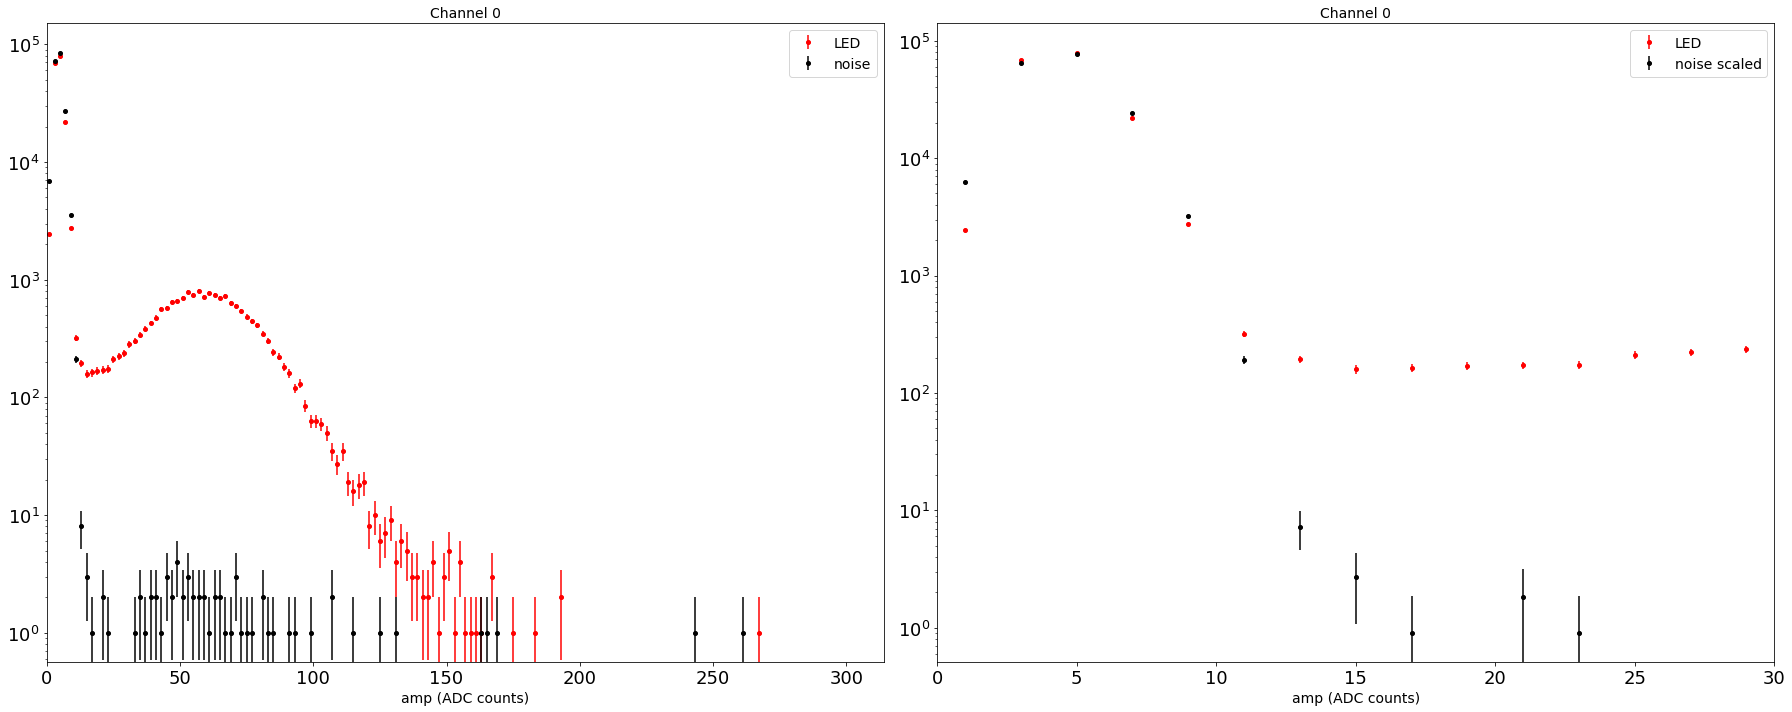

  0%|          | 1/249 [00:01<05:57,  1.44s/it]

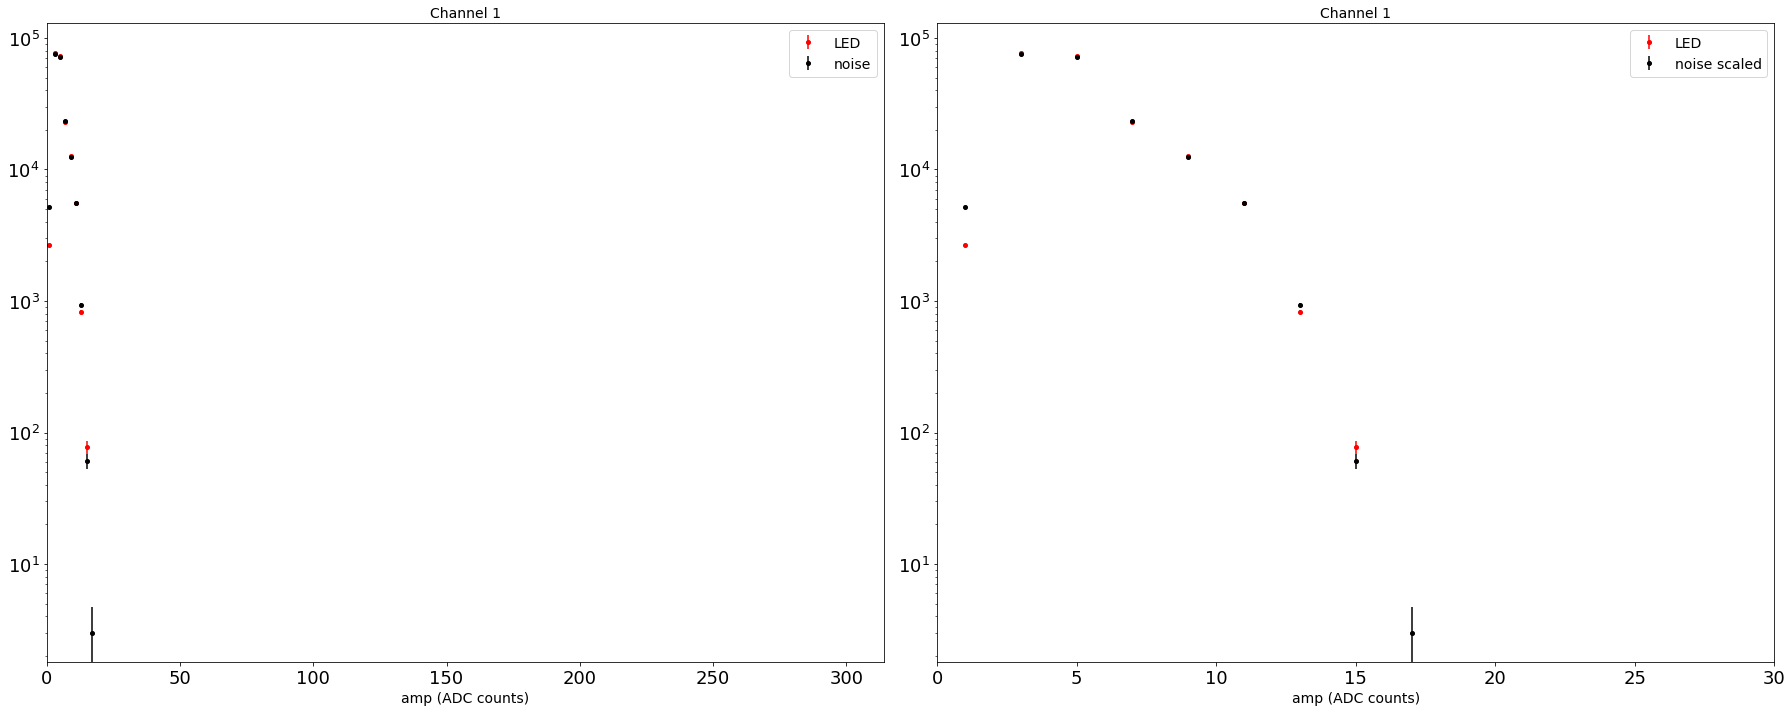

  1%|          | 2/249 [00:02<05:17,  1.29s/it]

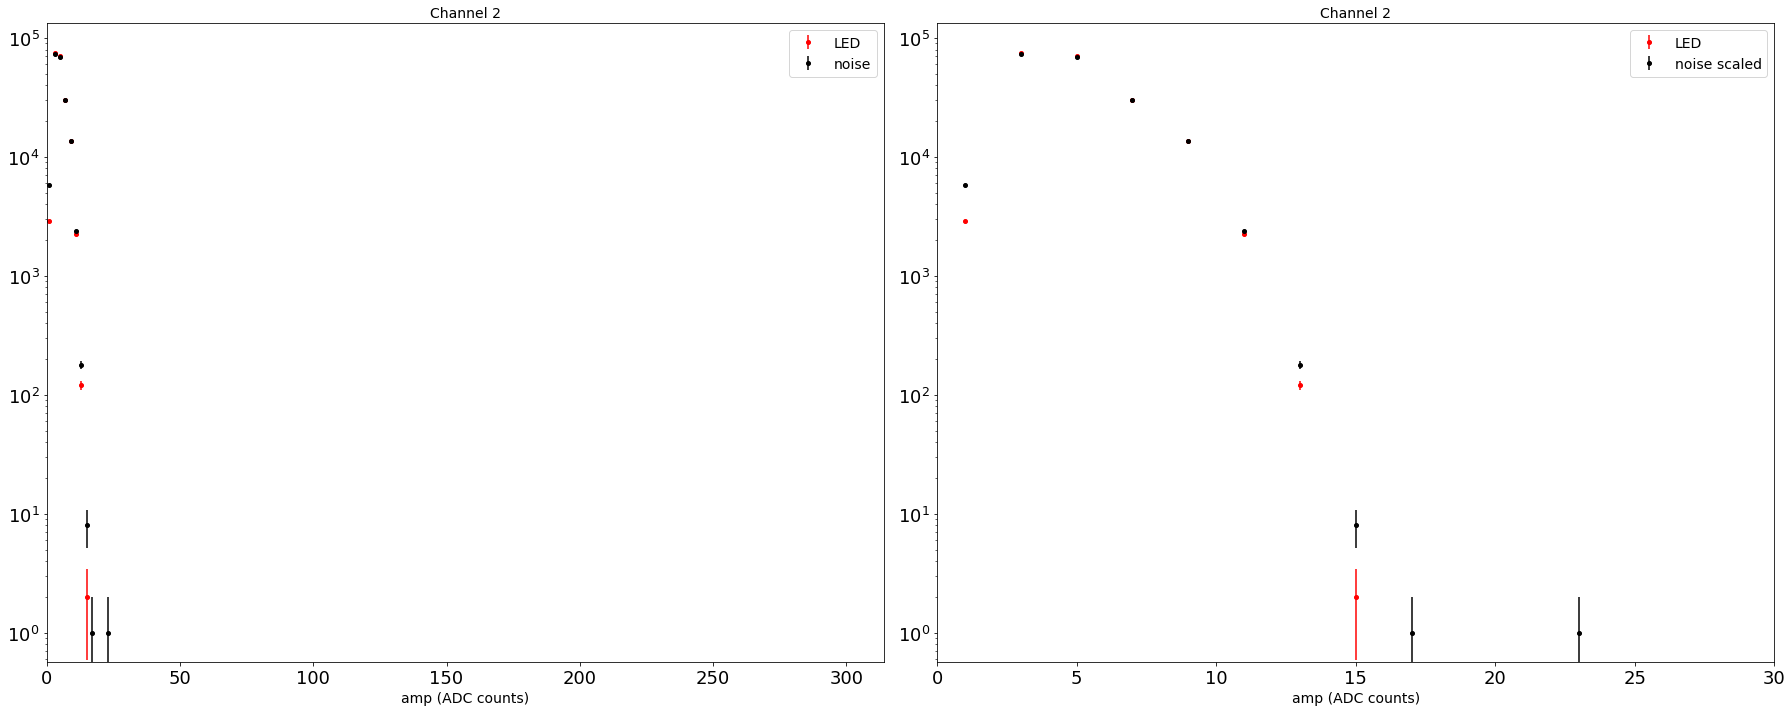

  1%|          | 3/249 [00:03<04:52,  1.19s/it]

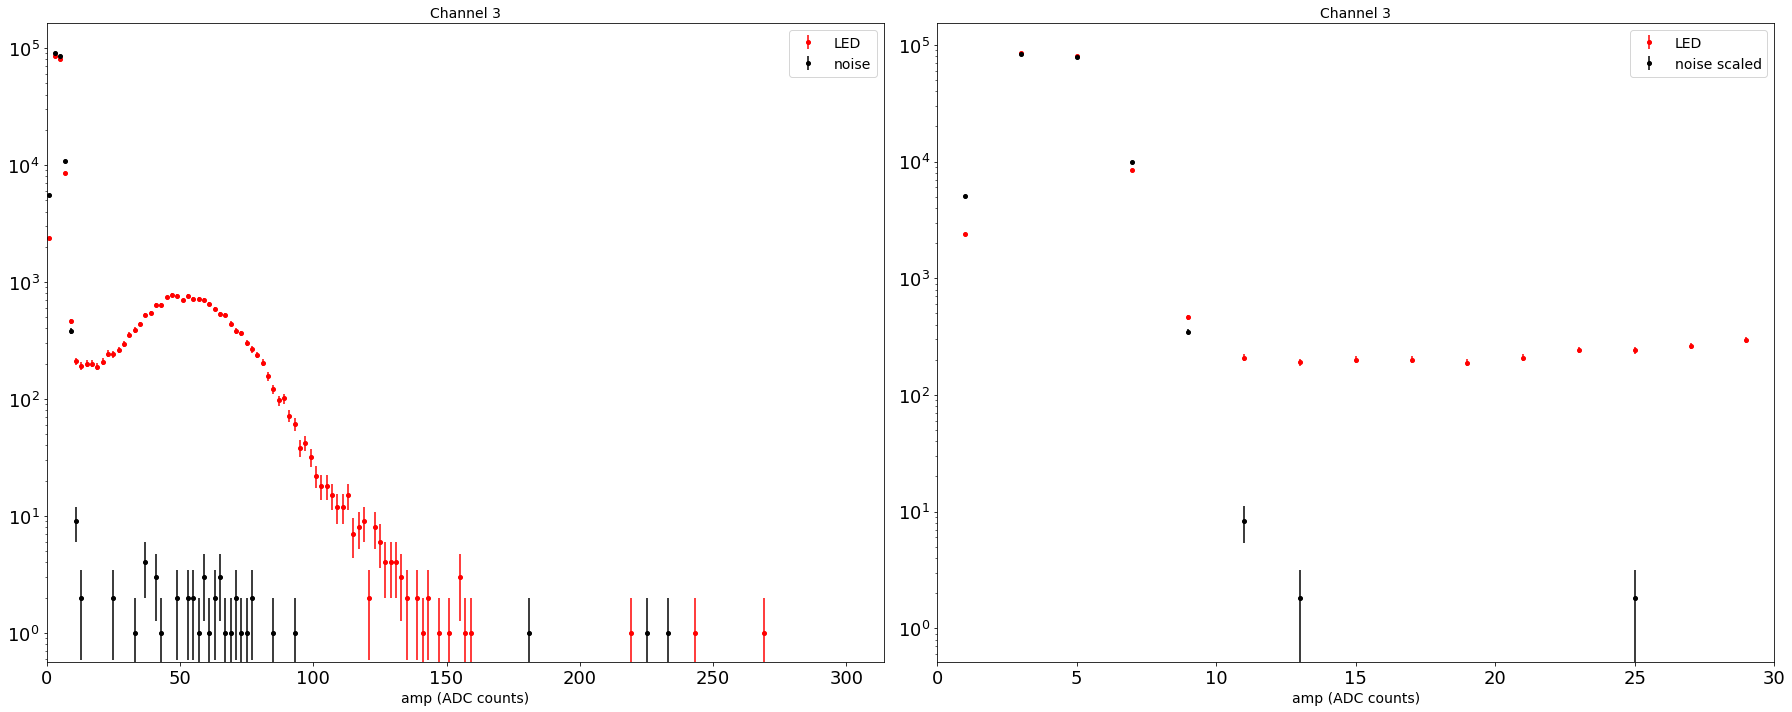

  2%|▏         | 4/249 [00:04<04:38,  1.14s/it]

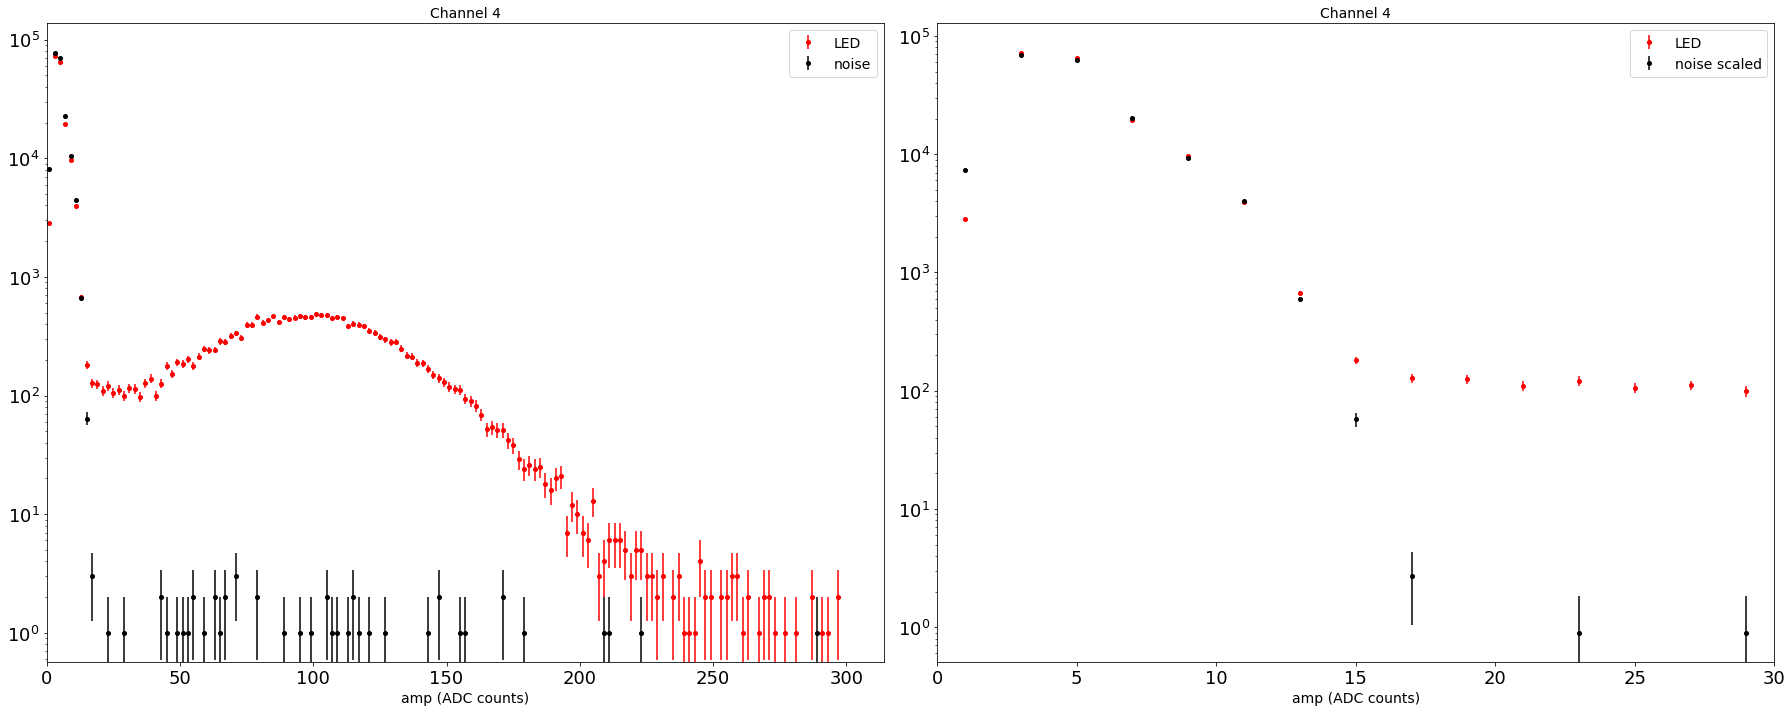

  2%|▏         | 5/249 [00:05<04:35,  1.13s/it]

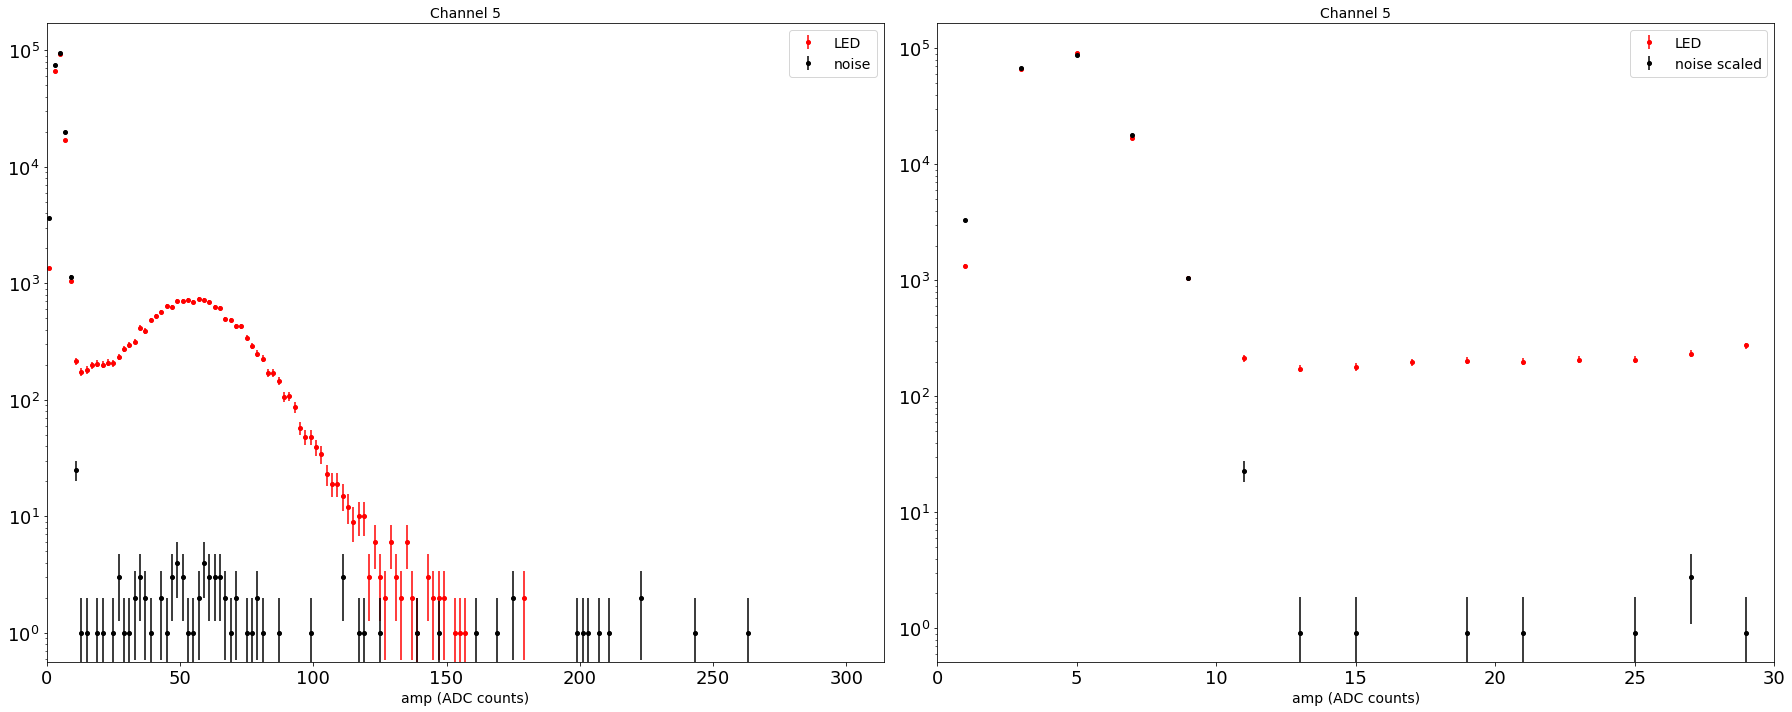

  2%|▏         | 6/249 [00:06<04:29,  1.11s/it]

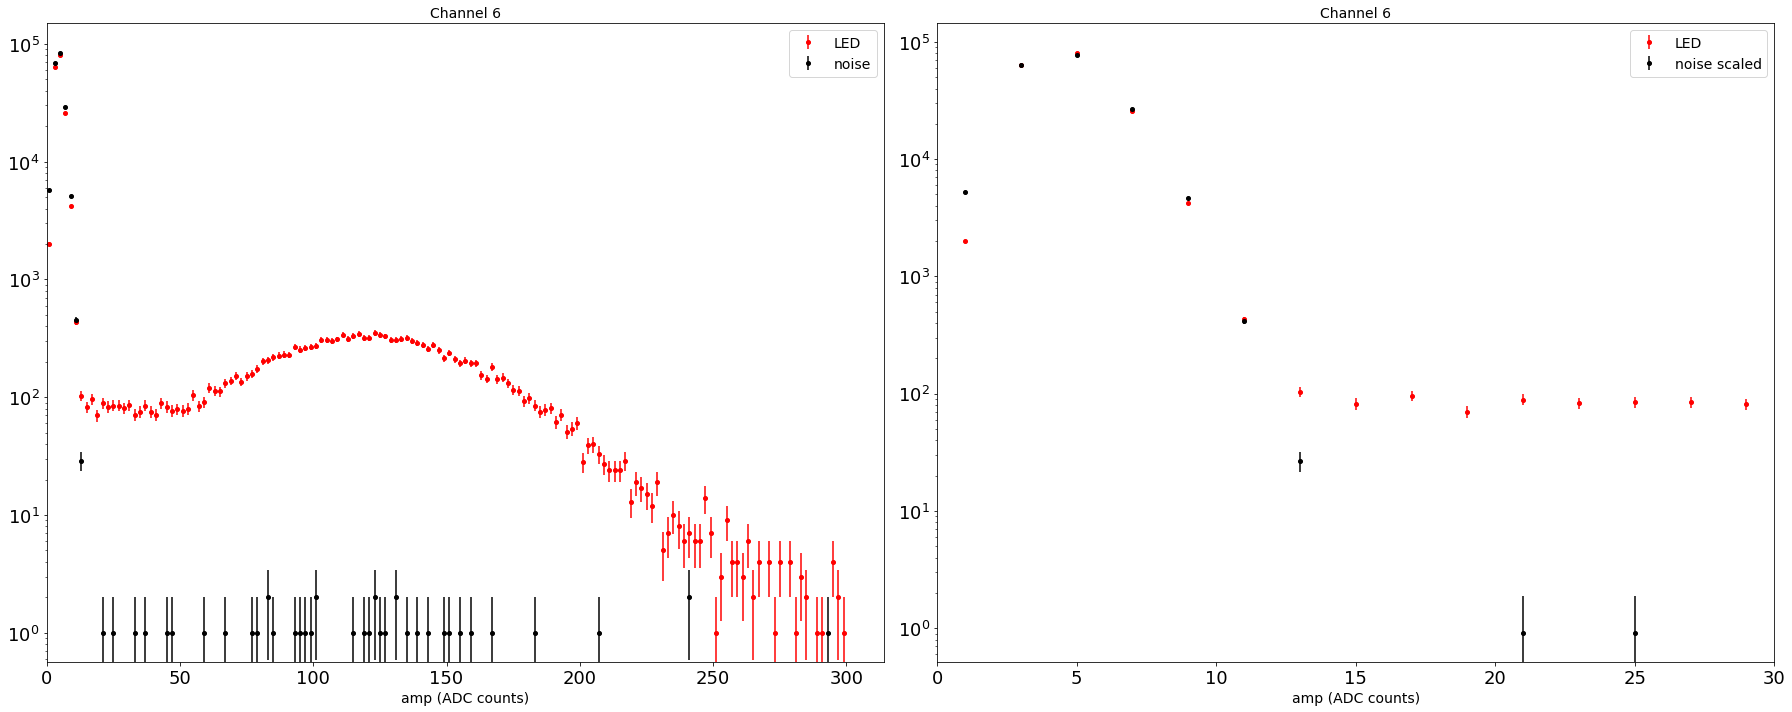

  3%|▎         | 7/249 [00:07<04:24,  1.09s/it]

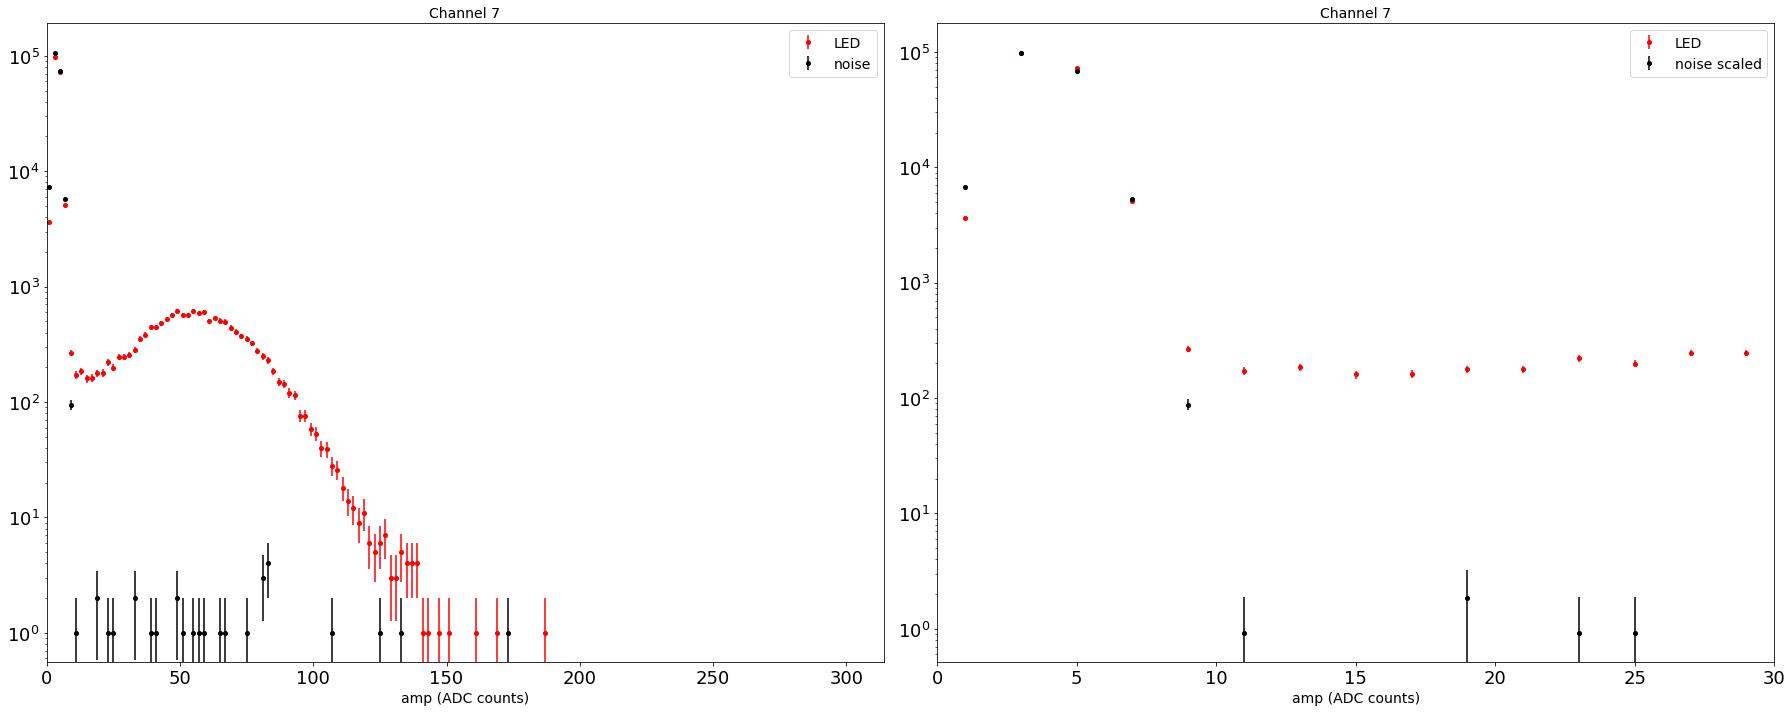

  3%|▎         | 8/249 [00:08<04:15,  1.06s/it]

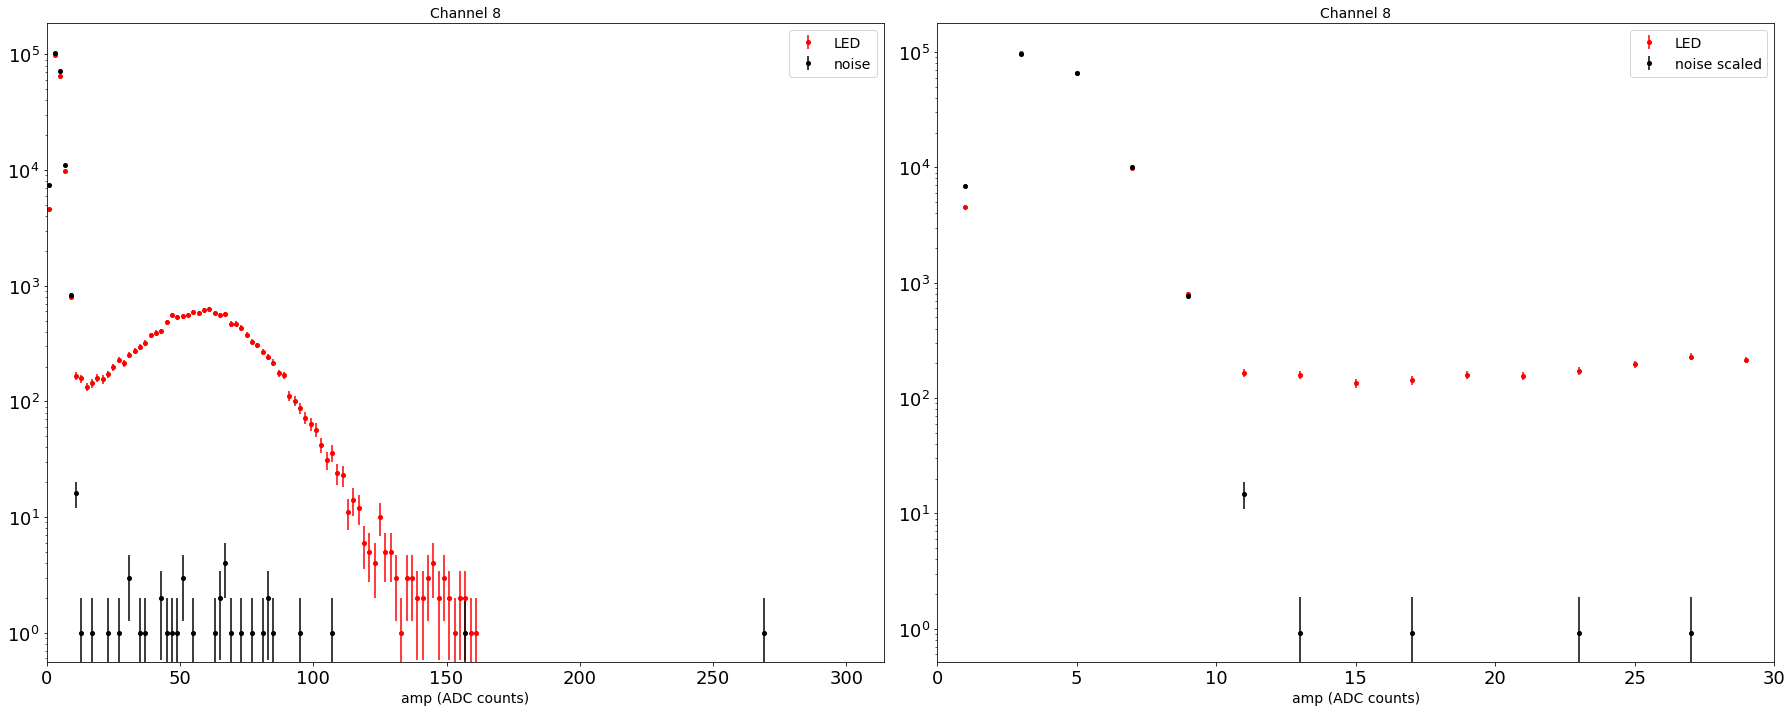

  4%|▎         | 9/249 [00:09<04:07,  1.03s/it]

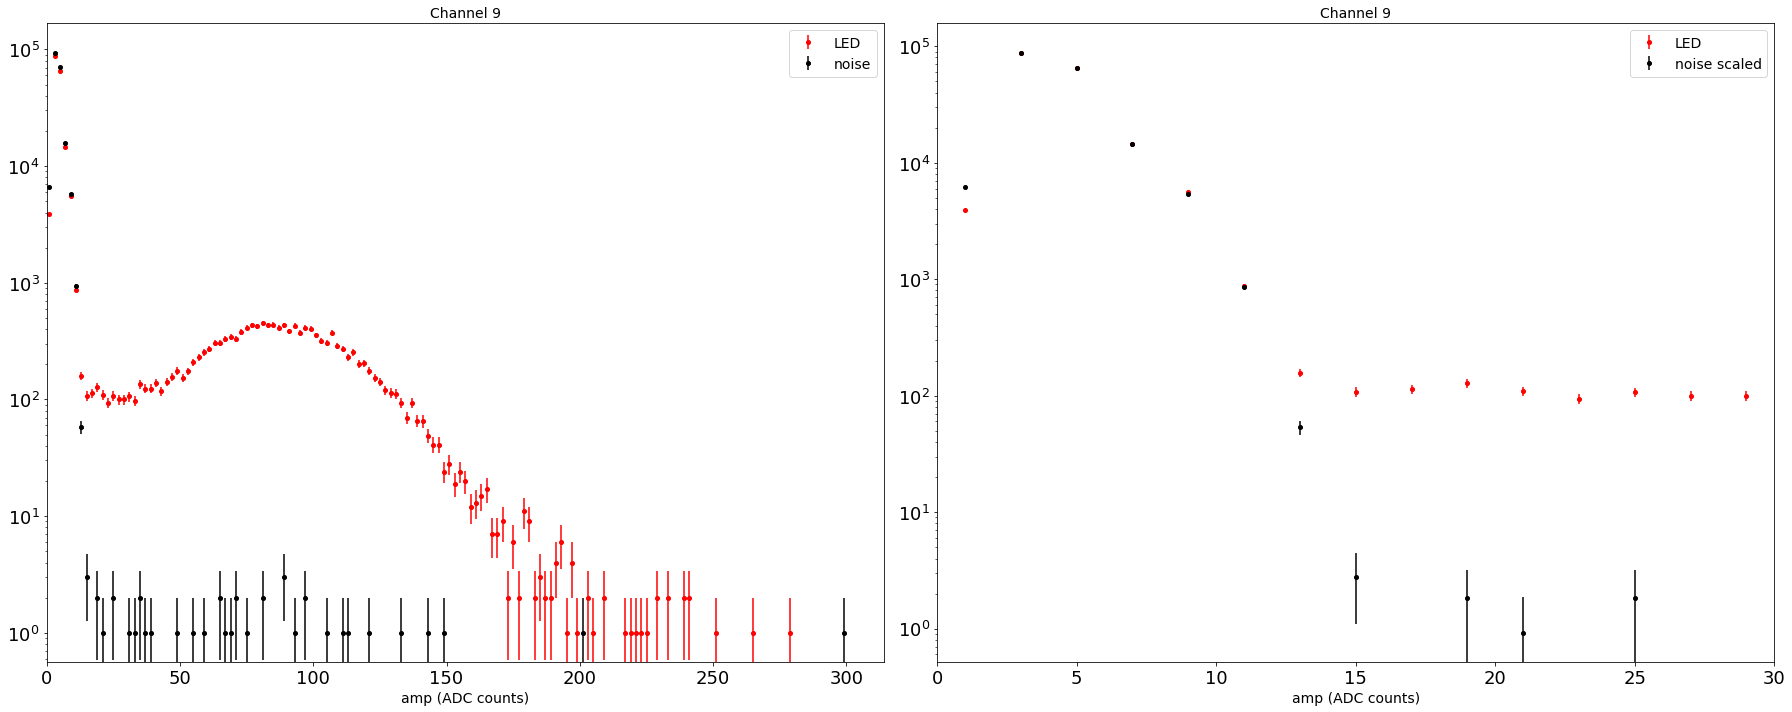

  4%|▍         | 10/249 [00:10<04:02,  1.02s/it]

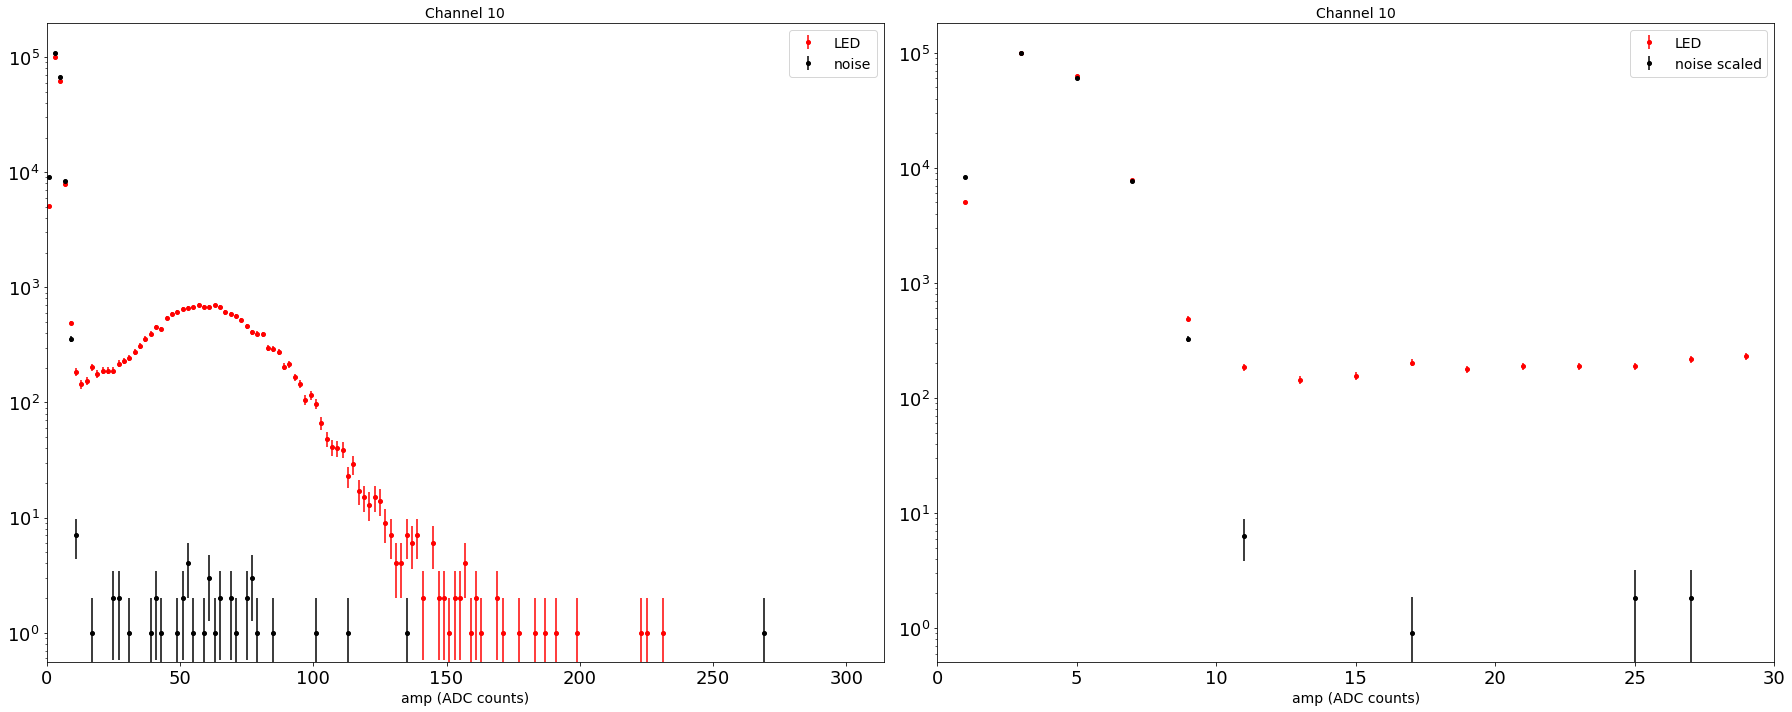

  4%|▍         | 11/249 [00:11<03:57,  1.00it/s]

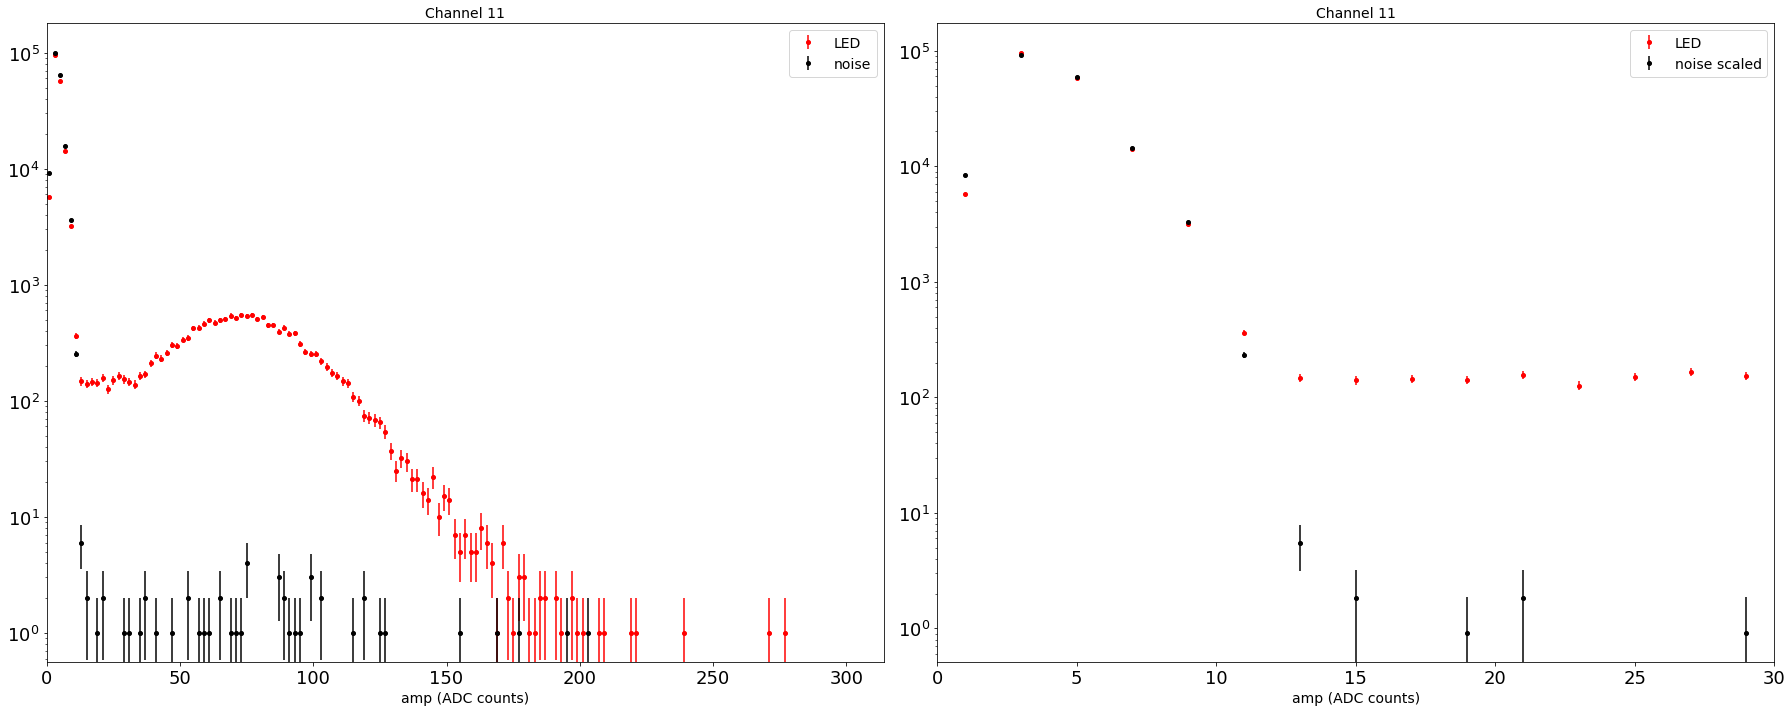

  5%|▍         | 12/249 [00:12<03:54,  1.01it/s]

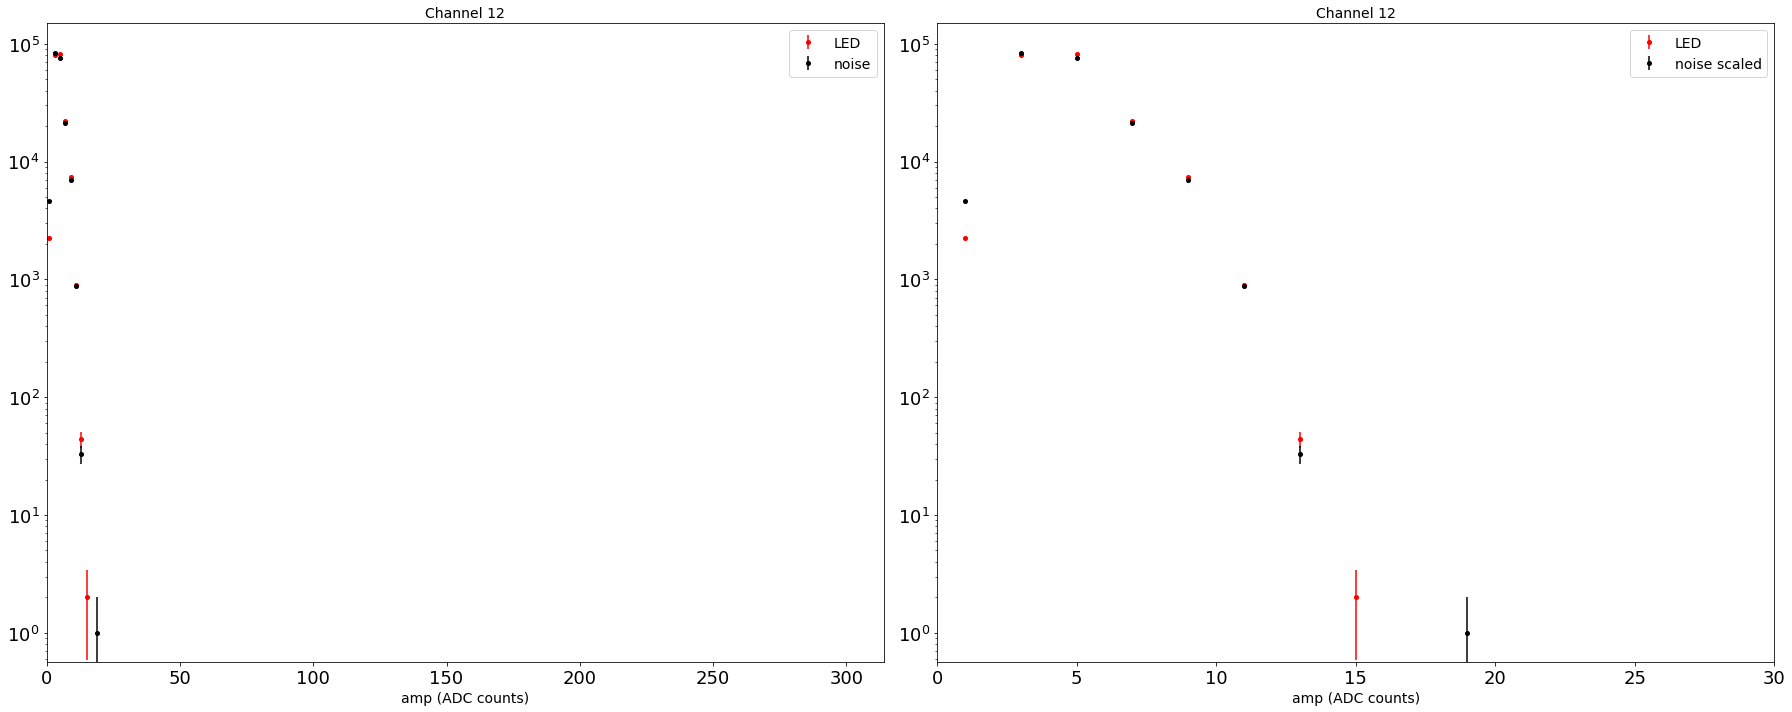

  5%|▌         | 13/249 [00:13<03:55,  1.00it/s]

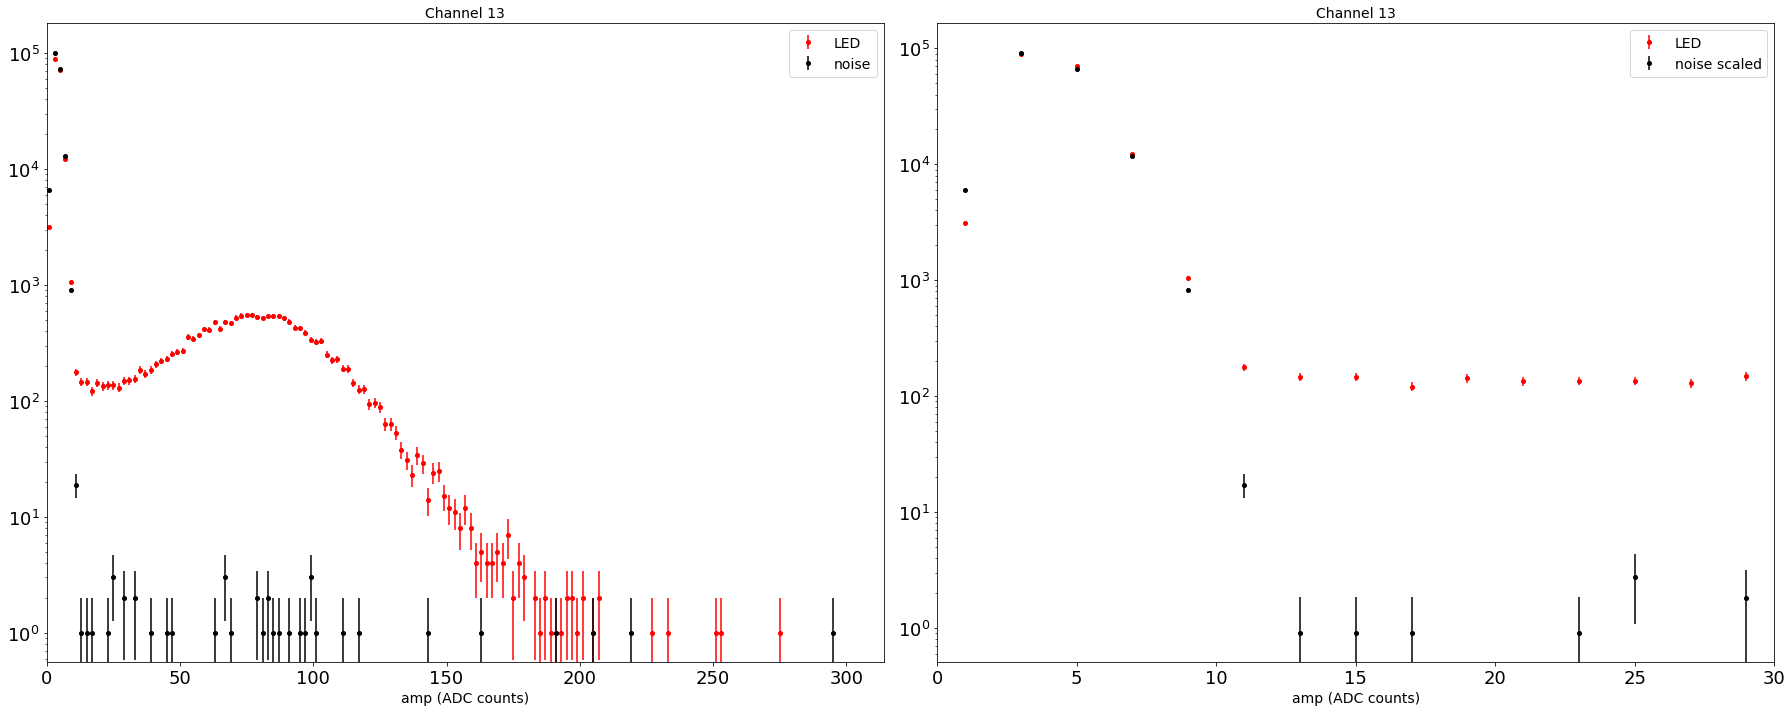

  6%|▌         | 14/249 [00:14<03:51,  1.01it/s]

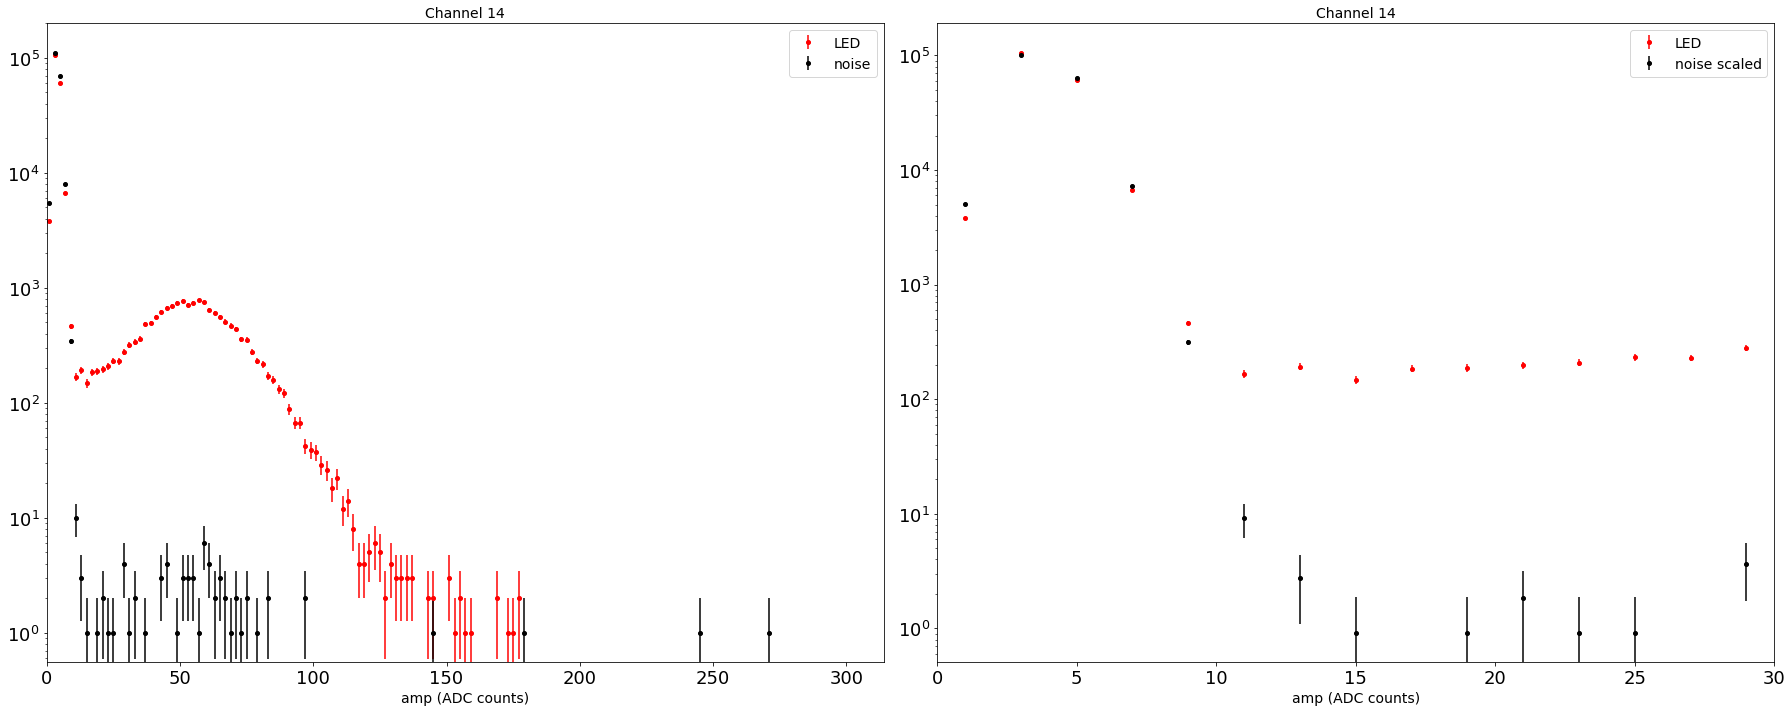

  6%|▌         | 15/249 [00:15<03:49,  1.02it/s]

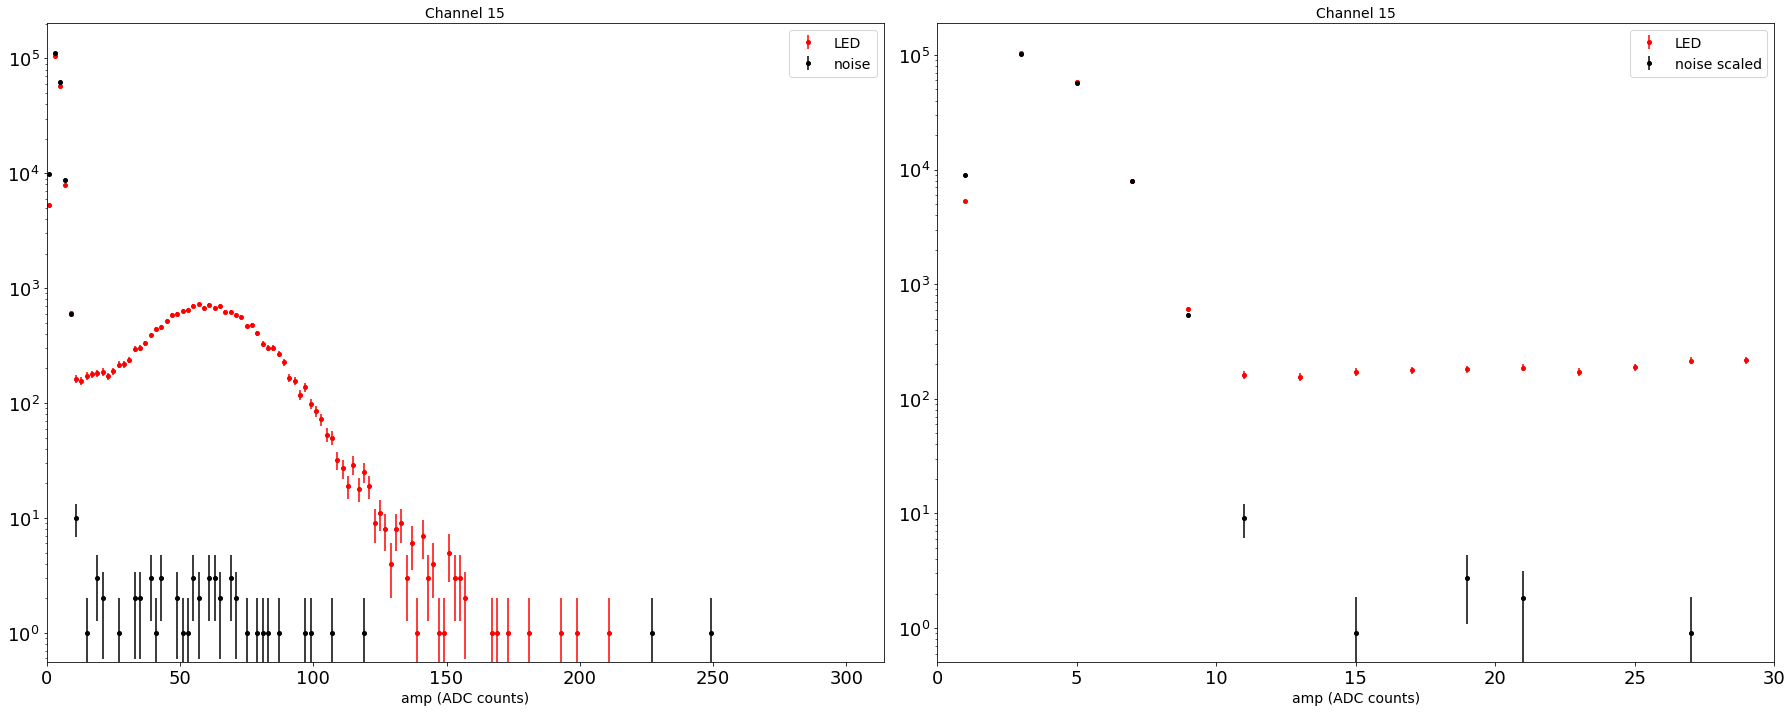

  6%|▋         | 16/249 [00:16<03:46,  1.03it/s]

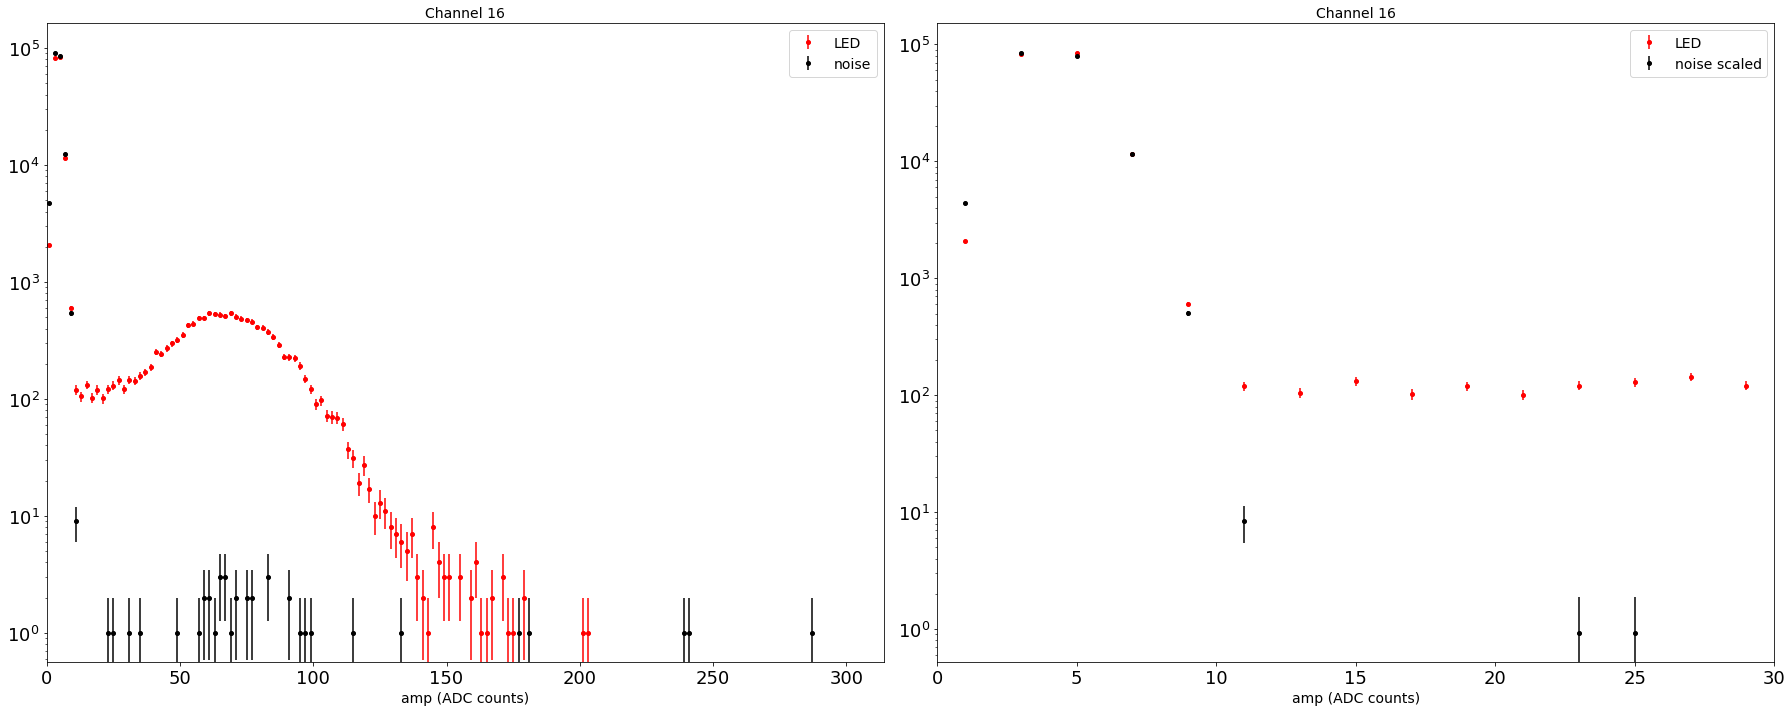

  7%|▋         | 17/249 [00:17<03:45,  1.03it/s]

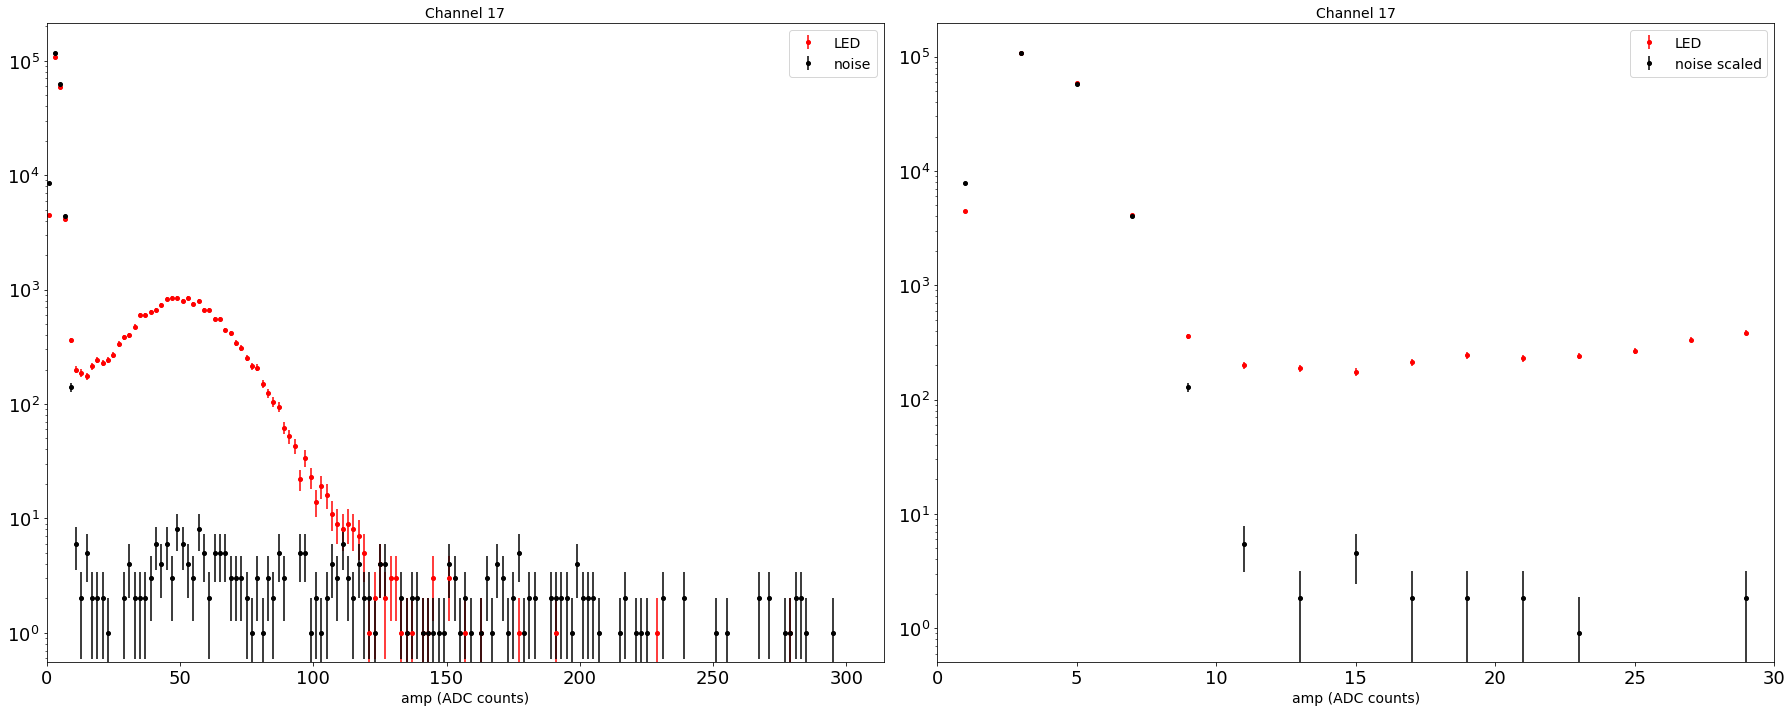

  7%|▋         | 18/249 [00:18<03:47,  1.01it/s]

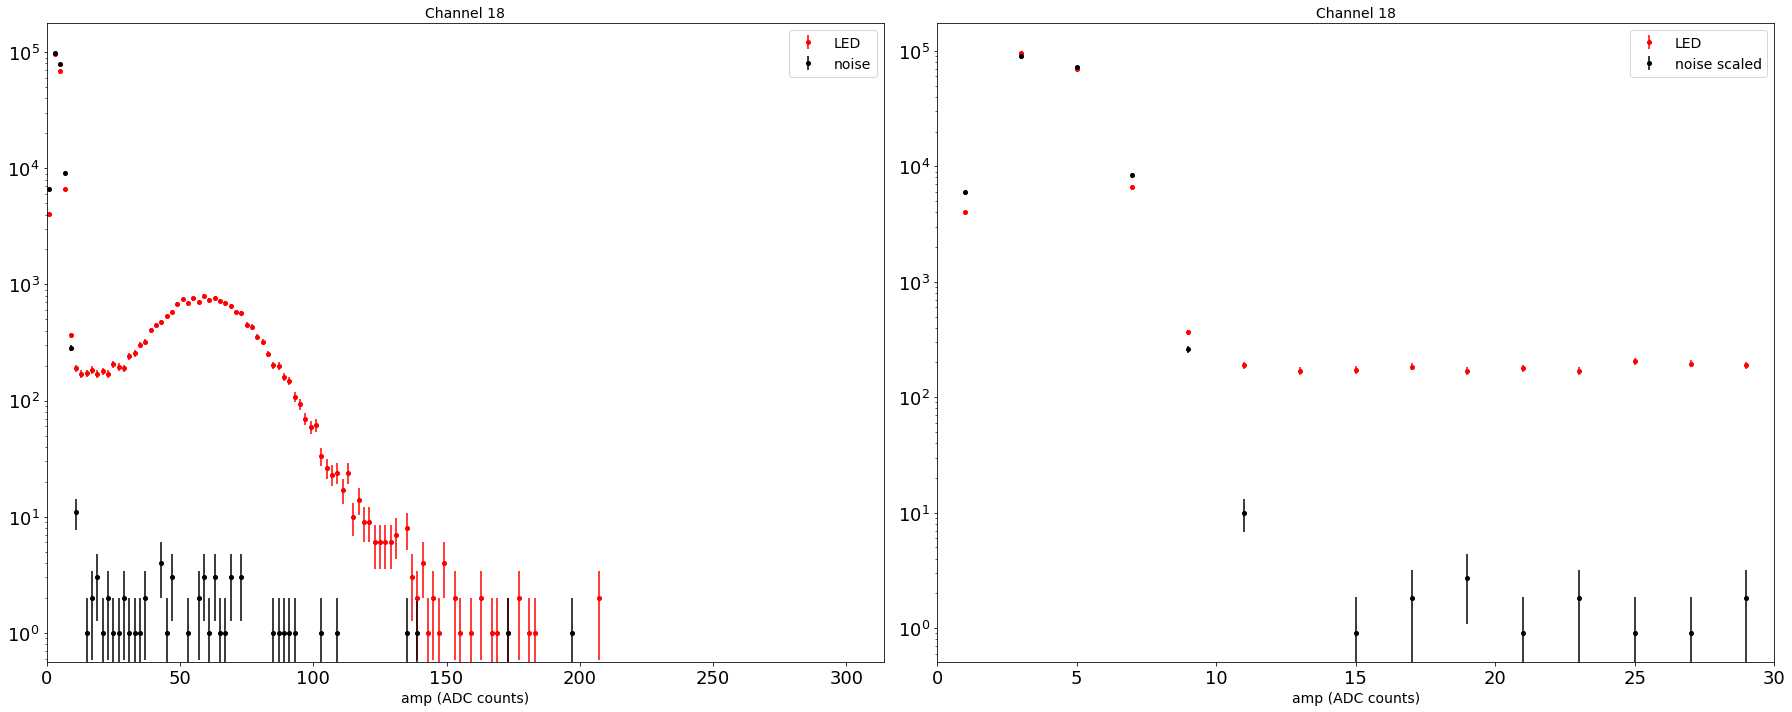

  8%|▊         | 19/249 [00:19<03:44,  1.02it/s]

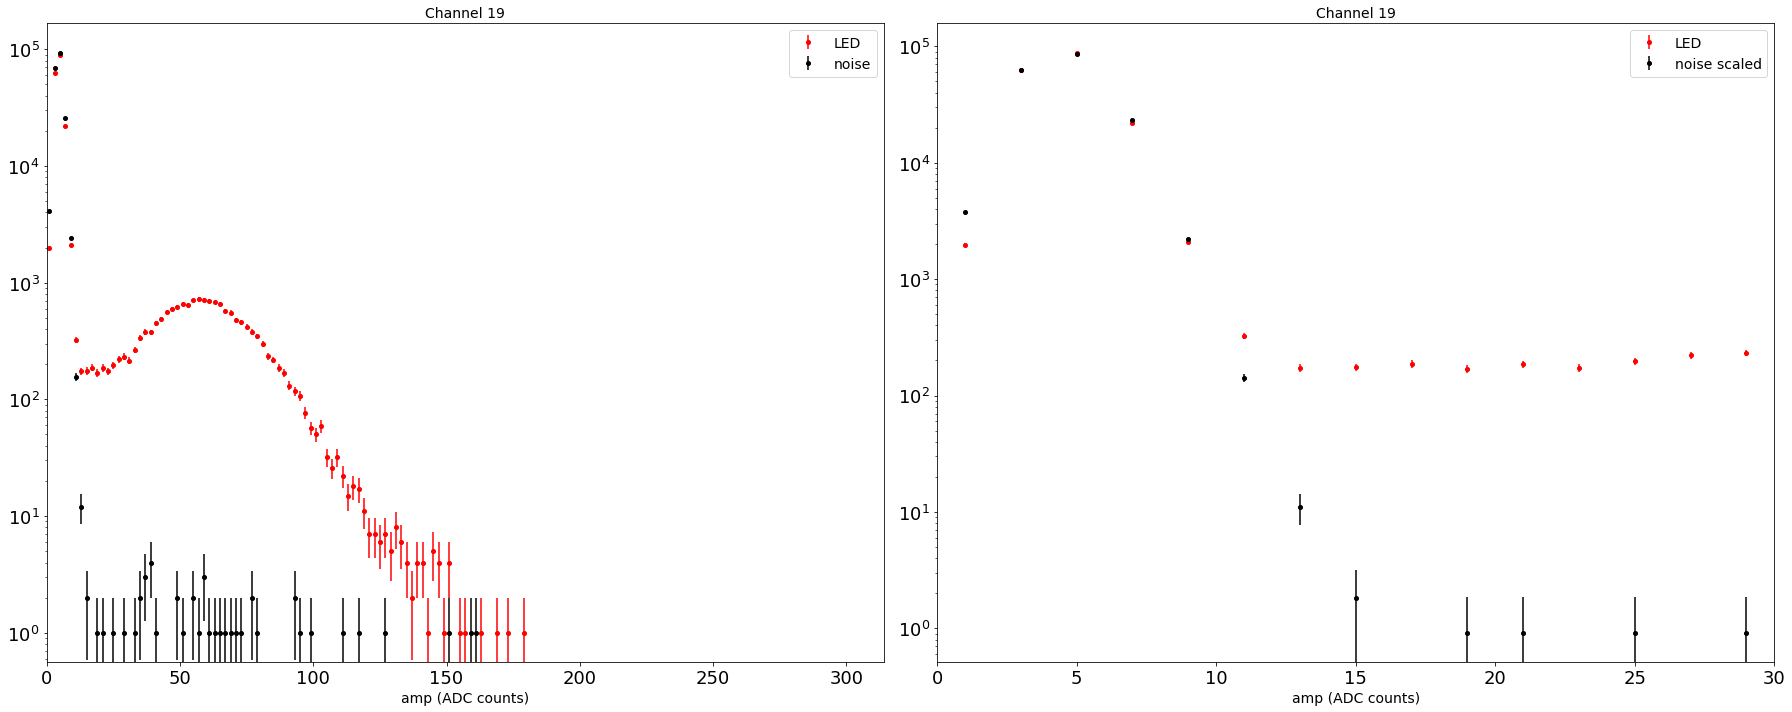

  8%|▊         | 20/249 [00:20<03:42,  1.03it/s]

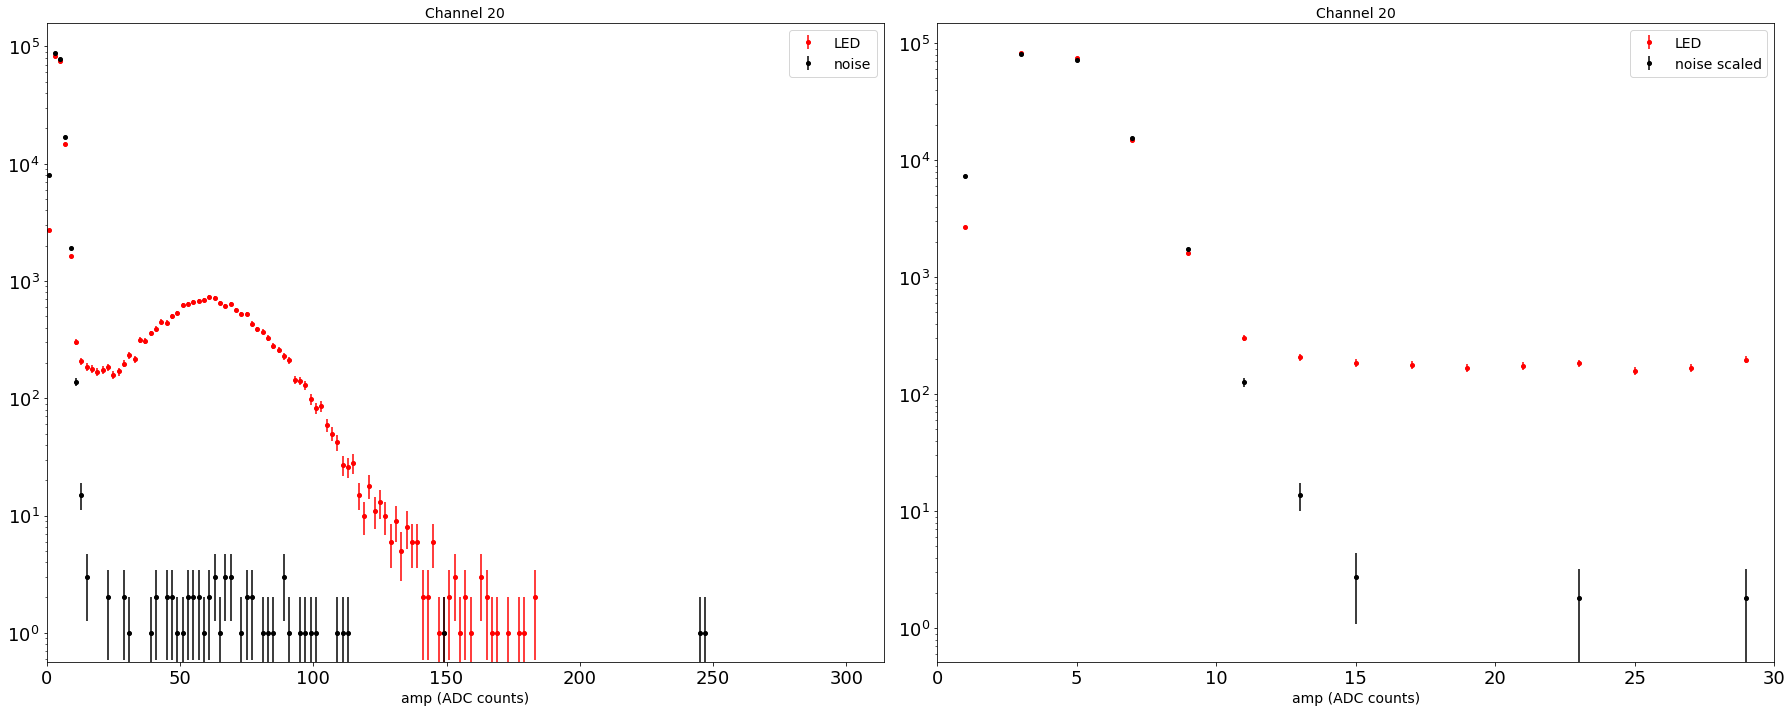

  8%|▊         | 21/249 [00:21<03:41,  1.03it/s]

  9%|▉         | 22/249 [00:22<03:41,  1.03it/s]

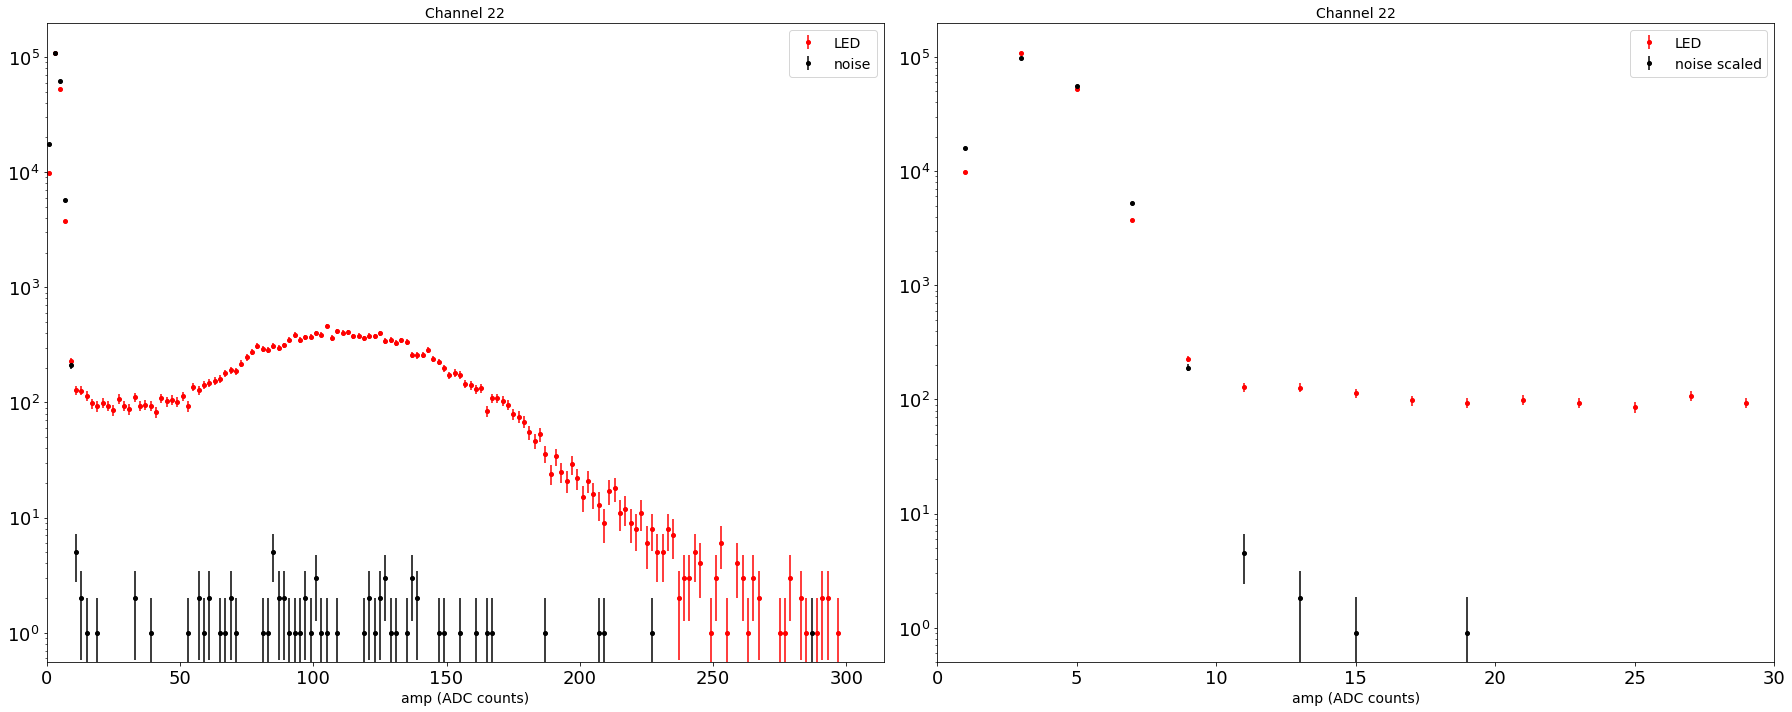

  9%|▉         | 23/249 [00:23<03:47,  1.01s/it]

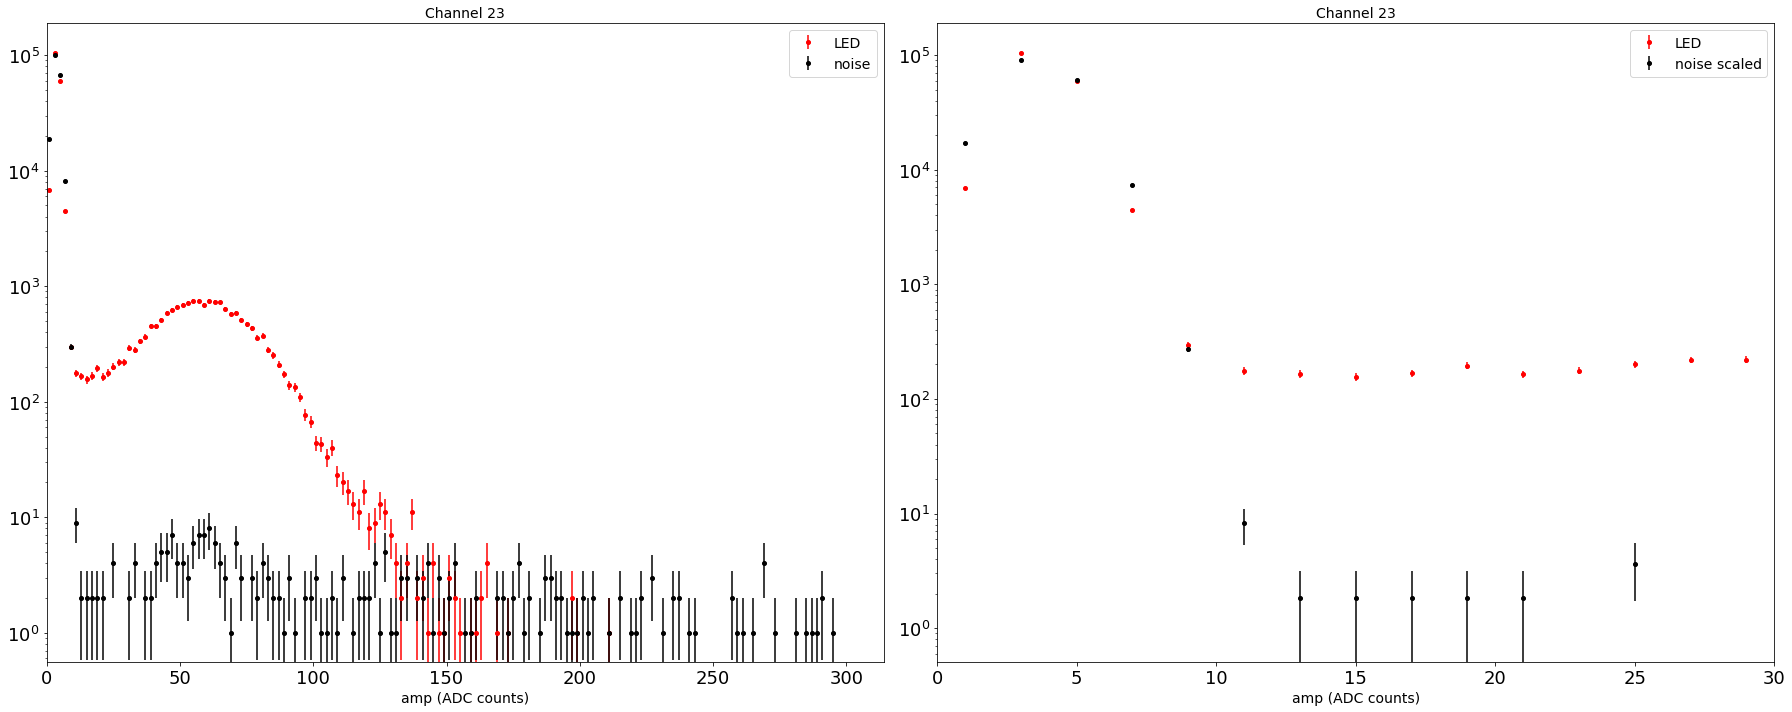

 10%|▉         | 24/249 [00:24<03:49,  1.02s/it]

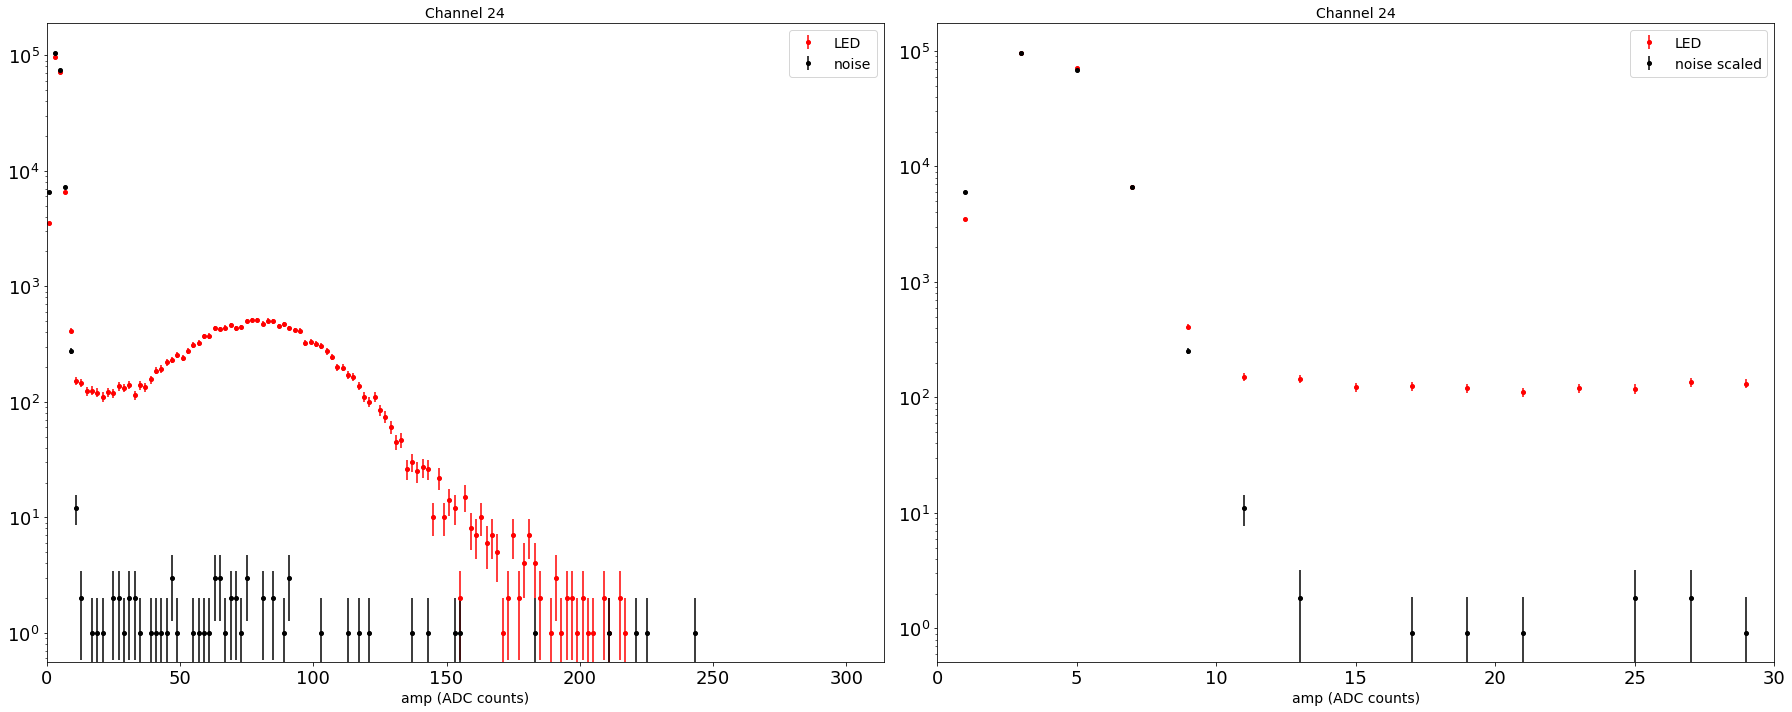

 10%|█         | 25/249 [00:25<03:44,  1.00s/it]

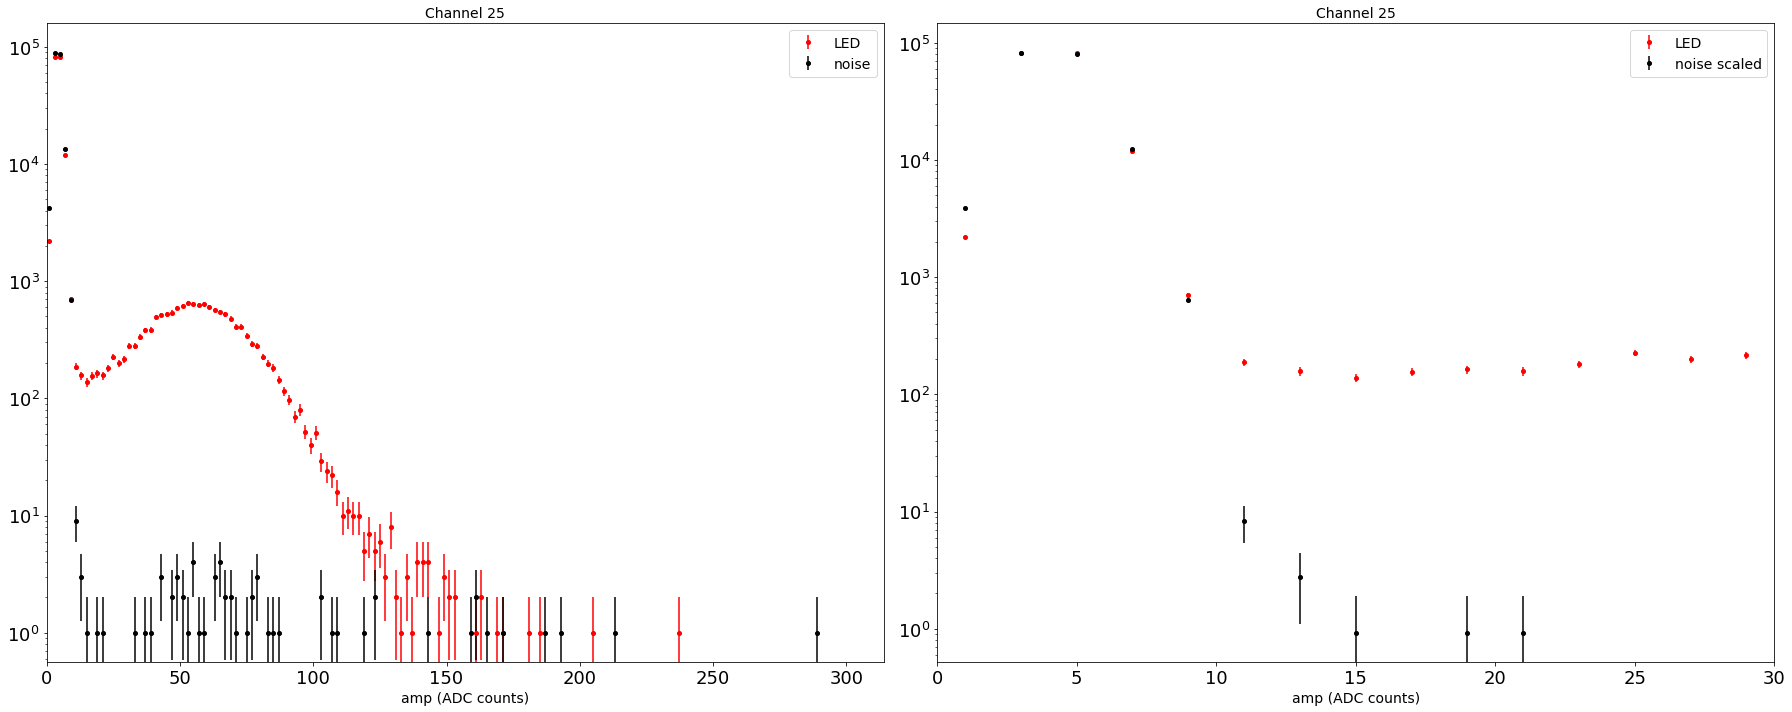

 10%|█         | 26/249 [00:26<03:40,  1.01it/s]

 11%|█         | 27/249 [00:27<03:40,  1.01it/s]

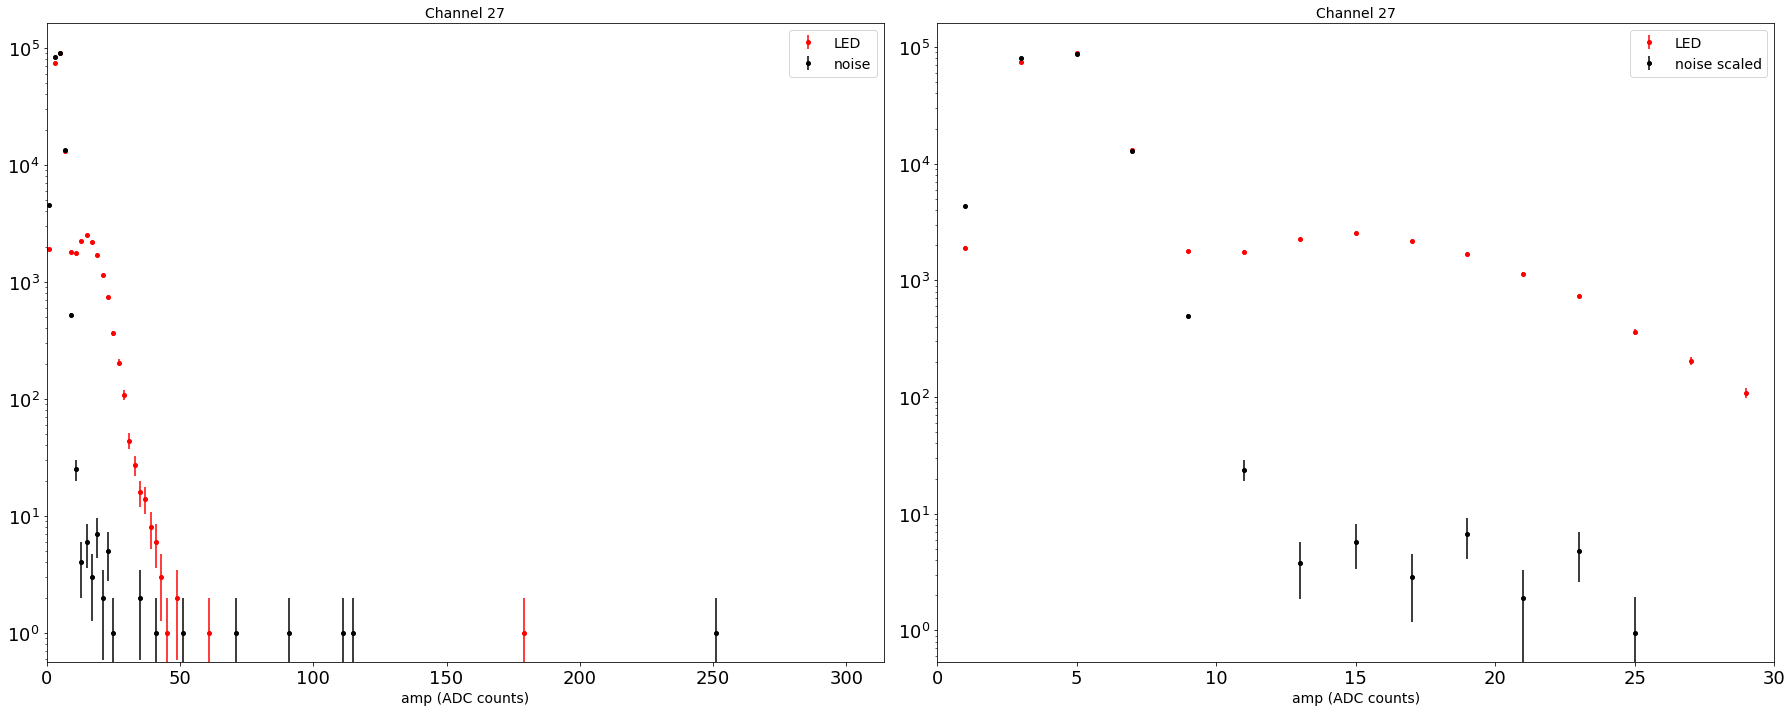

 11%|█         | 28/249 [00:28<03:41,  1.00s/it]

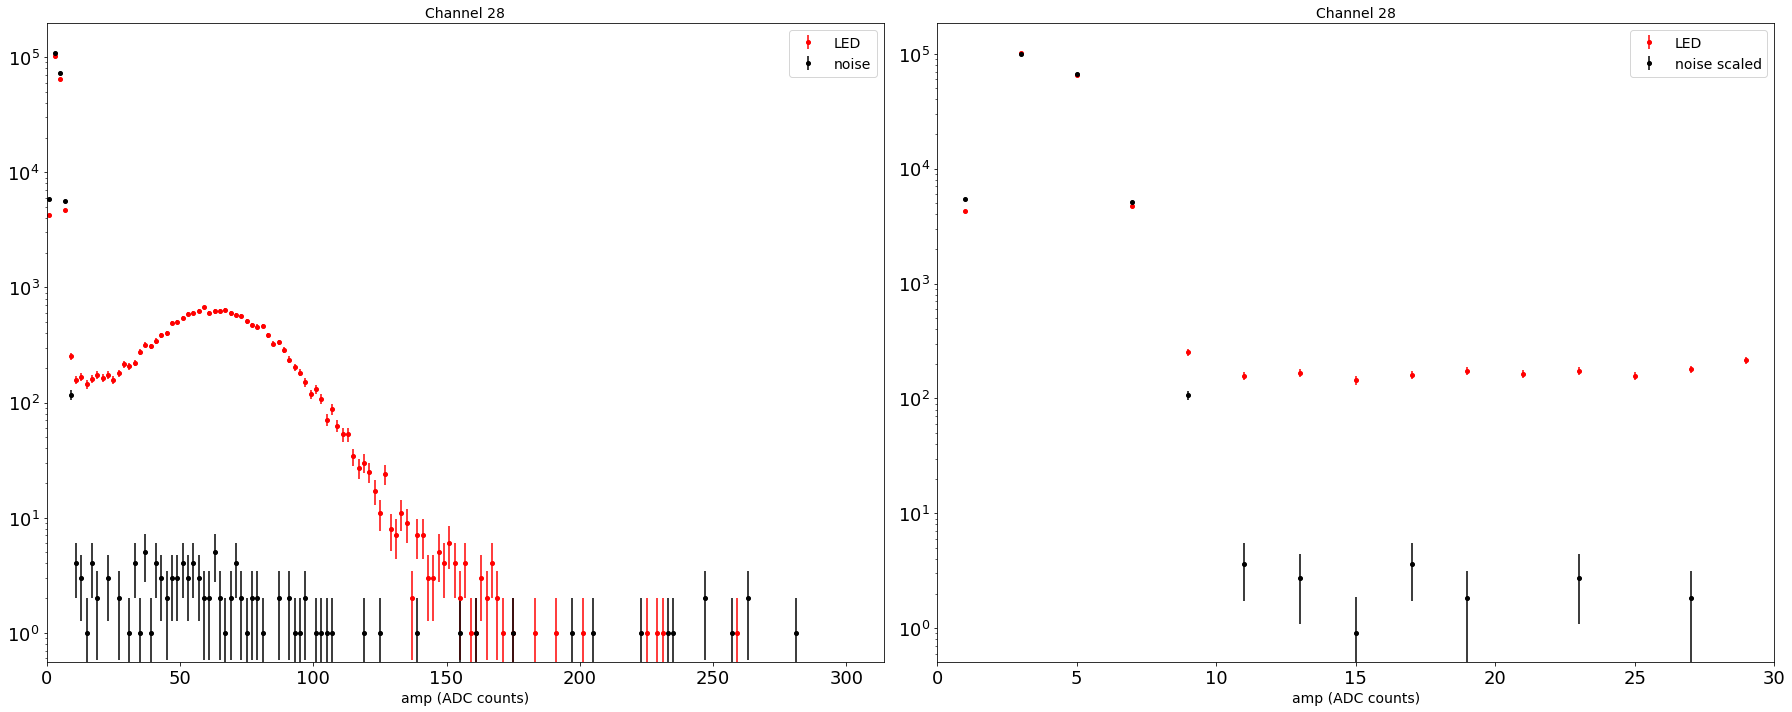

 12%|█▏        | 29/249 [00:29<03:42,  1.01s/it]

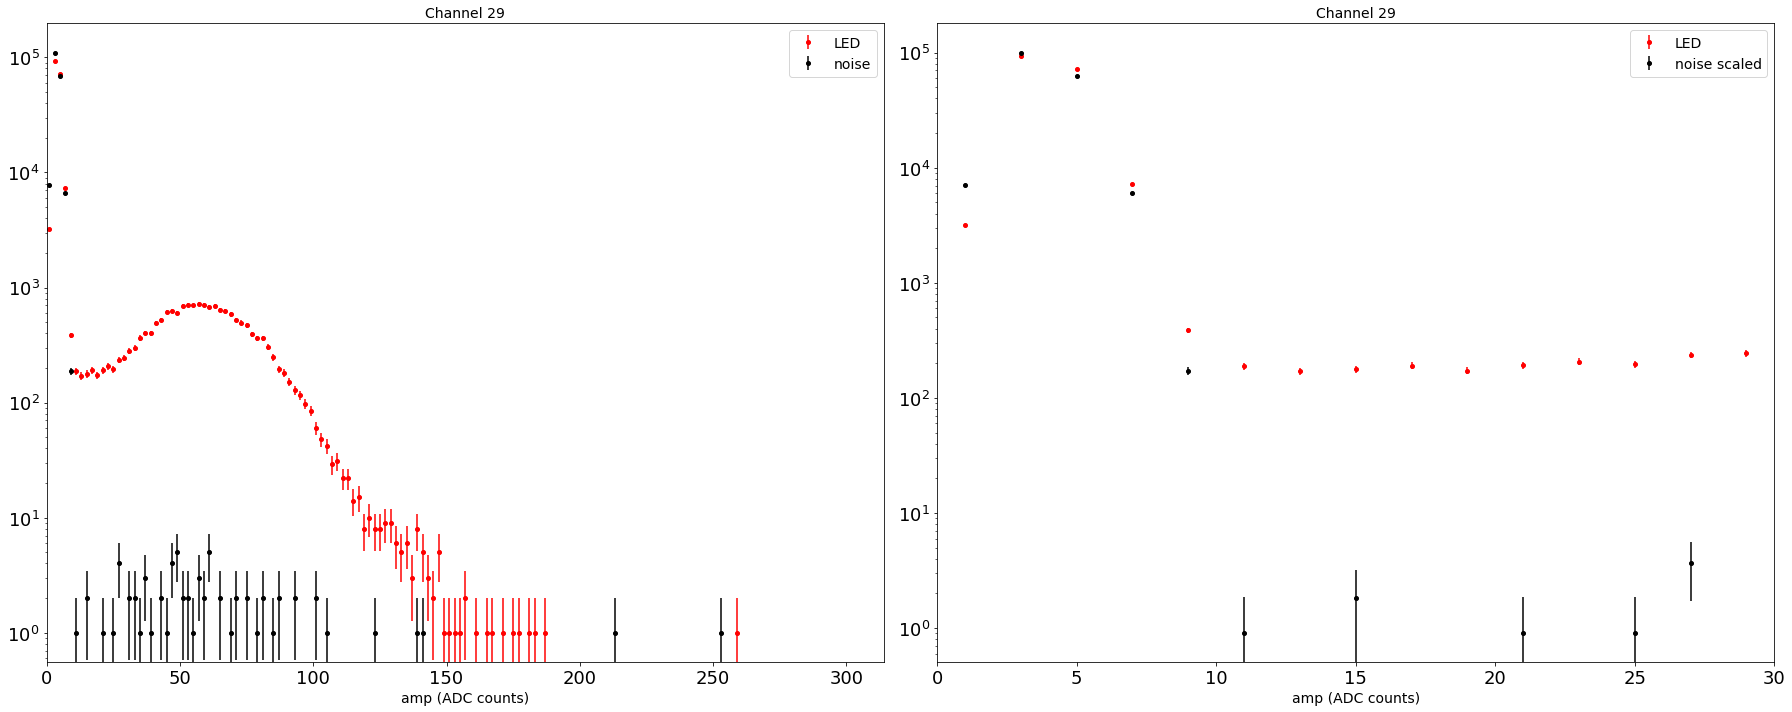

 12%|█▏        | 30/249 [00:30<03:42,  1.01s/it]

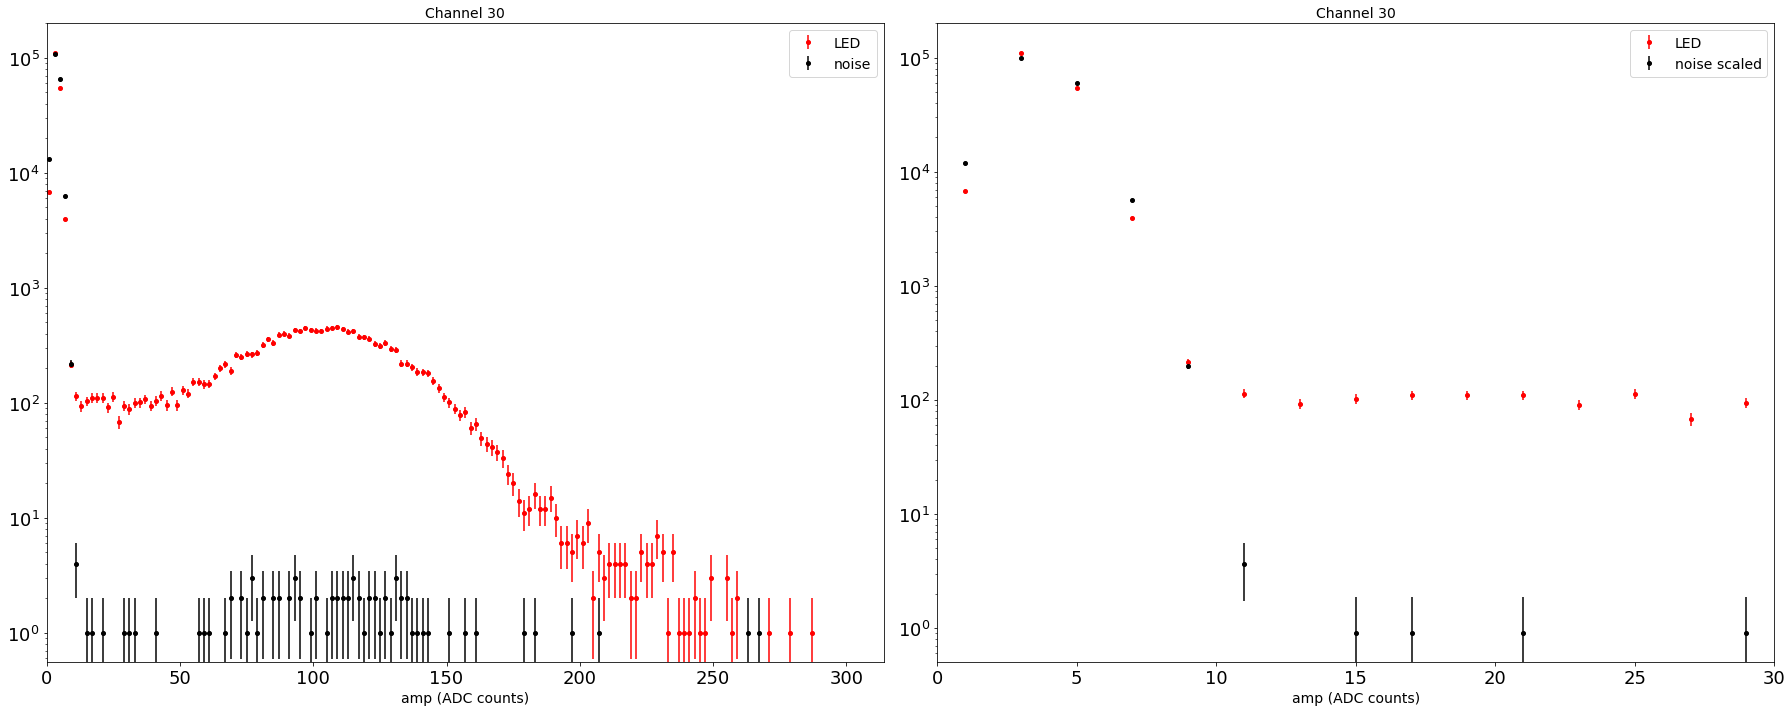

 12%|█▏        | 31/249 [00:31<03:44,  1.03s/it]

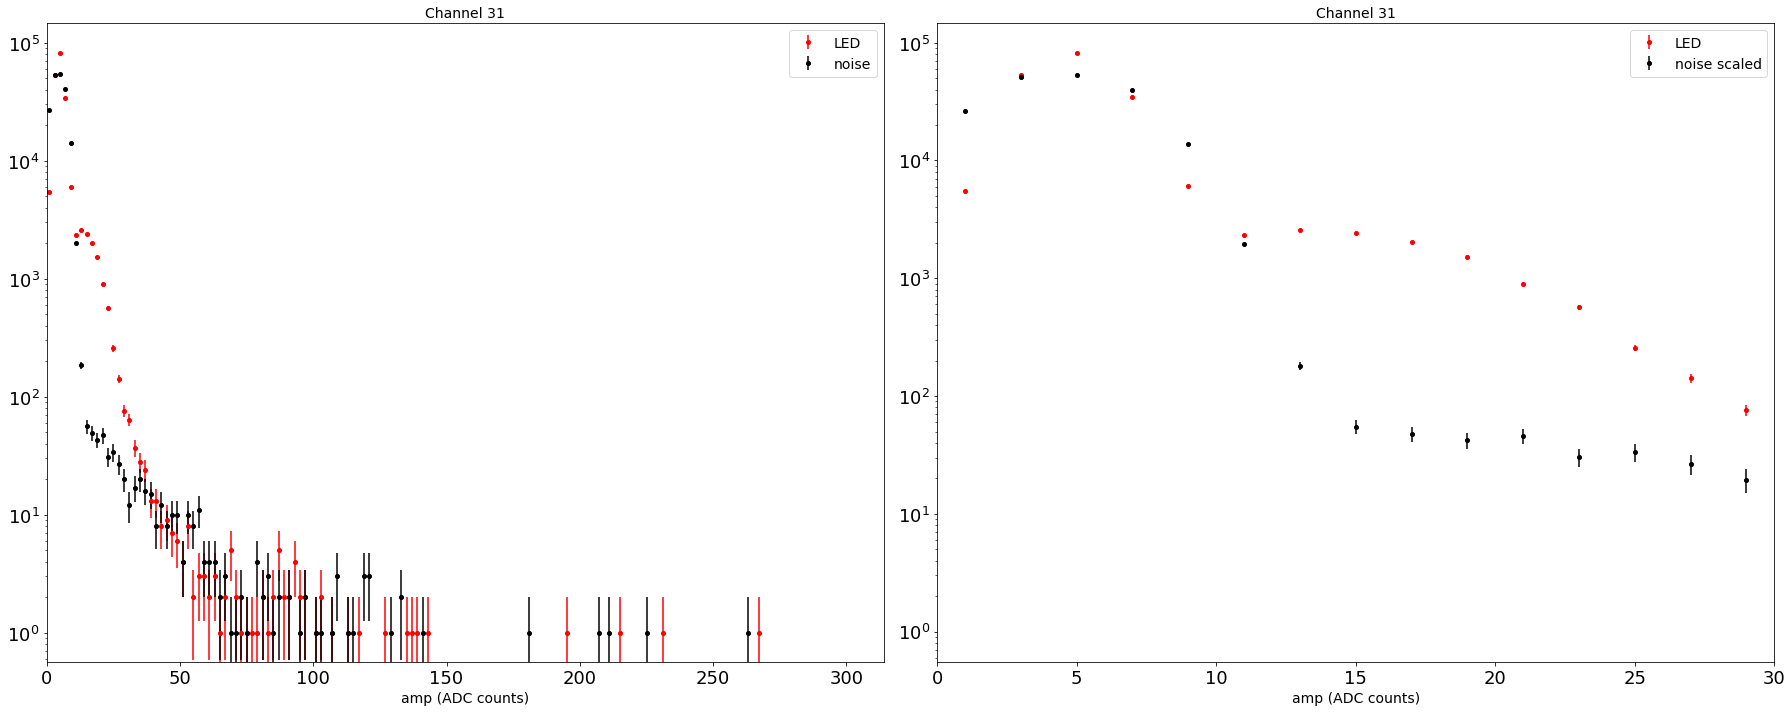

 13%|█▎        | 32/249 [00:32<03:38,  1.01s/it]

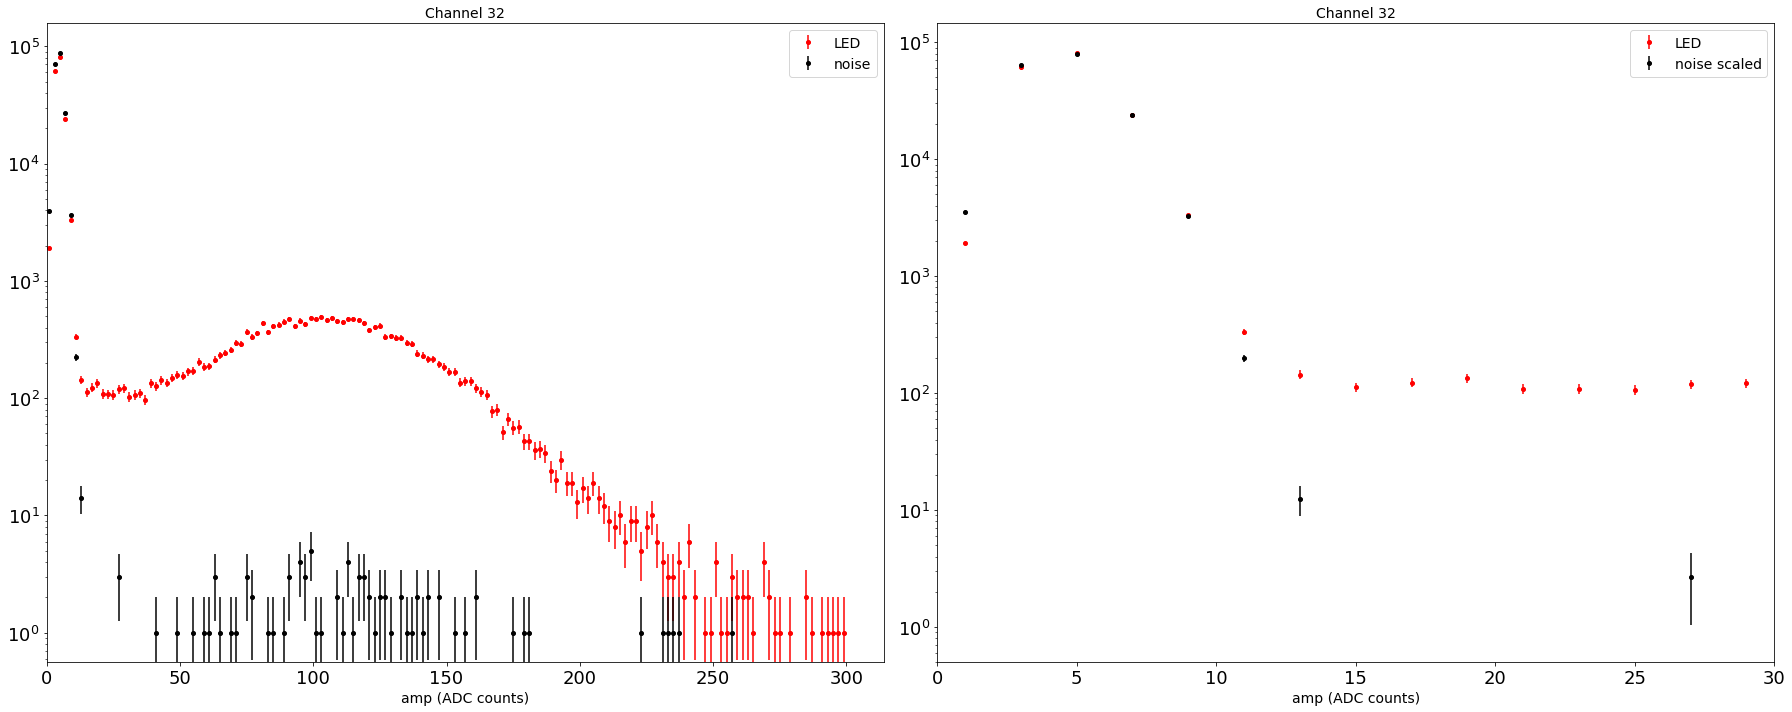

 13%|█▎        | 33/249 [00:33<03:35,  1.00it/s]

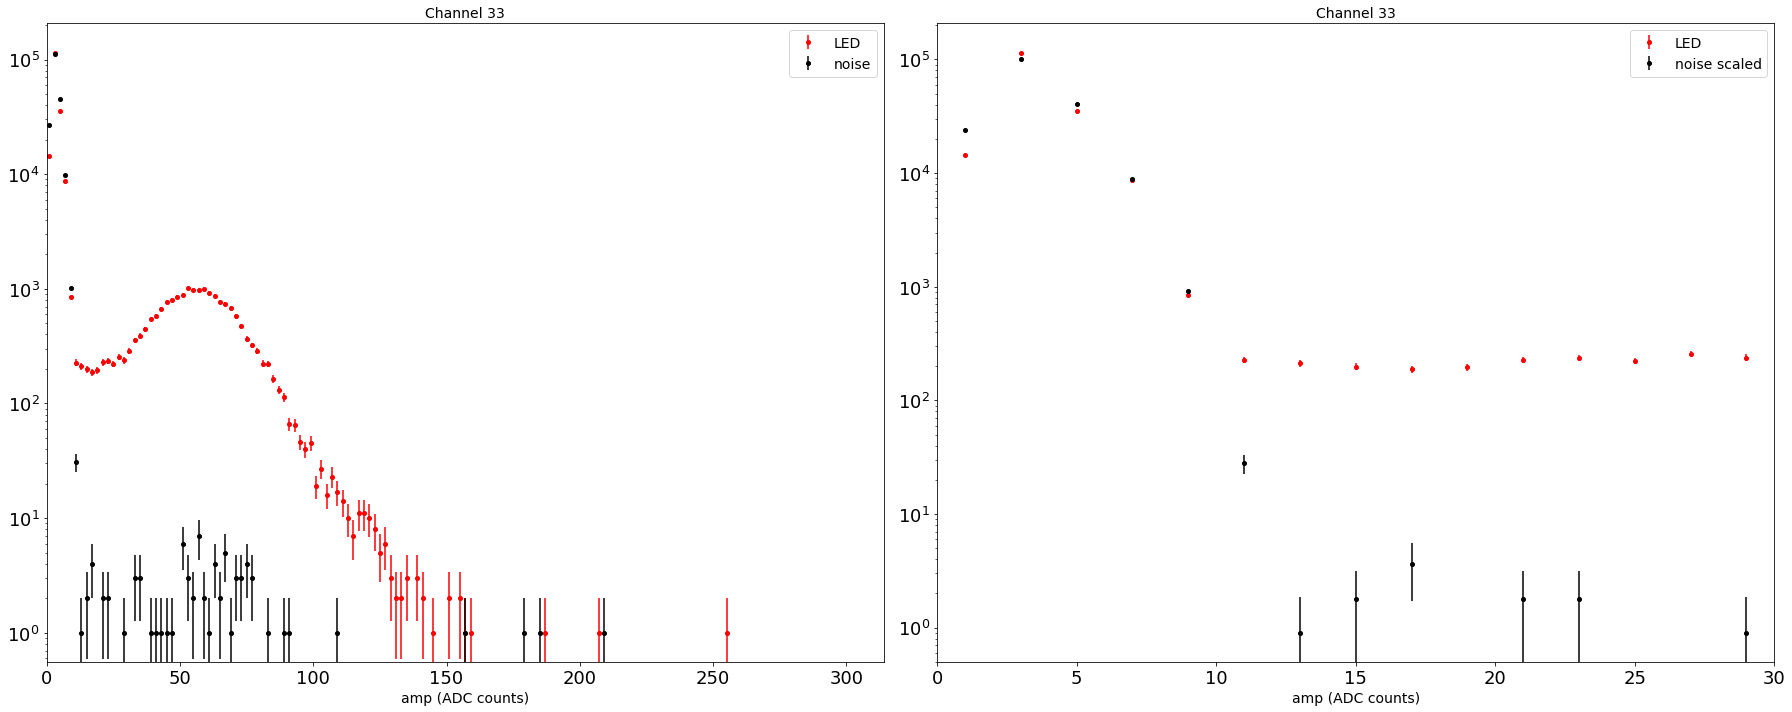

 14%|█▎        | 34/249 [00:34<03:32,  1.01it/s]

 14%|█▍        | 35/249 [00:35<03:29,  1.02it/s]

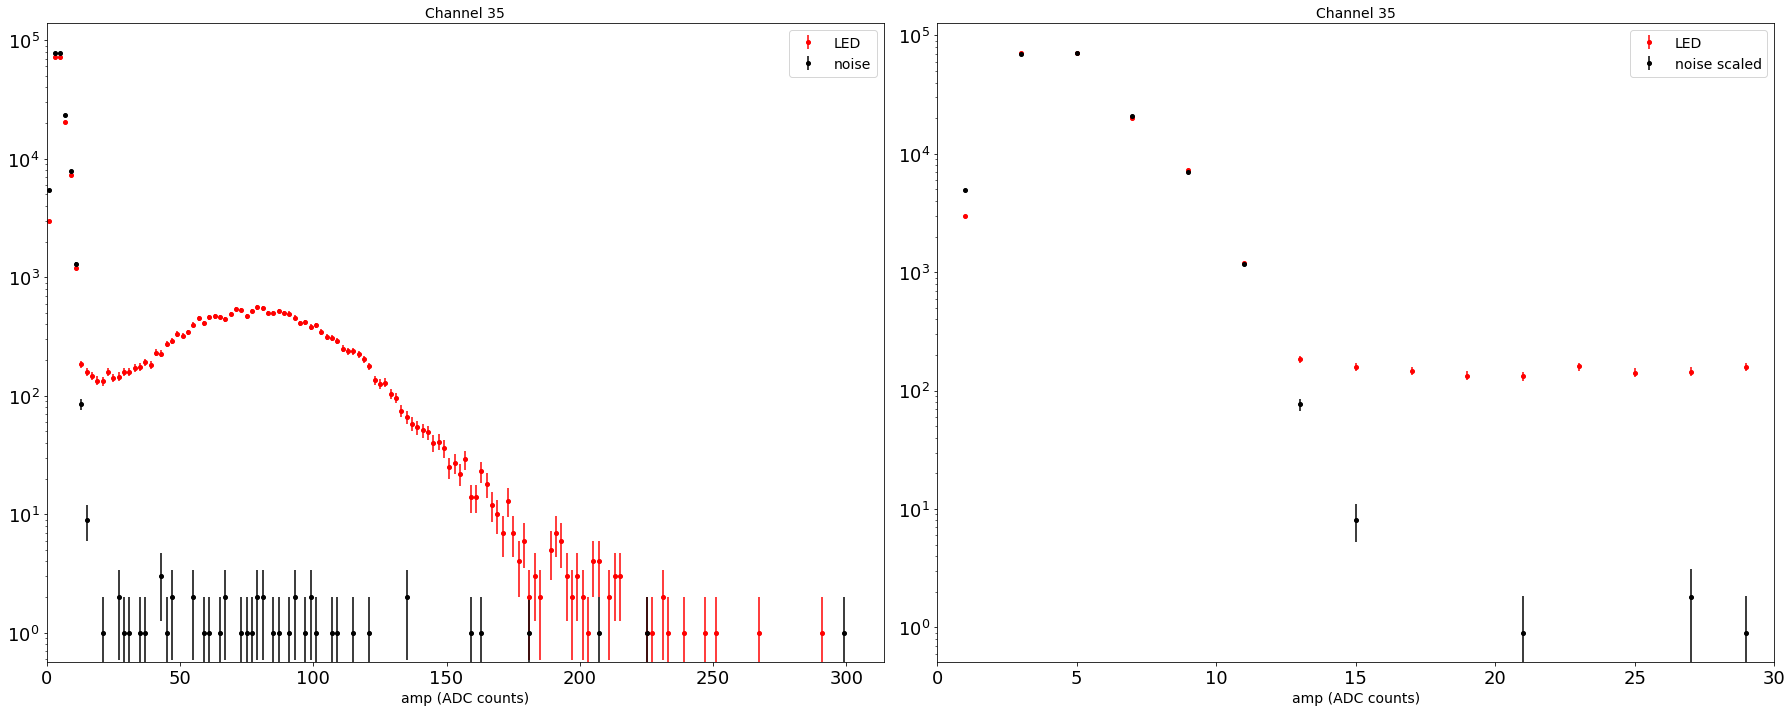

 14%|█▍        | 36/249 [00:36<03:30,  1.01it/s]

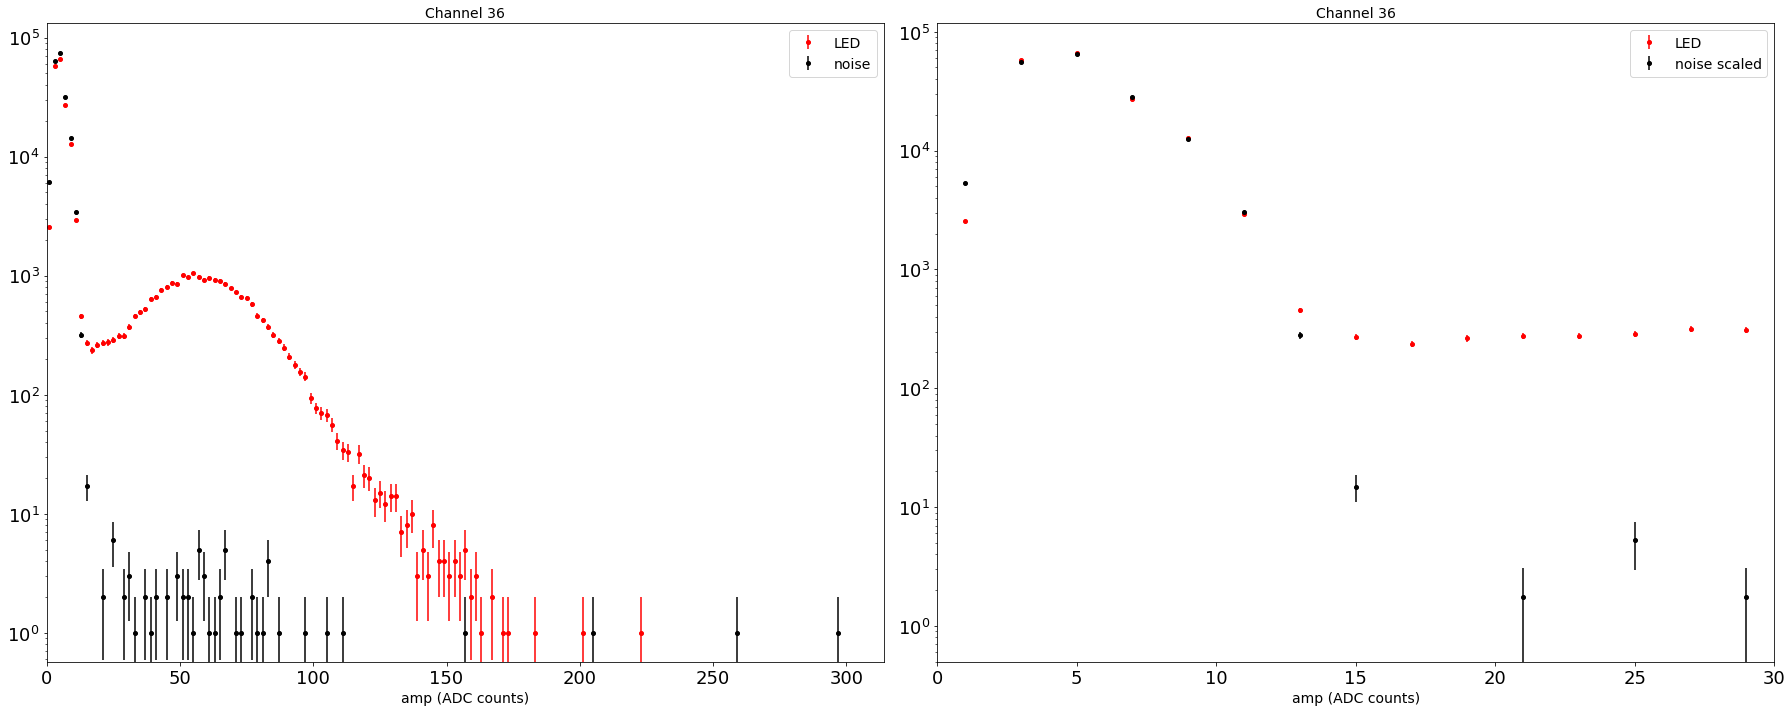

 15%|█▍        | 37/249 [00:37<03:27,  1.02it/s]

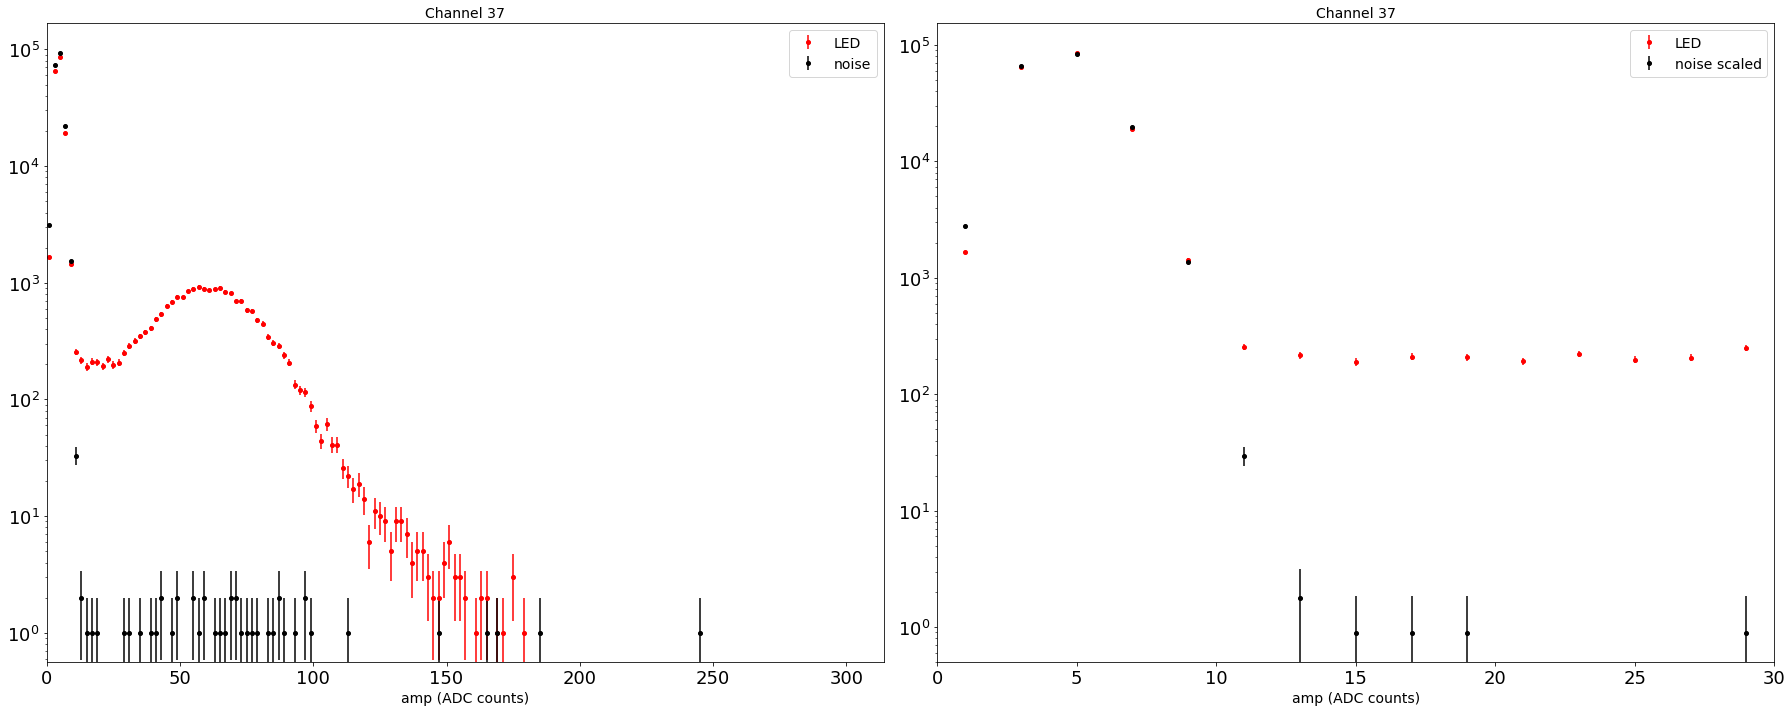

 15%|█▌        | 38/249 [00:38<03:26,  1.02it/s]

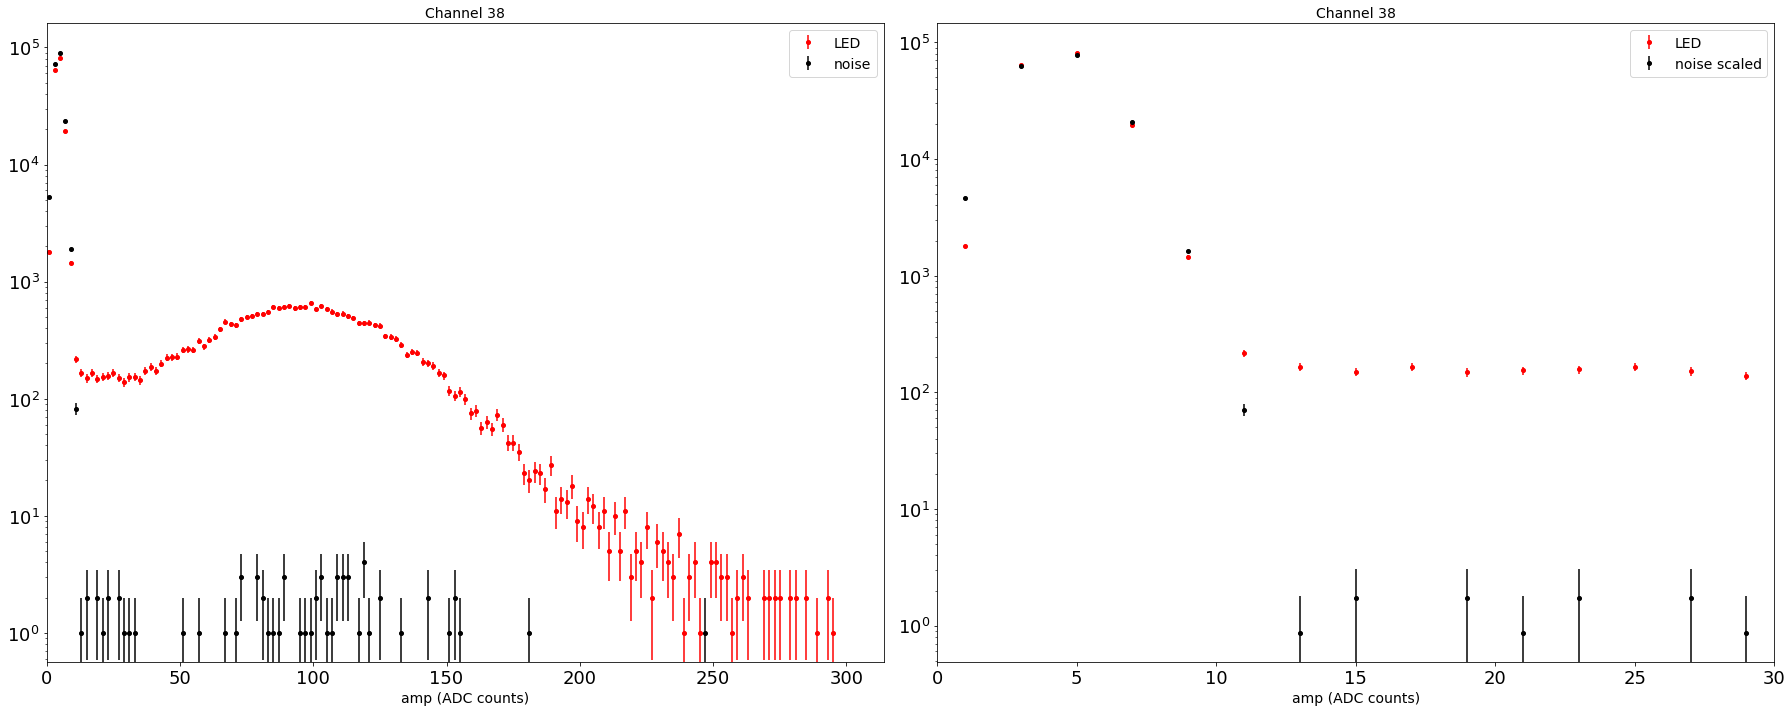

 16%|█▌        | 39/249 [00:39<03:24,  1.02it/s]

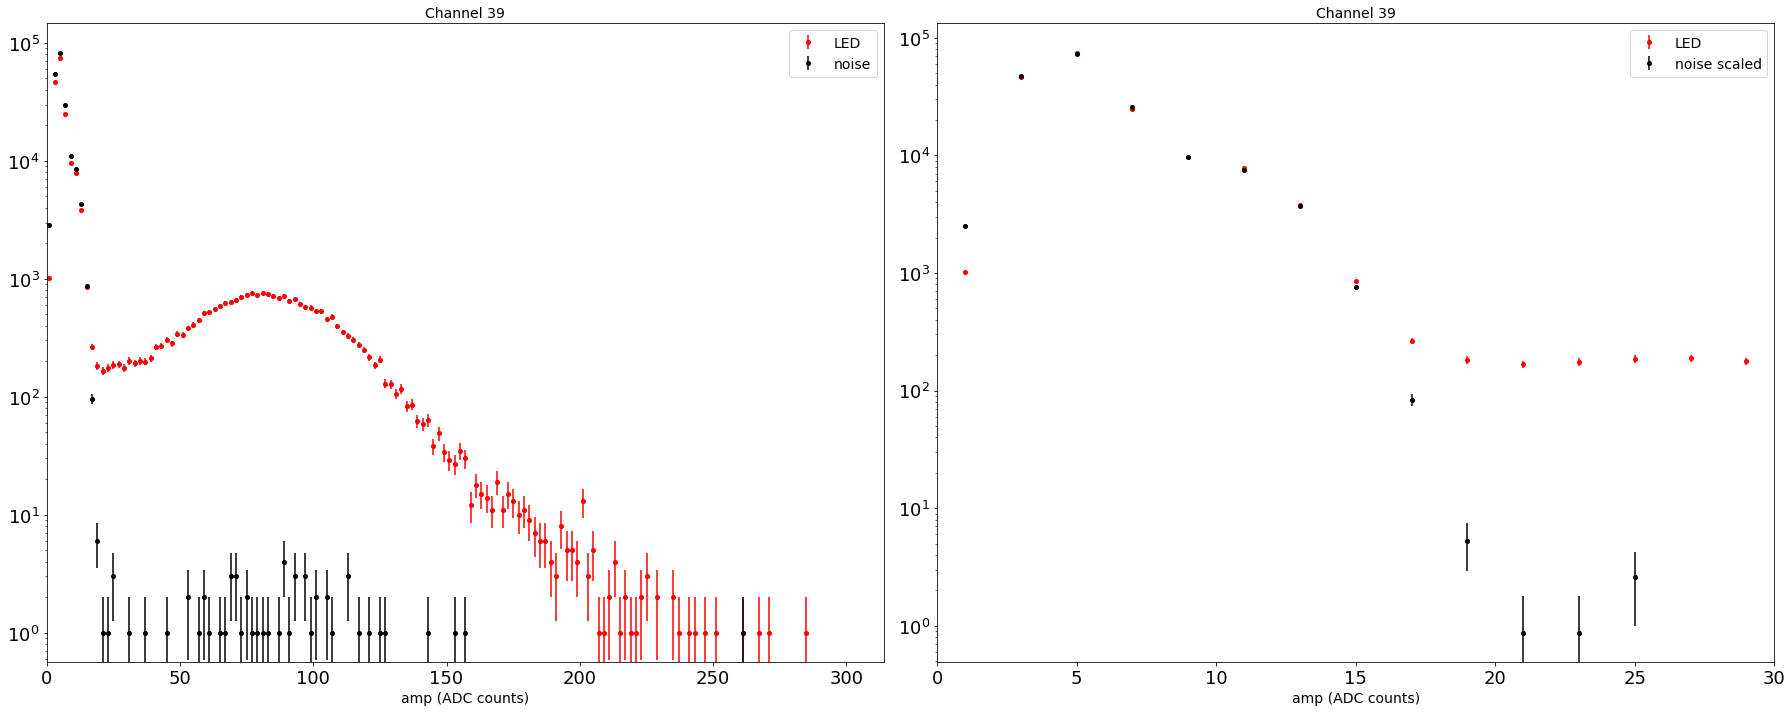

 16%|█▌        | 40/249 [00:40<03:23,  1.03it/s]

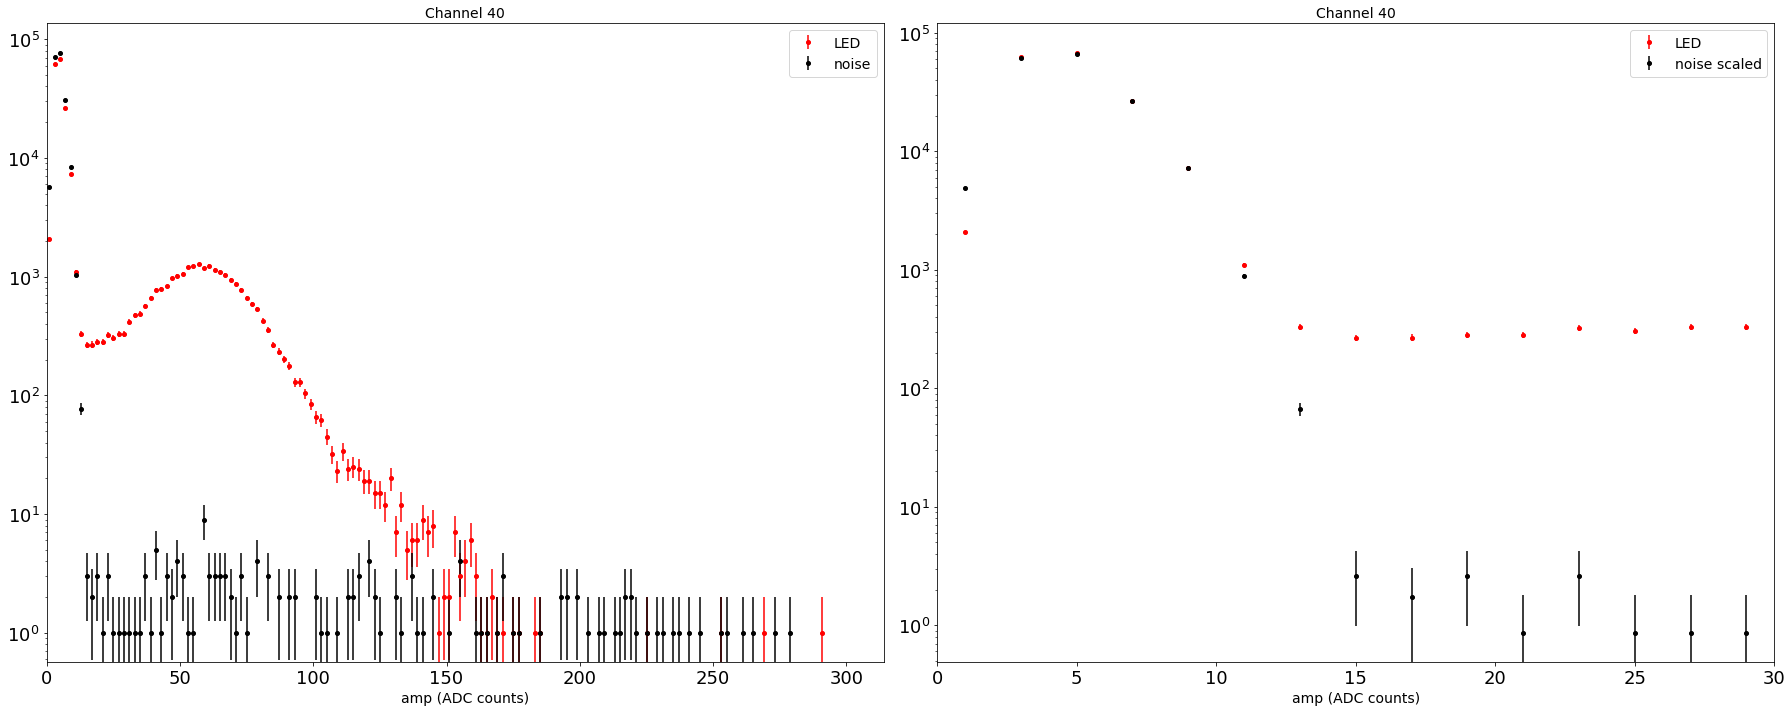

 16%|█▋        | 41/249 [00:41<03:21,  1.03it/s]

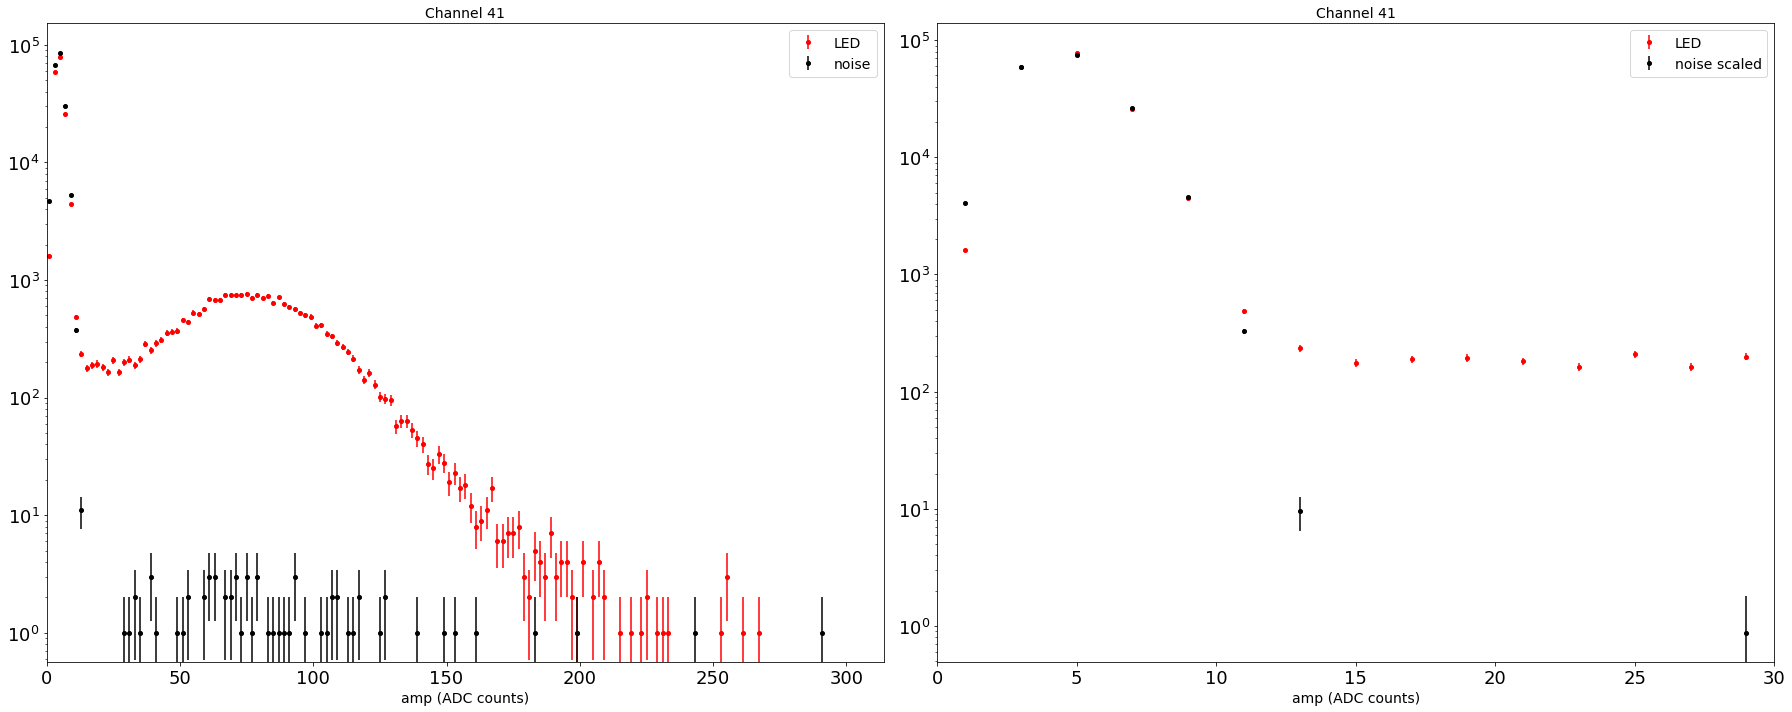

 17%|█▋        | 42/249 [00:42<03:20,  1.03it/s]

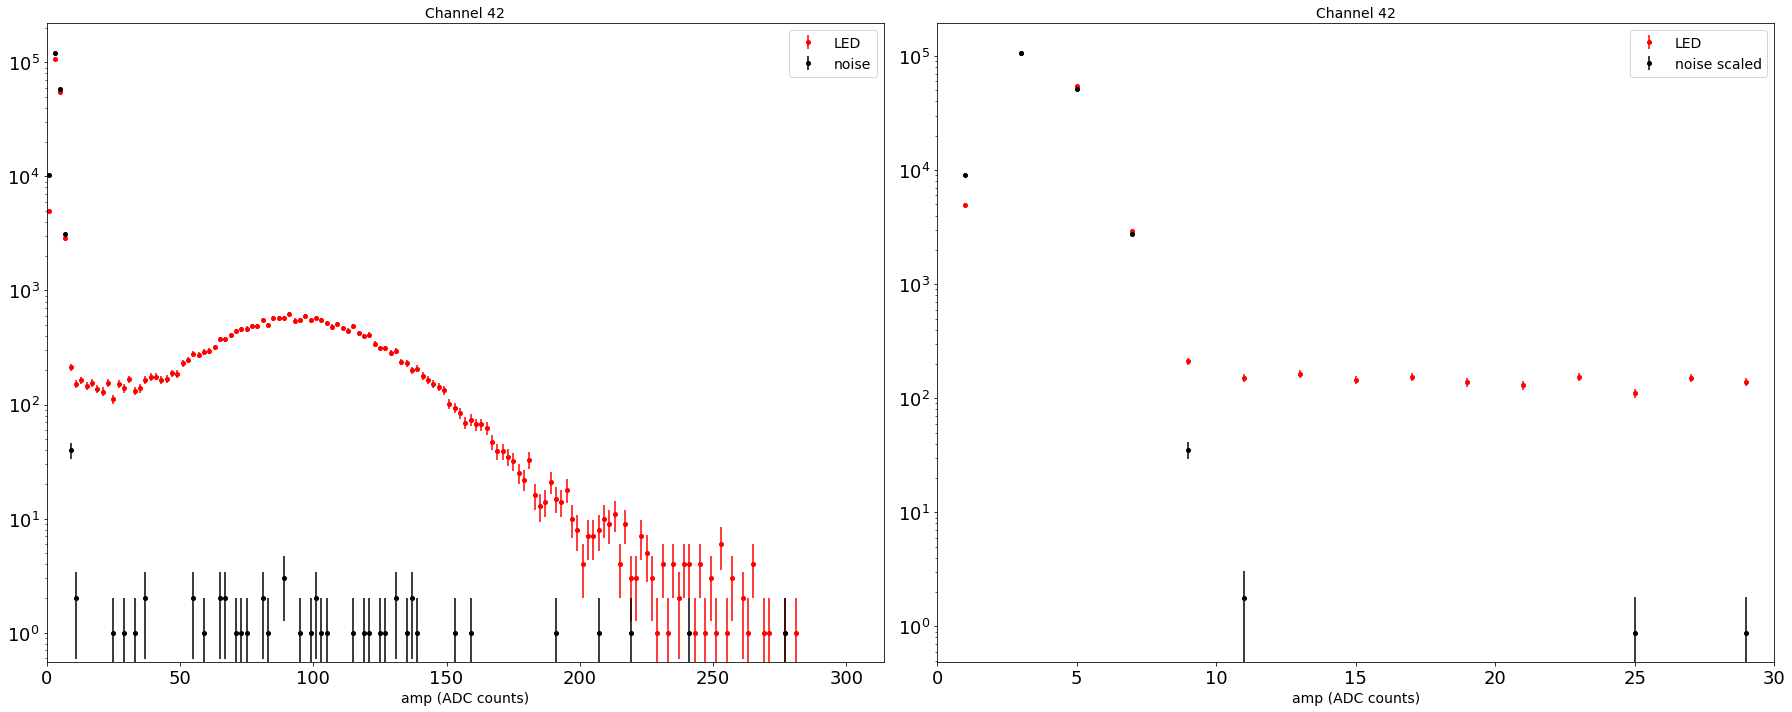

 17%|█▋        | 43/249 [00:43<03:20,  1.03it/s]

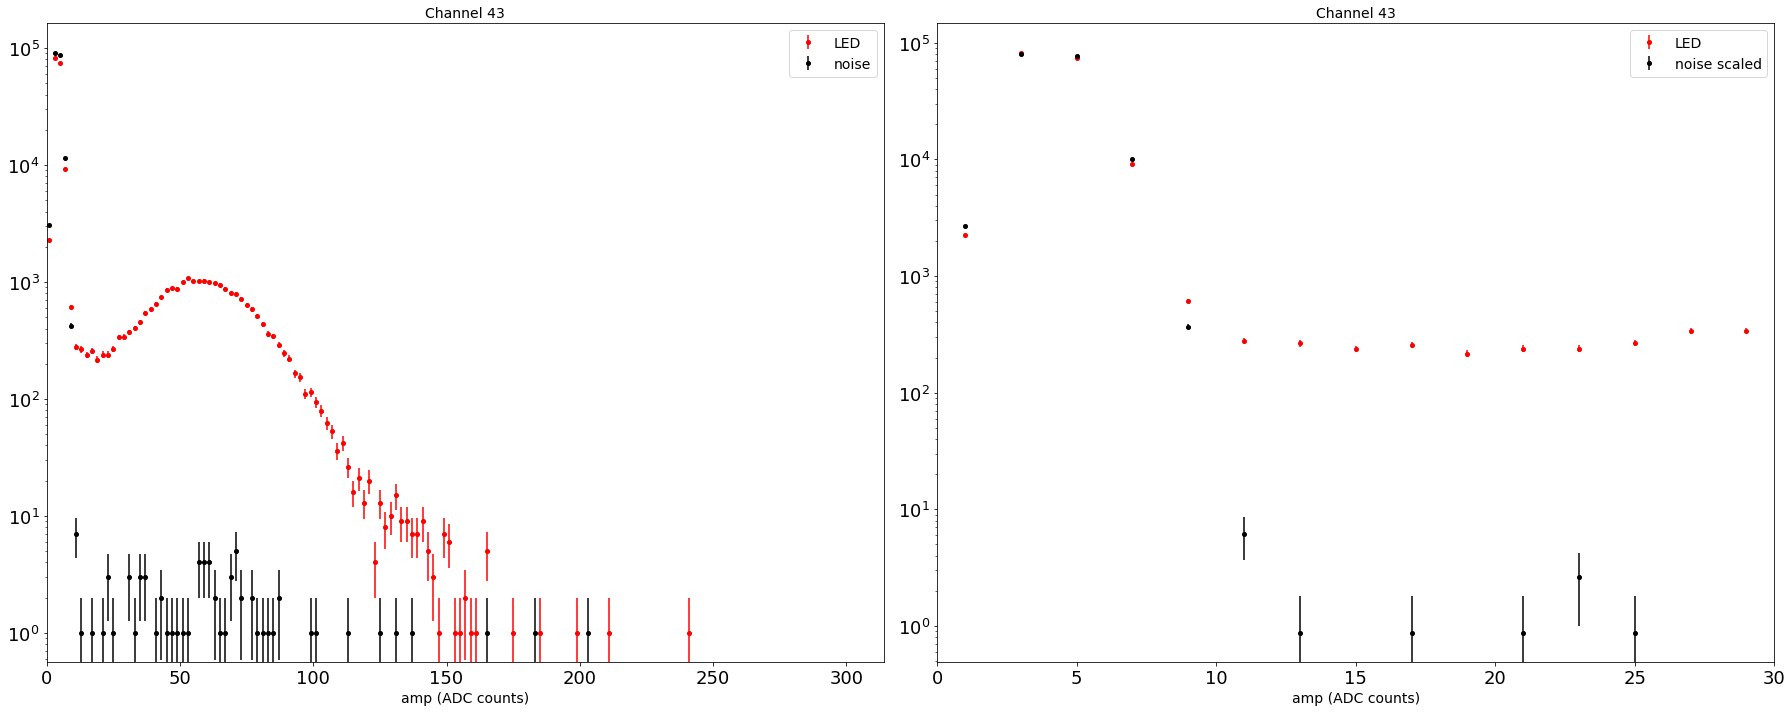

 18%|█▊        | 44/249 [00:43<03:18,  1.03it/s]

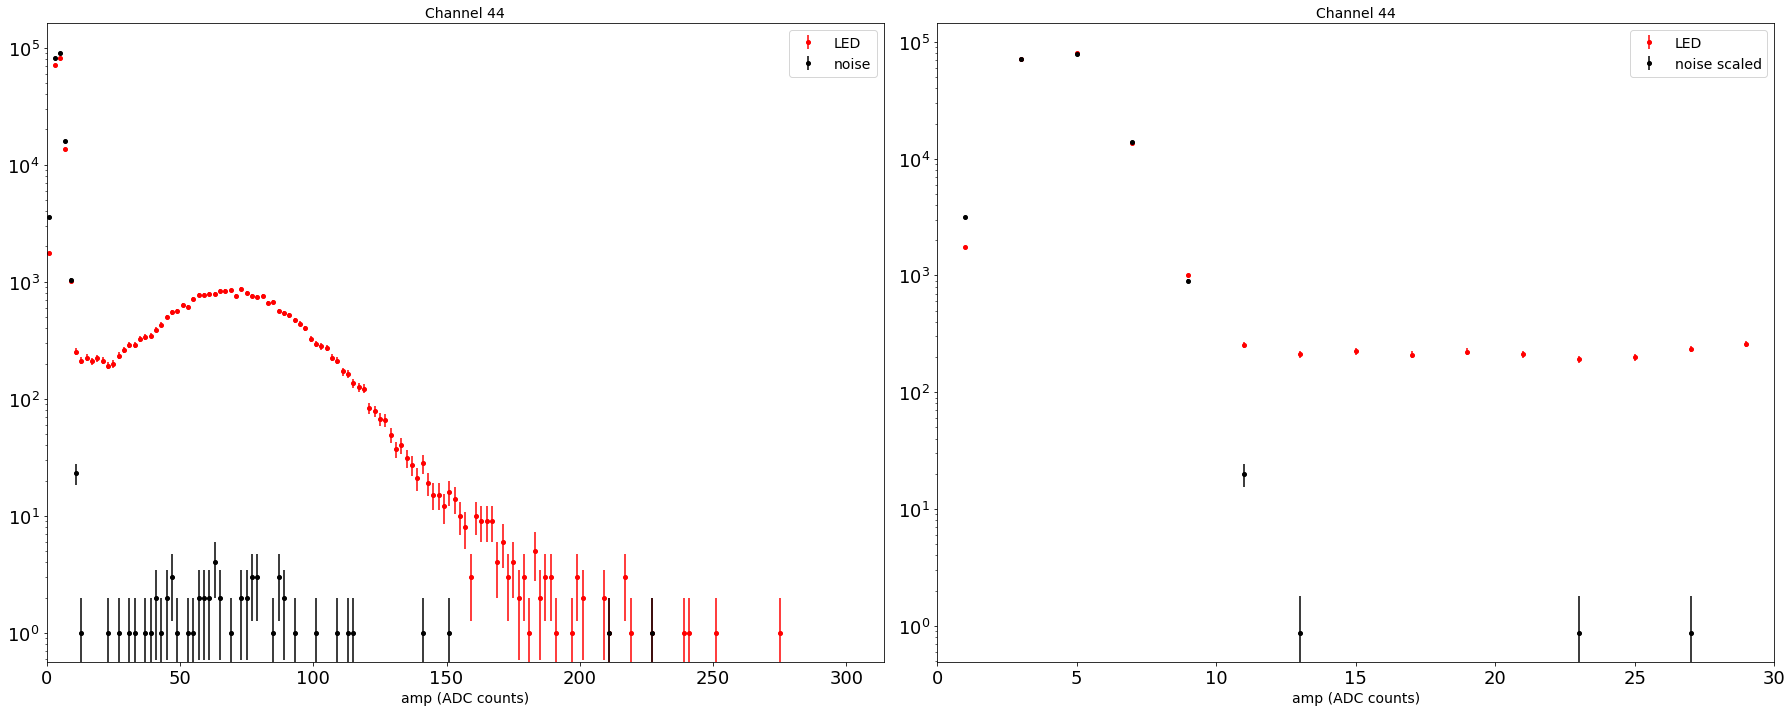

 18%|█▊        | 45/249 [00:44<03:18,  1.03it/s]

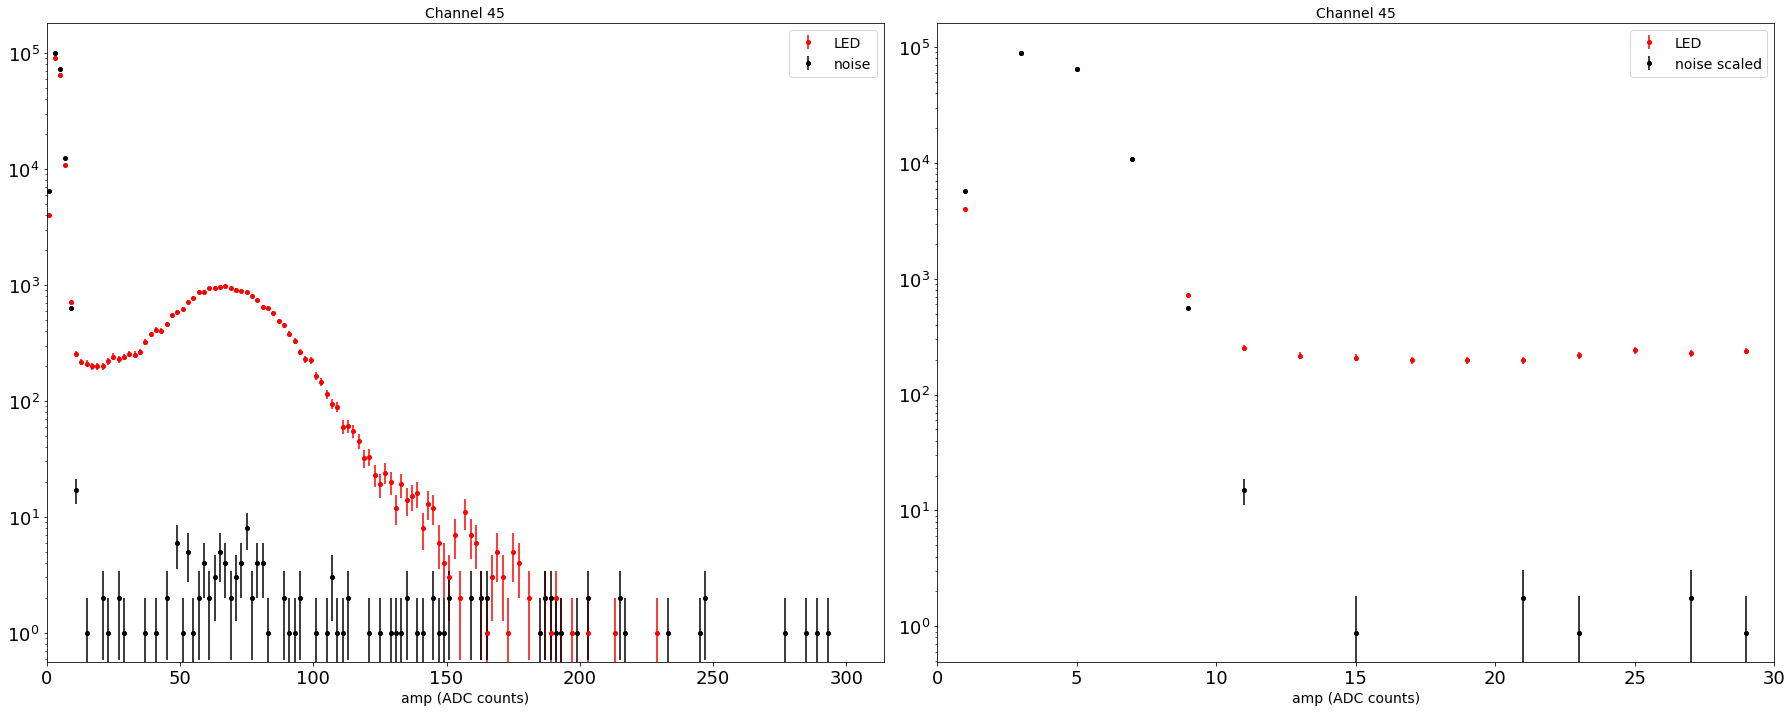

 18%|█▊        | 46/249 [00:45<03:17,  1.03it/s]

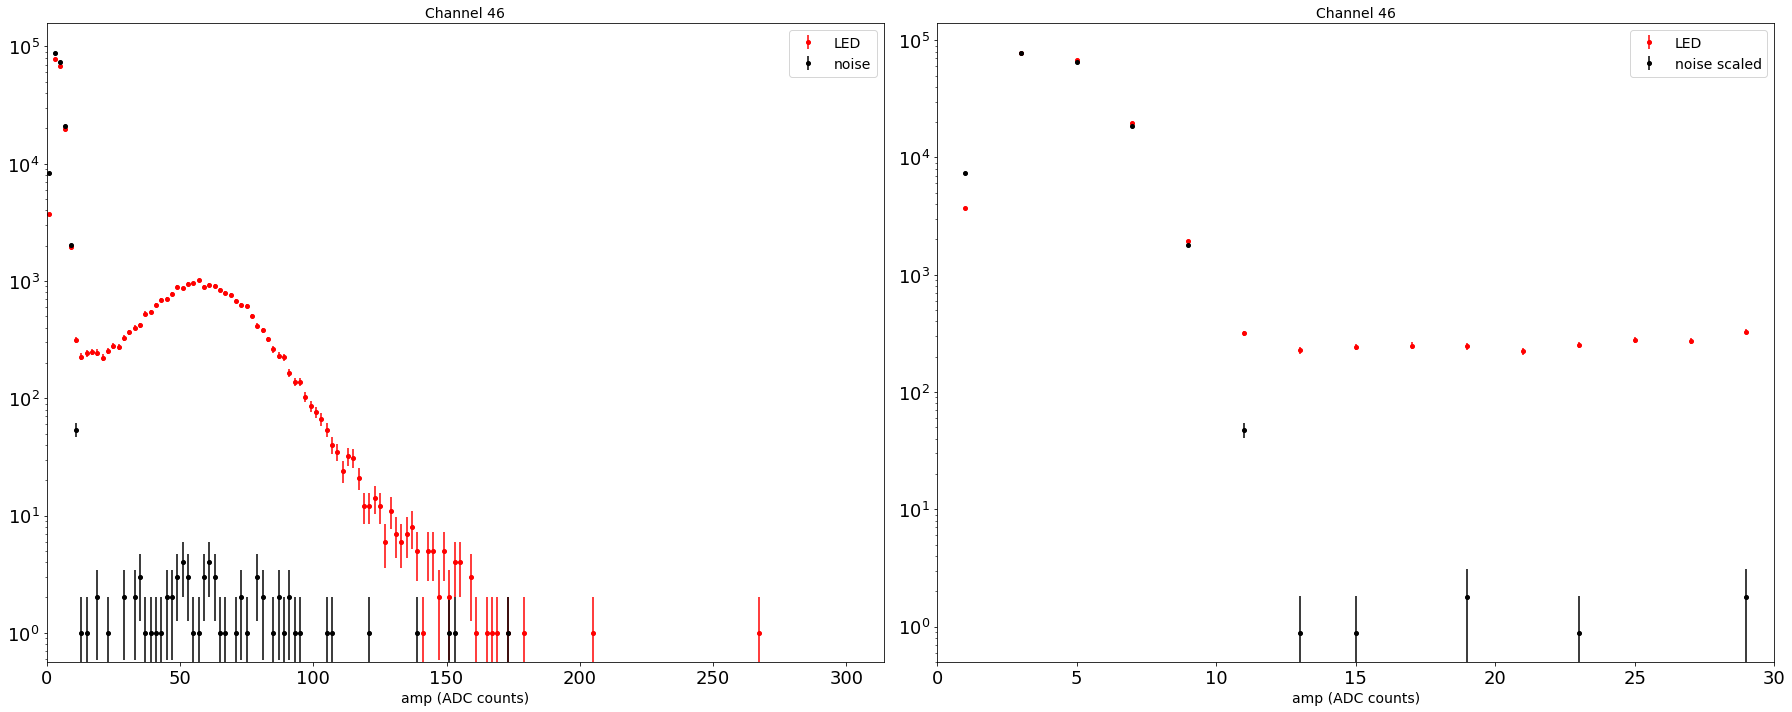

 19%|█▉        | 47/249 [00:46<03:16,  1.03it/s]

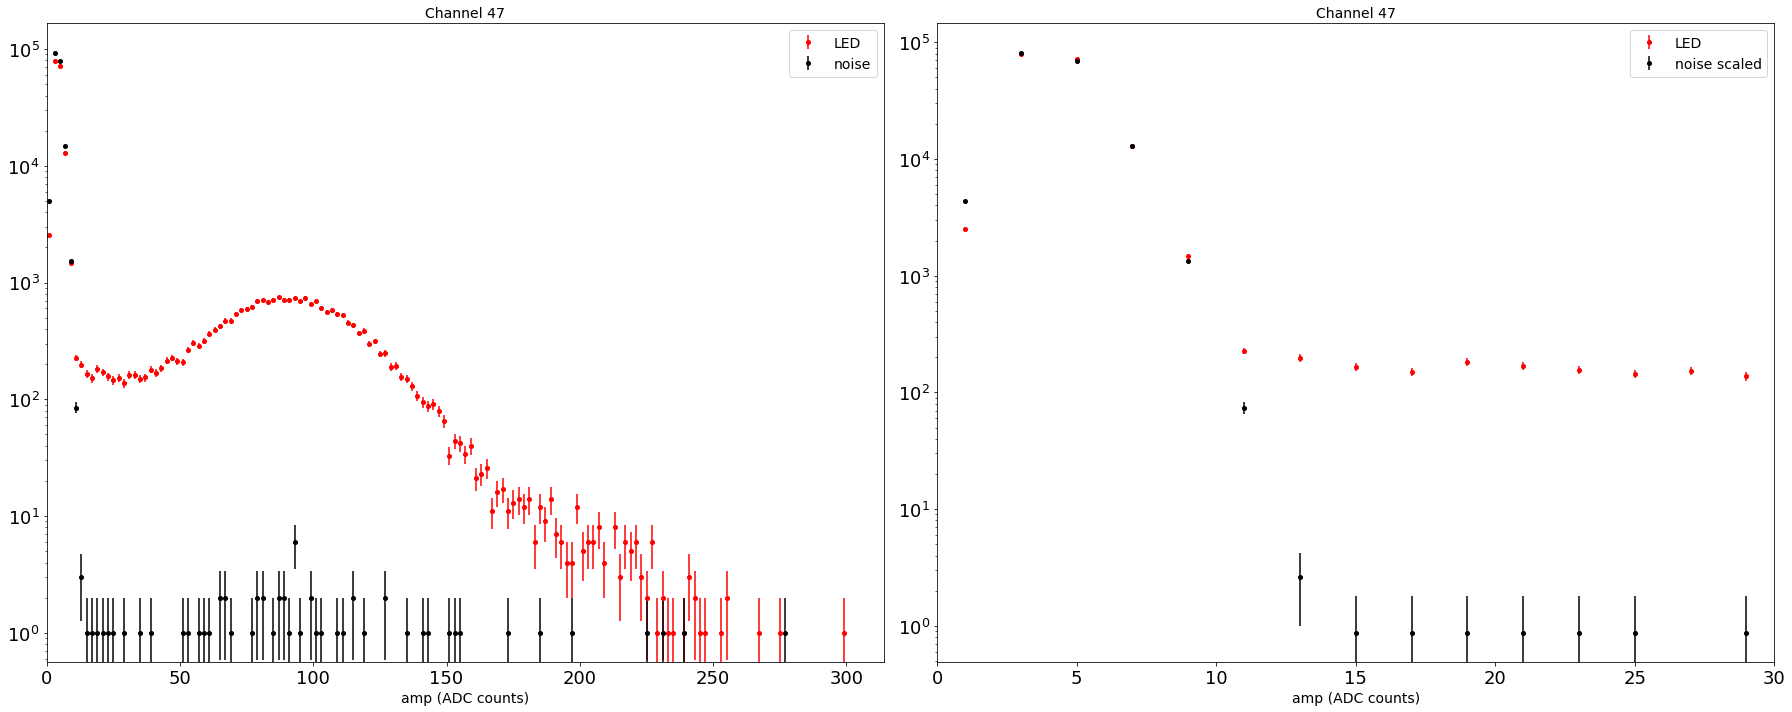

 19%|█▉        | 48/249 [00:47<03:14,  1.03it/s]

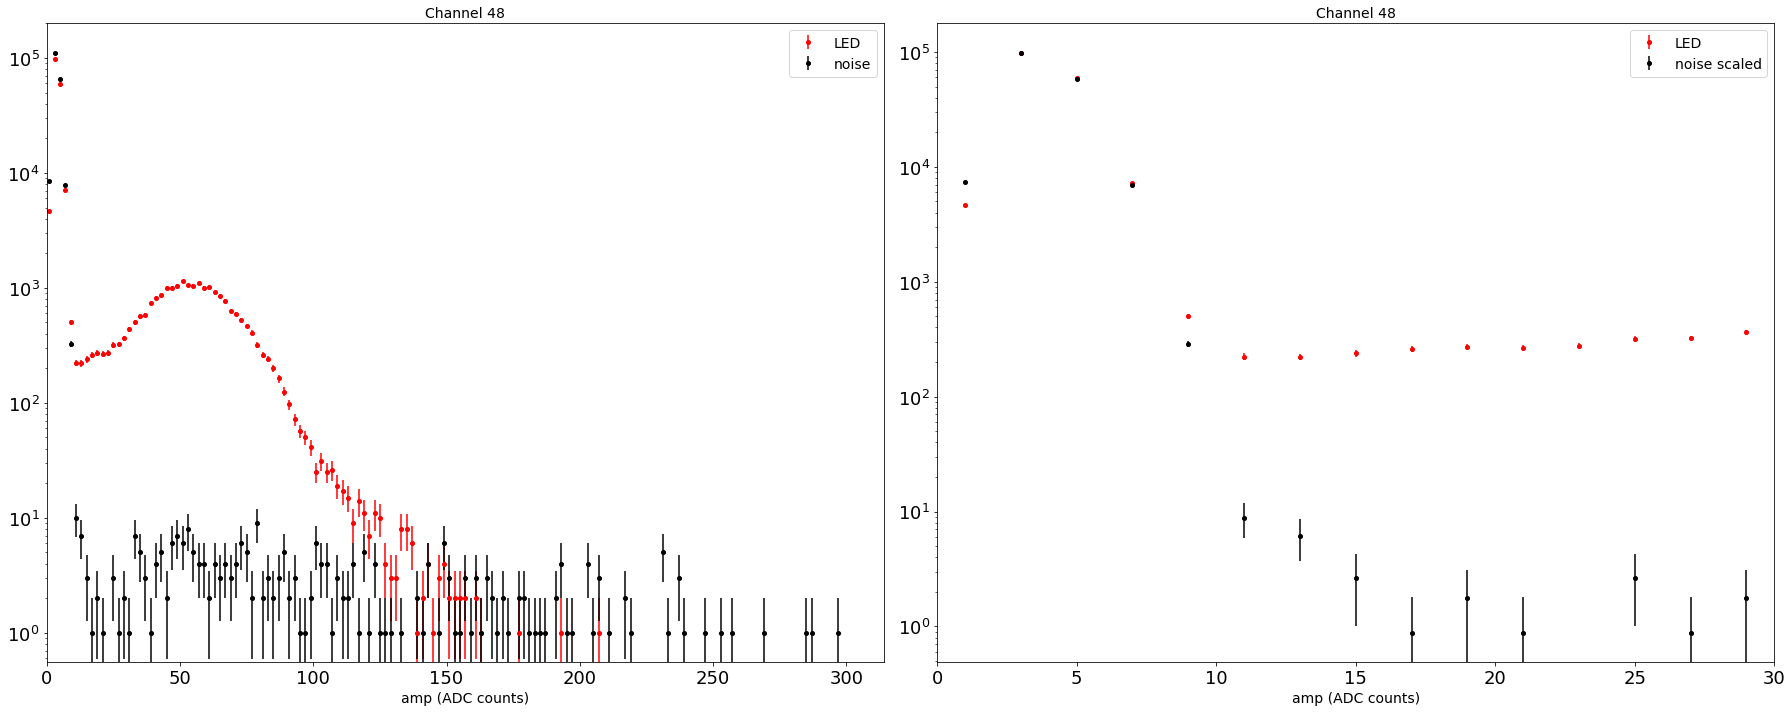

 20%|█▉        | 49/249 [00:48<03:14,  1.03it/s]

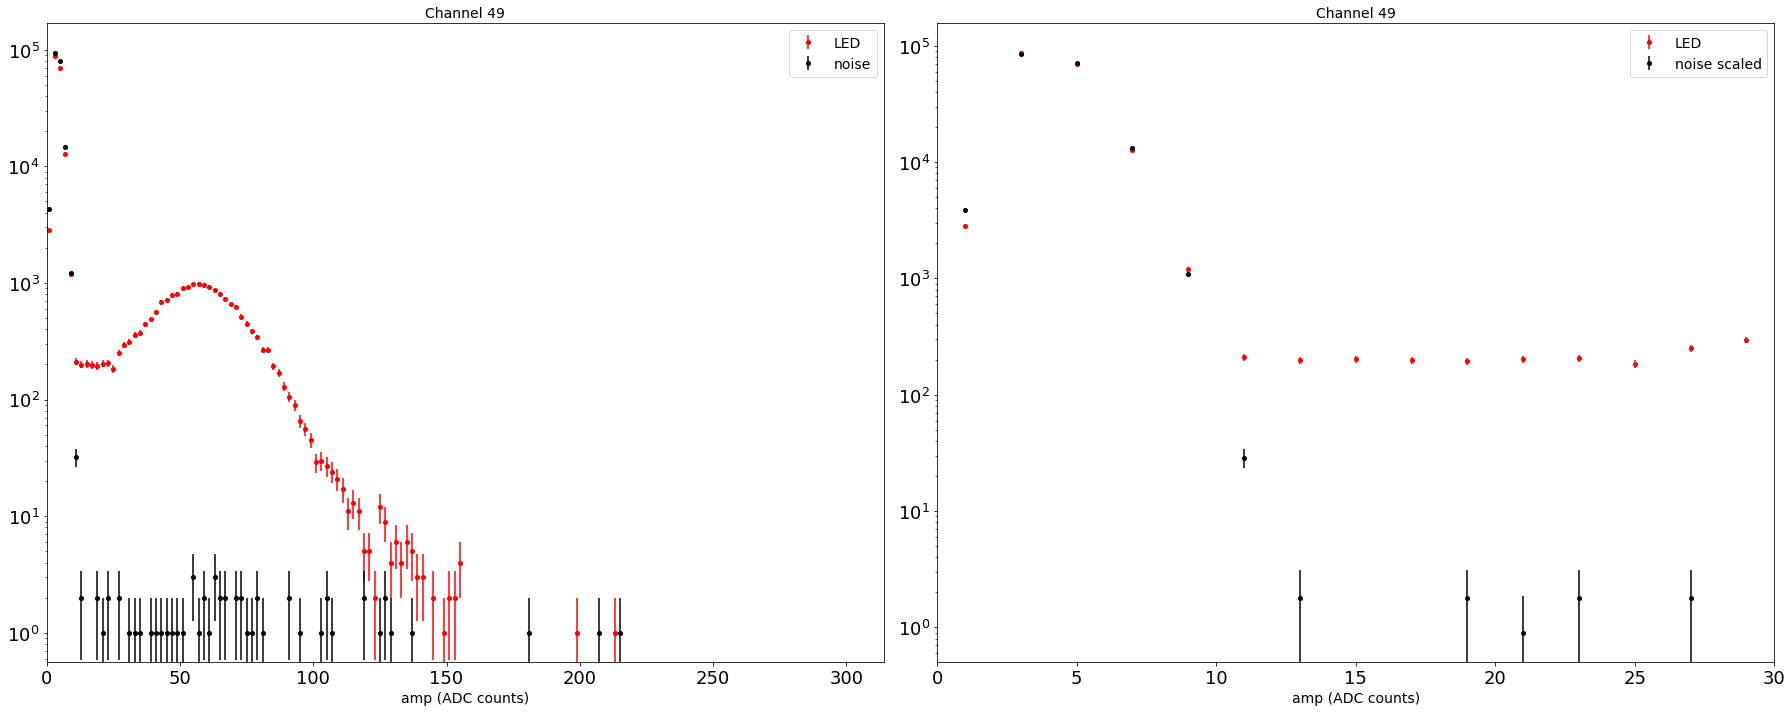

 20%|██        | 50/249 [00:49<03:13,  1.03it/s]

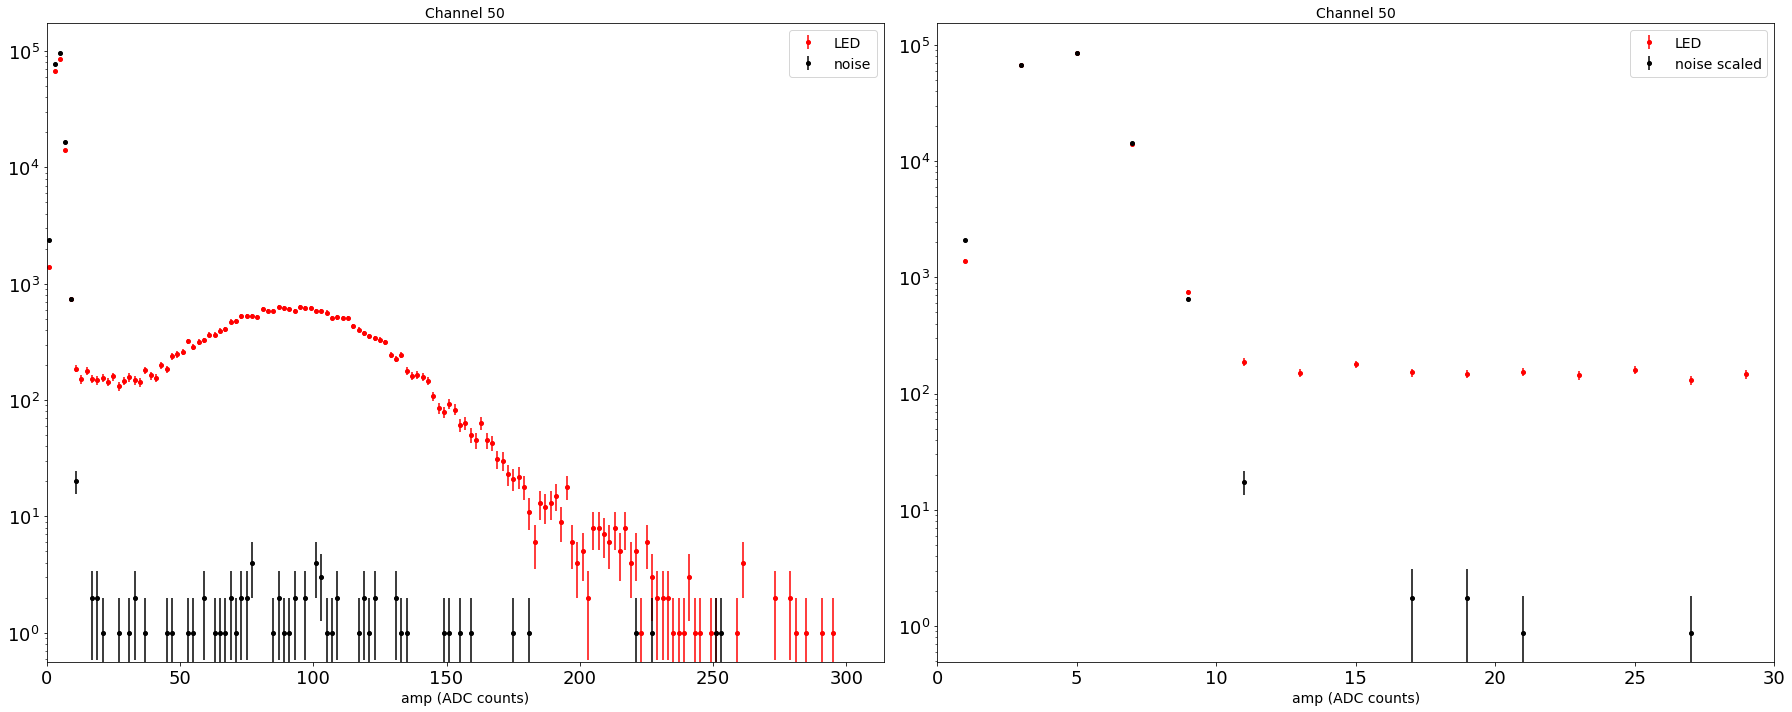

 20%|██        | 51/249 [00:50<03:12,  1.03it/s]

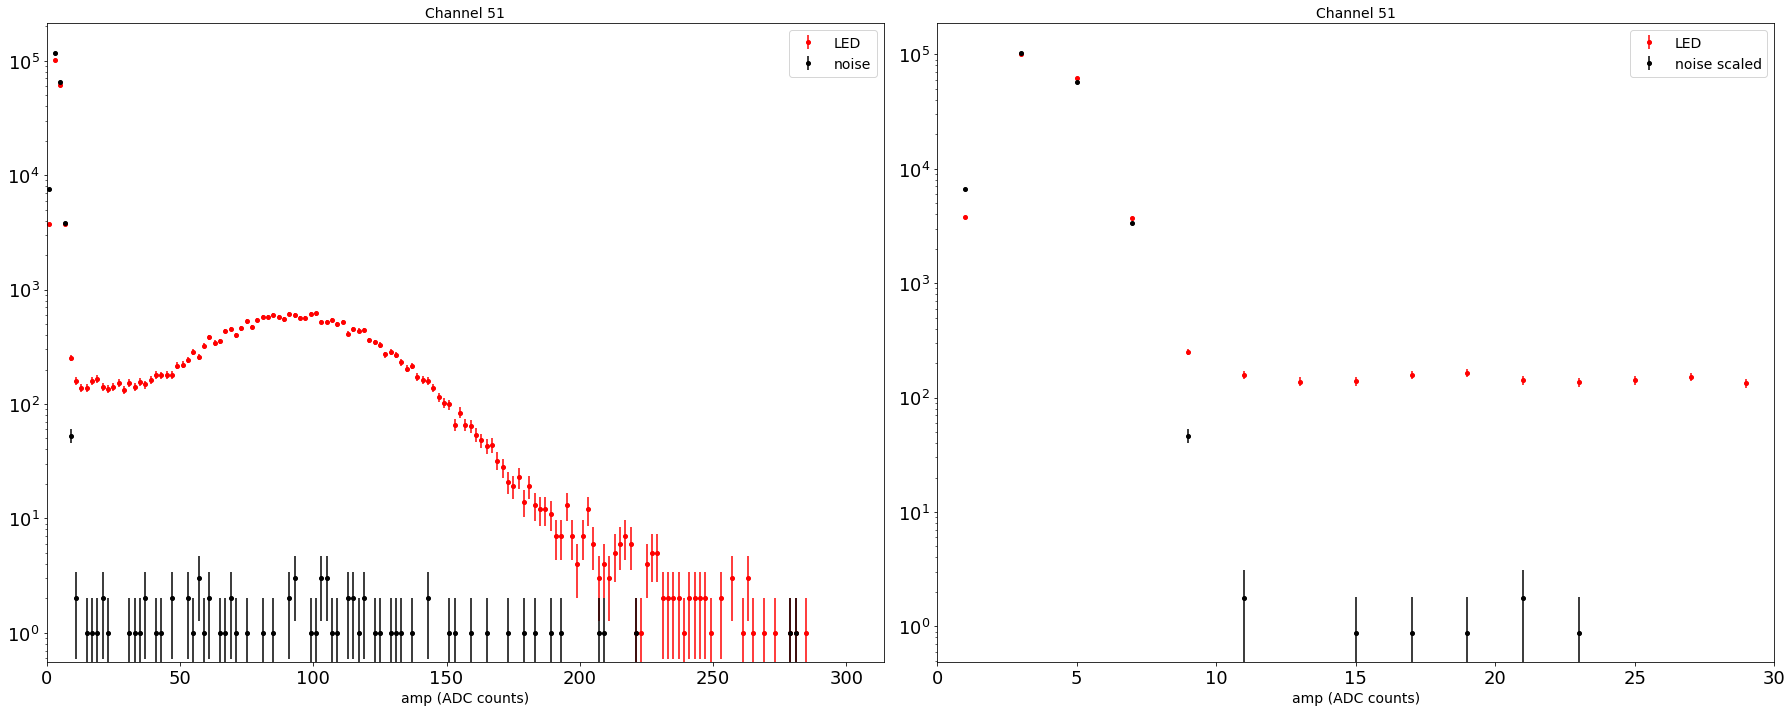

 21%|██        | 52/249 [00:51<03:11,  1.03it/s]

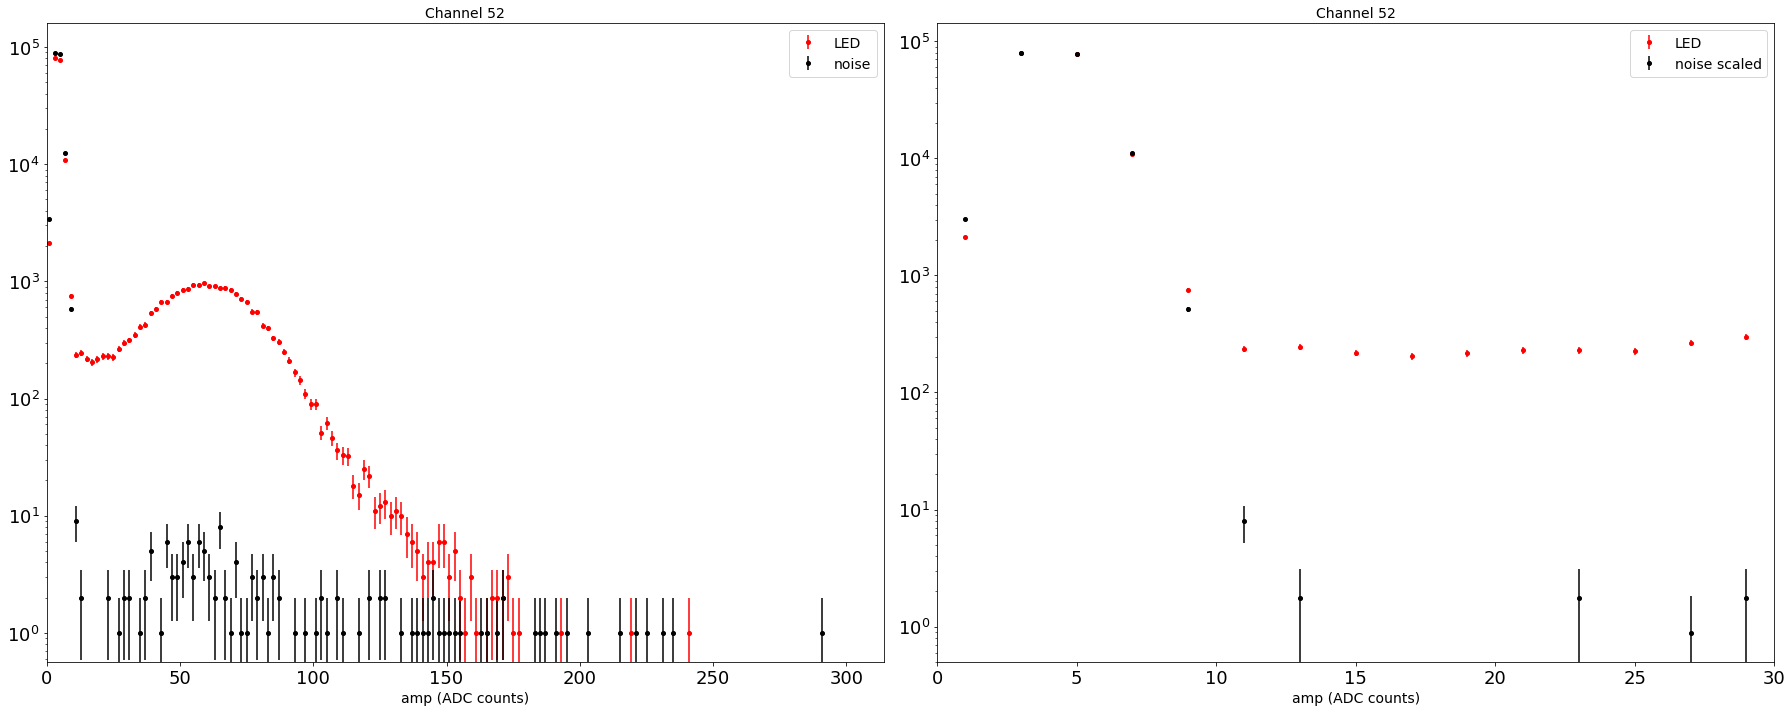

 21%|██▏       | 53/249 [00:52<03:12,  1.02it/s]

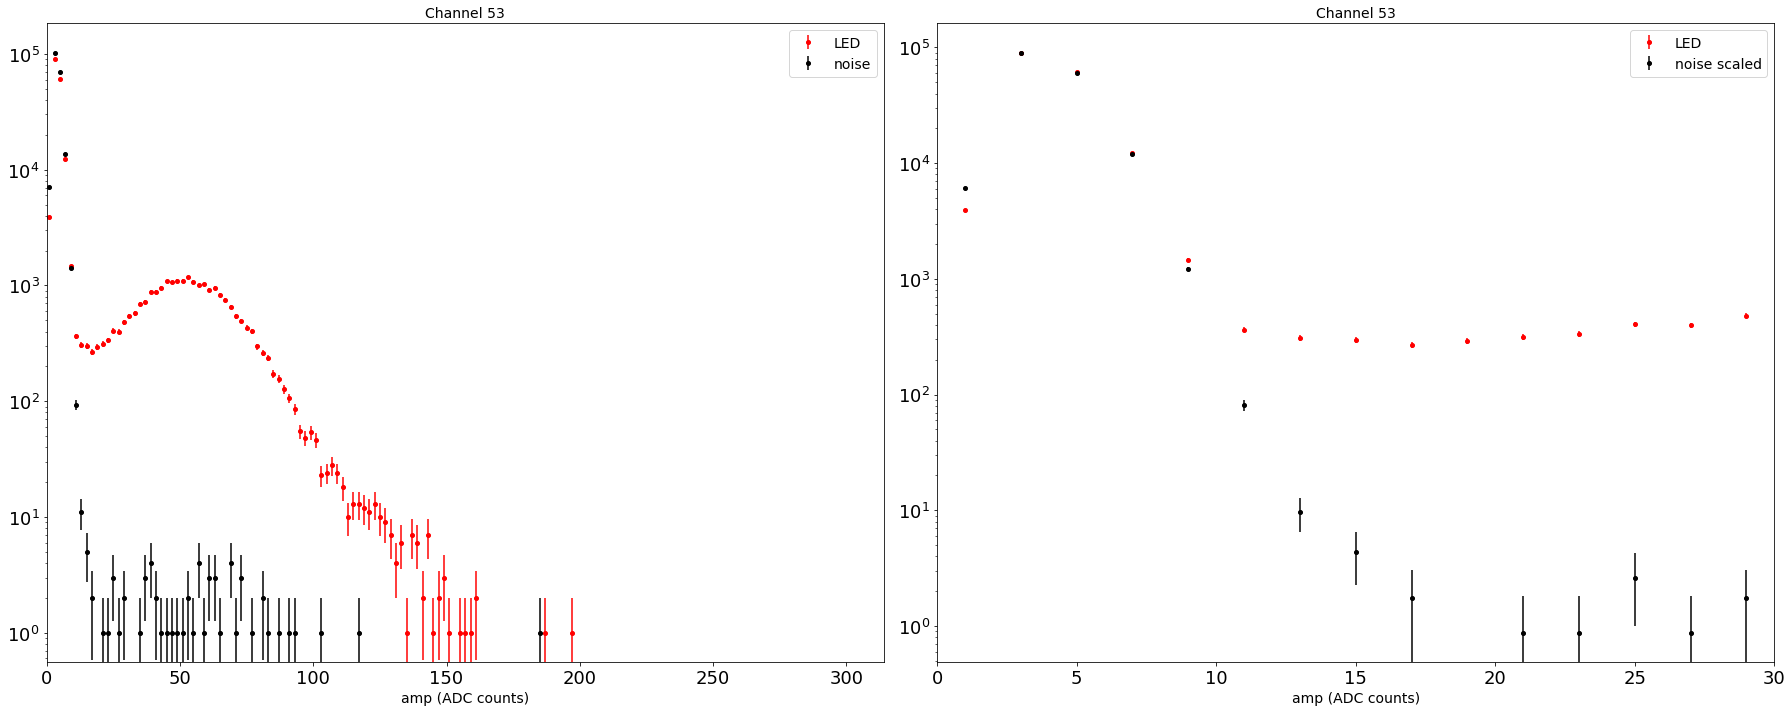

 22%|██▏       | 54/249 [00:53<03:13,  1.01it/s]

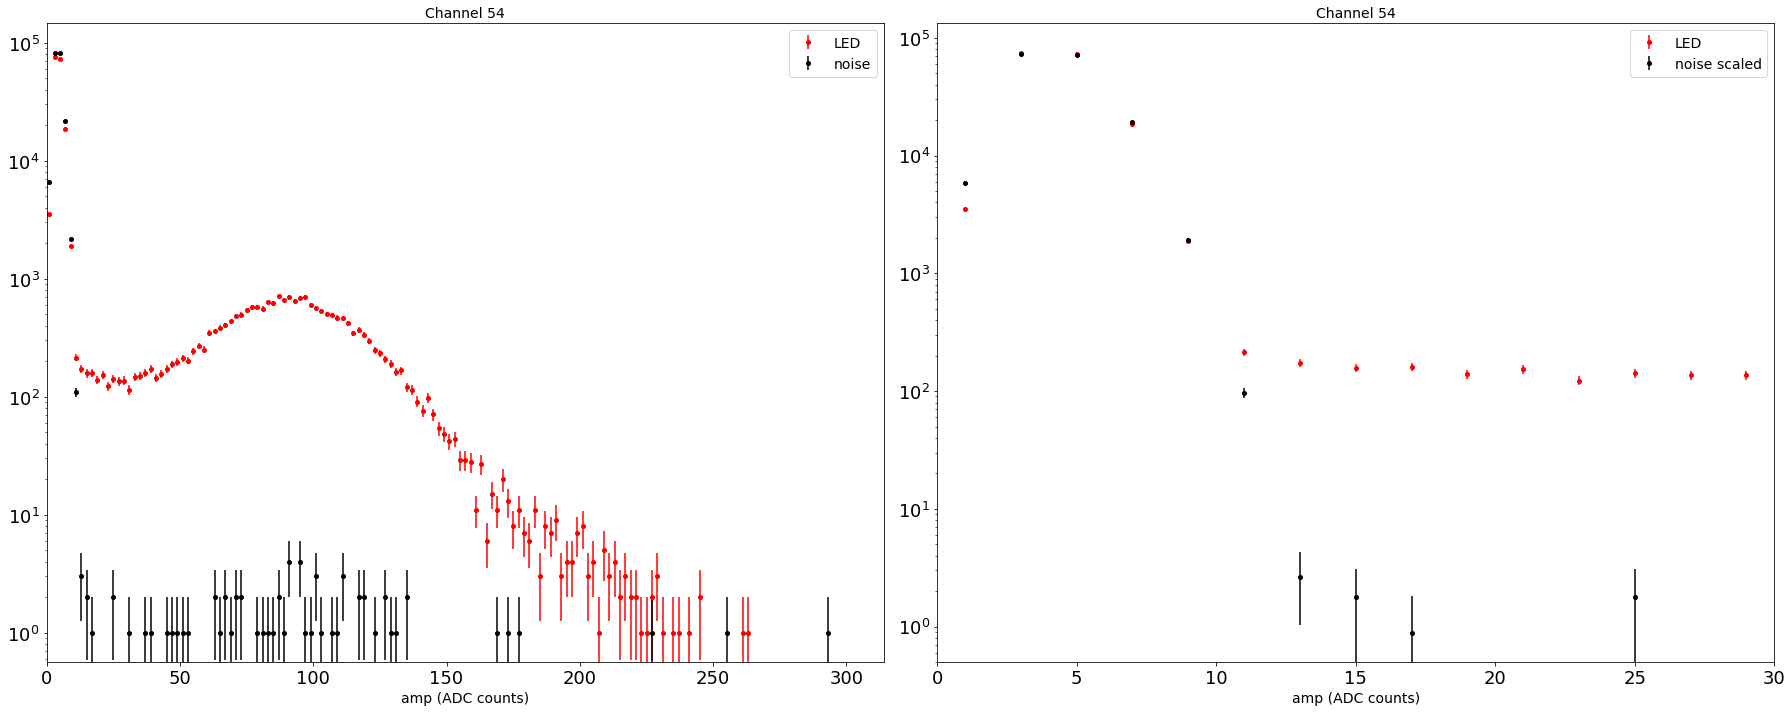

 22%|██▏       | 55/249 [00:54<03:11,  1.01it/s]

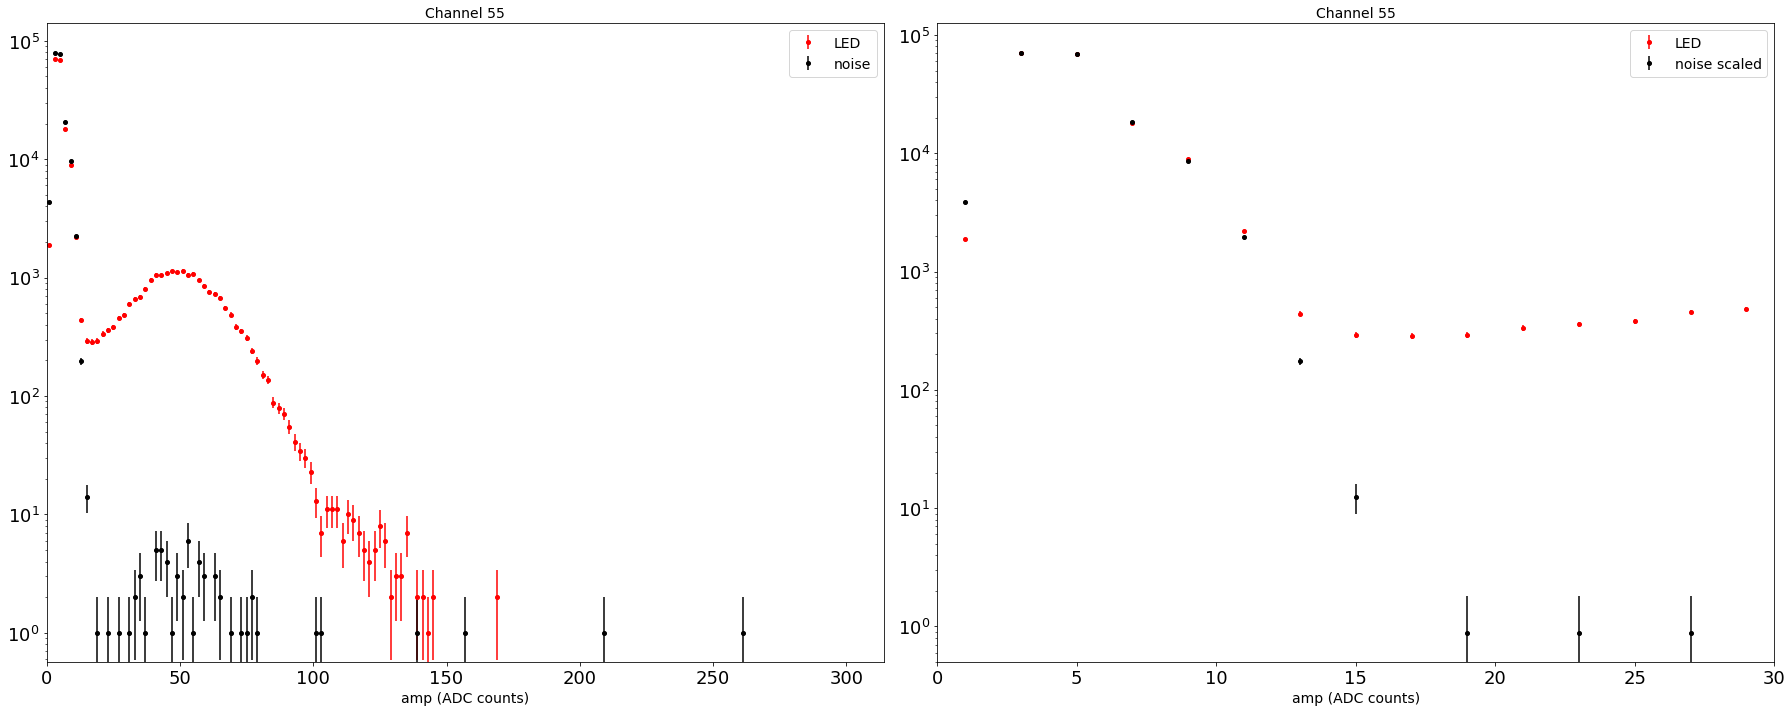

 22%|██▏       | 56/249 [00:55<03:11,  1.01it/s]

 23%|██▎       | 57/249 [00:56<03:12,  1.00s/it]

 23%|██▎       | 58/249 [00:57<03:09,  1.01it/s]

 24%|██▎       | 59/249 [00:58<03:06,  1.02it/s]

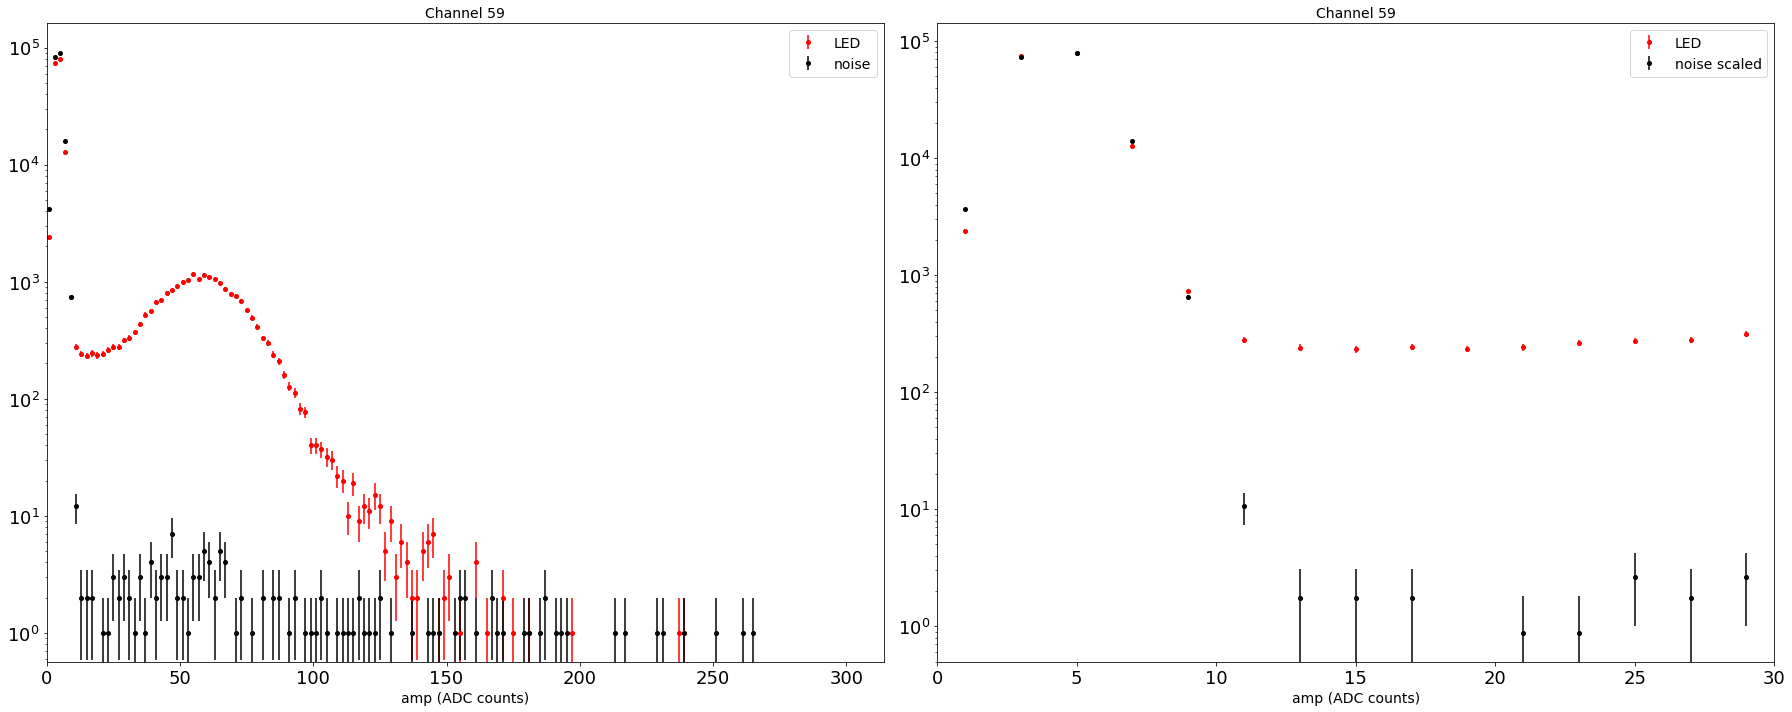

 24%|██▍       | 60/249 [00:59<03:04,  1.02it/s]

 24%|██▍       | 61/249 [01:00<03:07,  1.00it/s]

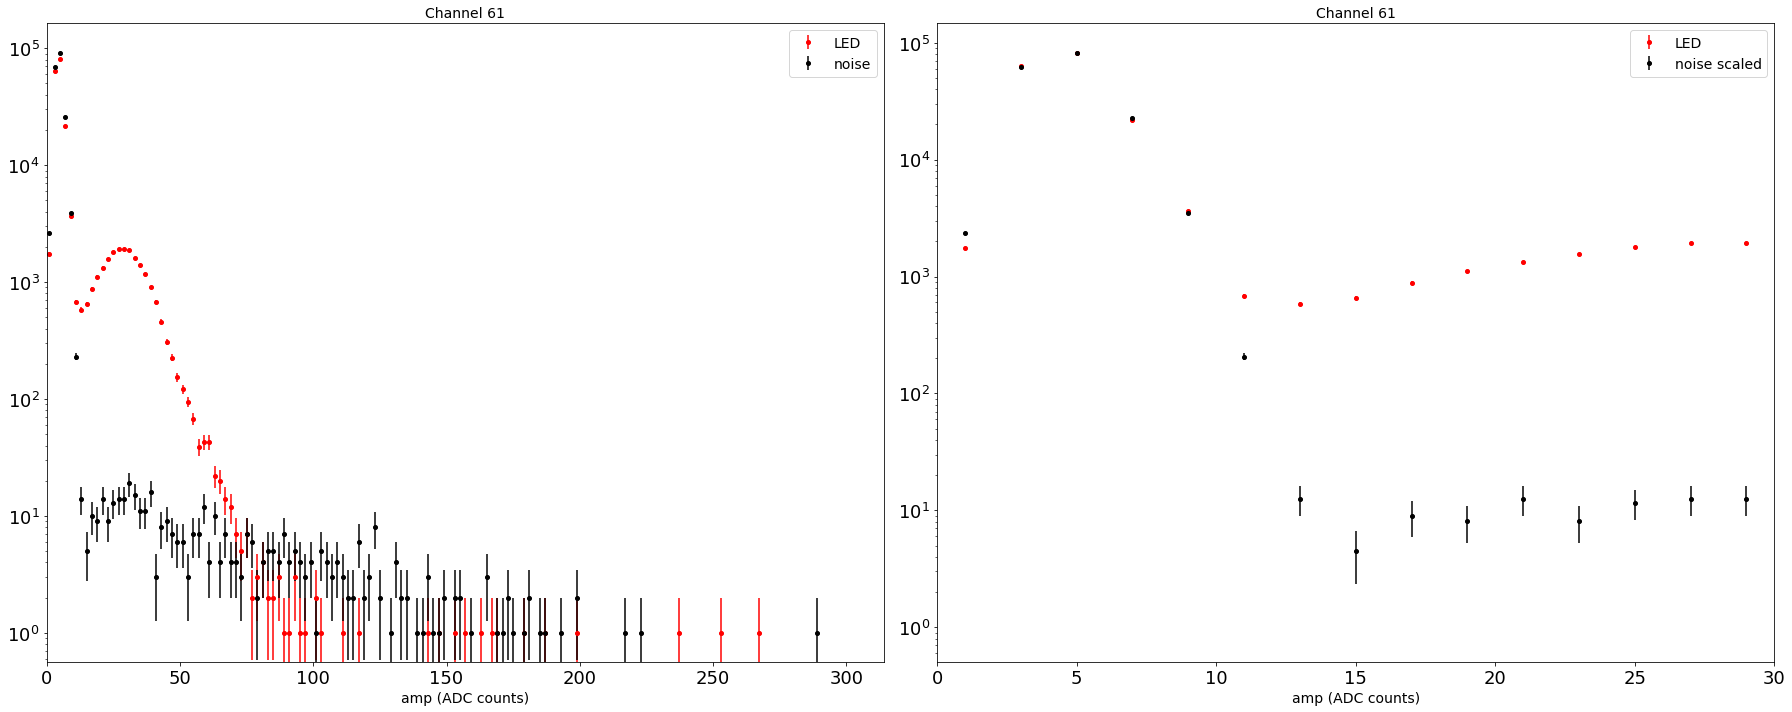

 25%|██▍       | 62/249 [01:01<03:07,  1.00s/it]

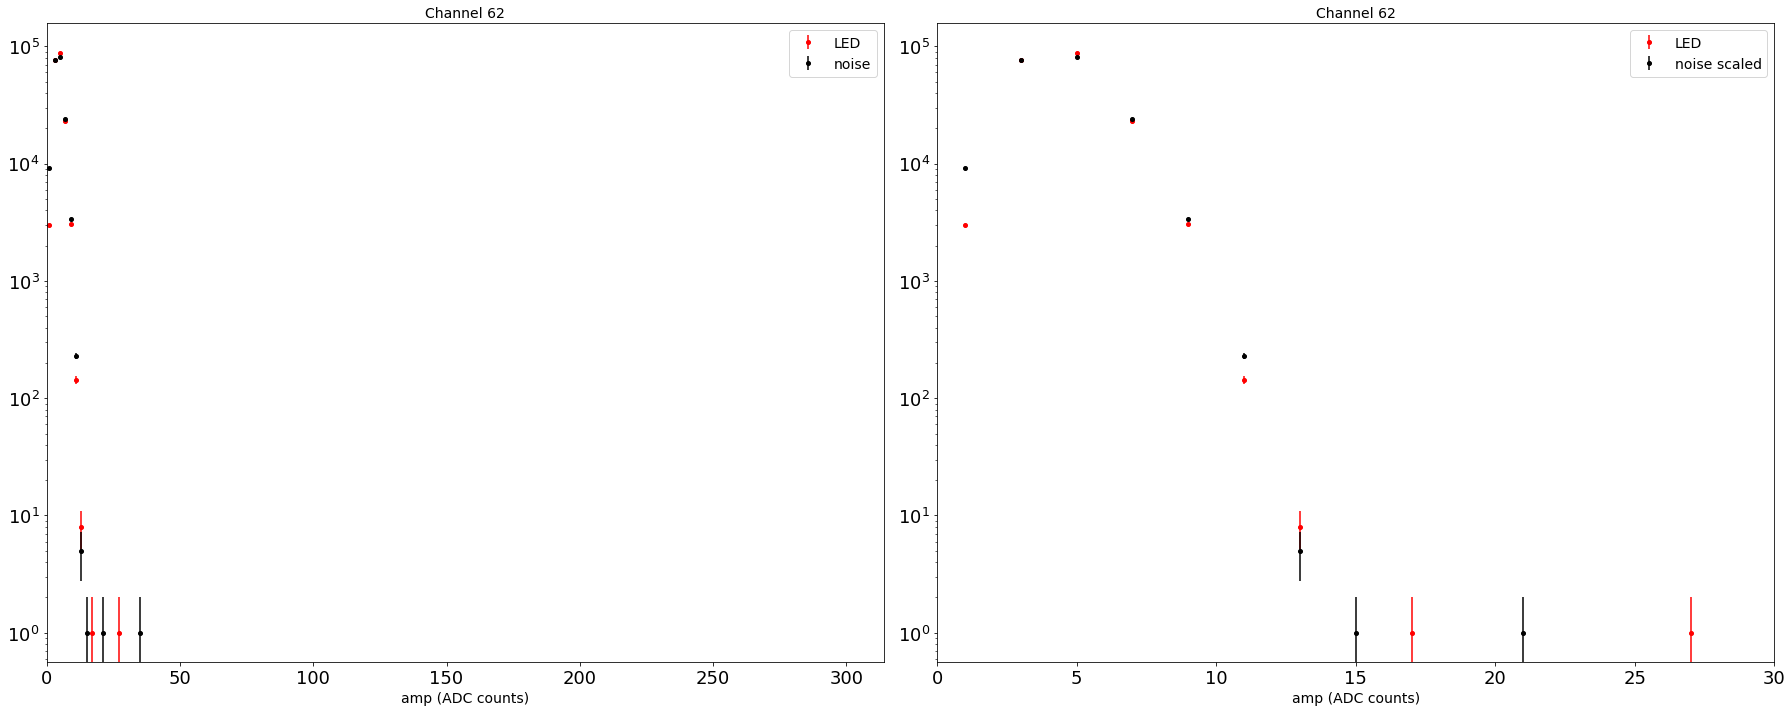

 25%|██▌       | 63/249 [01:02<03:06,  1.00s/it]

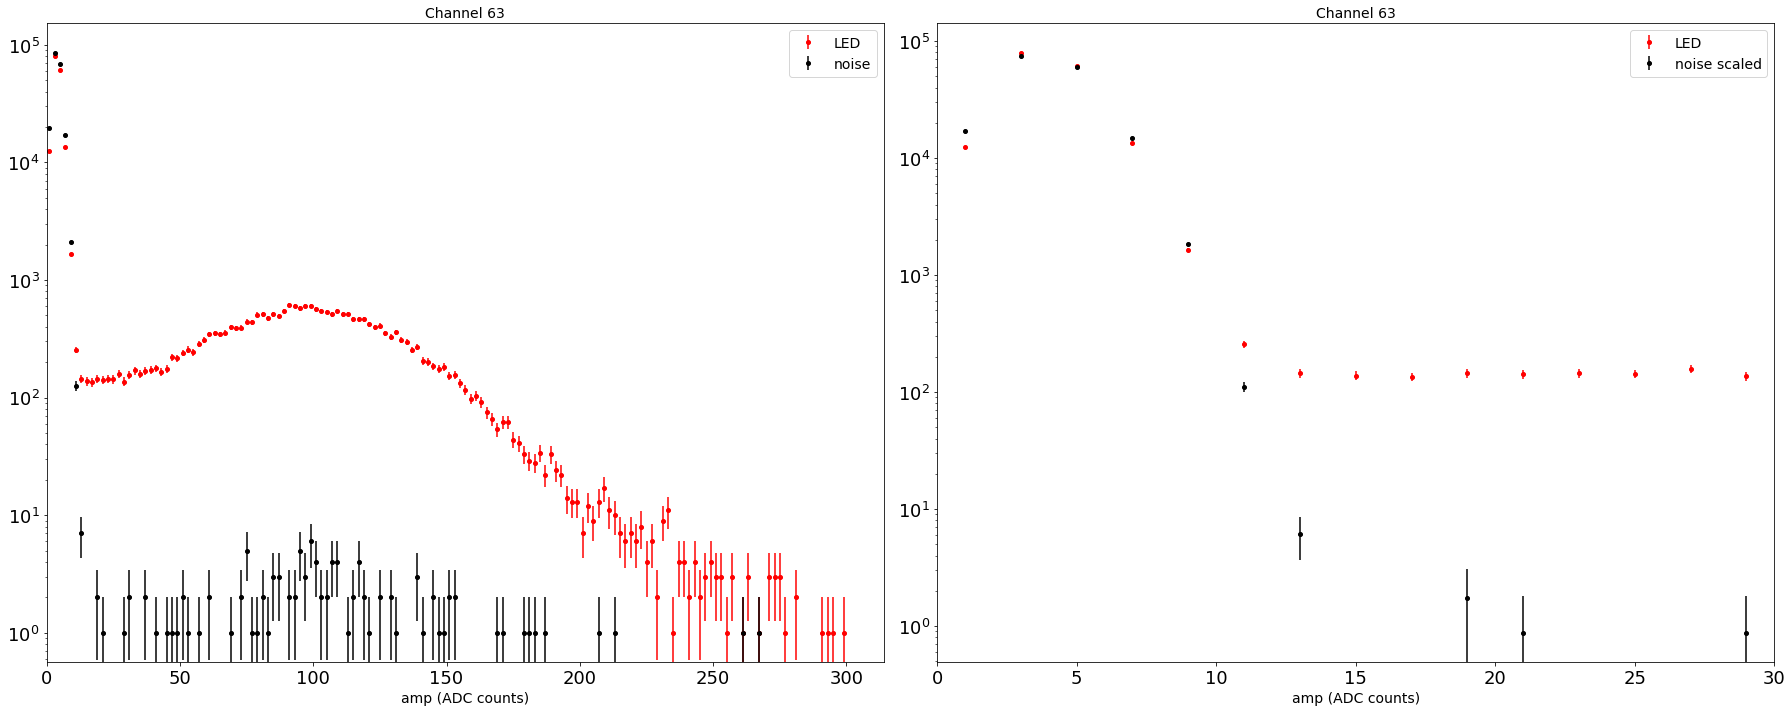

 26%|██▌       | 64/249 [01:03<03:05,  1.00s/it]

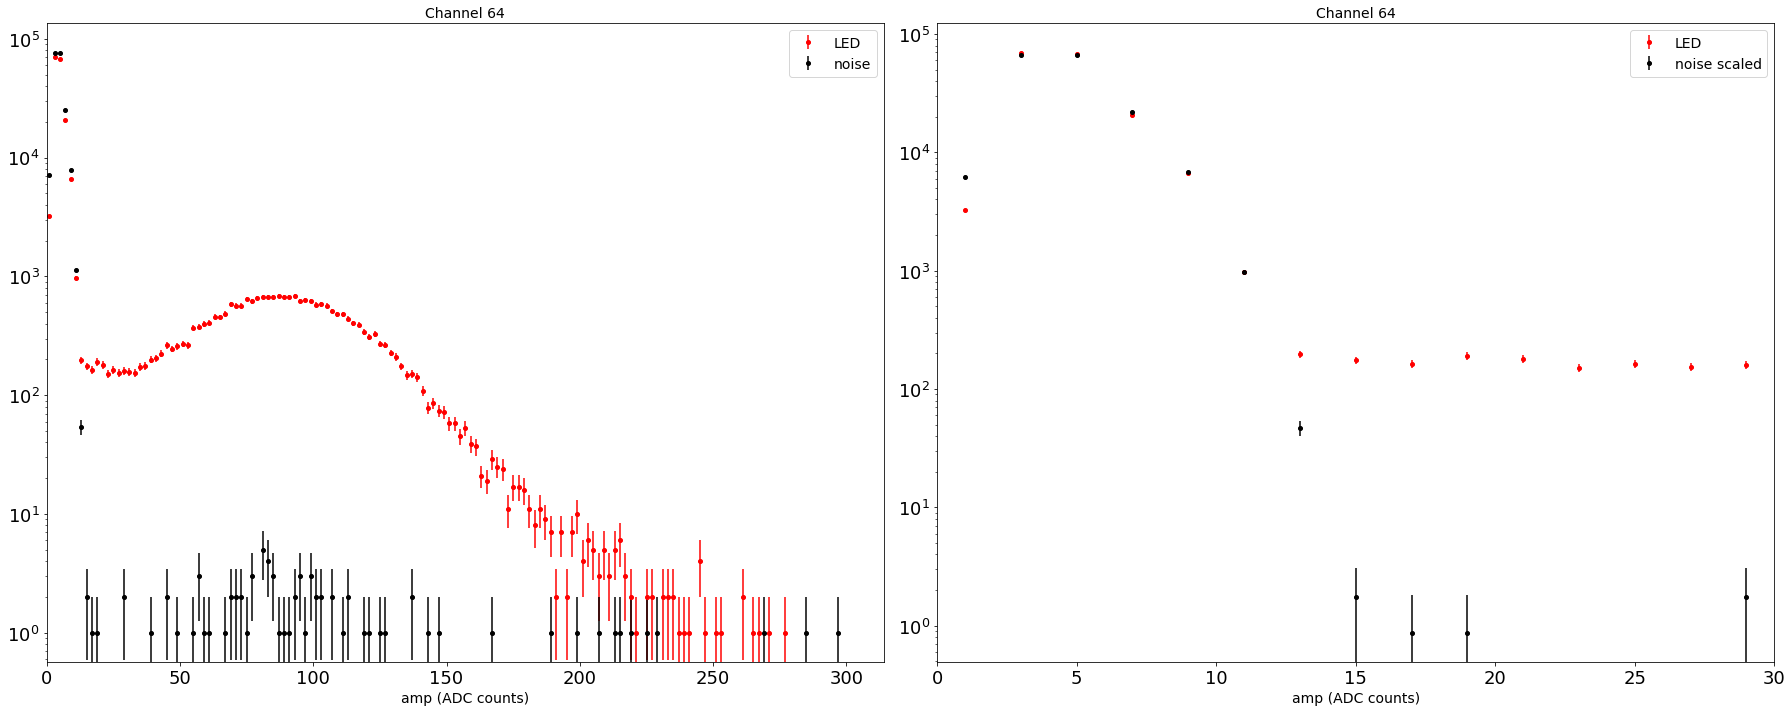

 26%|██▌       | 65/249 [01:04<03:08,  1.02s/it]

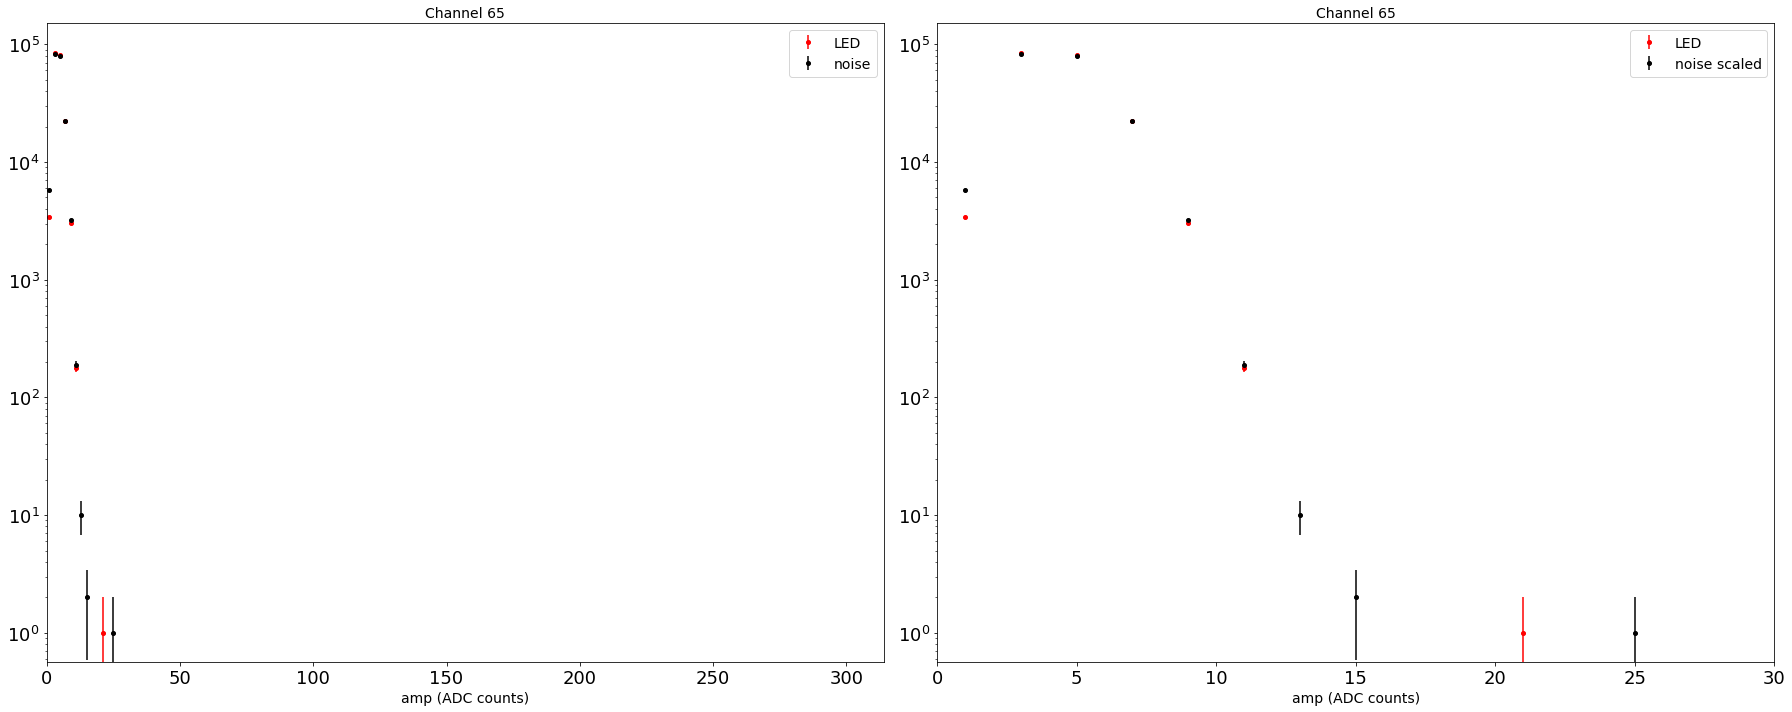

 27%|██▋       | 66/249 [01:05<03:05,  1.02s/it]

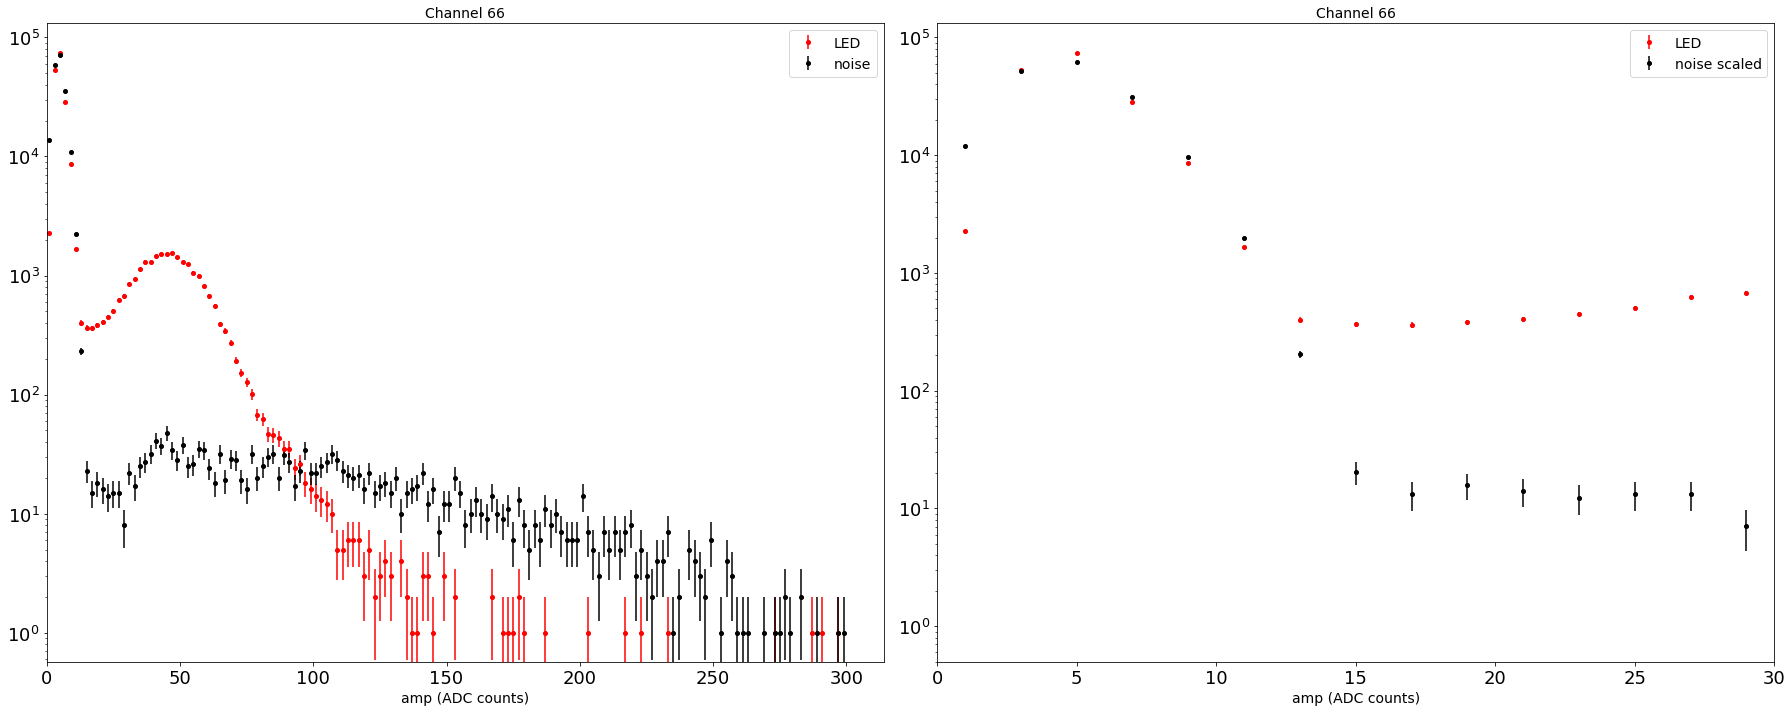

 27%|██▋       | 67/249 [01:06<03:03,  1.01s/it]

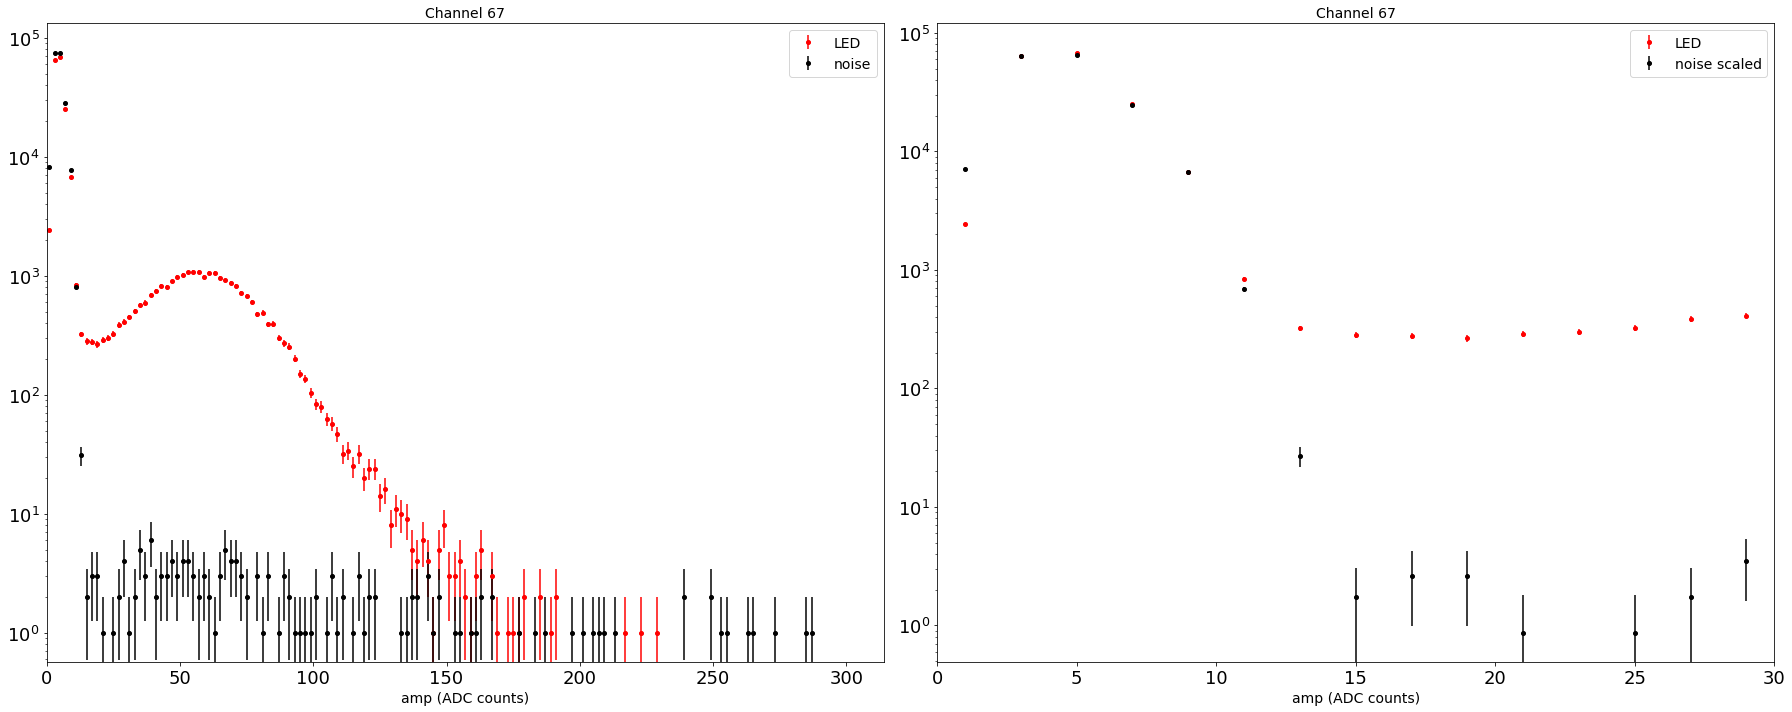

 27%|██▋       | 68/249 [01:07<03:00,  1.00it/s]

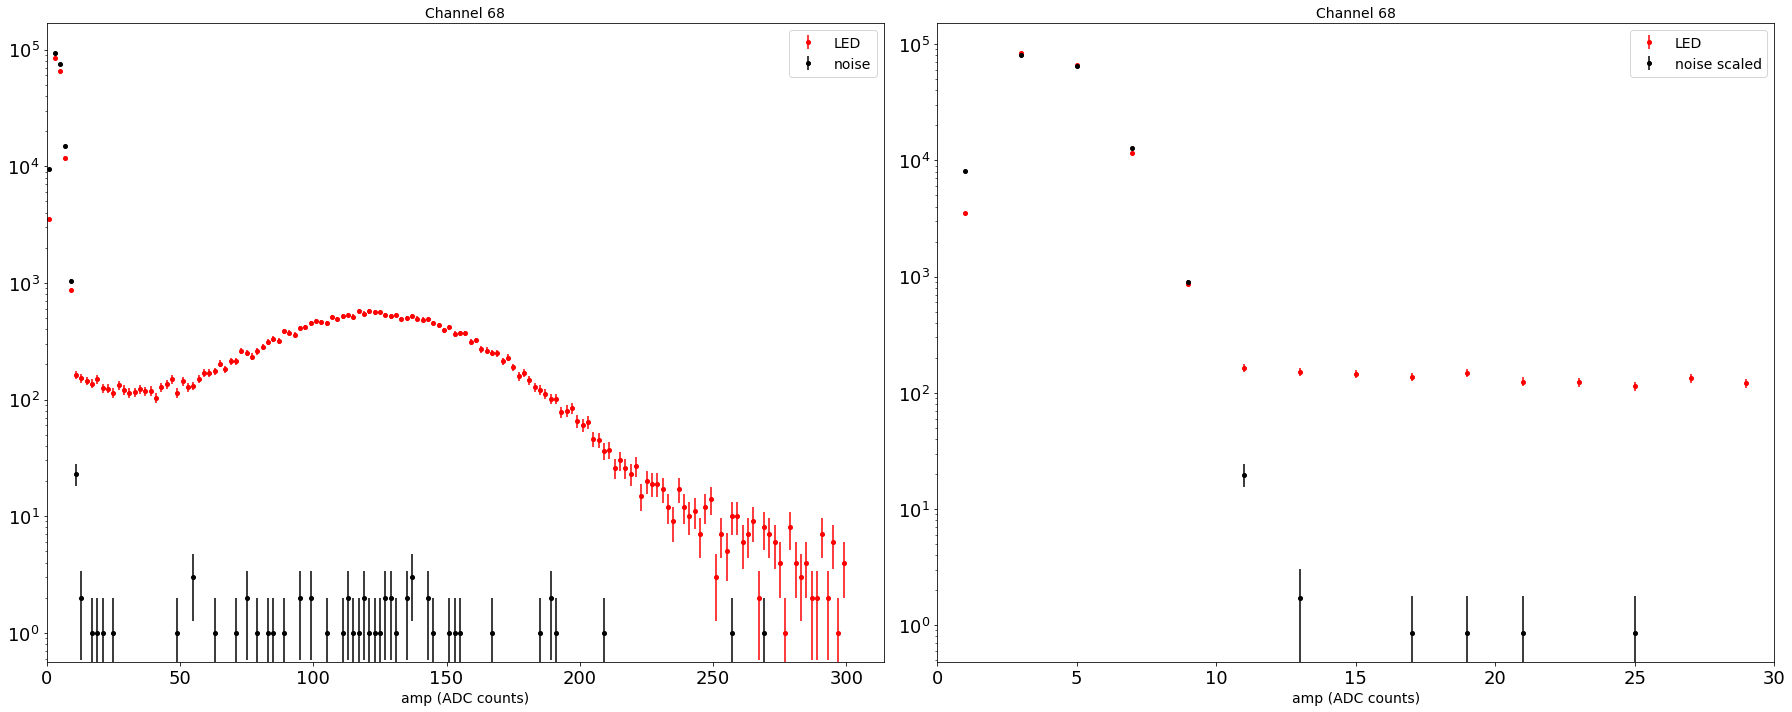

 28%|██▊       | 69/249 [01:08<03:02,  1.01s/it]

 28%|██▊       | 70/249 [01:09<03:00,  1.01s/it]

 29%|██▊       | 71/249 [01:10<02:58,  1.01s/it]

 29%|██▉       | 72/249 [01:11<02:59,  1.01s/it]

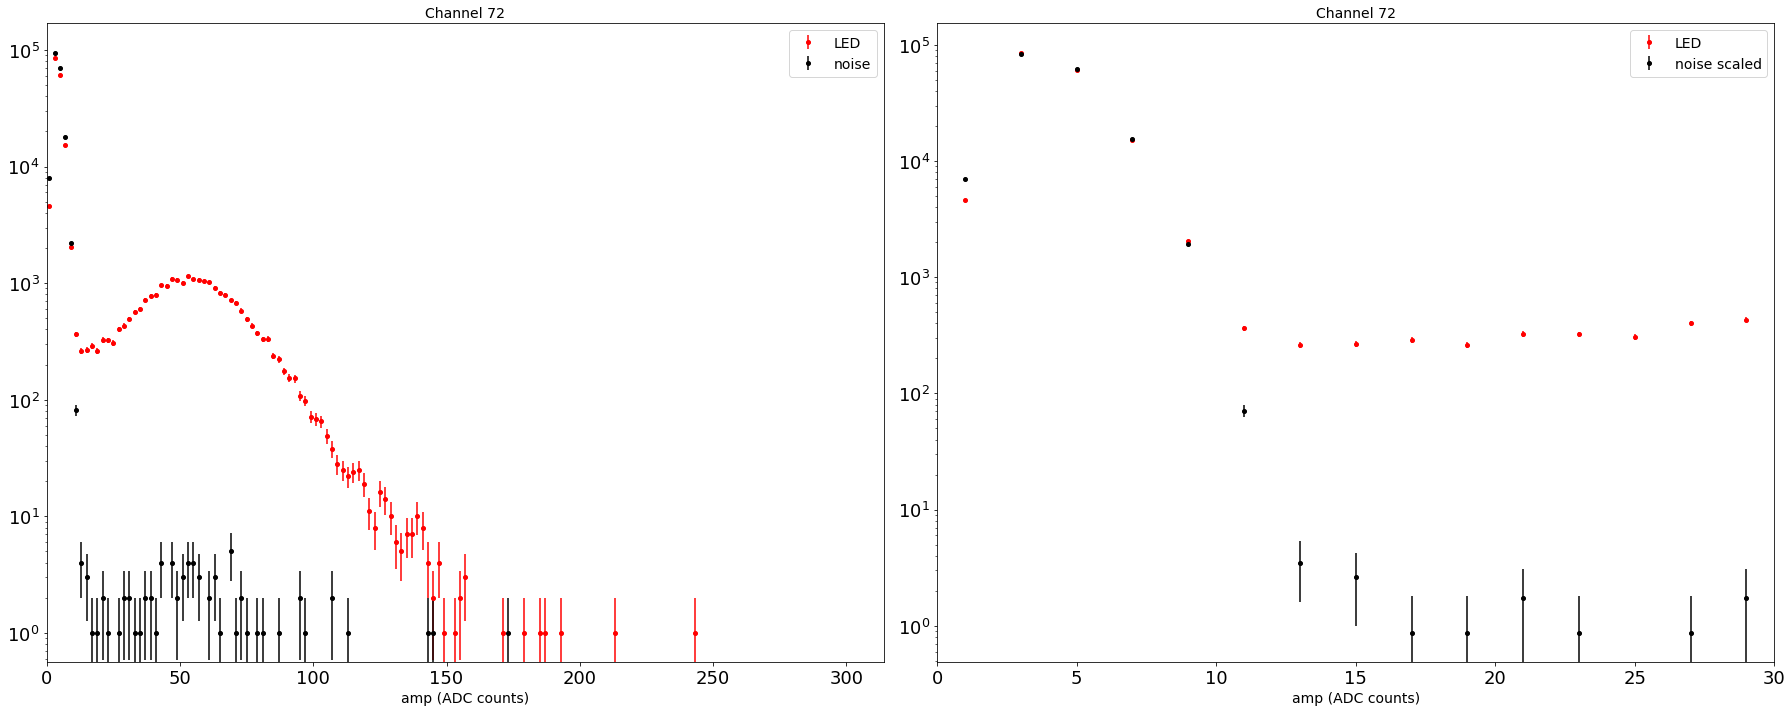

 29%|██▉       | 73/249 [01:12<02:56,  1.00s/it]

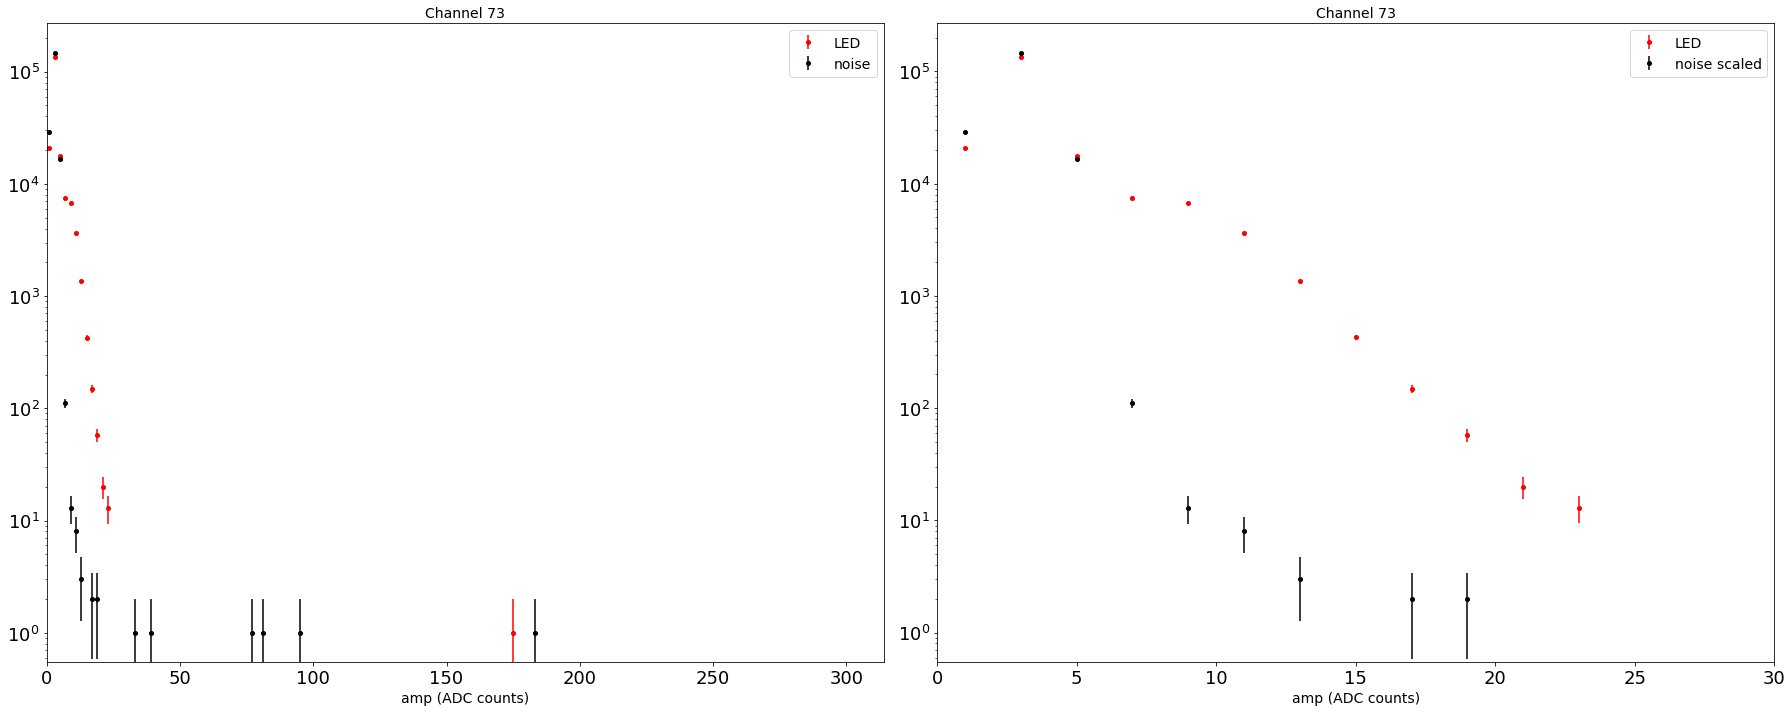

 30%|██▉       | 74/249 [01:13<02:54,  1.00it/s]

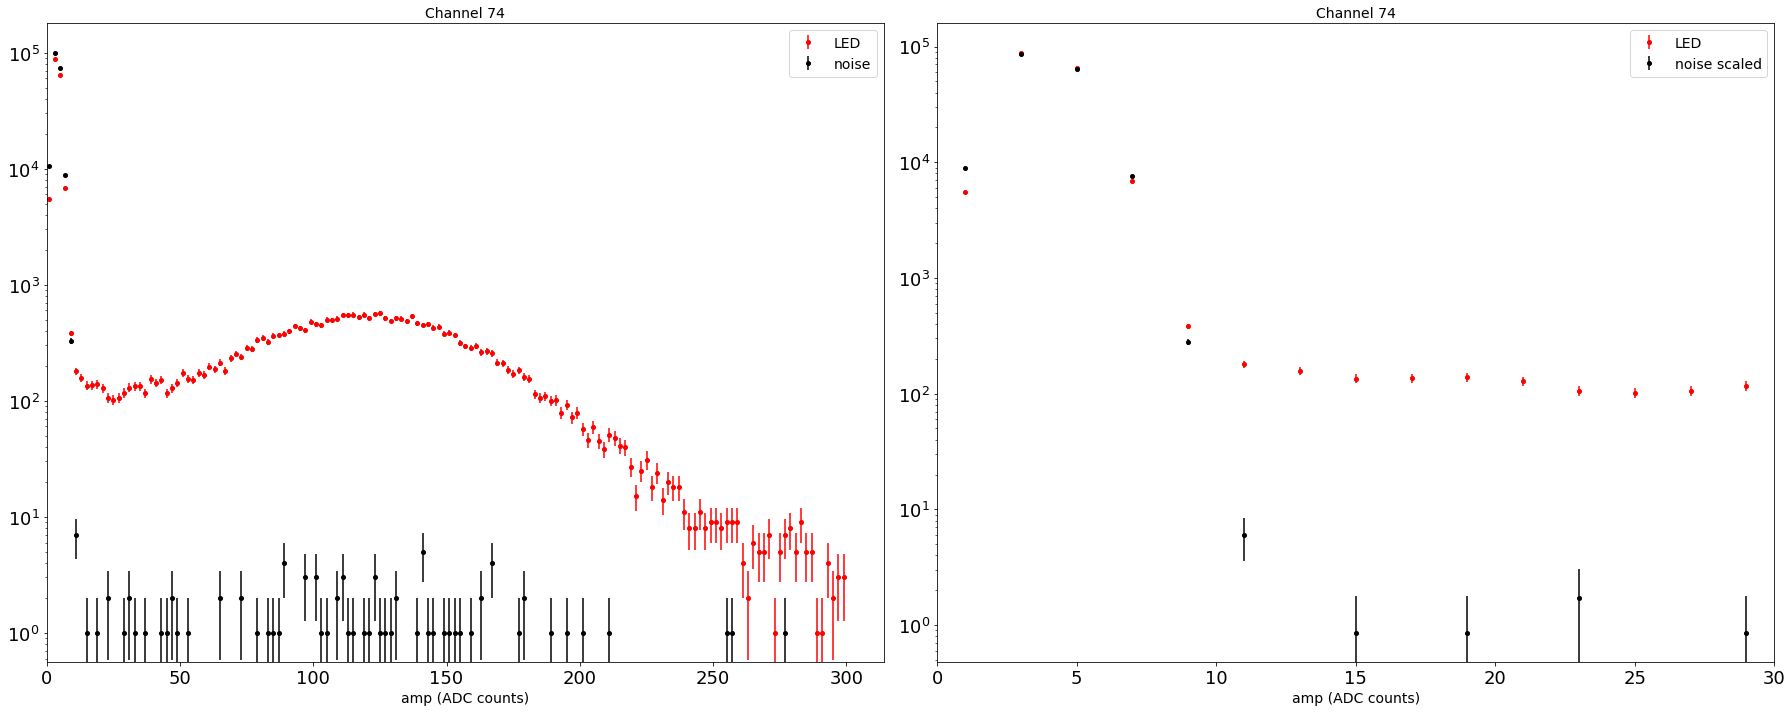

 30%|███       | 75/249 [01:14<02:53,  1.00it/s]

 31%|███       | 76/249 [01:15<02:52,  1.00it/s]

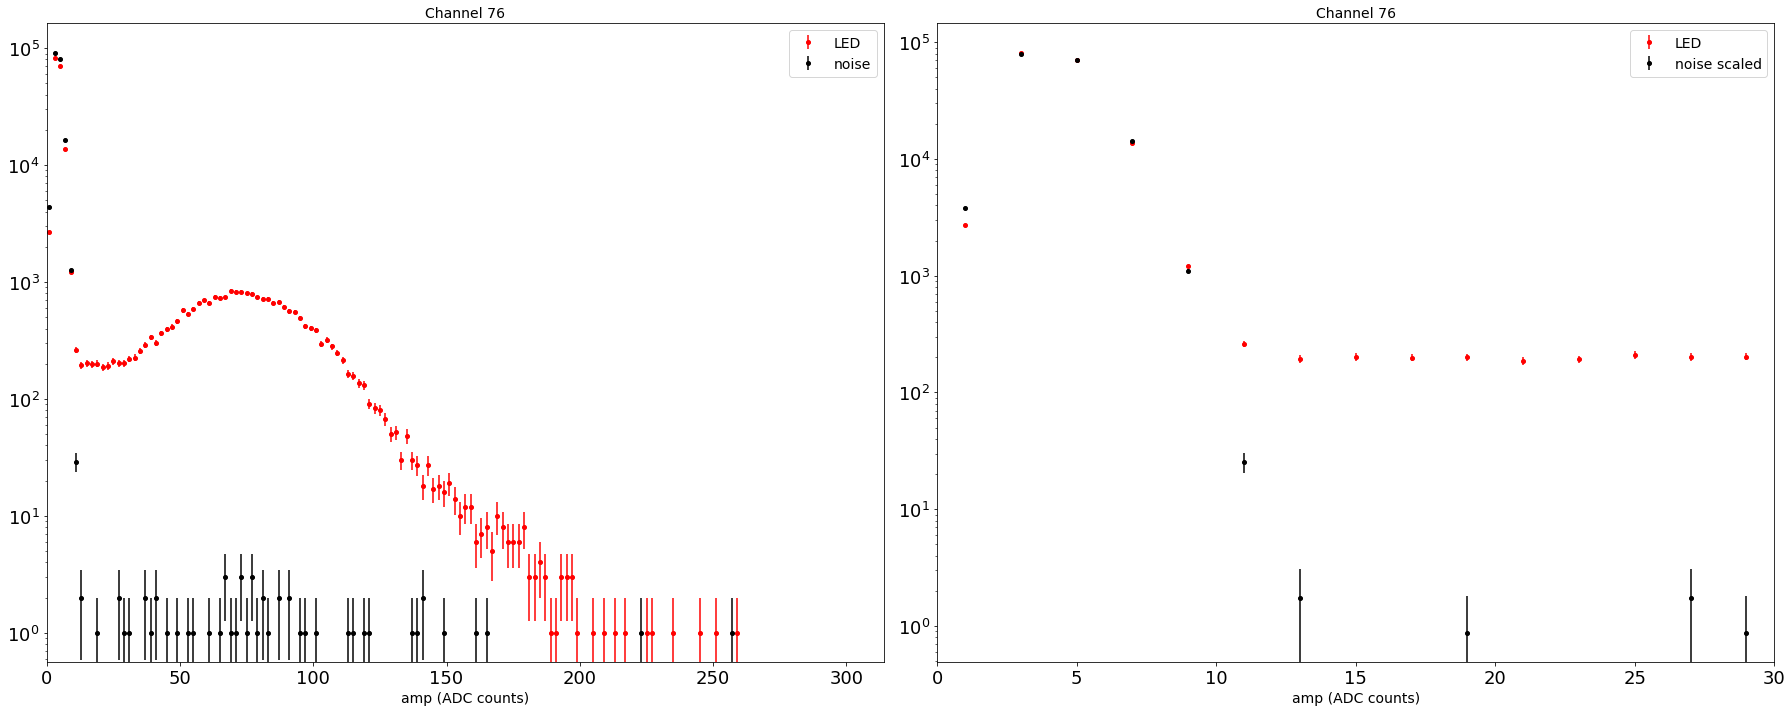

 31%|███       | 77/249 [01:16<02:54,  1.01s/it]

 31%|███▏      | 78/249 [01:17<02:51,  1.01s/it]

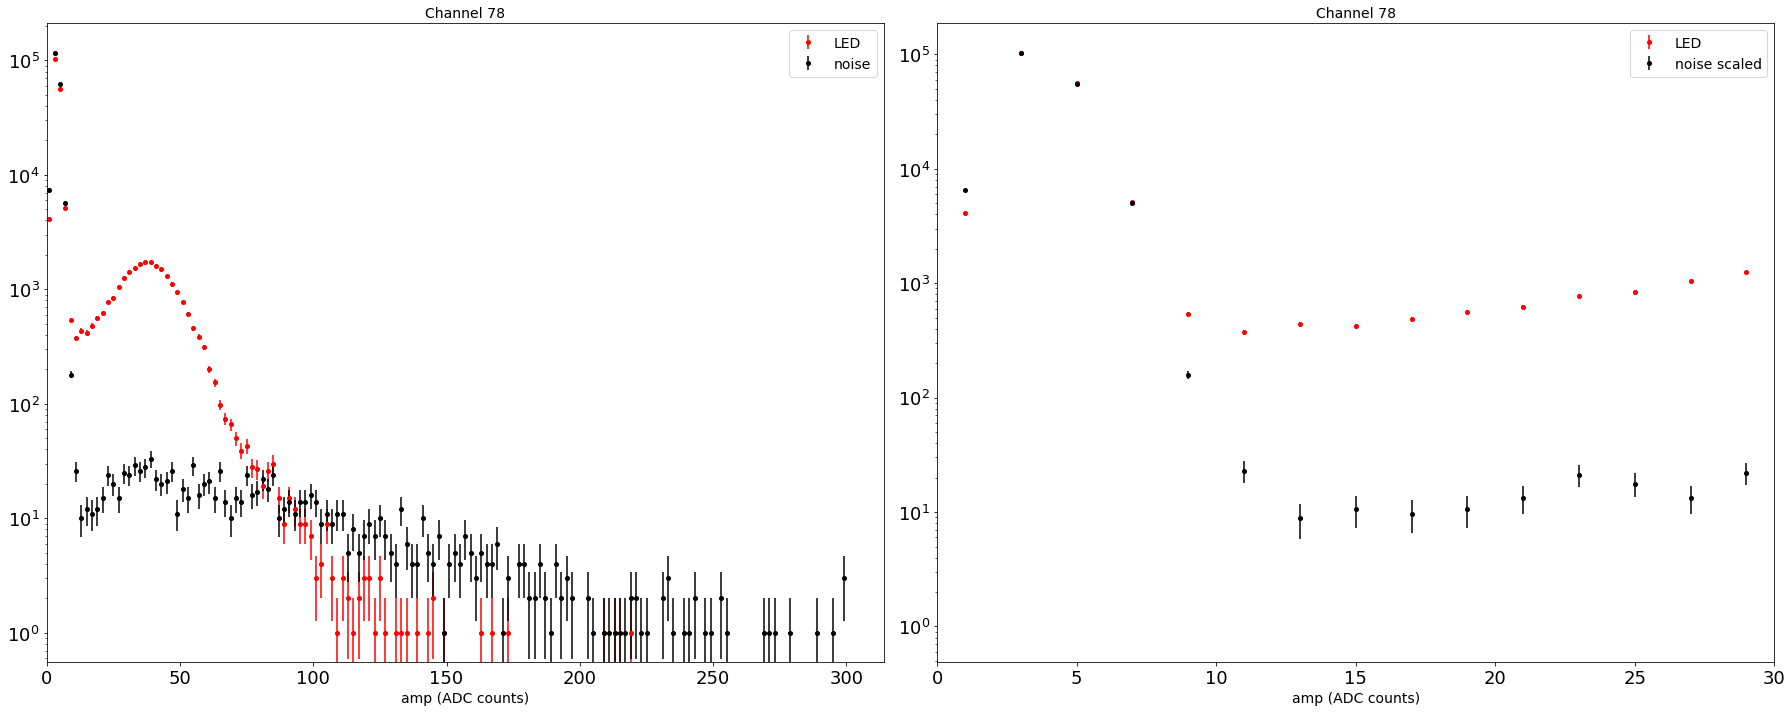

 32%|███▏      | 79/249 [01:18<02:51,  1.01s/it]

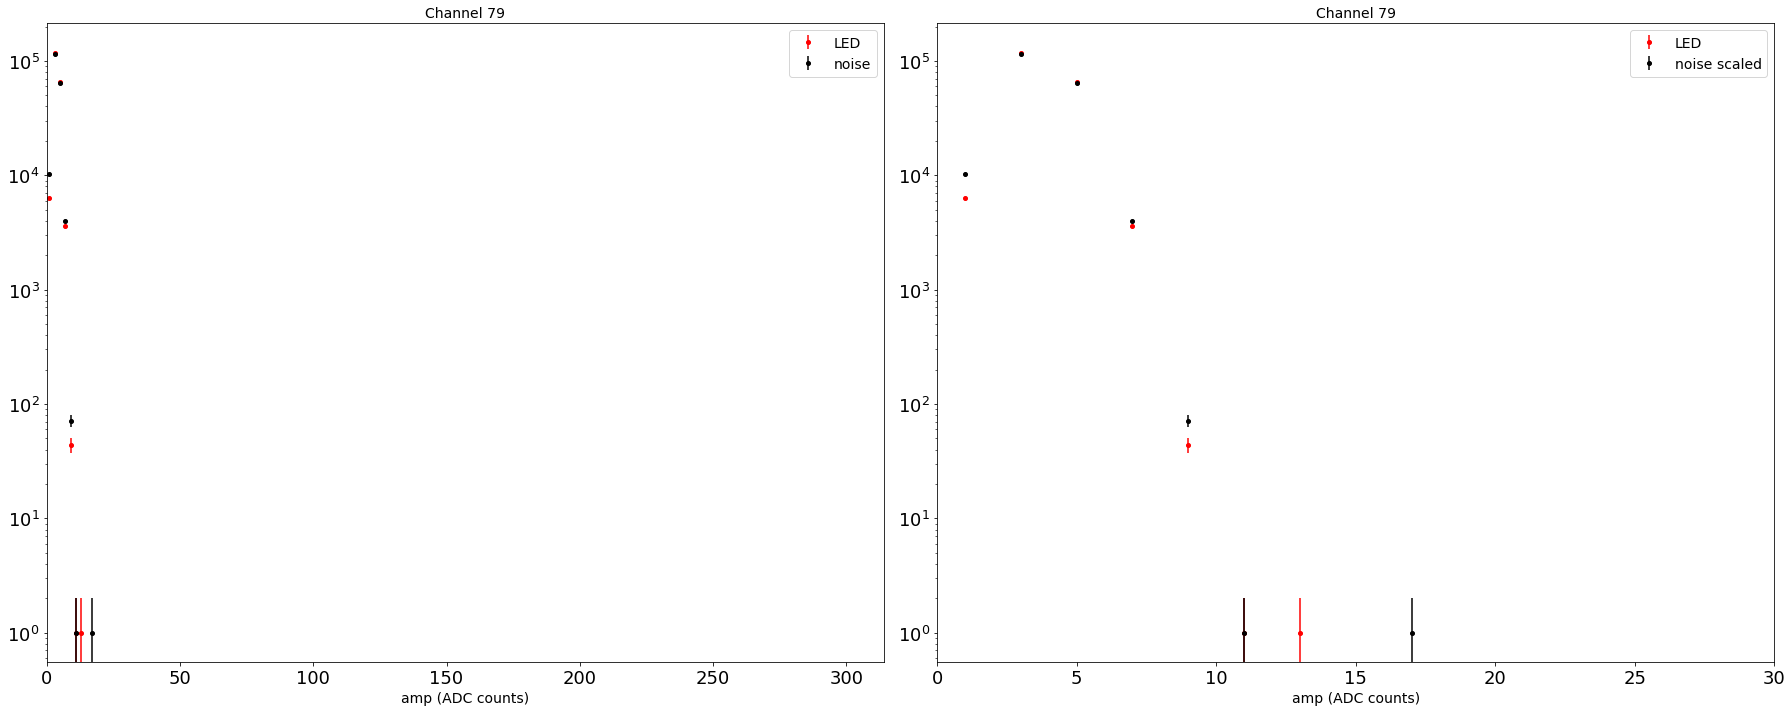

 32%|███▏      | 80/249 [01:19<02:49,  1.00s/it]

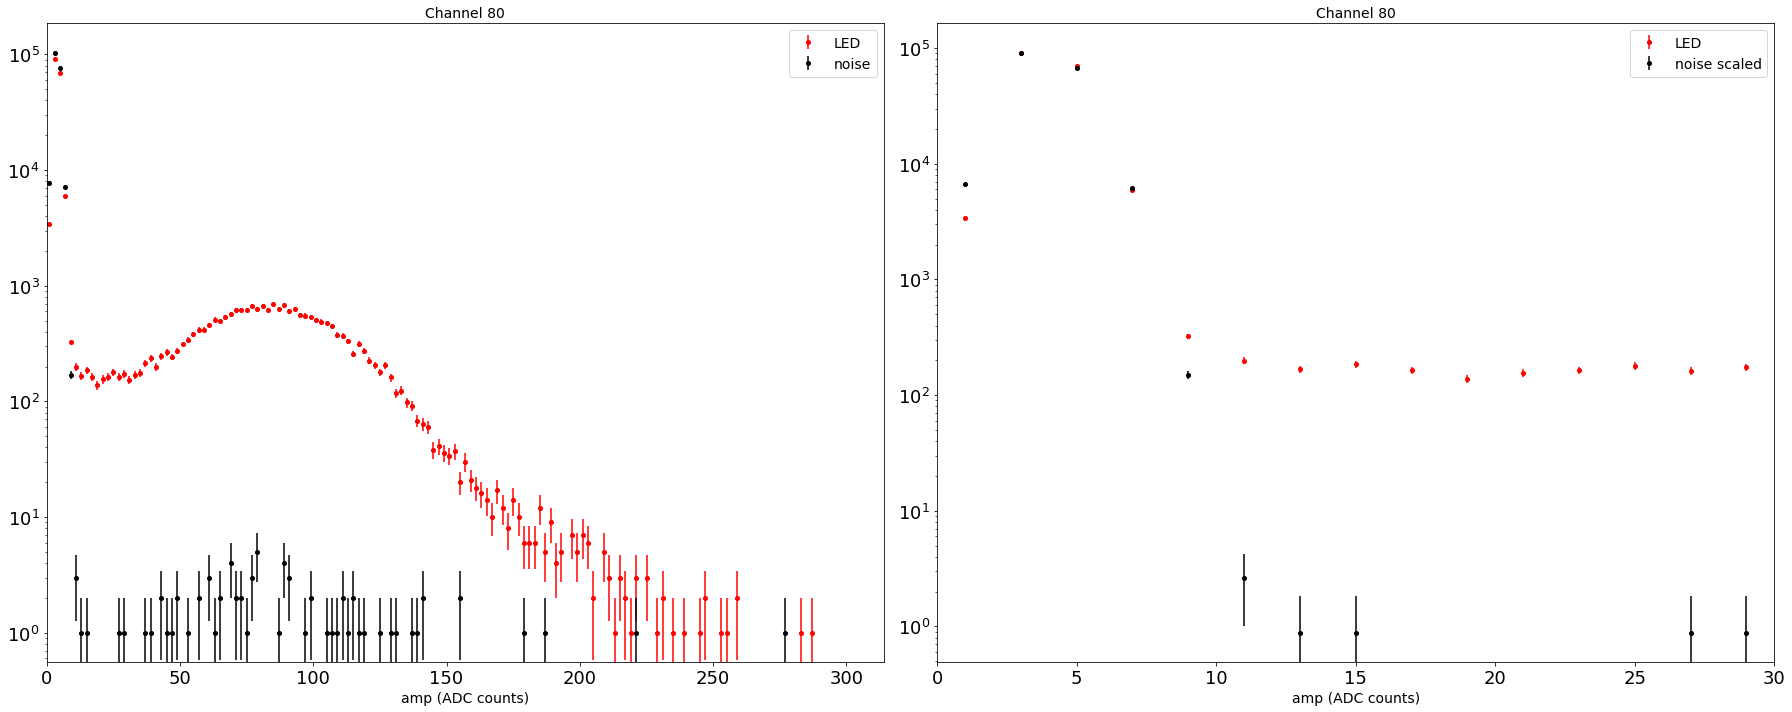

 33%|███▎      | 81/249 [01:20<02:47,  1.00it/s]

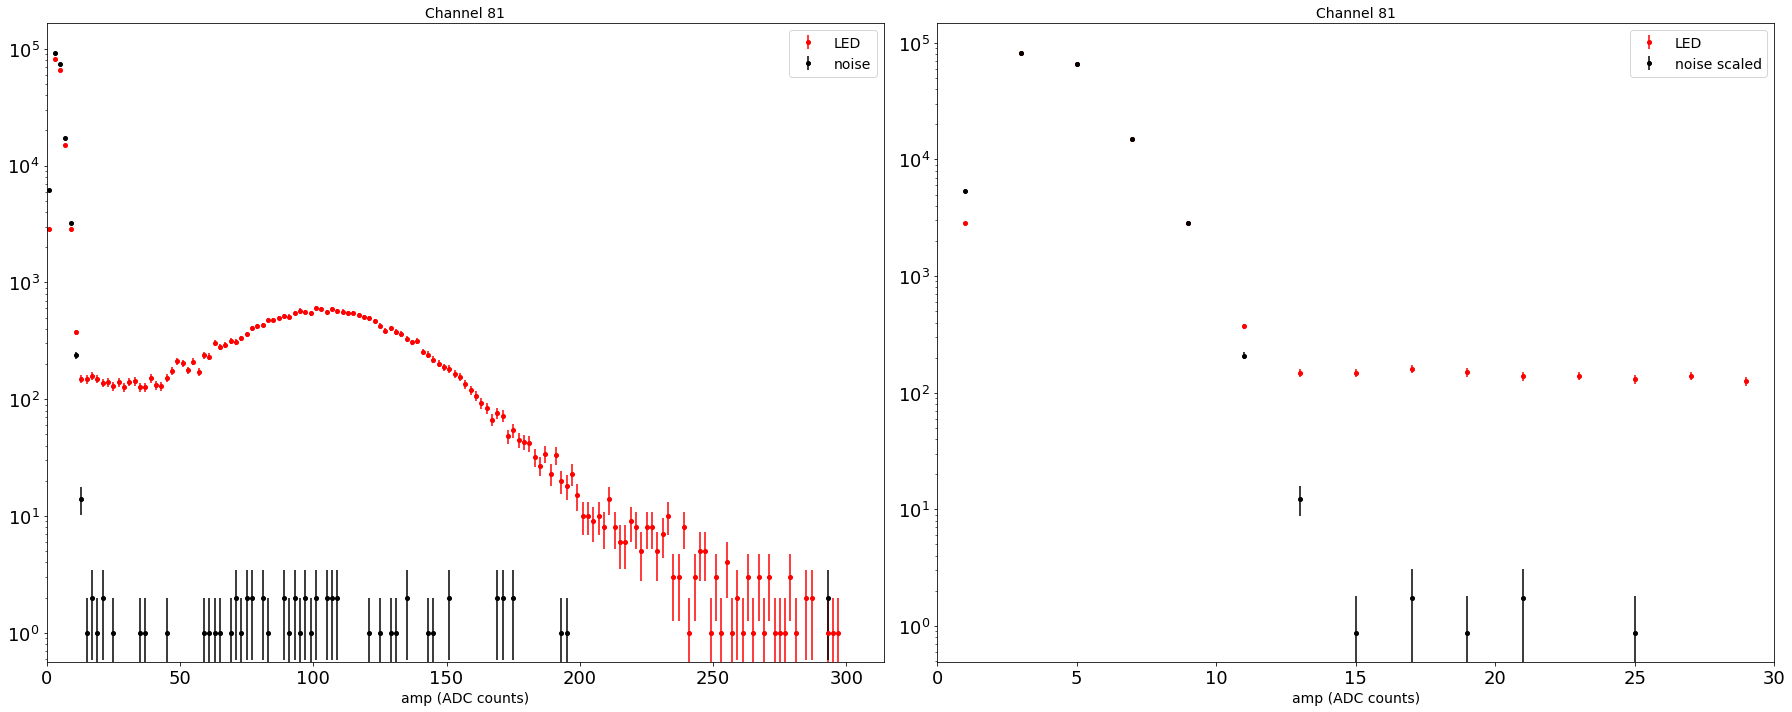

 33%|███▎      | 82/249 [01:21<02:45,  1.01it/s]

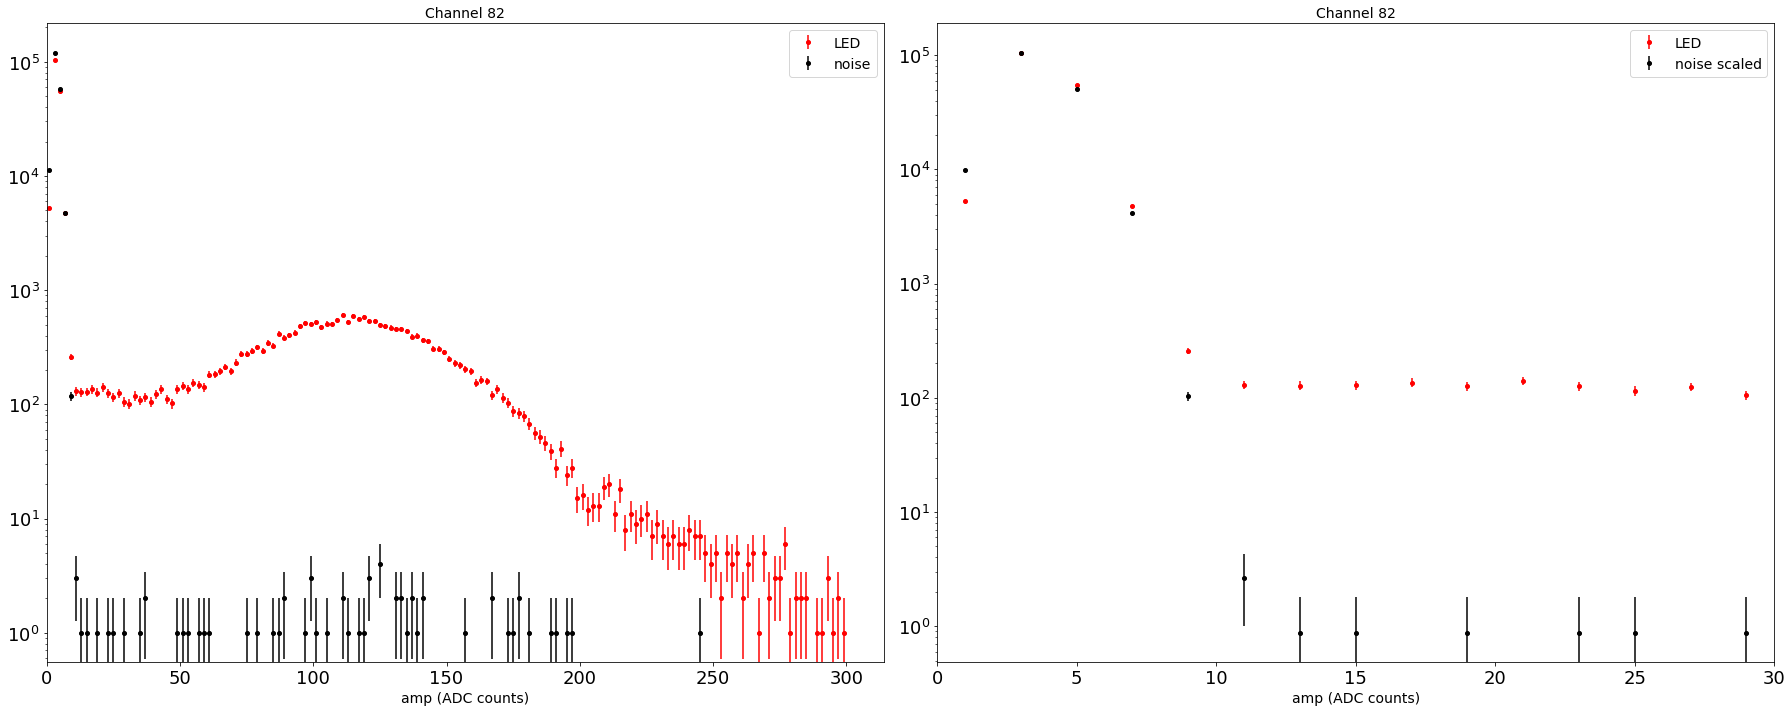

 33%|███▎      | 83/249 [01:22<02:44,  1.01it/s]

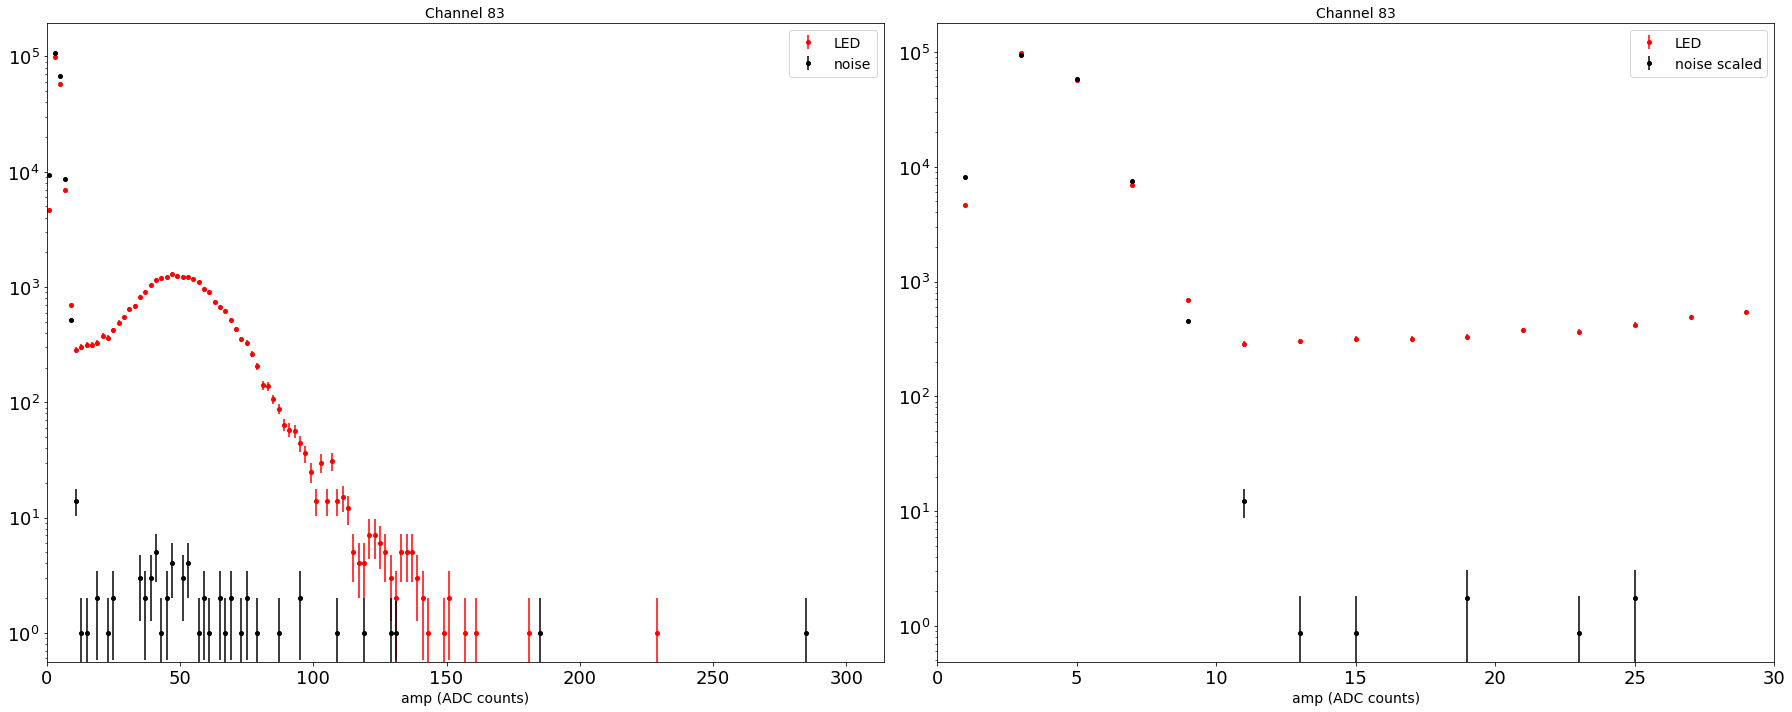

 34%|███▎      | 84/249 [01:23<02:44,  1.01it/s]

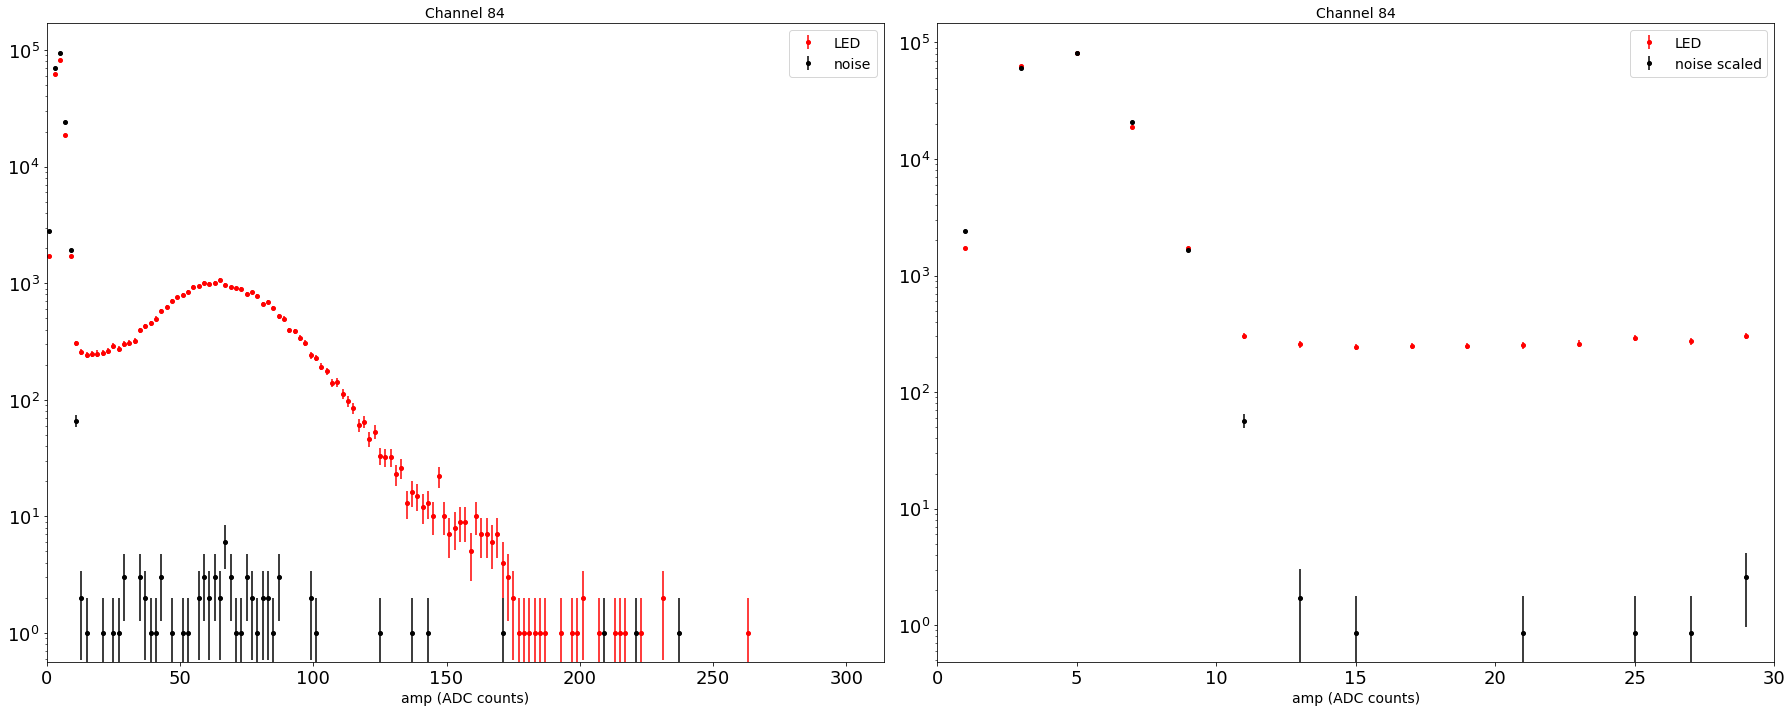

 34%|███▍      | 85/249 [01:24<02:41,  1.01it/s]

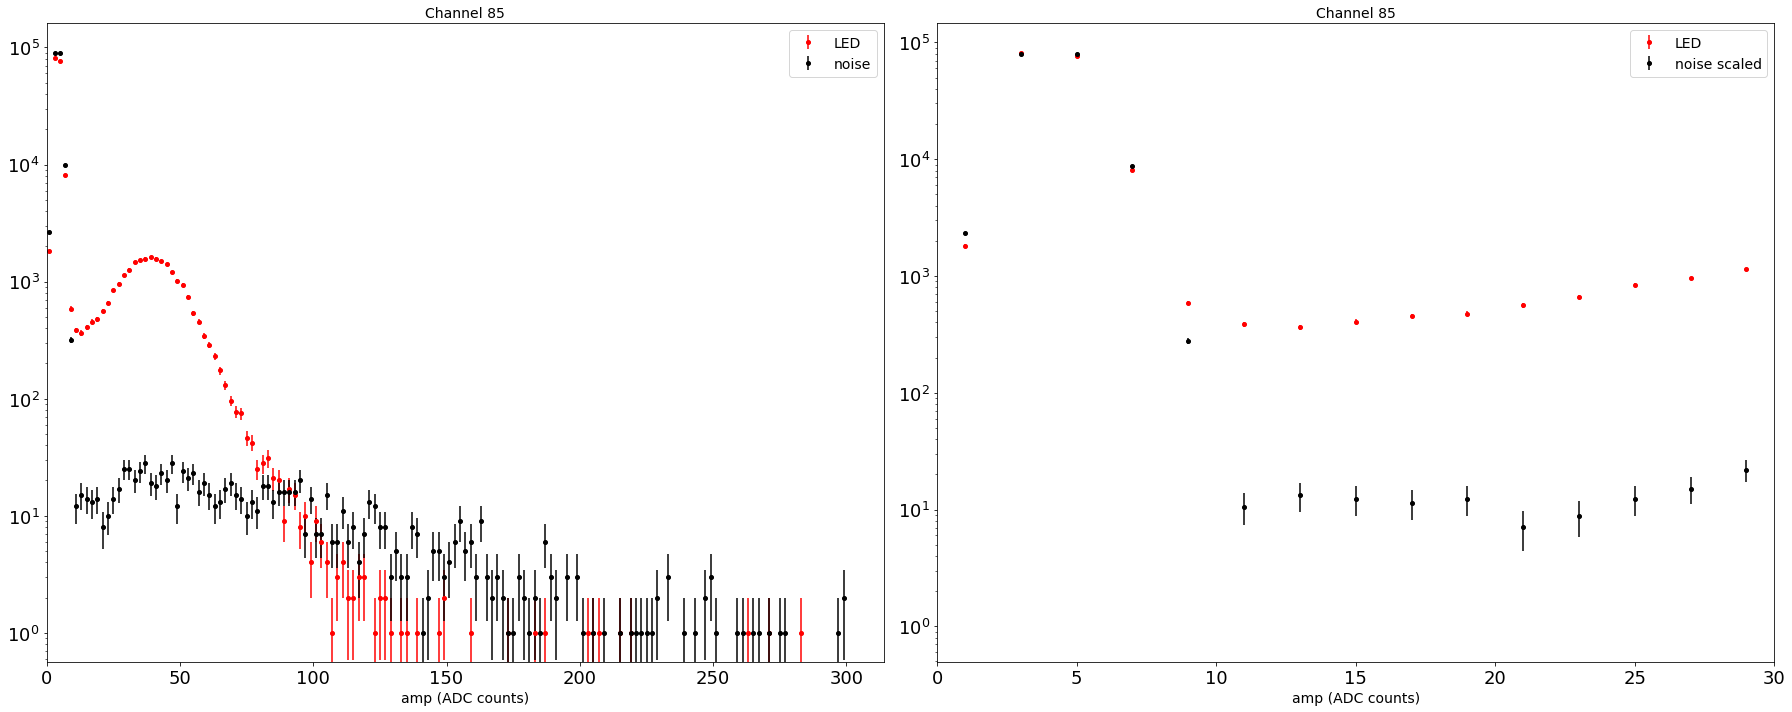

 35%|███▍      | 86/249 [01:25<02:40,  1.02it/s]

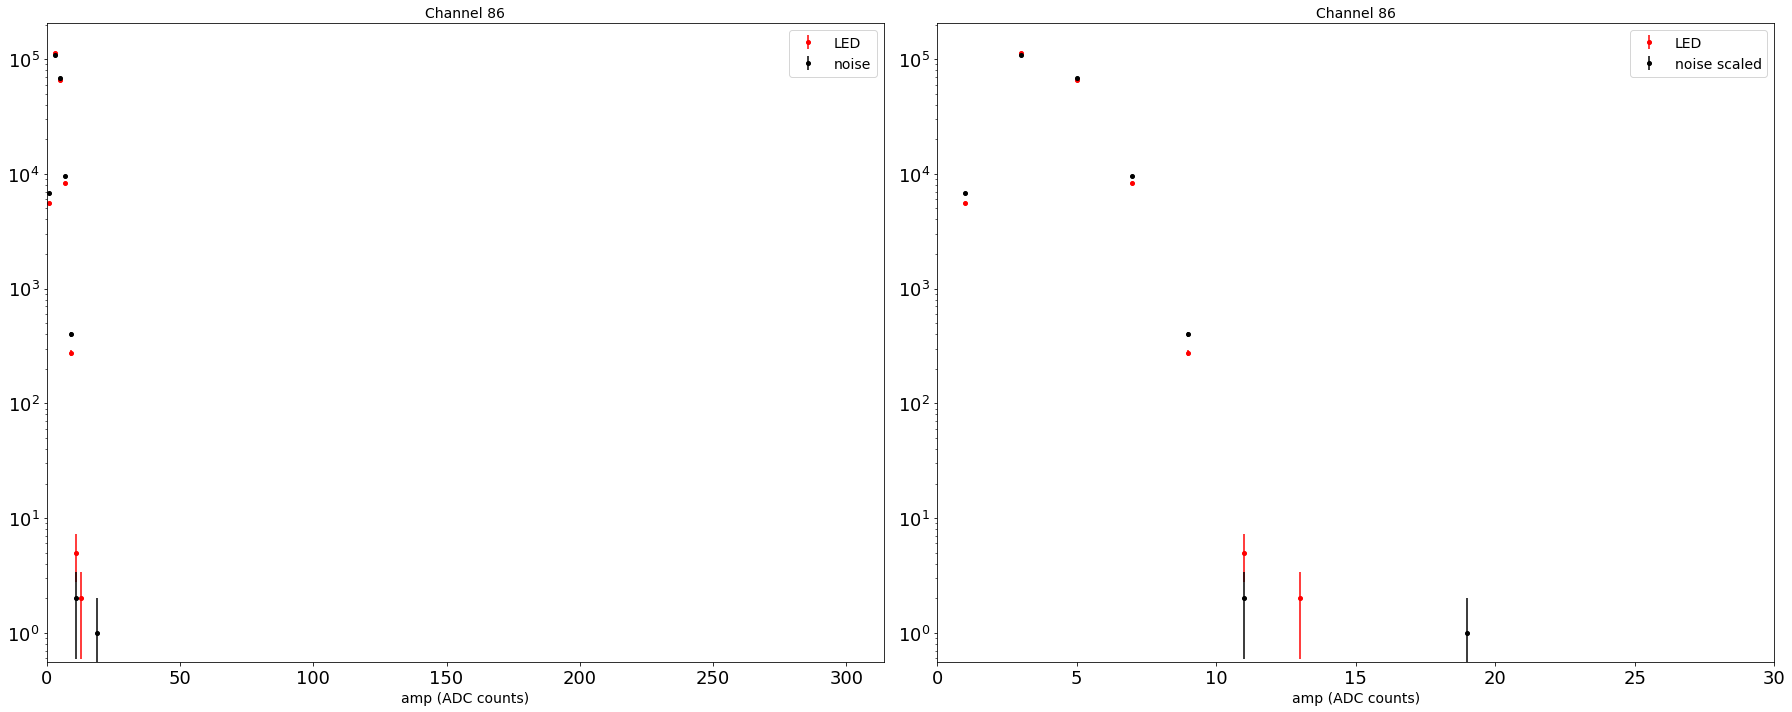

 35%|███▍      | 87/249 [01:26<02:40,  1.01it/s]

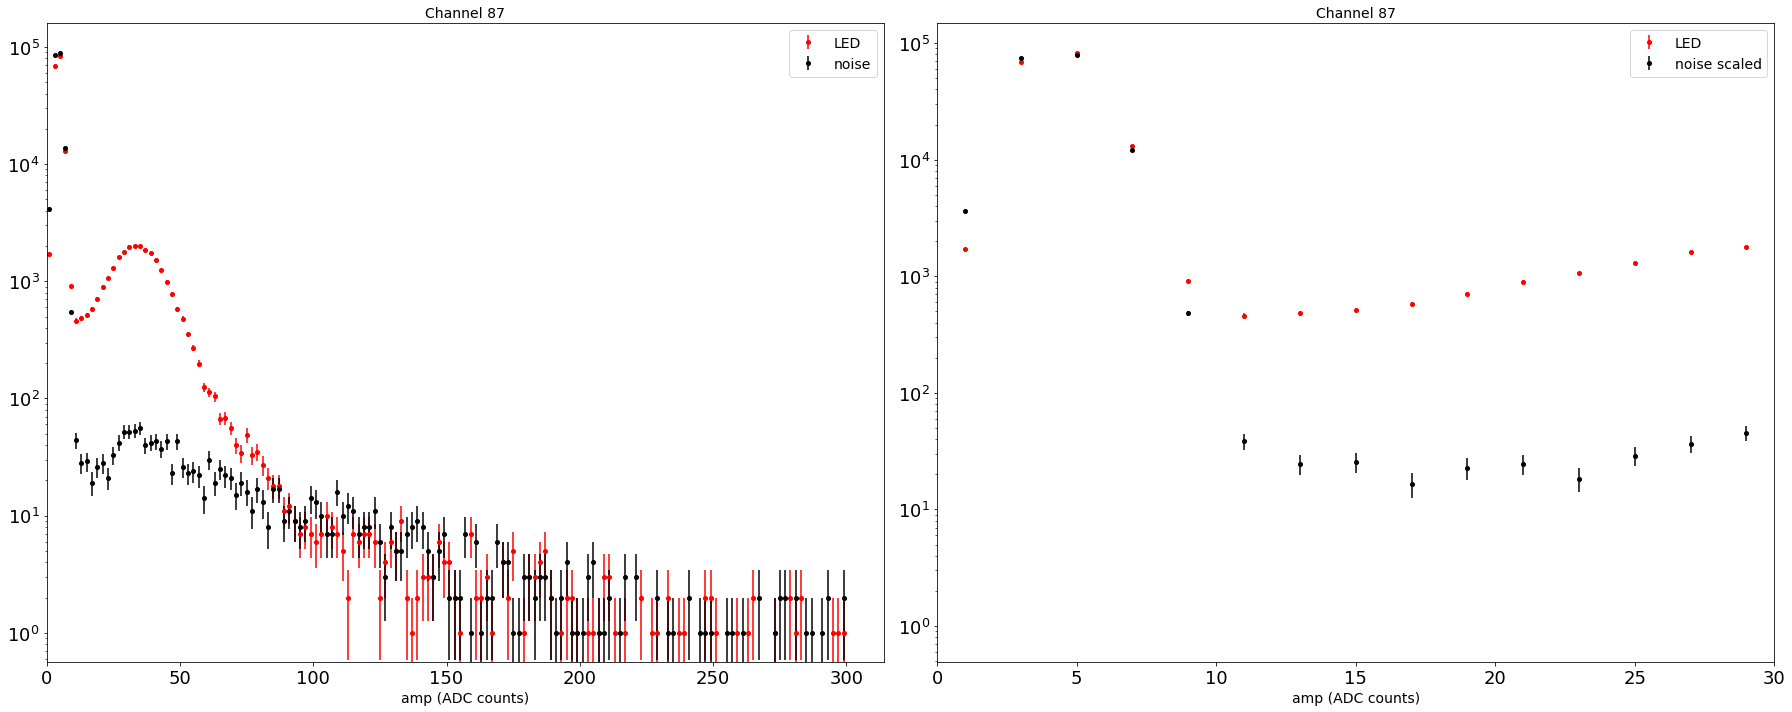

 35%|███▌      | 88/249 [01:27<02:39,  1.01it/s]

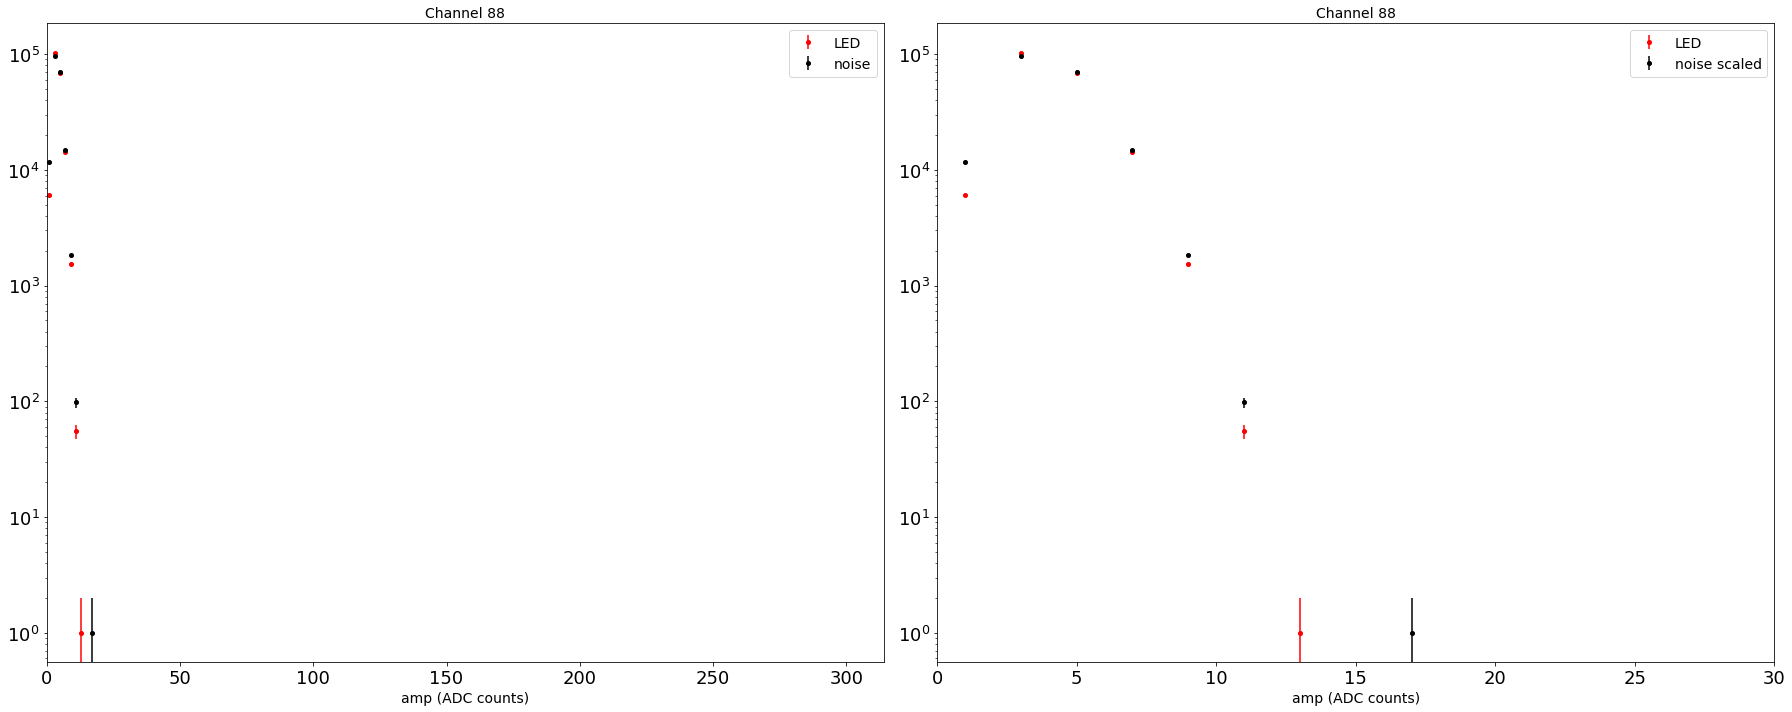

 36%|███▌      | 89/249 [01:28<02:37,  1.01it/s]

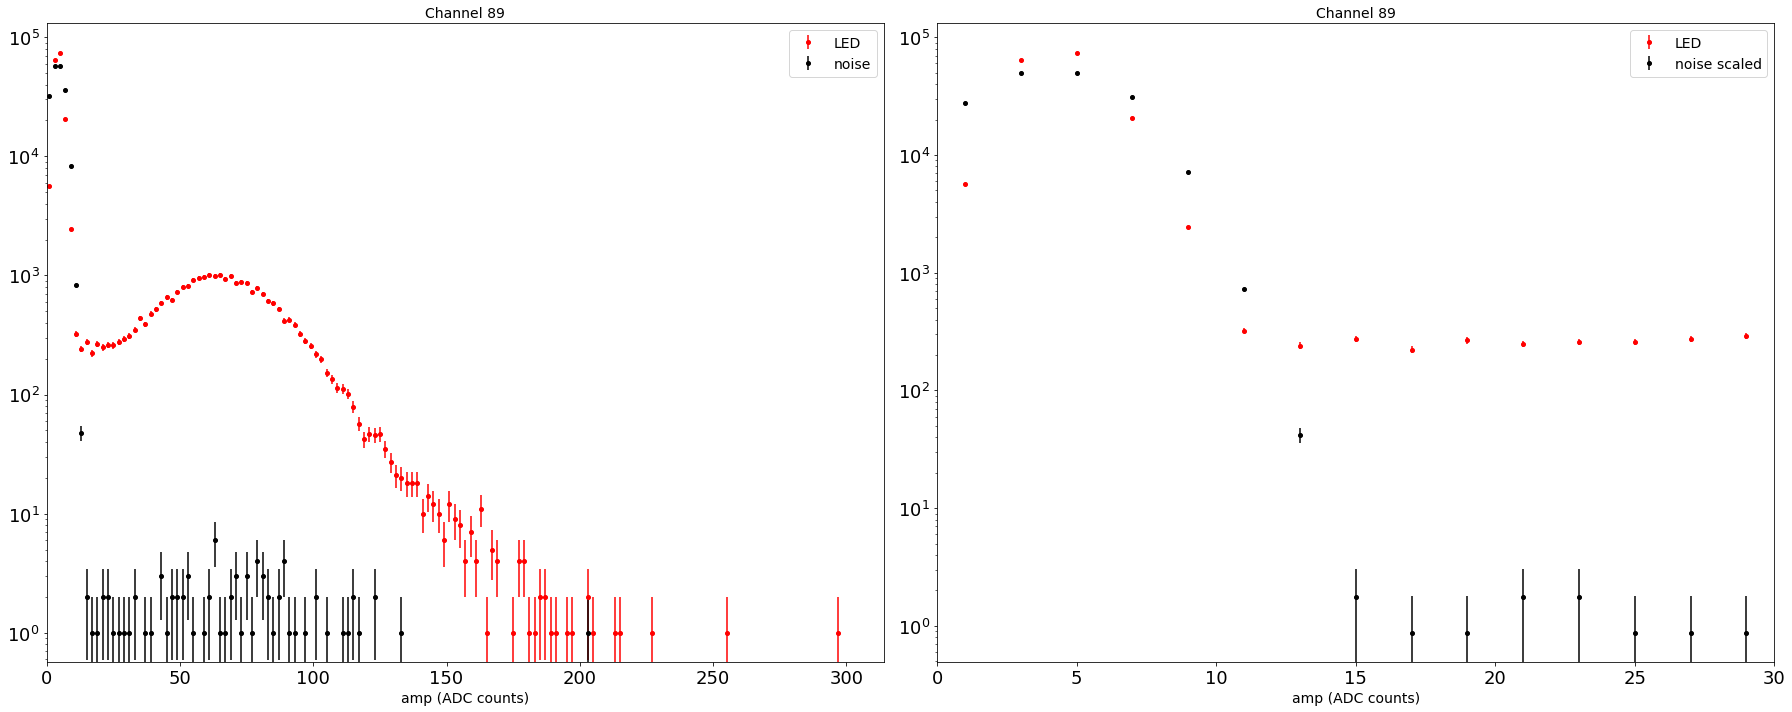

 36%|███▌      | 90/249 [01:29<02:36,  1.02it/s]

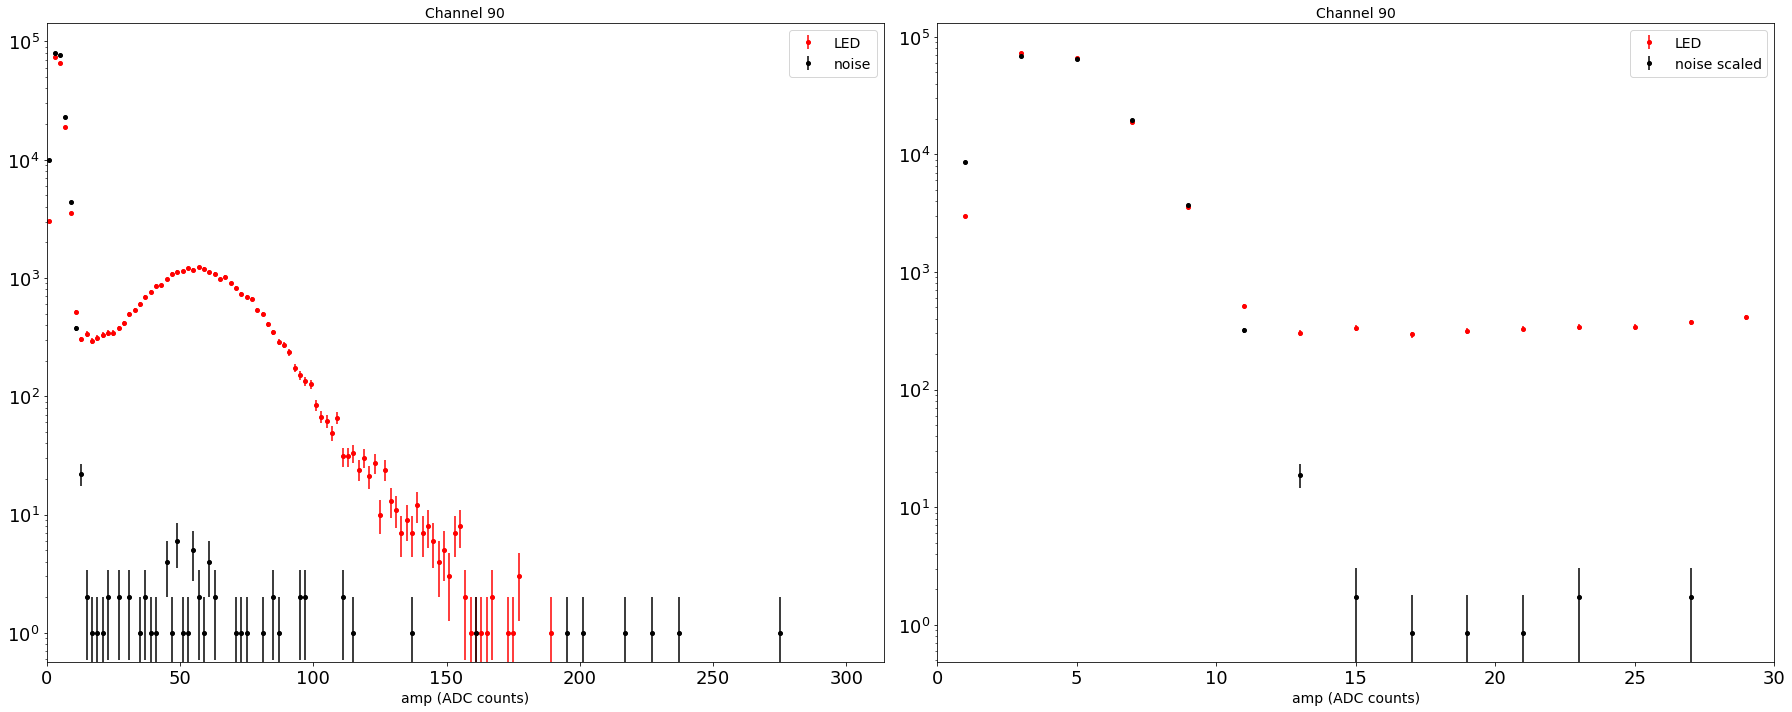

 37%|███▋      | 91/249 [01:30<02:35,  1.02it/s]

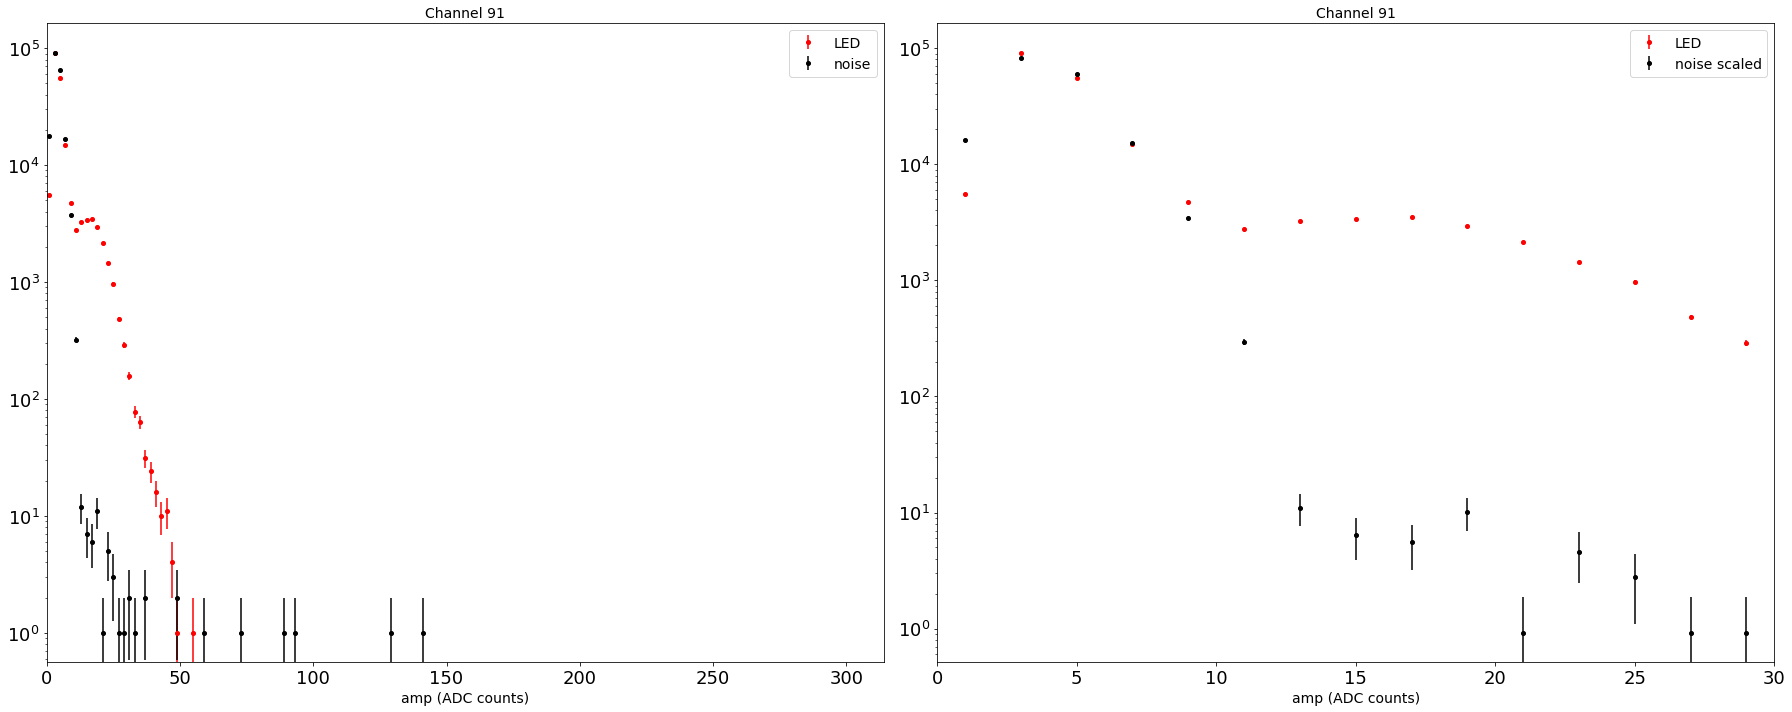

 37%|███▋      | 92/249 [01:31<02:35,  1.01it/s]

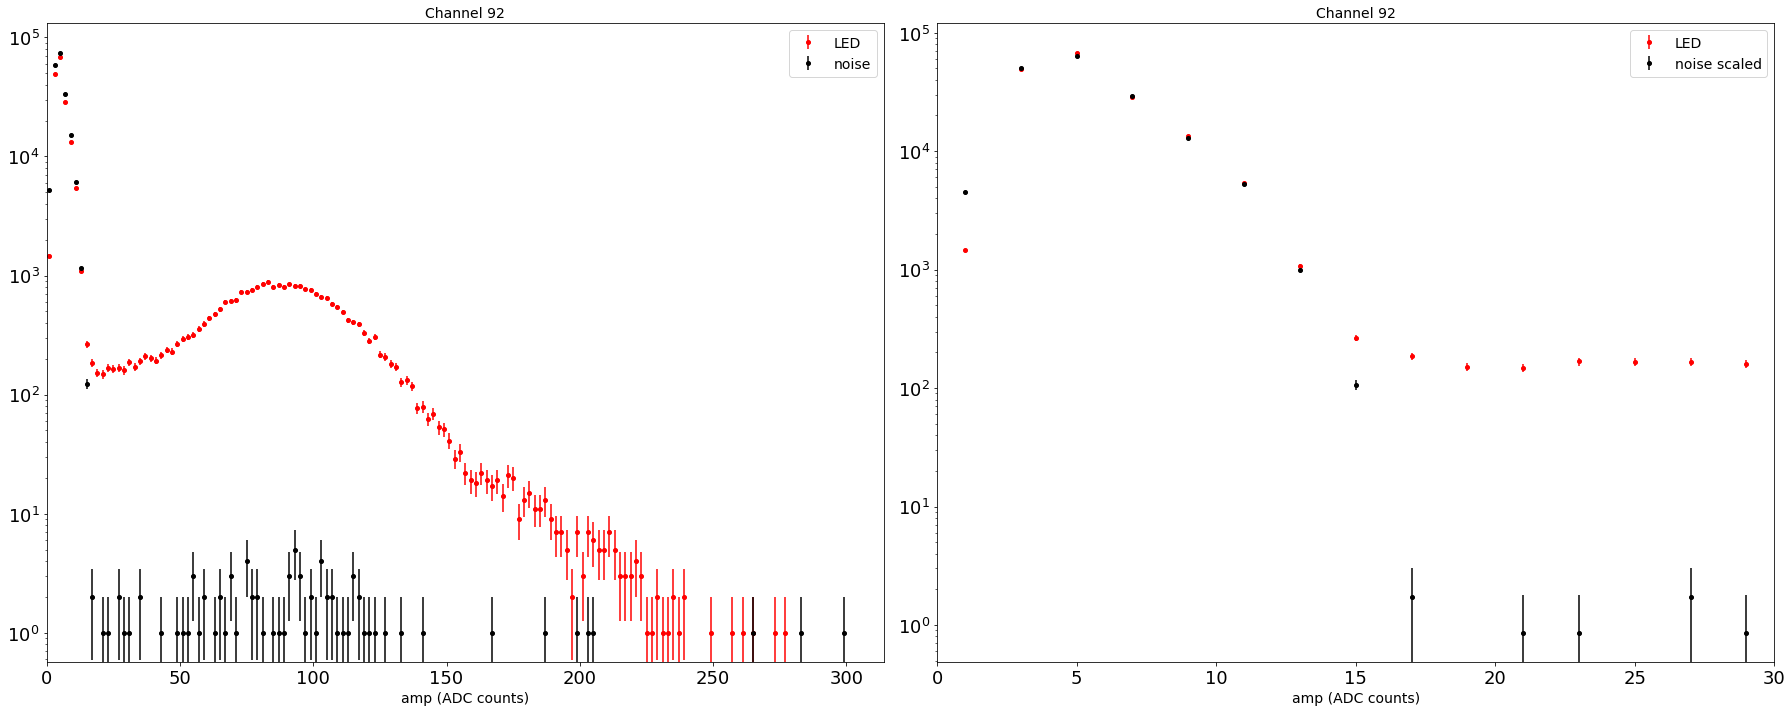

 37%|███▋      | 93/249 [01:32<02:34,  1.01it/s]

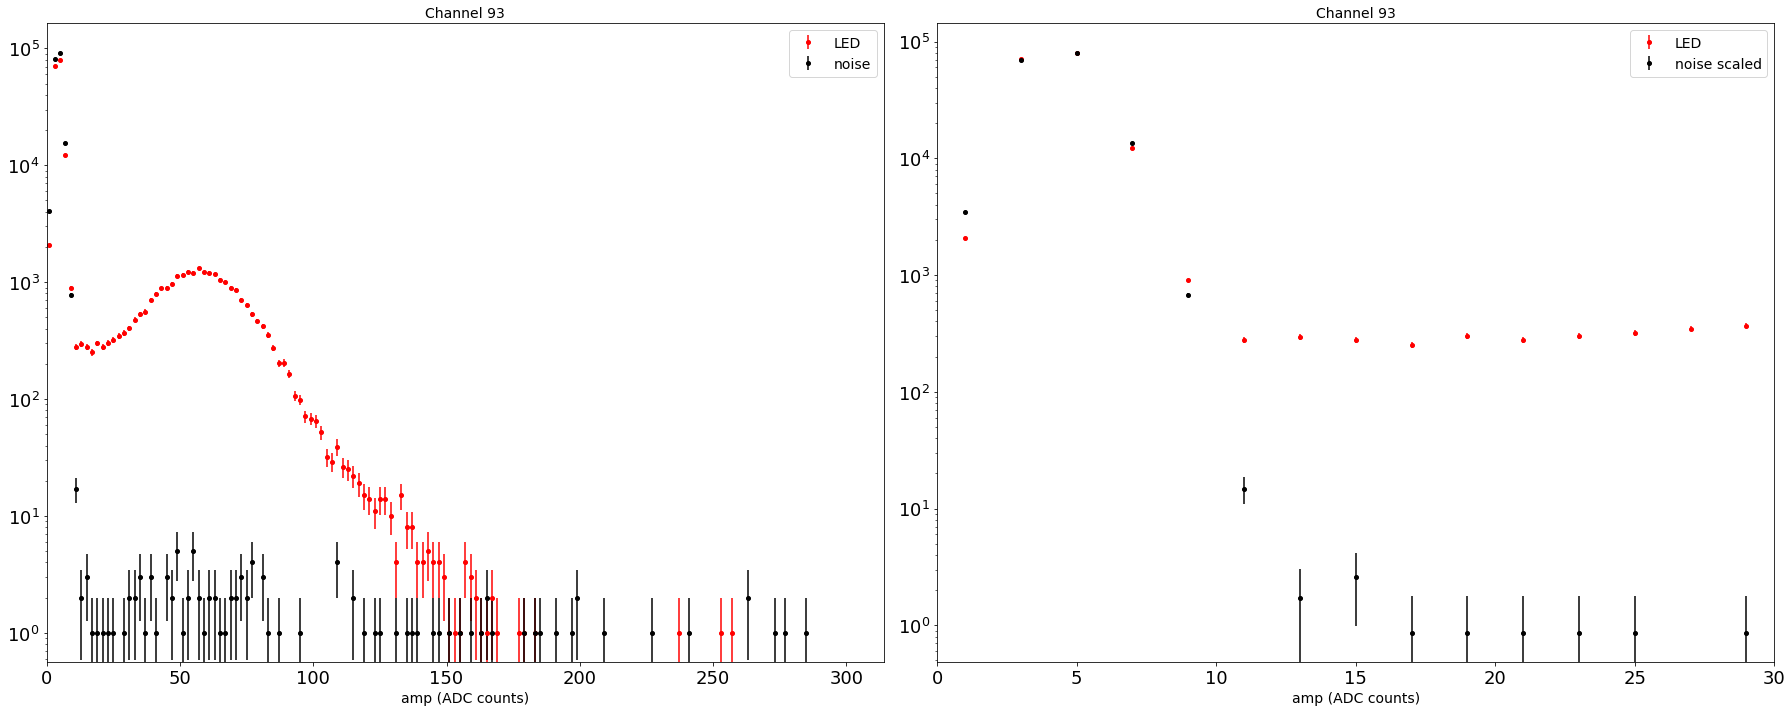

 38%|███▊      | 94/249 [01:33<02:32,  1.02it/s]

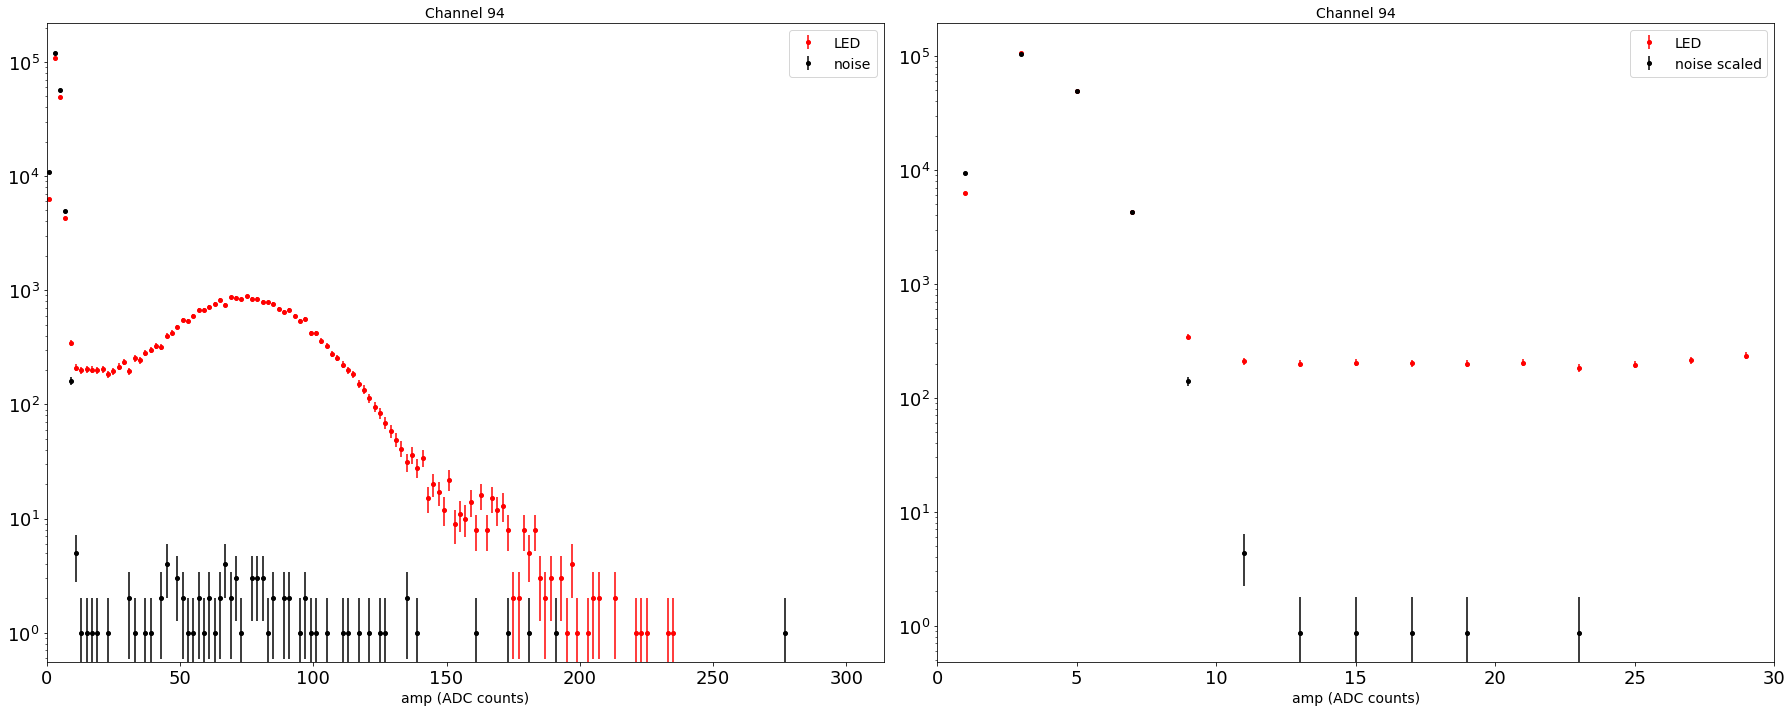

 38%|███▊      | 95/249 [01:34<02:32,  1.01it/s]

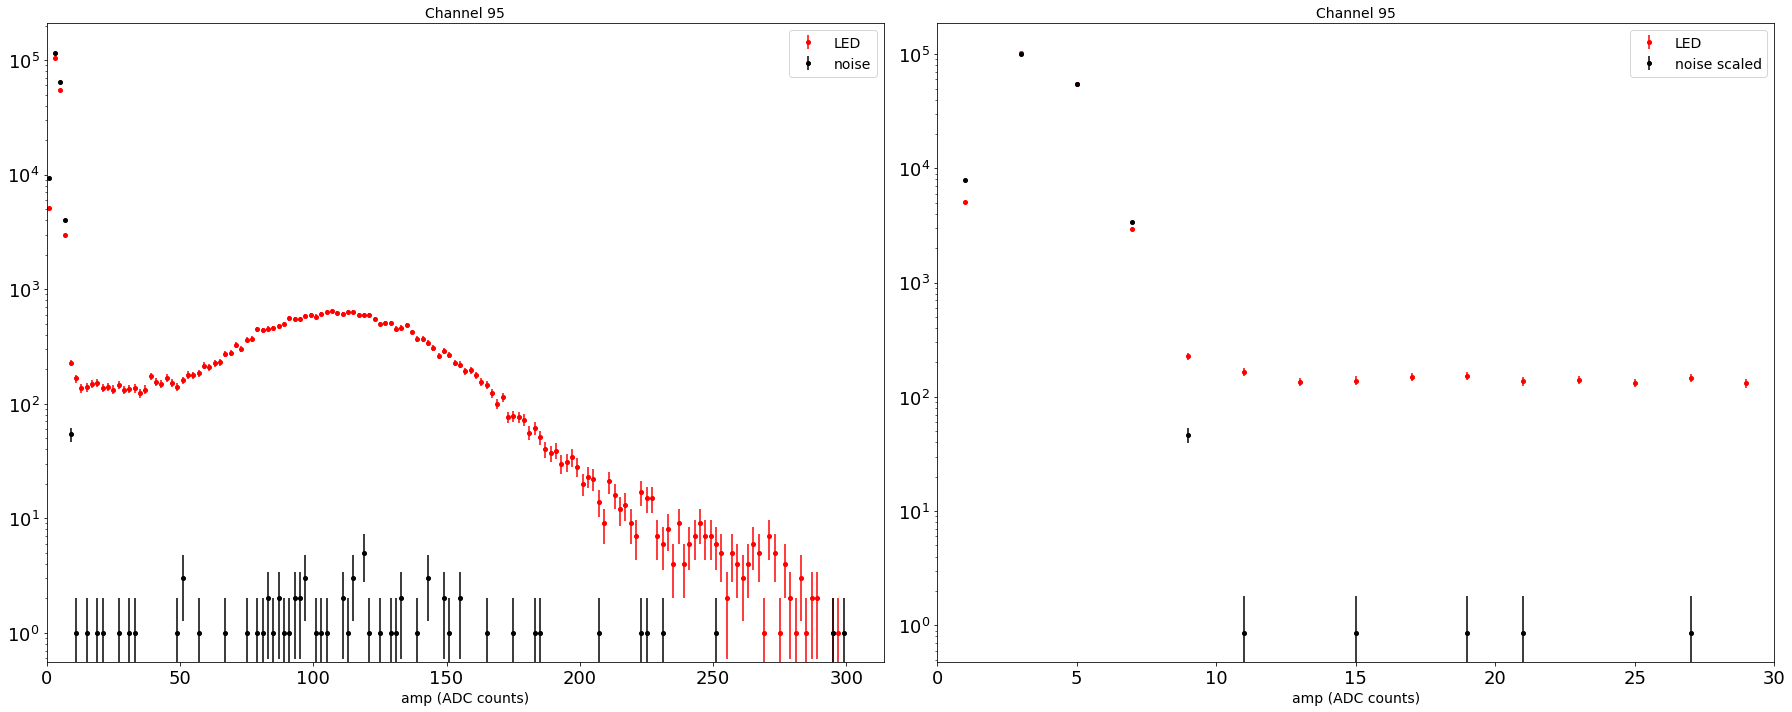

 39%|███▊      | 96/249 [01:35<02:30,  1.01it/s]

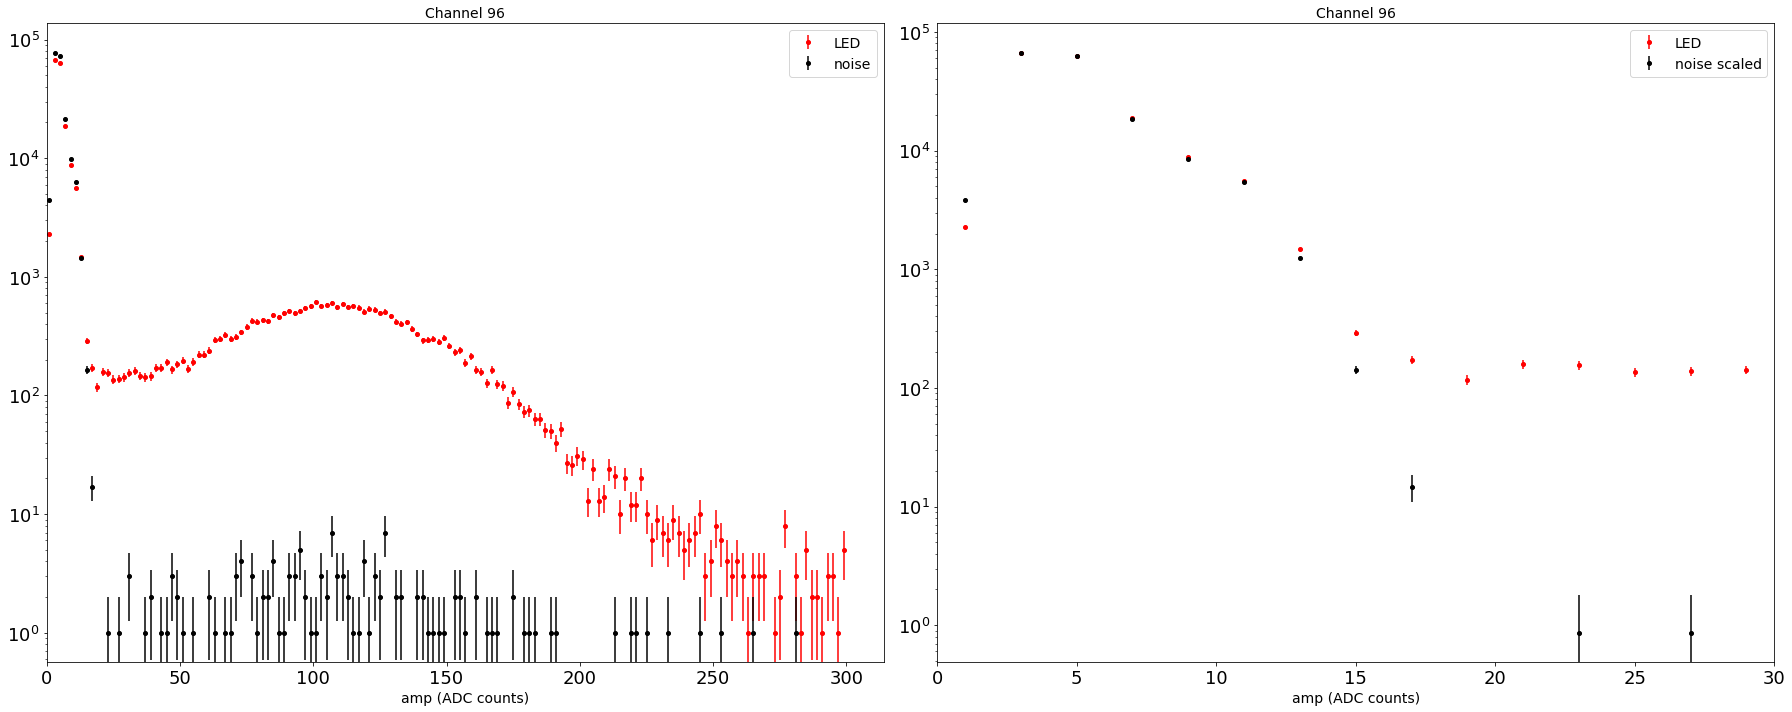

 39%|███▉      | 97/249 [01:36<02:30,  1.01it/s]

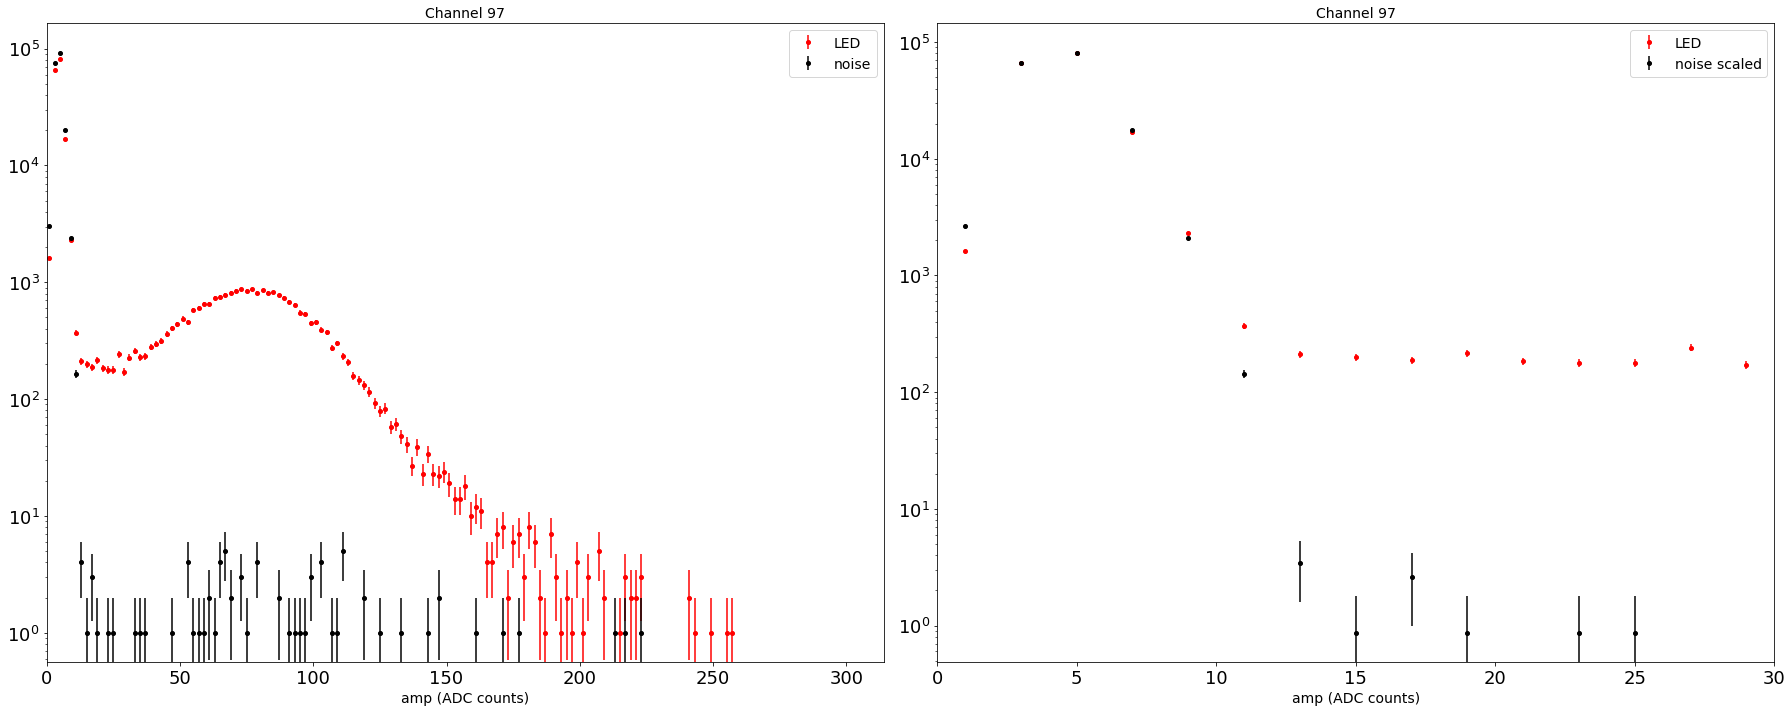

 39%|███▉      | 98/249 [01:37<02:29,  1.01it/s]

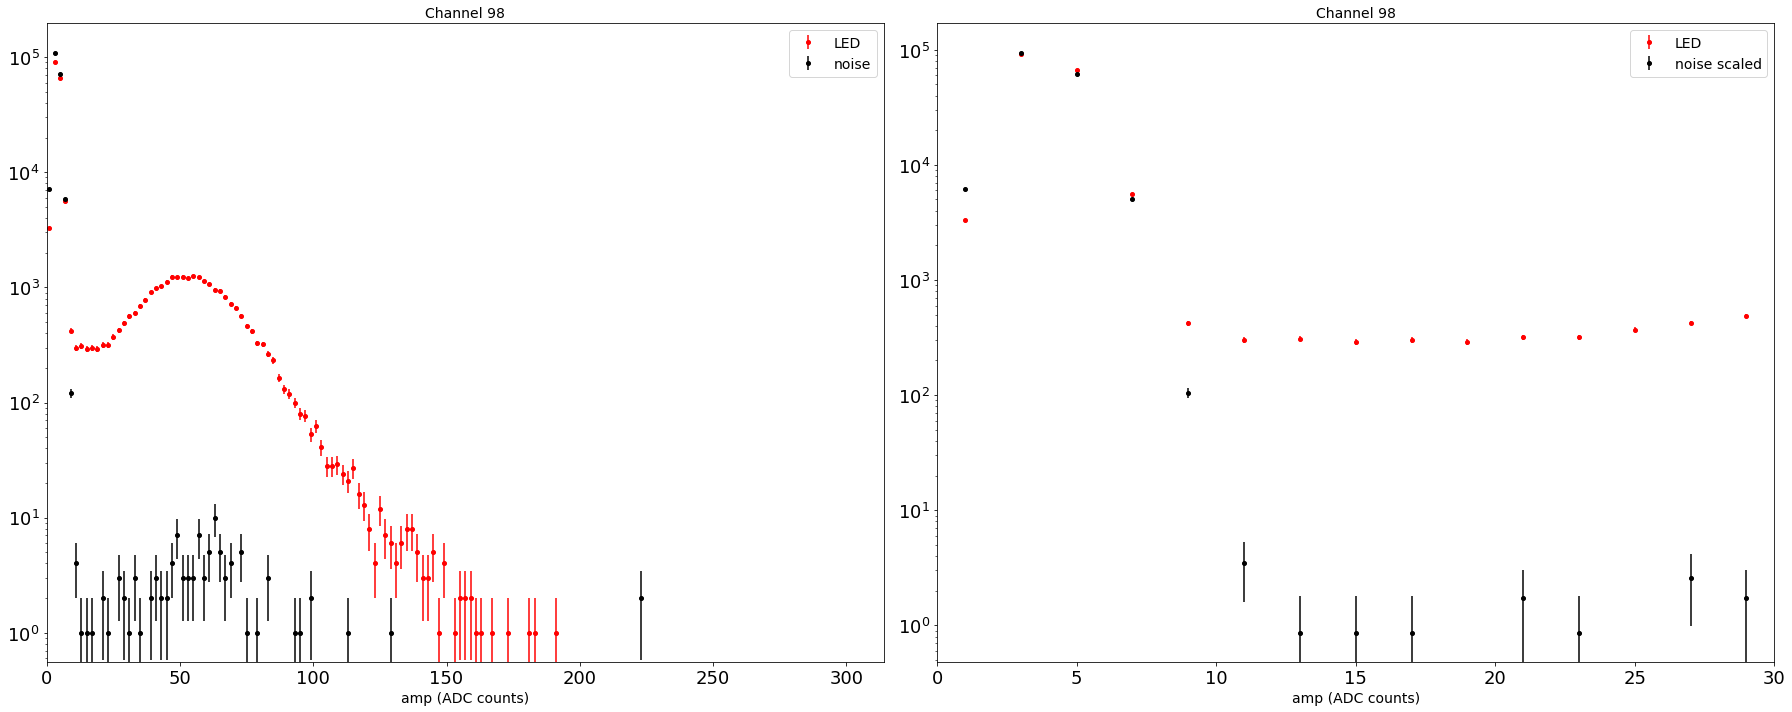

 40%|███▉      | 99/249 [01:38<02:27,  1.02it/s]

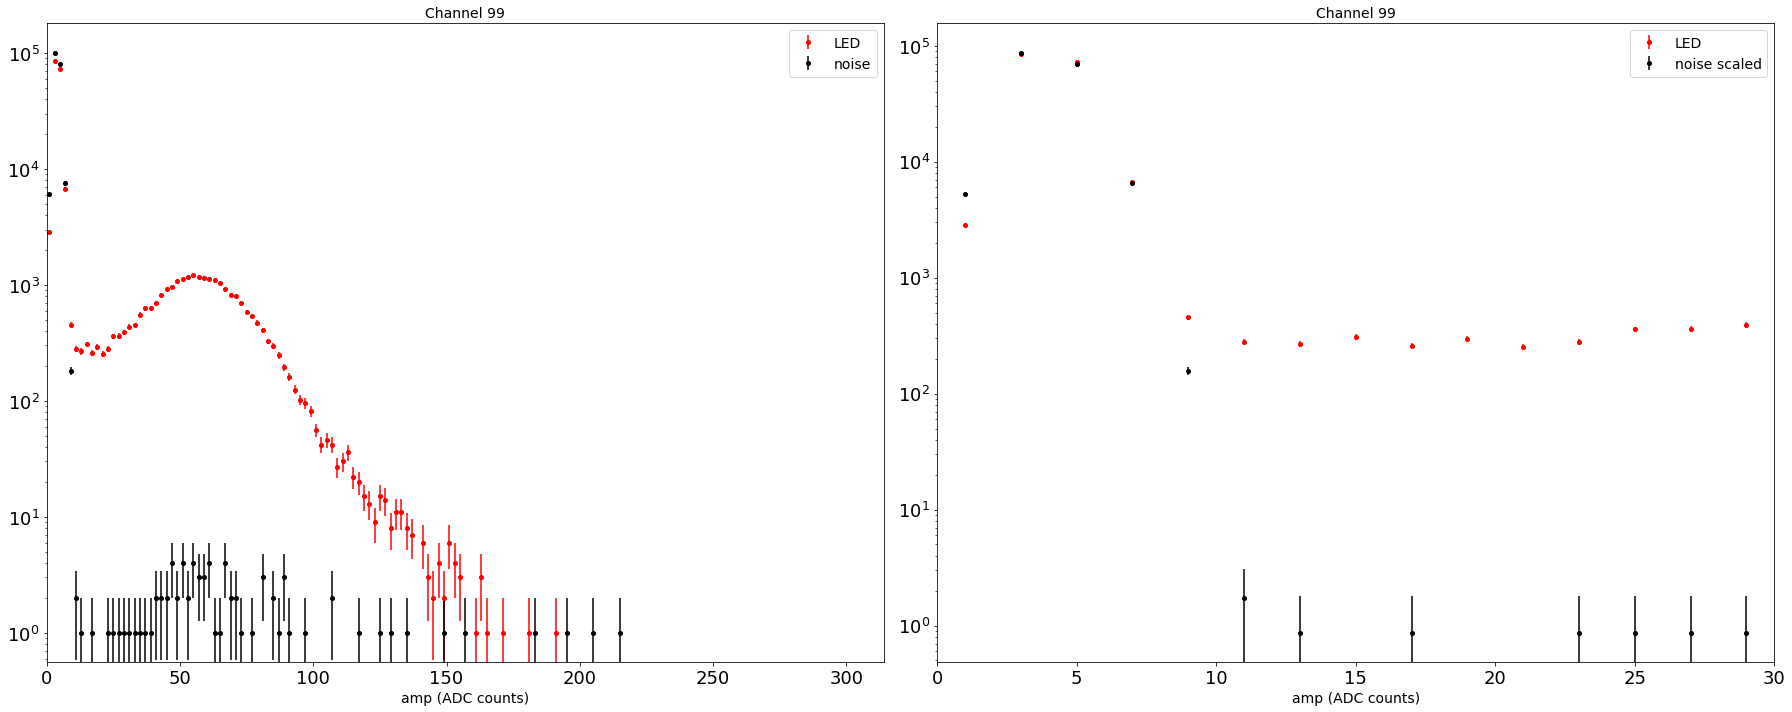

 40%|████      | 100/249 [01:39<02:26,  1.02it/s]

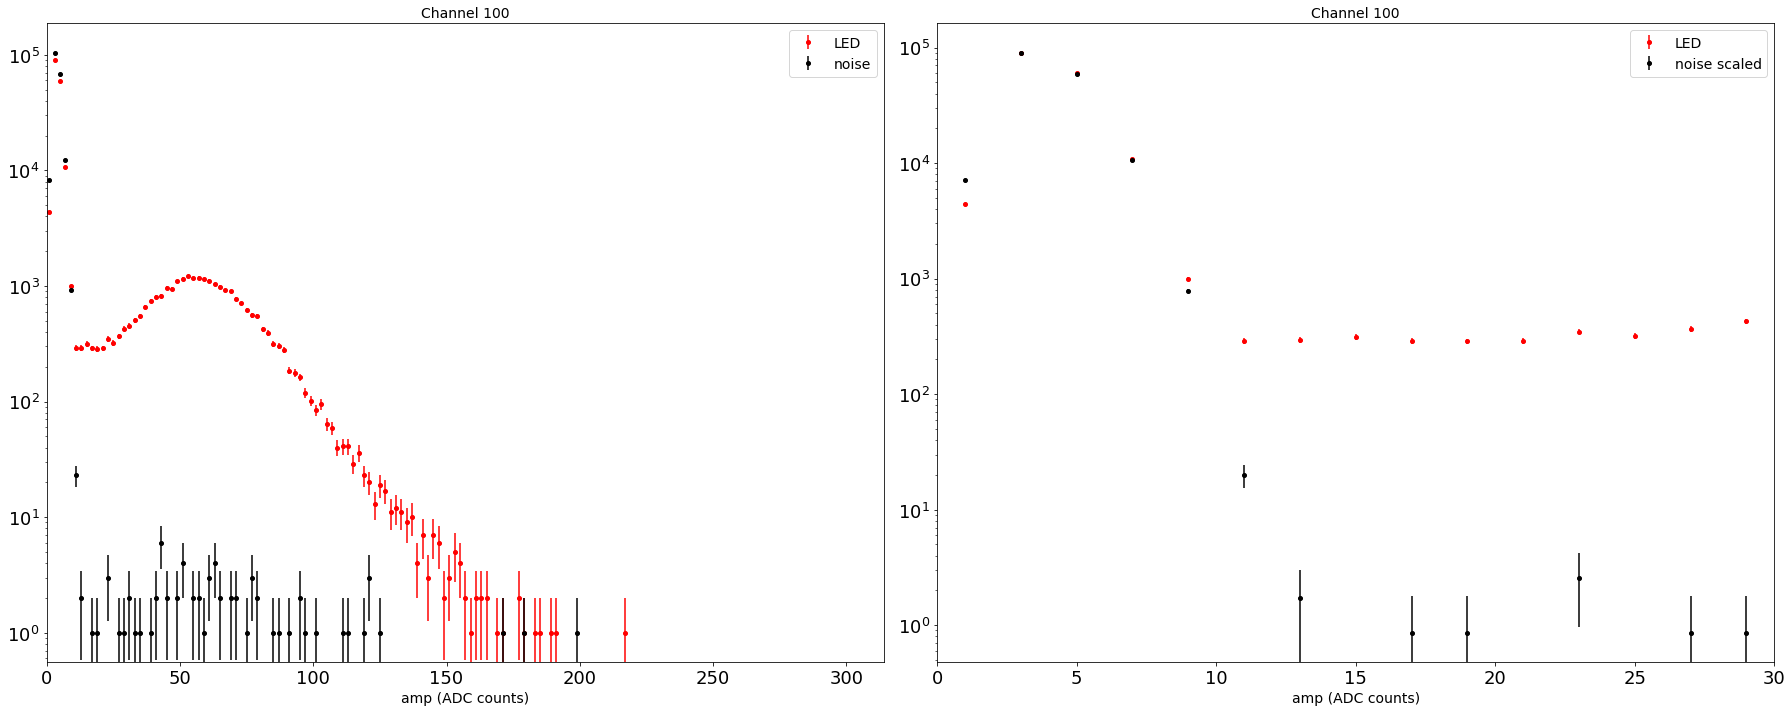

 41%|████      | 101/249 [01:40<02:25,  1.02it/s]

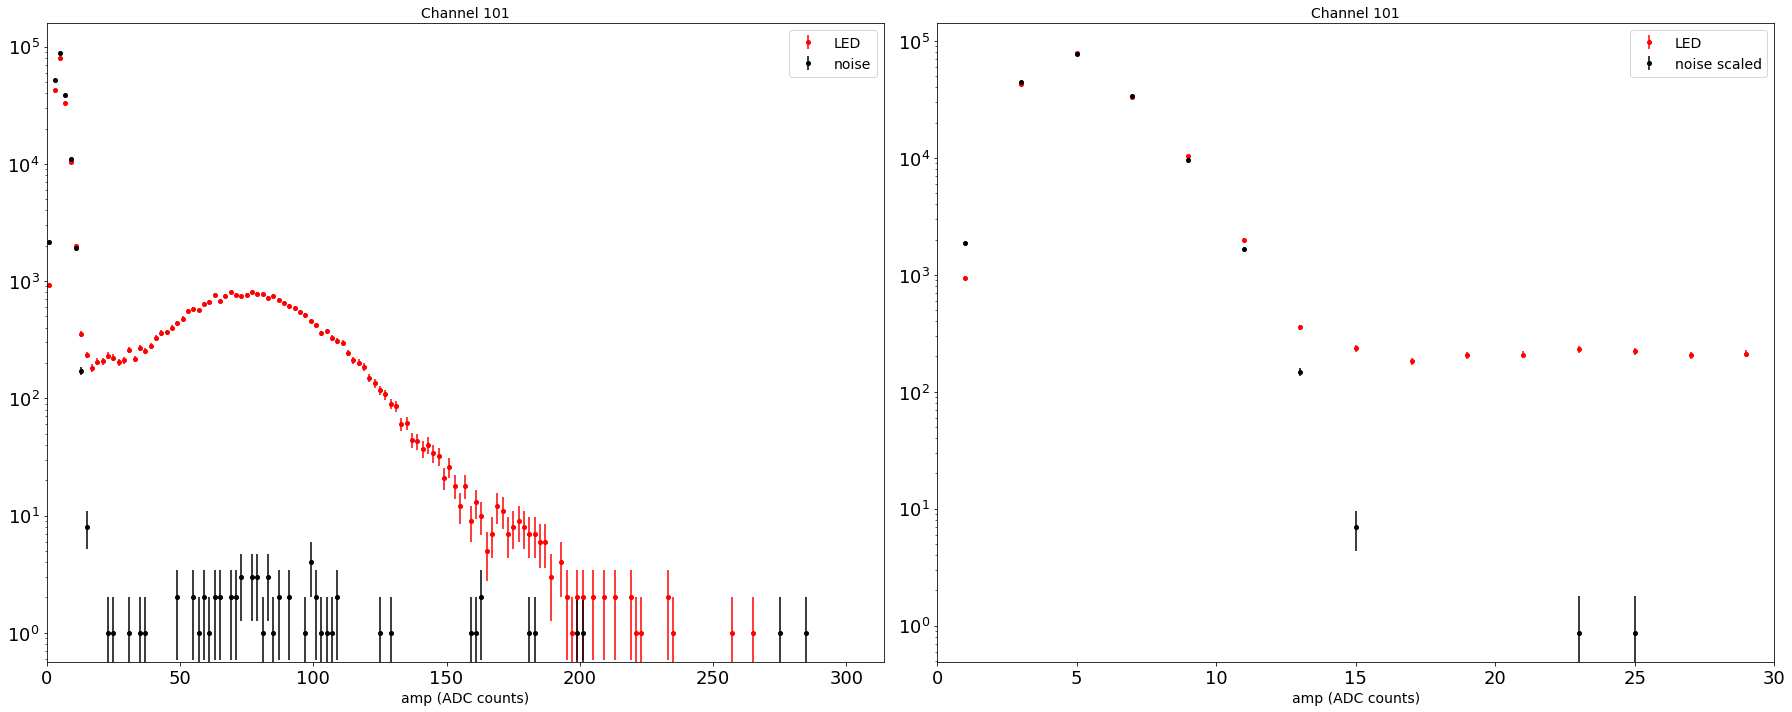

 41%|████      | 102/249 [01:41<02:24,  1.02it/s]

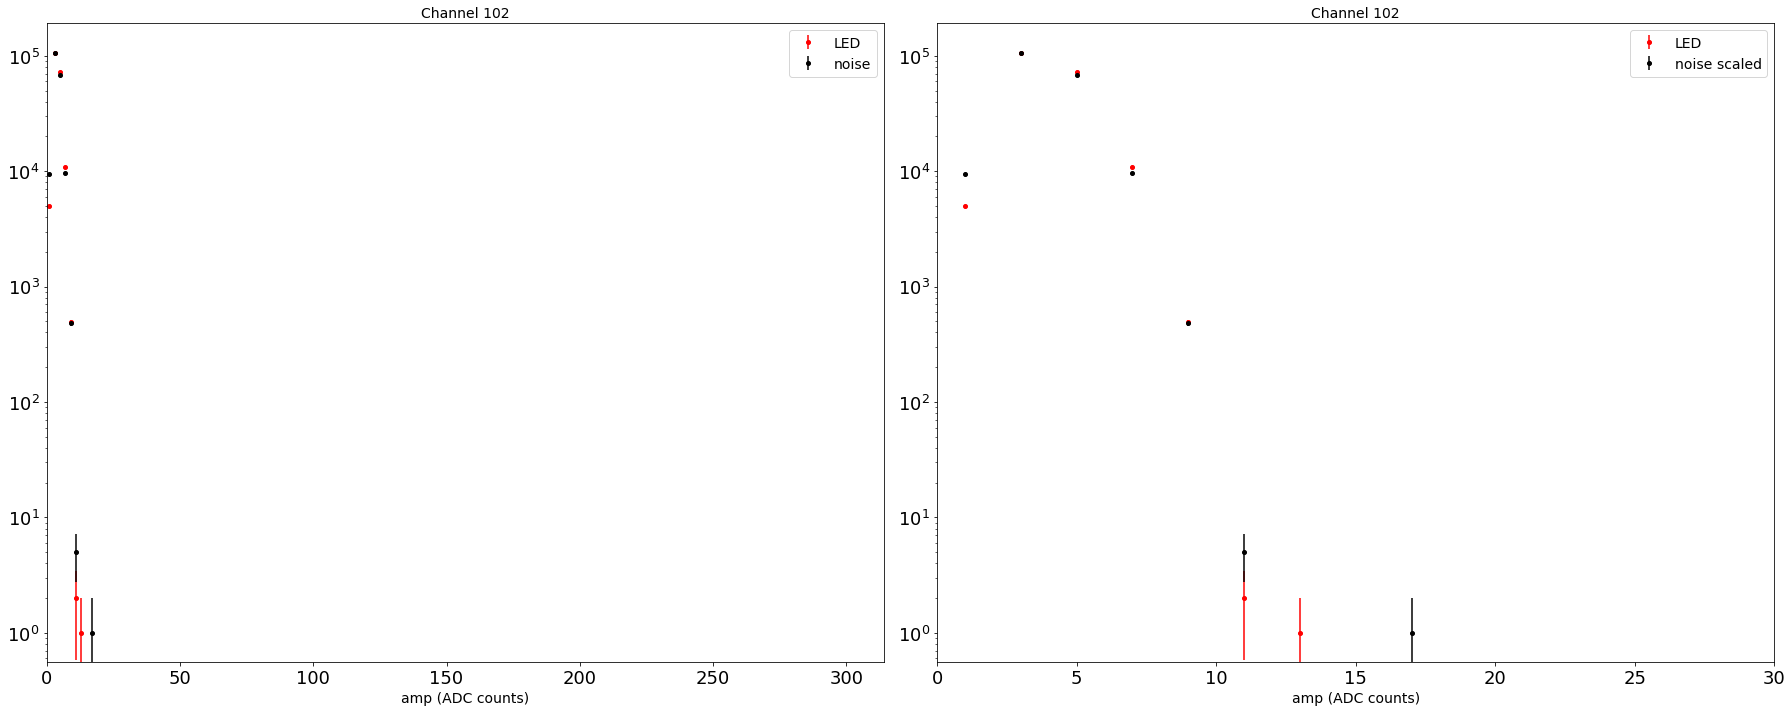

 41%|████▏     | 103/249 [01:42<02:24,  1.01it/s]

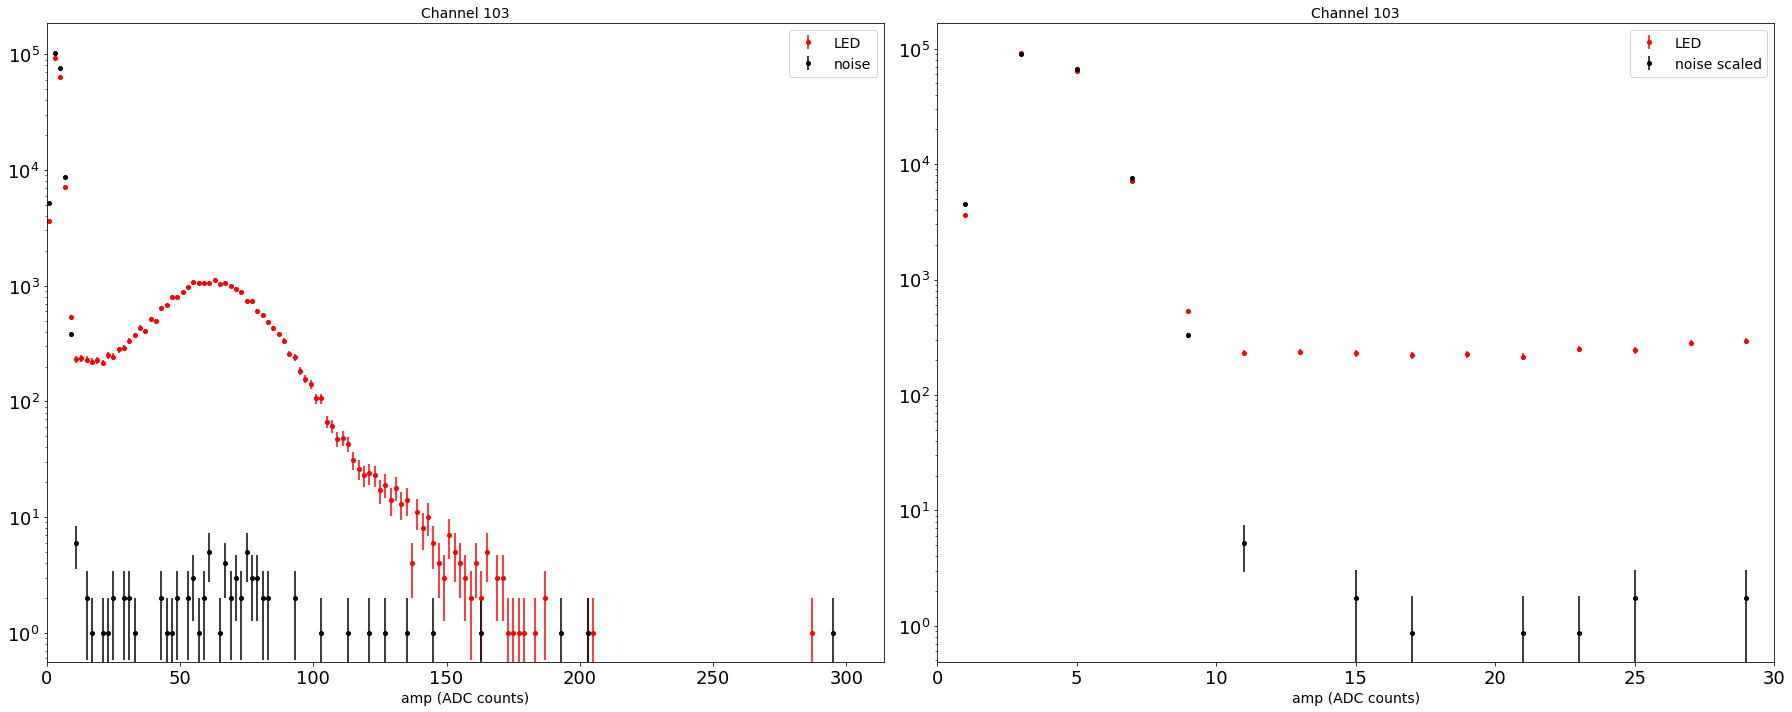

 42%|████▏     | 104/249 [01:43<02:24,  1.01it/s]

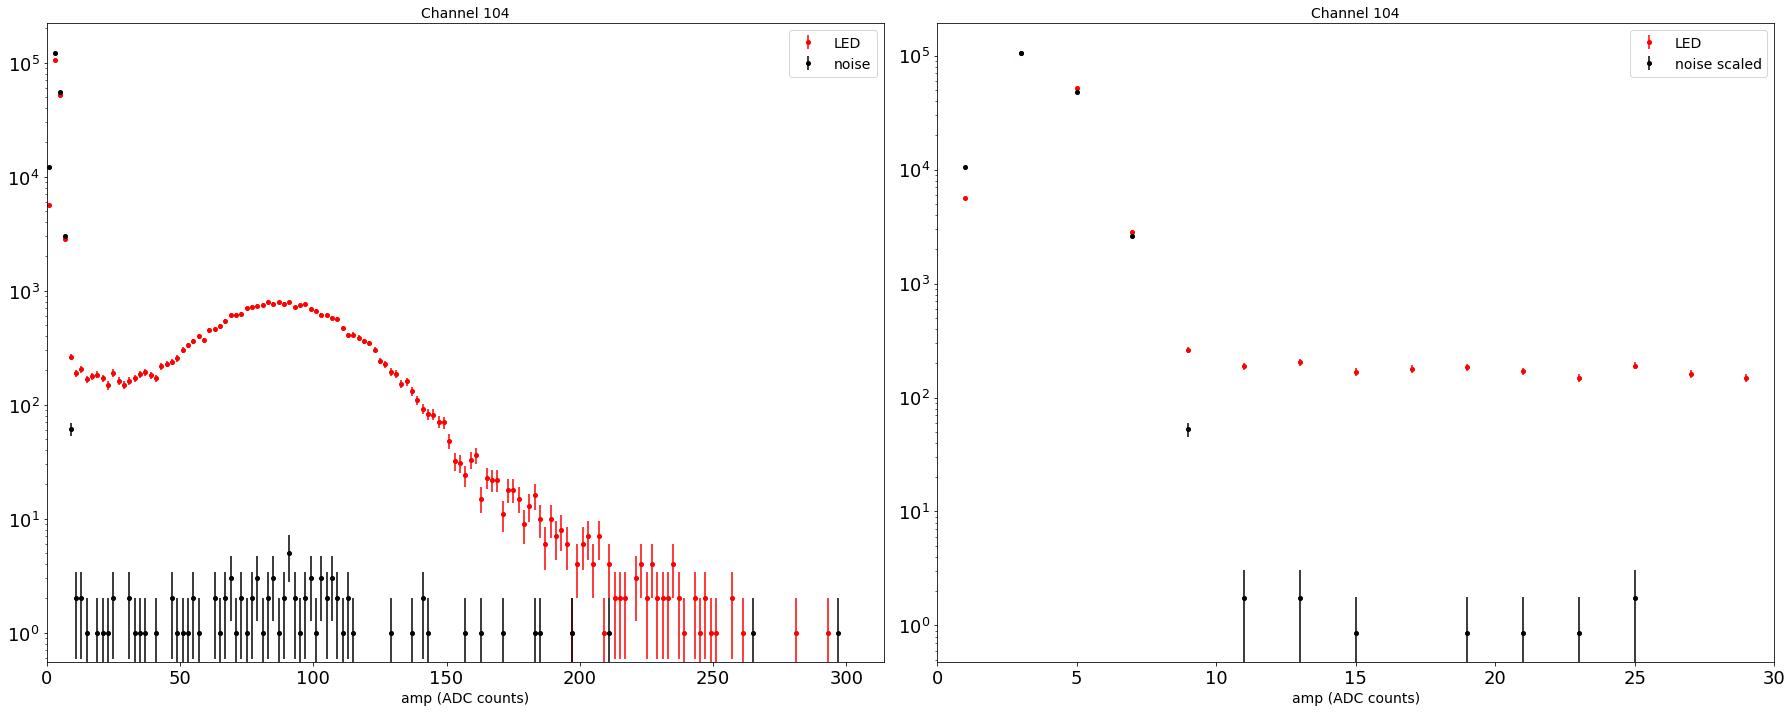

 42%|████▏     | 105/249 [01:44<02:23,  1.00it/s]

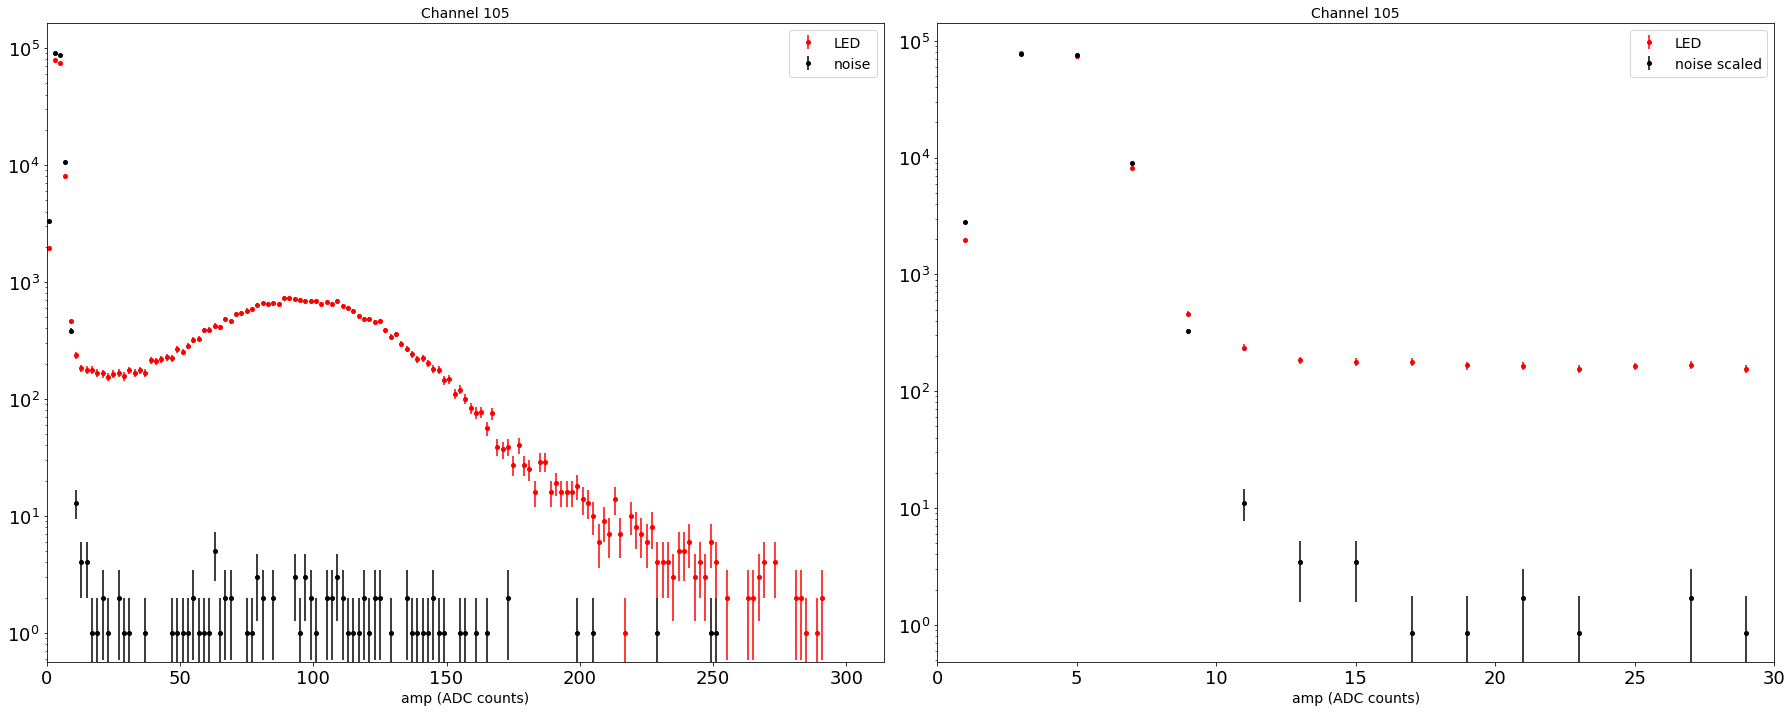

 43%|████▎     | 106/249 [01:45<02:22,  1.01it/s]

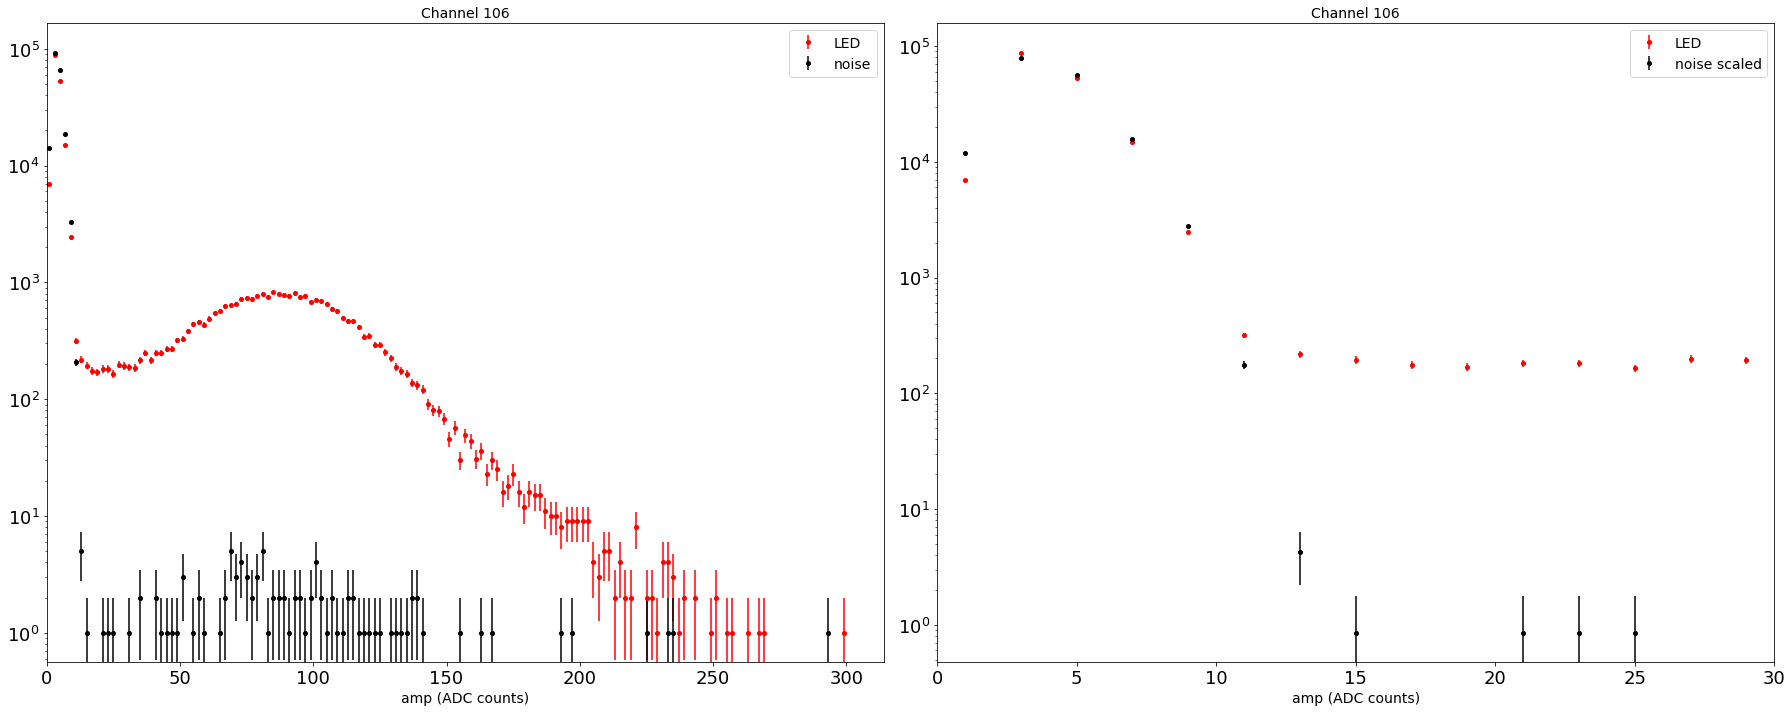

 43%|████▎     | 107/249 [01:46<02:23,  1.01s/it]

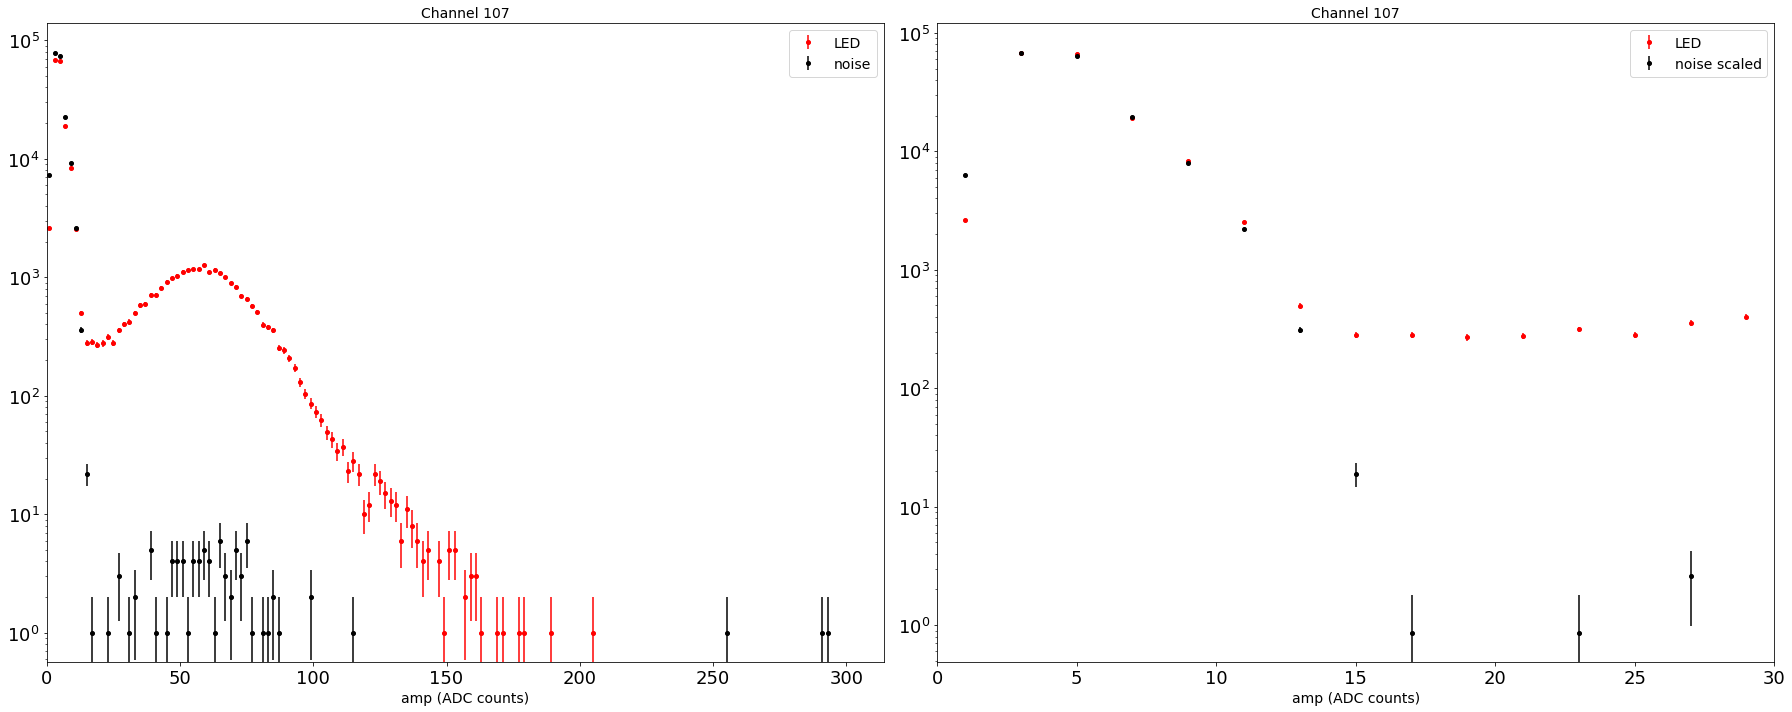

 43%|████▎     | 108/249 [01:47<02:21,  1.00s/it]

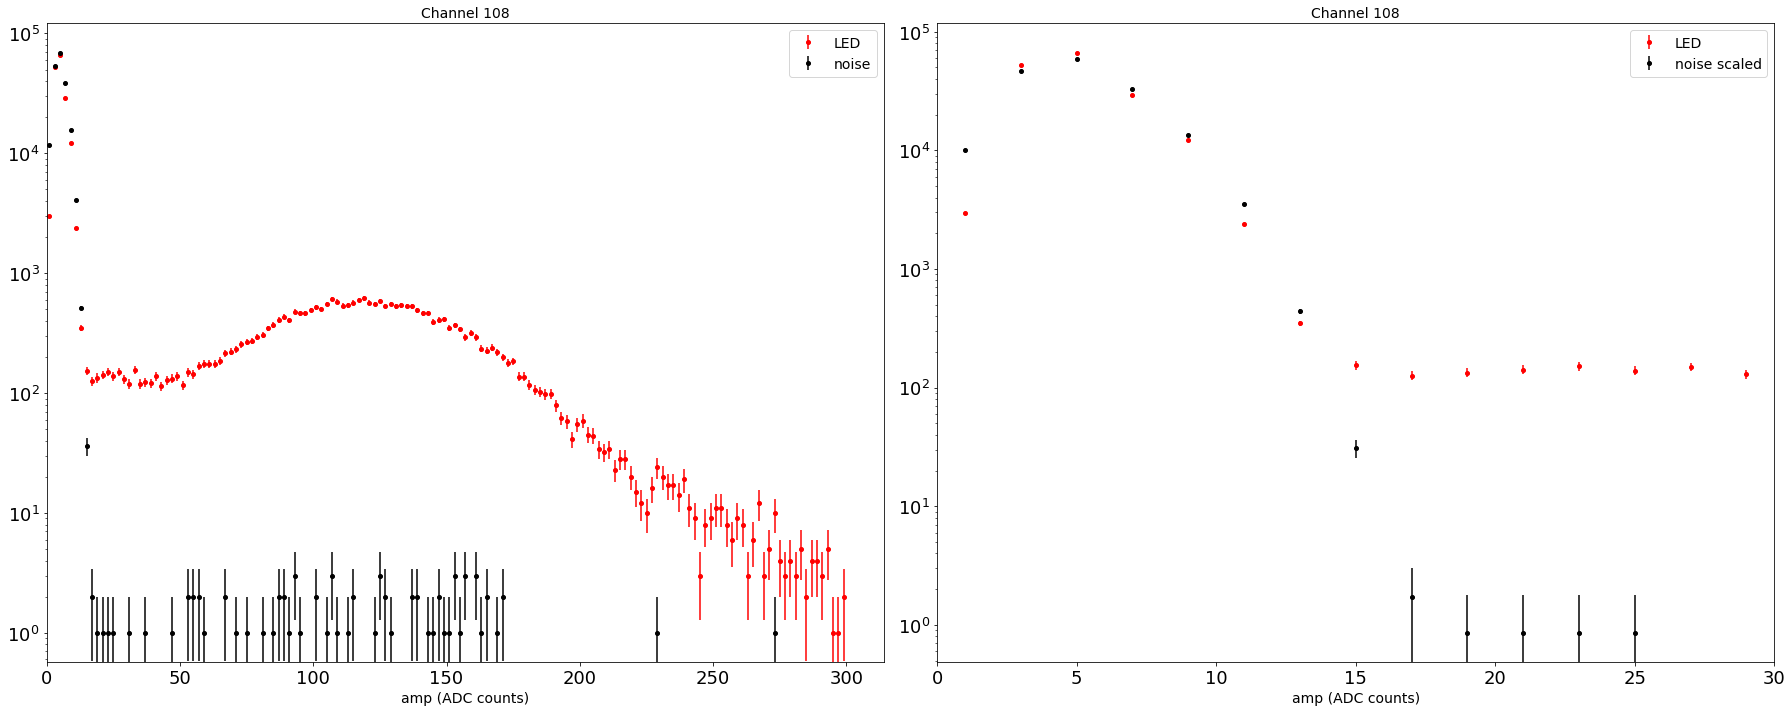

 44%|████▍     | 109/249 [01:48<02:20,  1.00s/it]

 44%|████▍     | 110/249 [01:49<02:20,  1.01s/it]

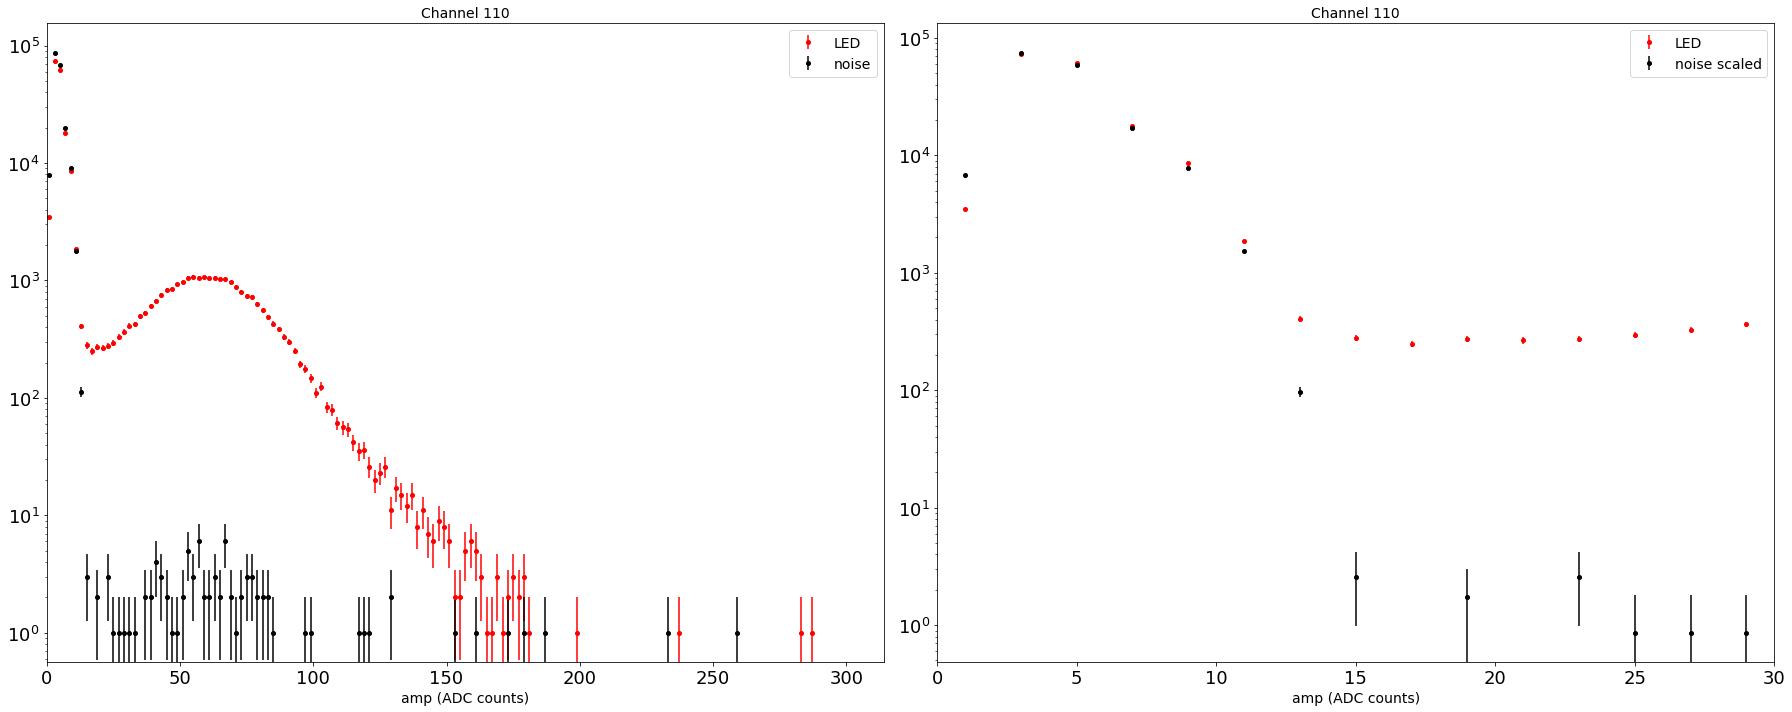

 45%|████▍     | 111/249 [01:50<02:18,  1.01s/it]

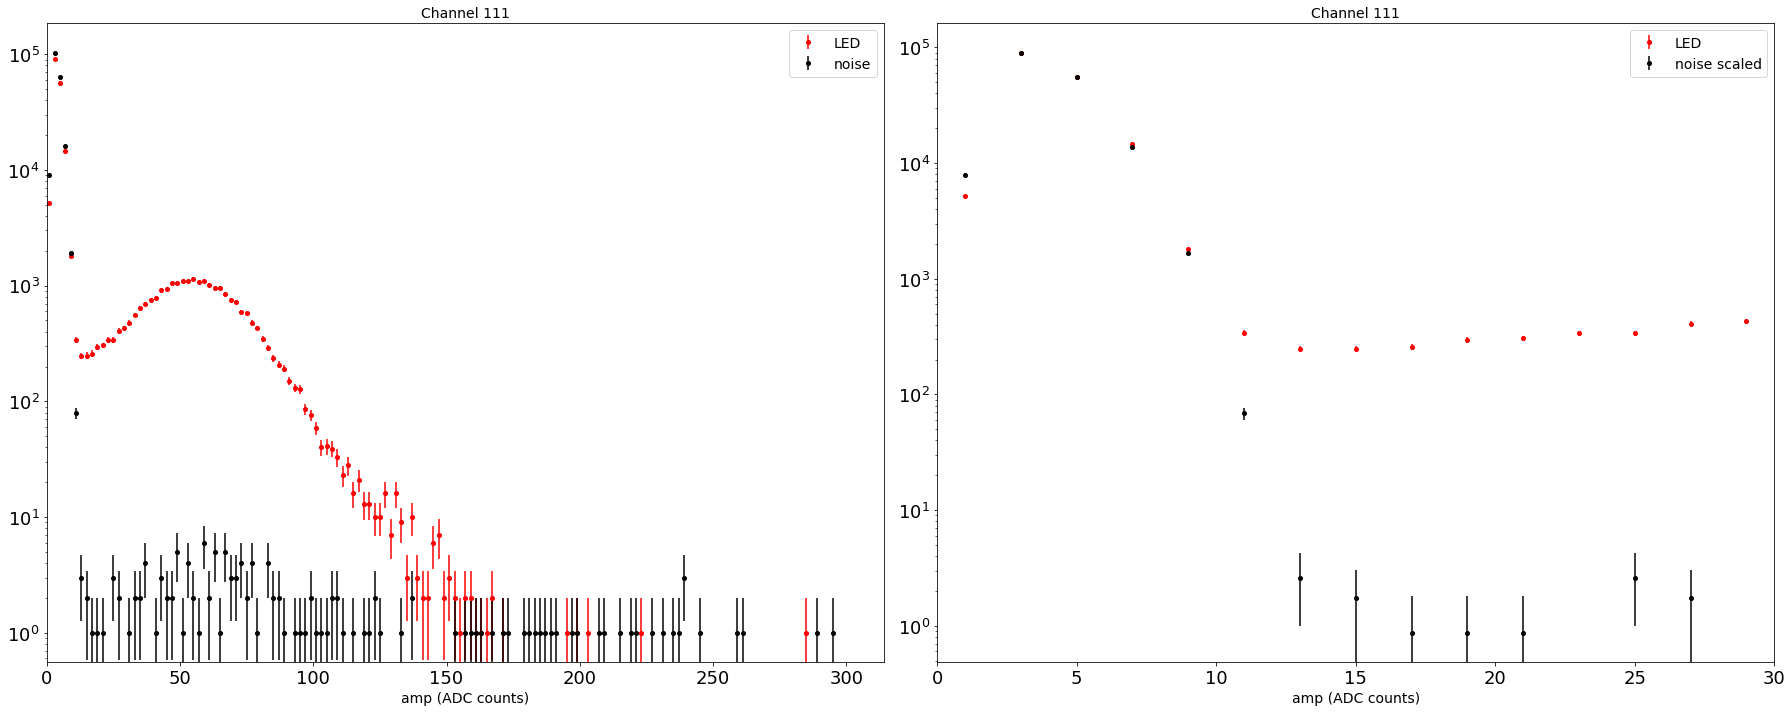

 45%|████▍     | 112/249 [01:51<02:16,  1.00it/s]

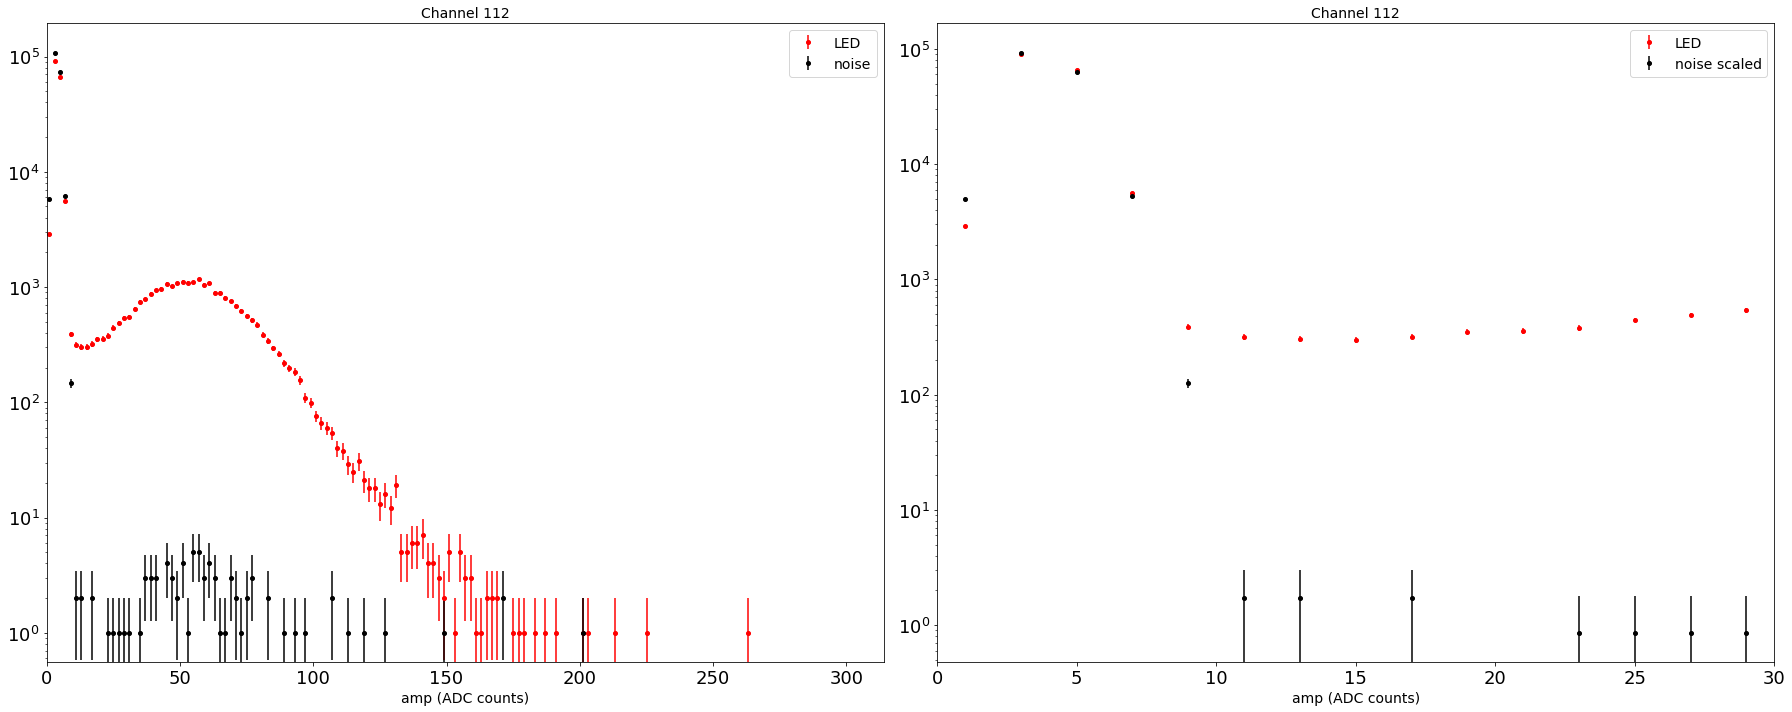

 45%|████▌     | 113/249 [01:52<02:14,  1.01it/s]

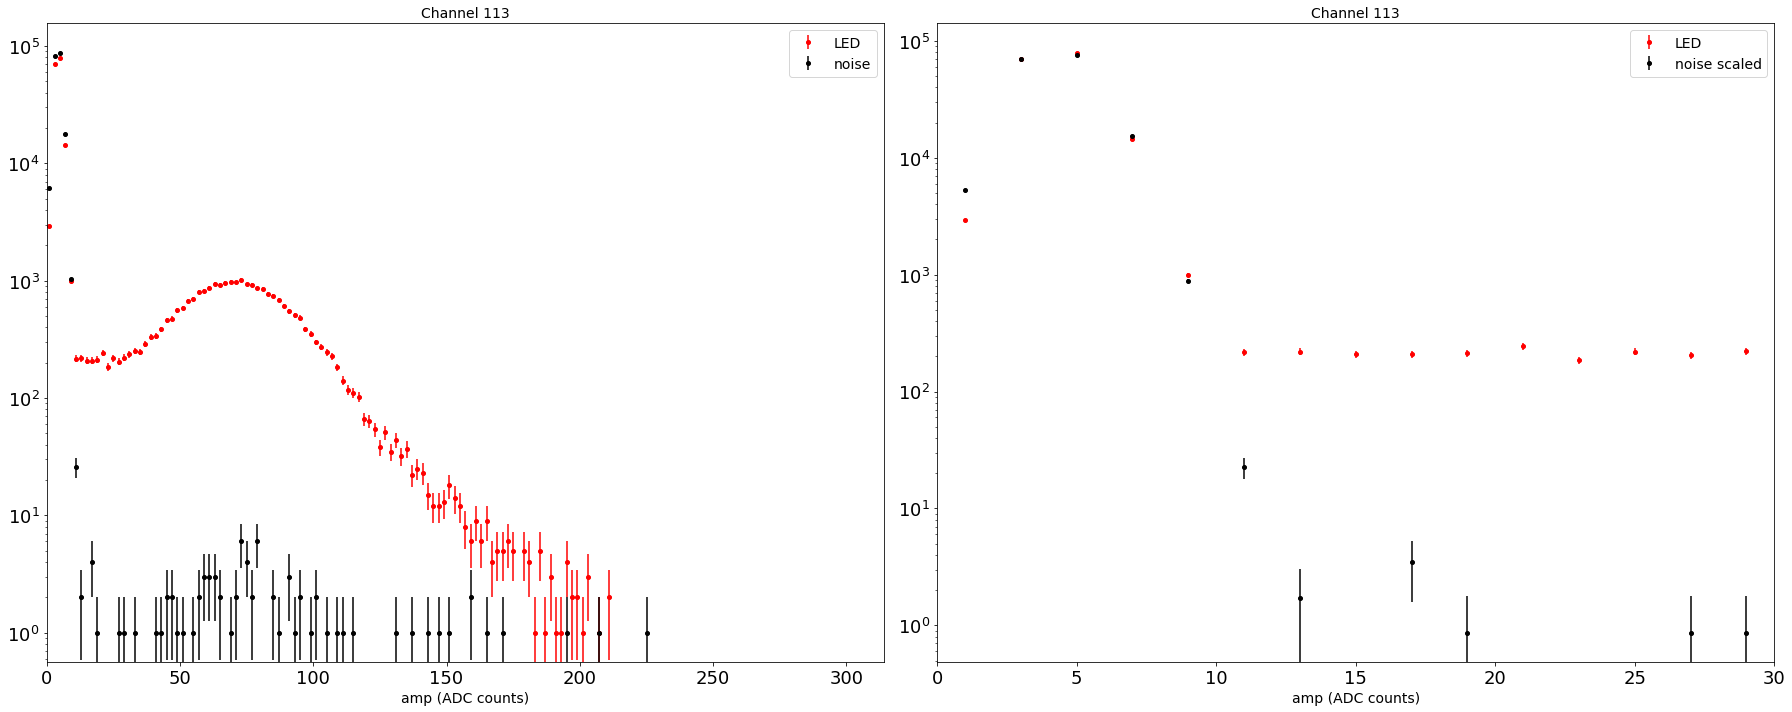

 46%|████▌     | 114/249 [01:53<02:15,  1.00s/it]

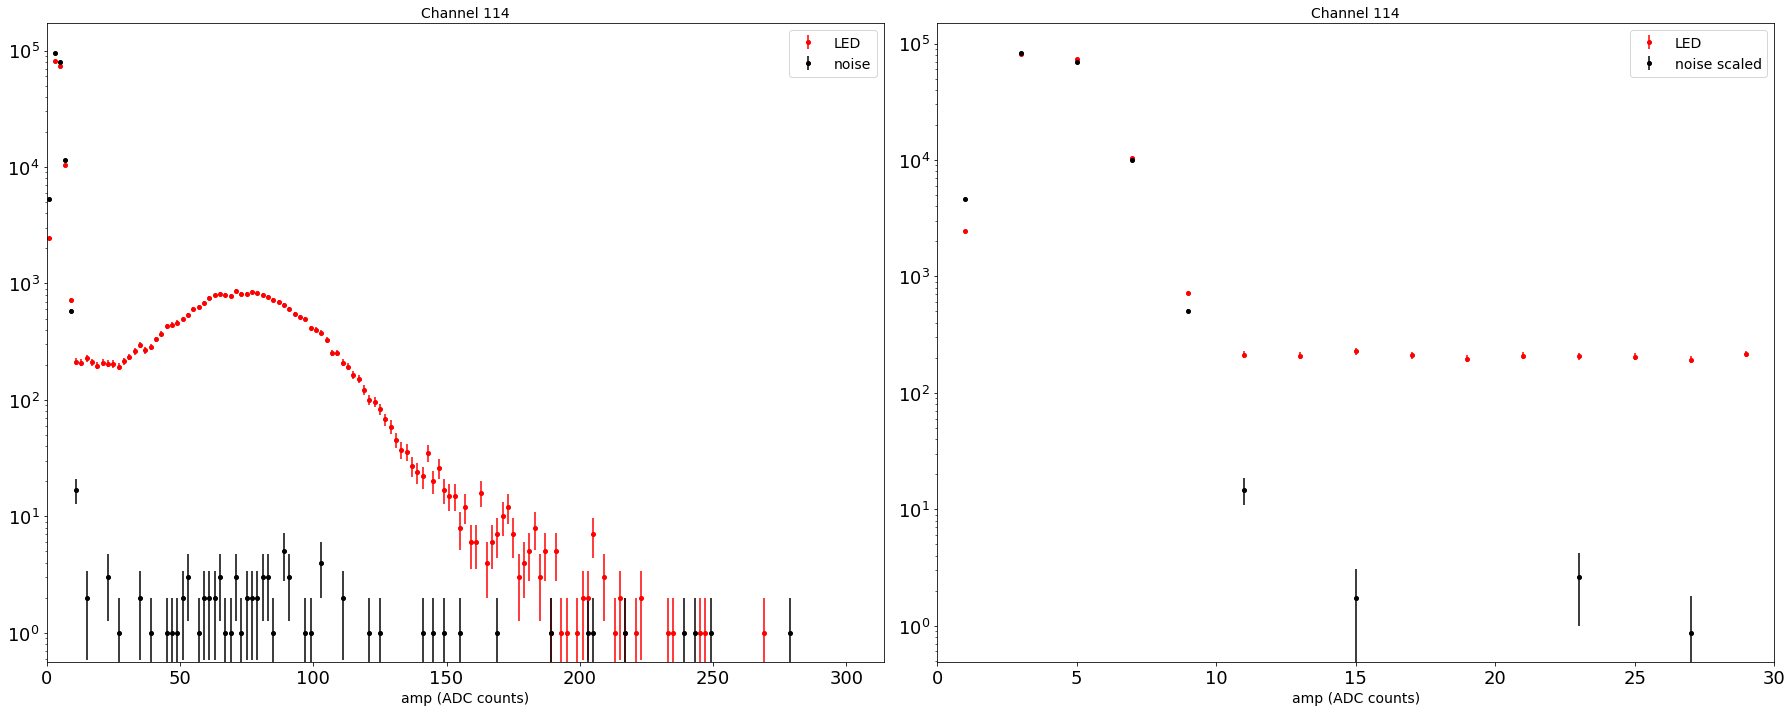

 46%|████▌     | 115/249 [01:54<02:13,  1.00it/s]

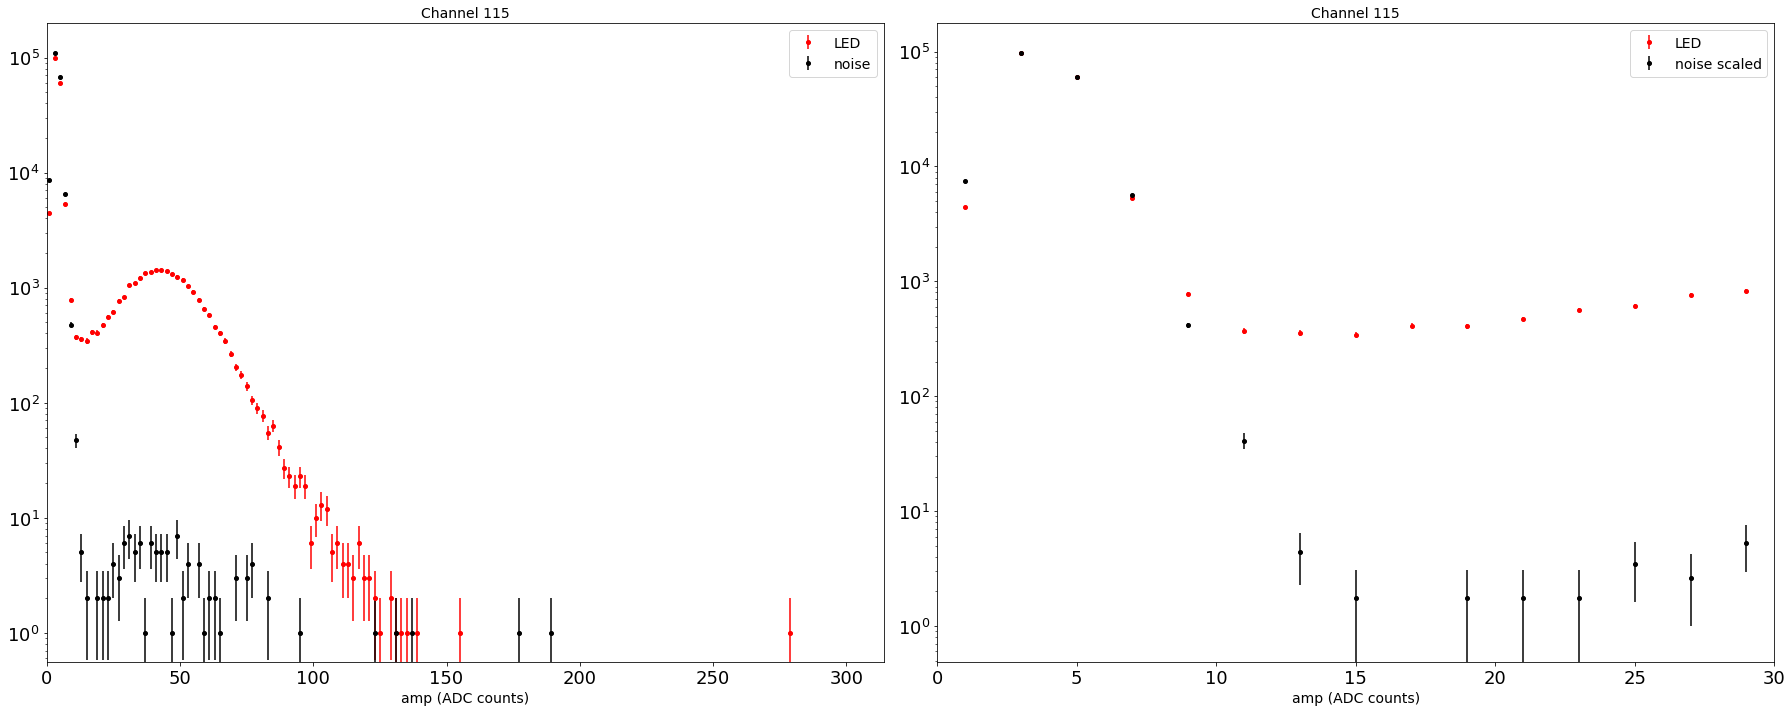

 47%|████▋     | 116/249 [01:55<02:11,  1.01it/s]

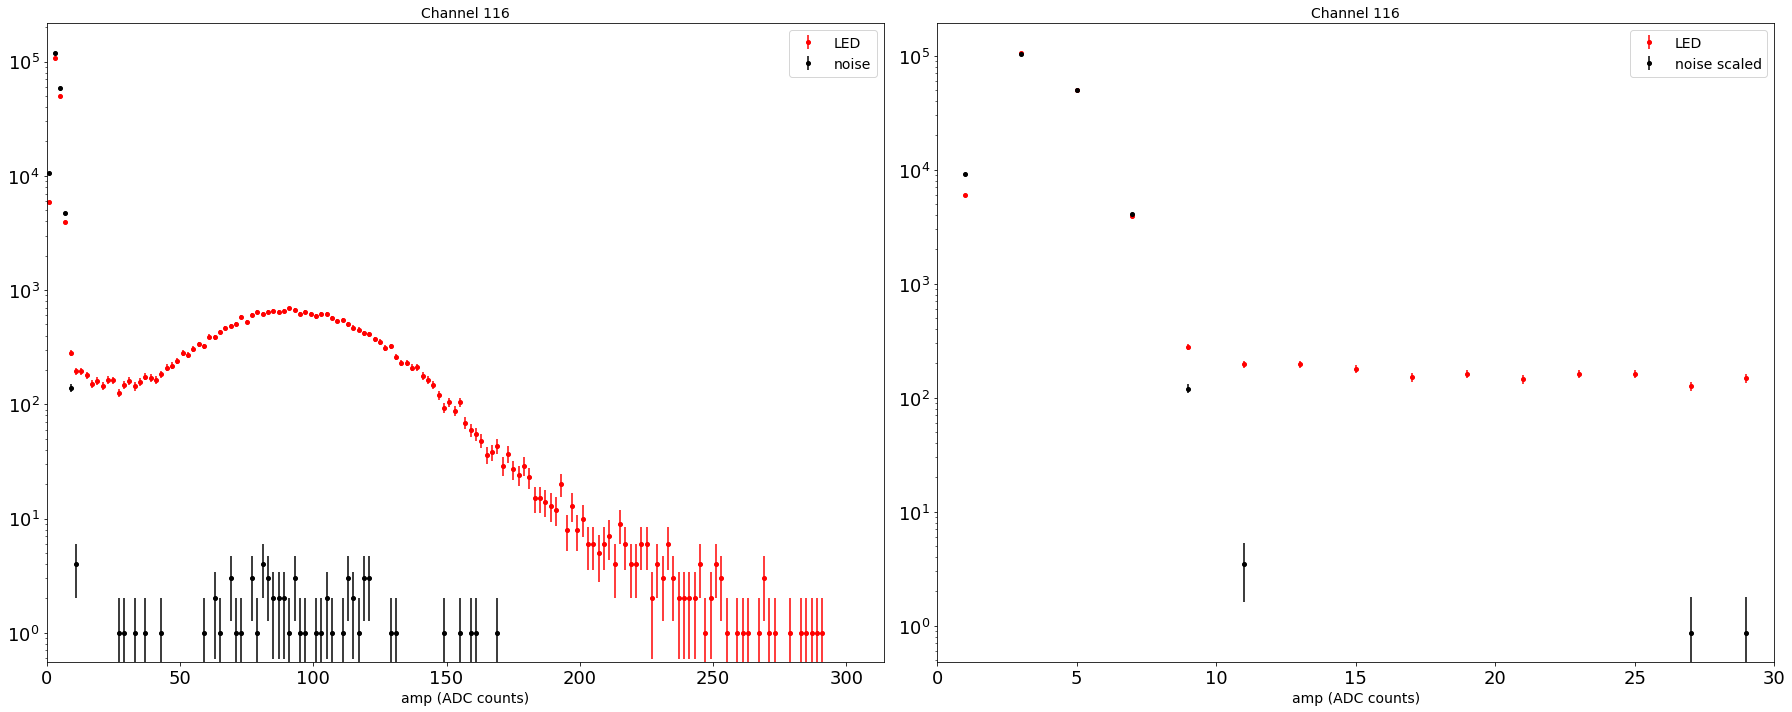

 47%|████▋     | 117/249 [01:56<02:10,  1.01it/s]

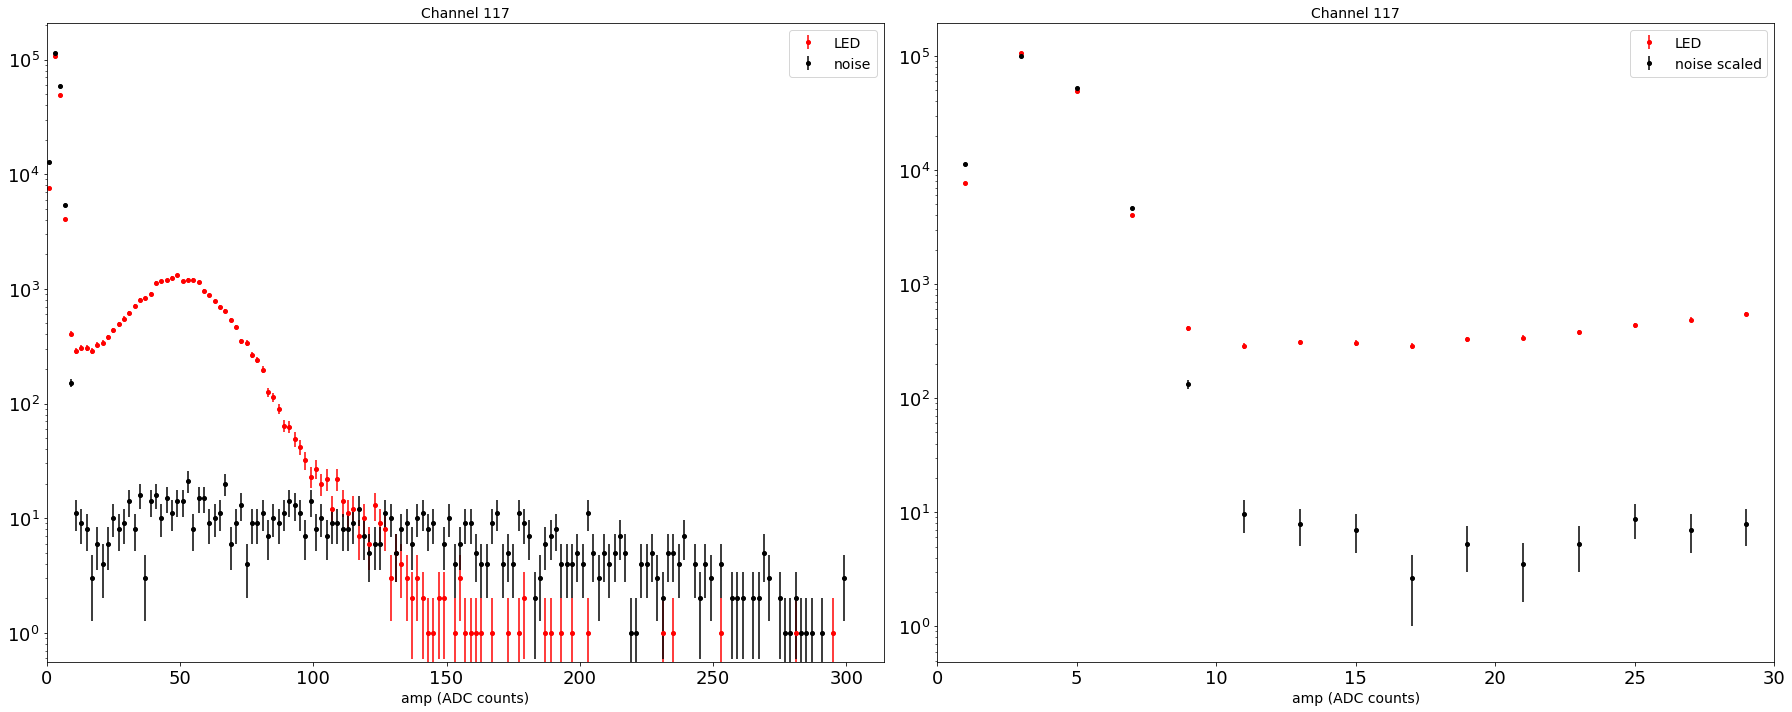

 47%|████▋     | 118/249 [01:57<02:11,  1.00s/it]

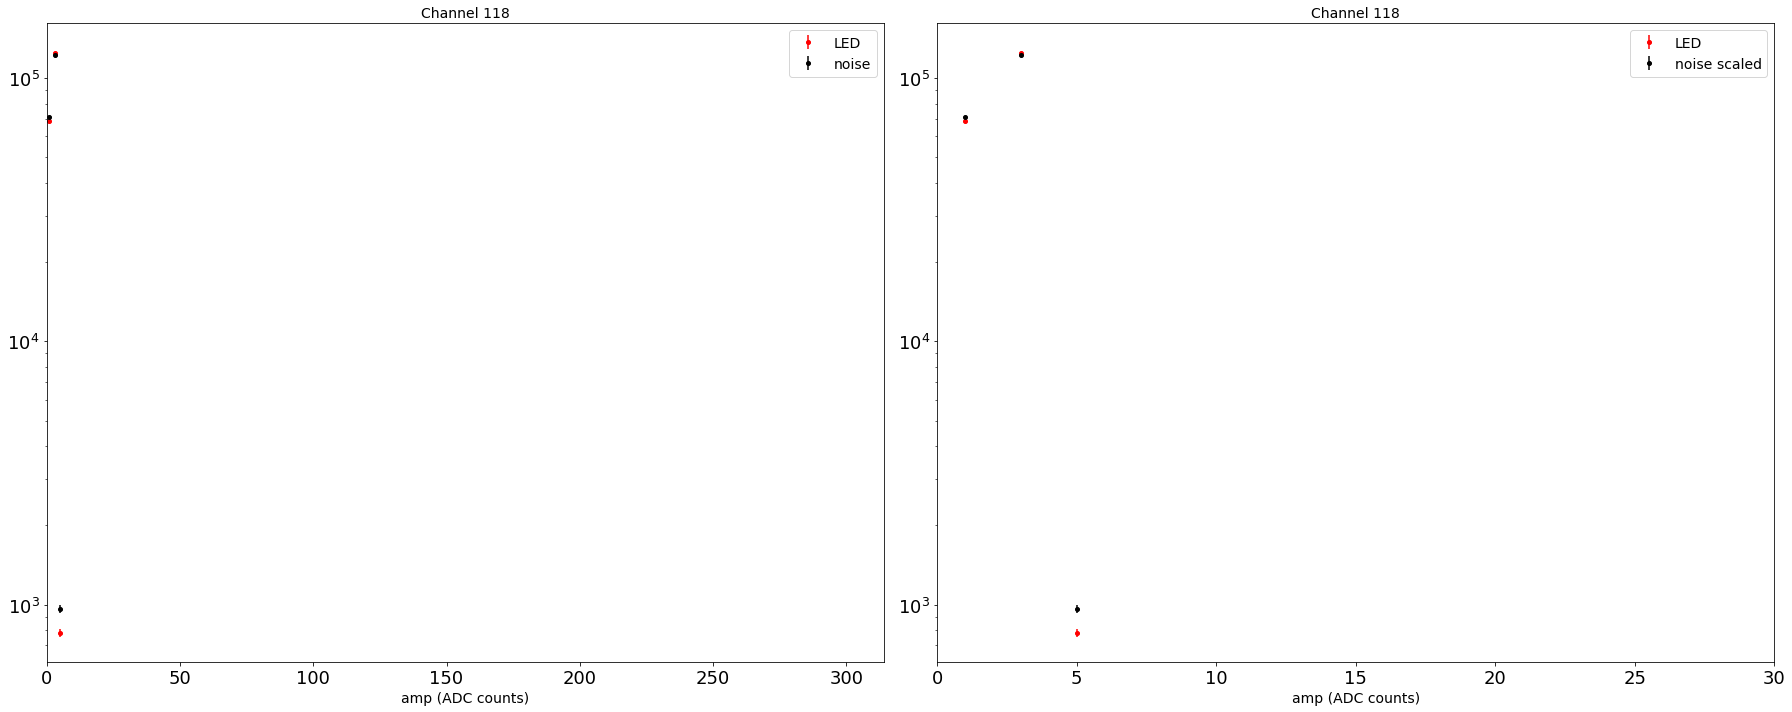

 48%|████▊     | 119/249 [01:58<02:03,  1.05it/s]

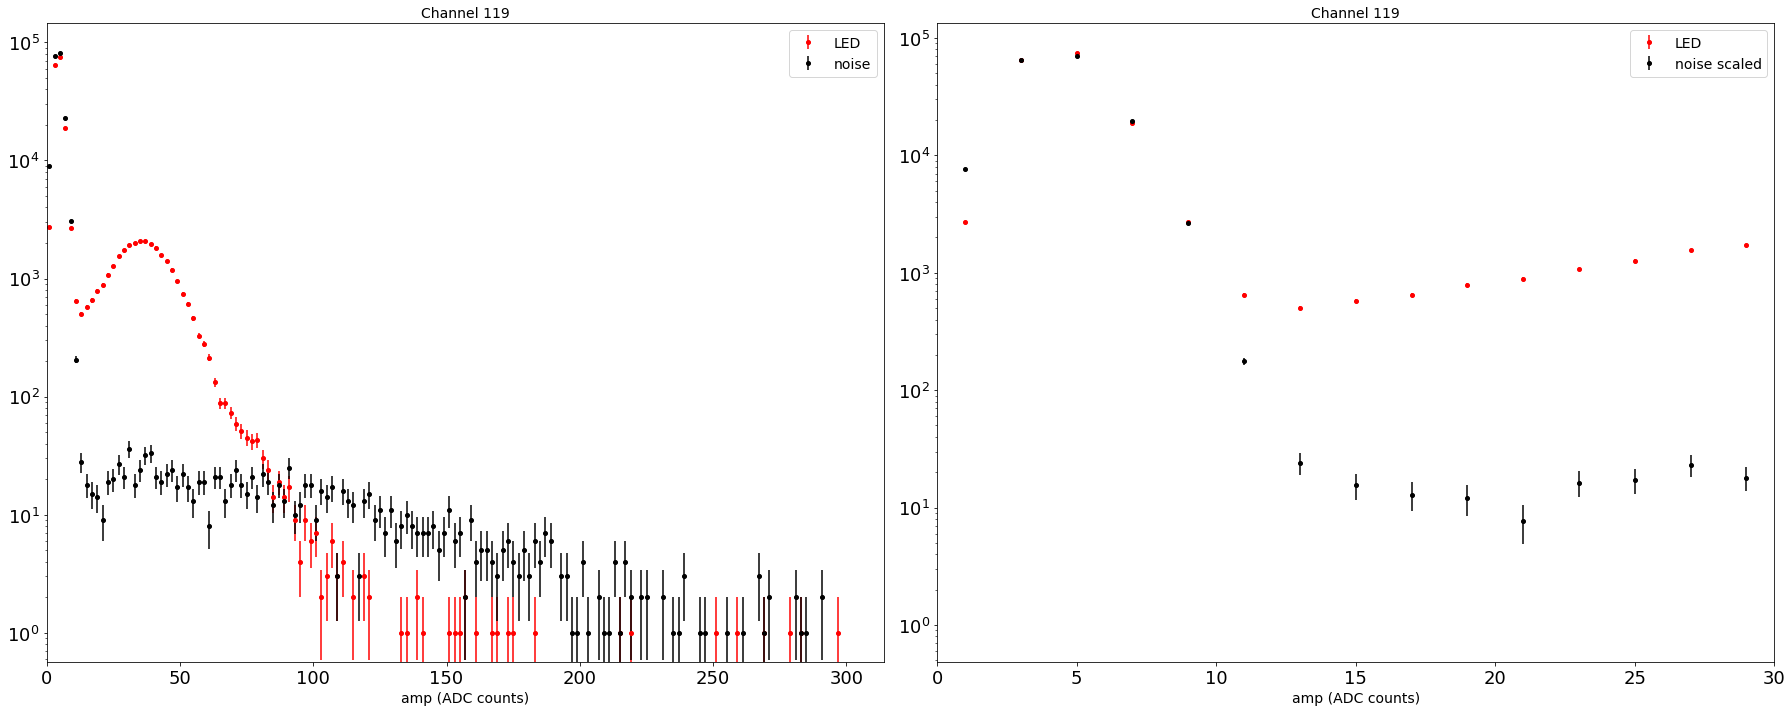

 48%|████▊     | 120/249 [01:59<02:04,  1.04it/s]

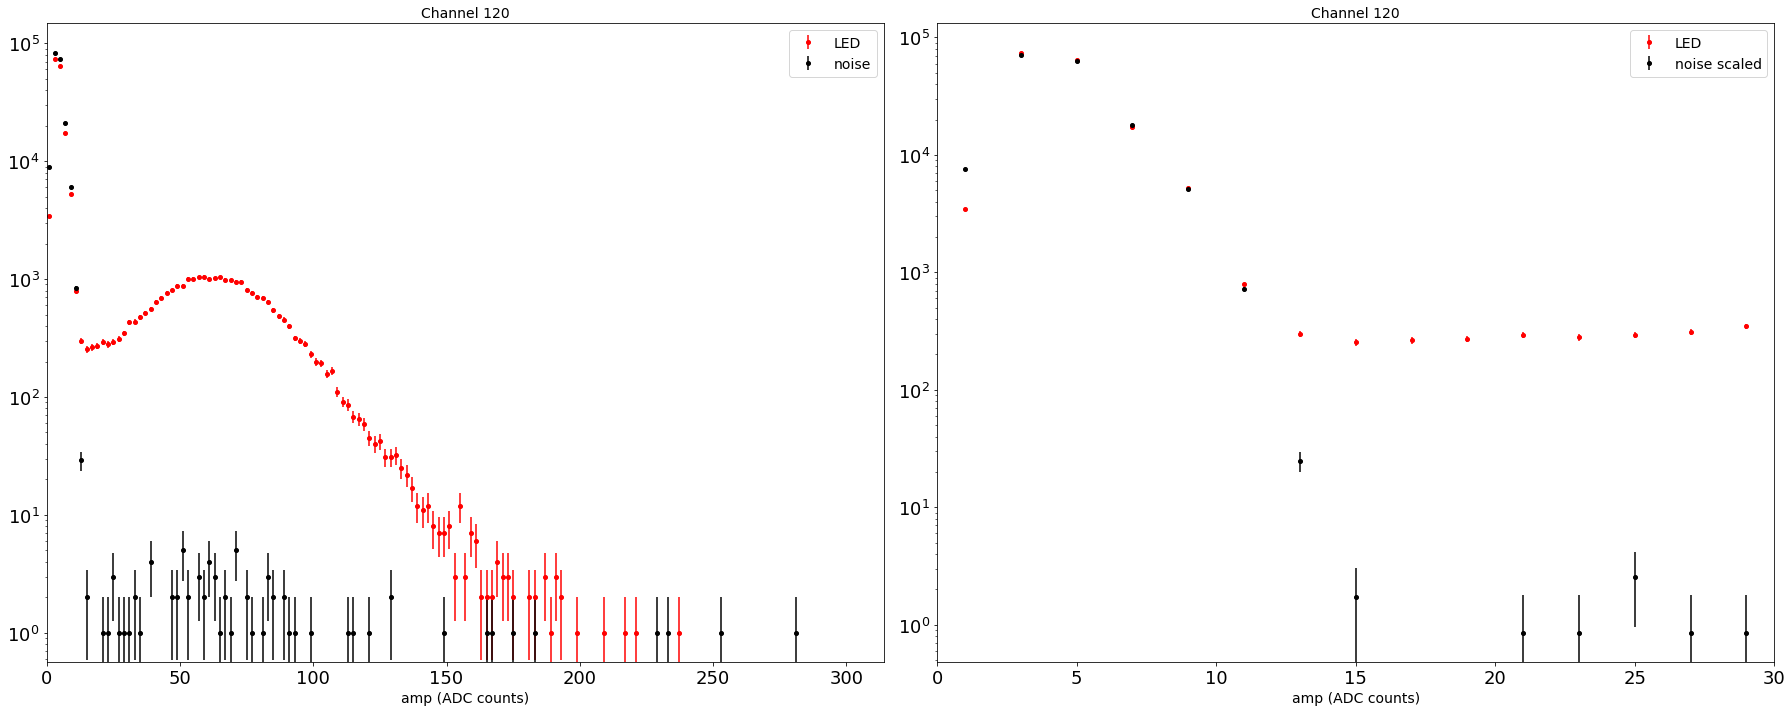

 49%|████▊     | 121/249 [02:00<02:04,  1.03it/s]

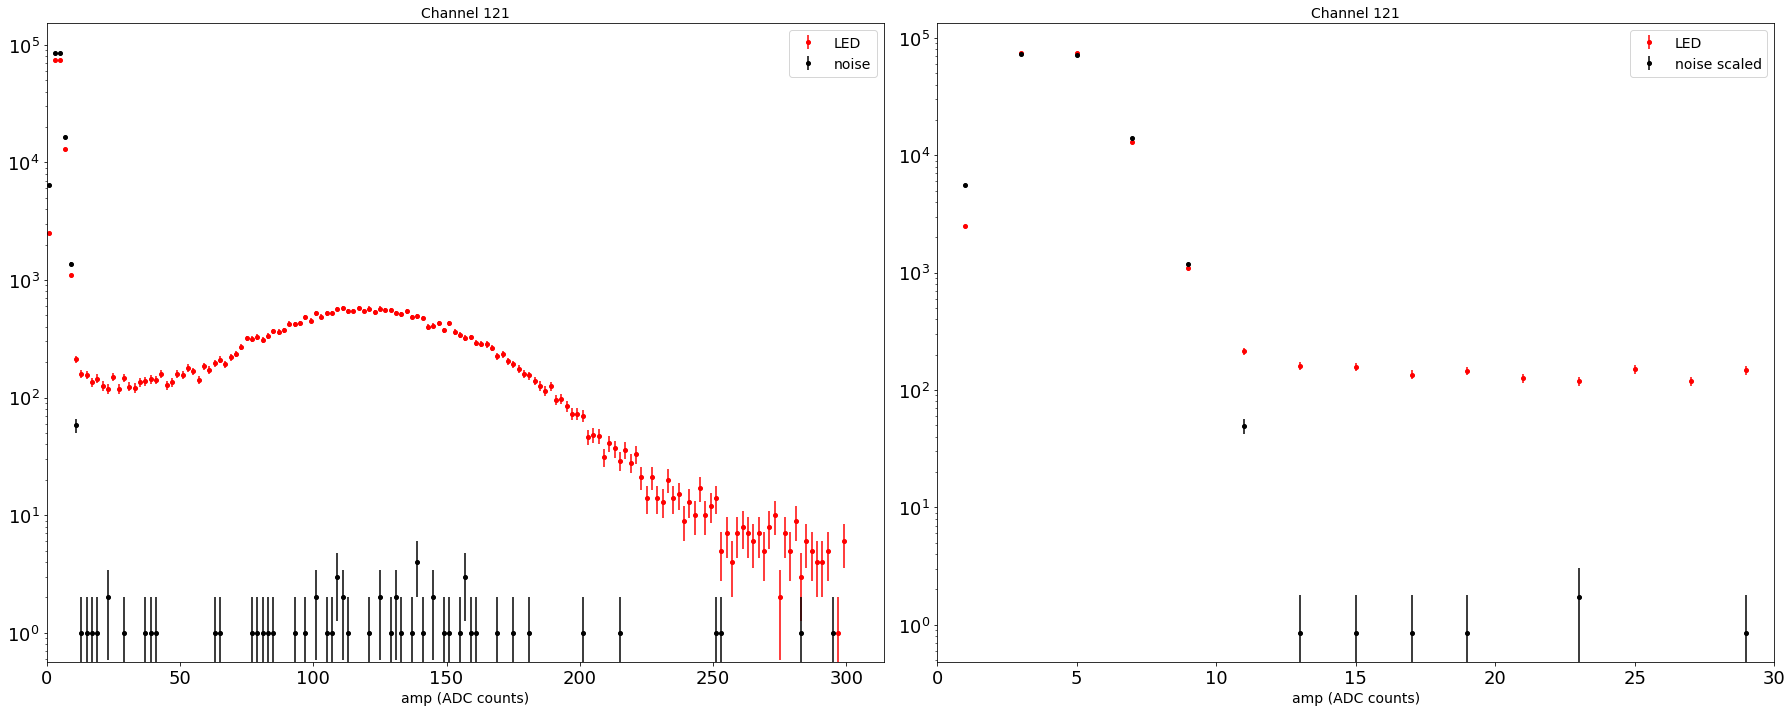

 49%|████▉     | 122/249 [02:01<02:03,  1.03it/s]

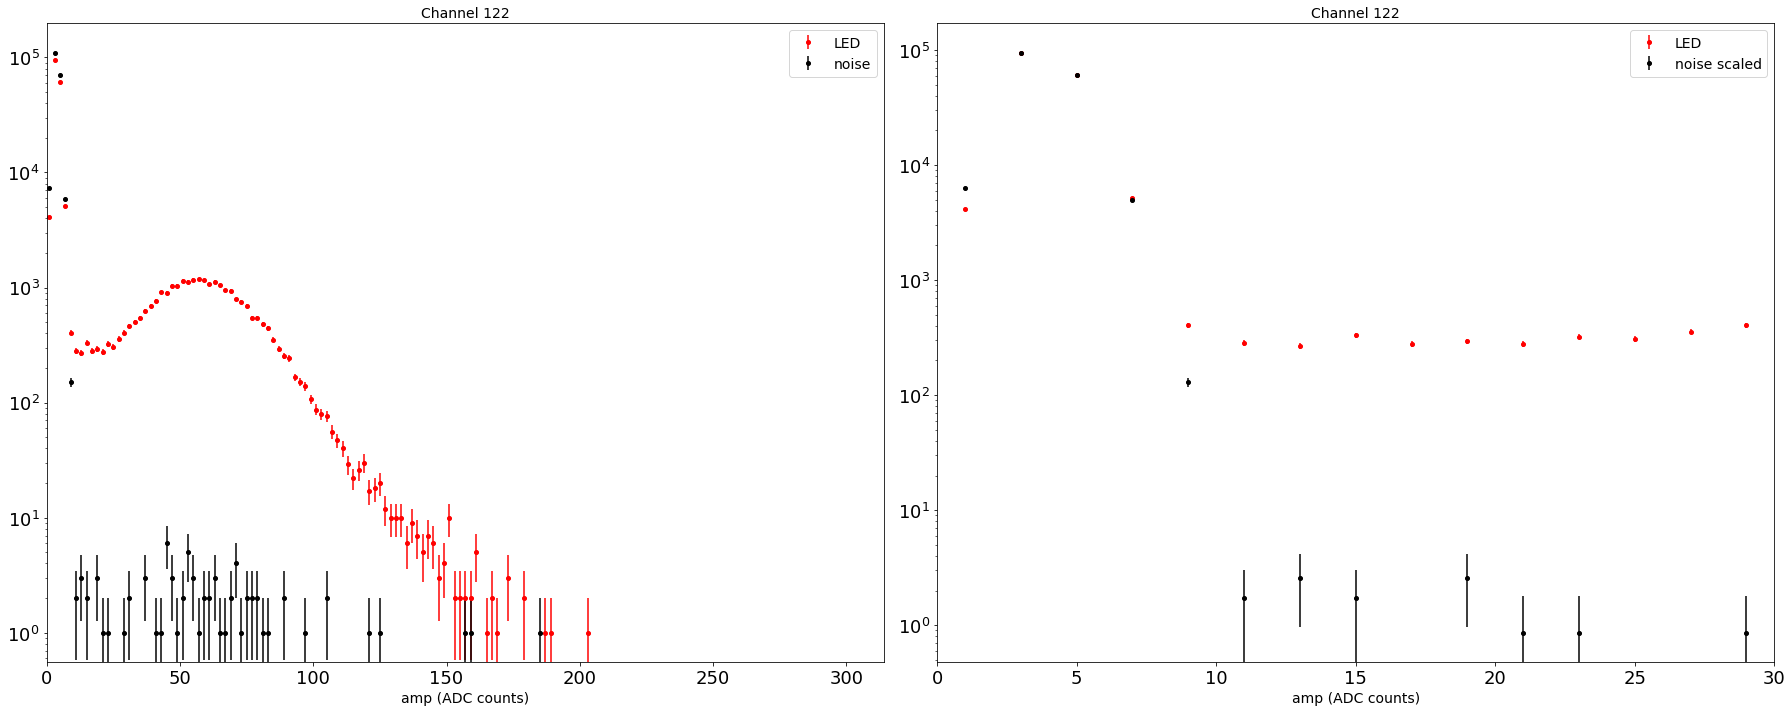

 49%|████▉     | 123/249 [02:02<02:02,  1.03it/s]

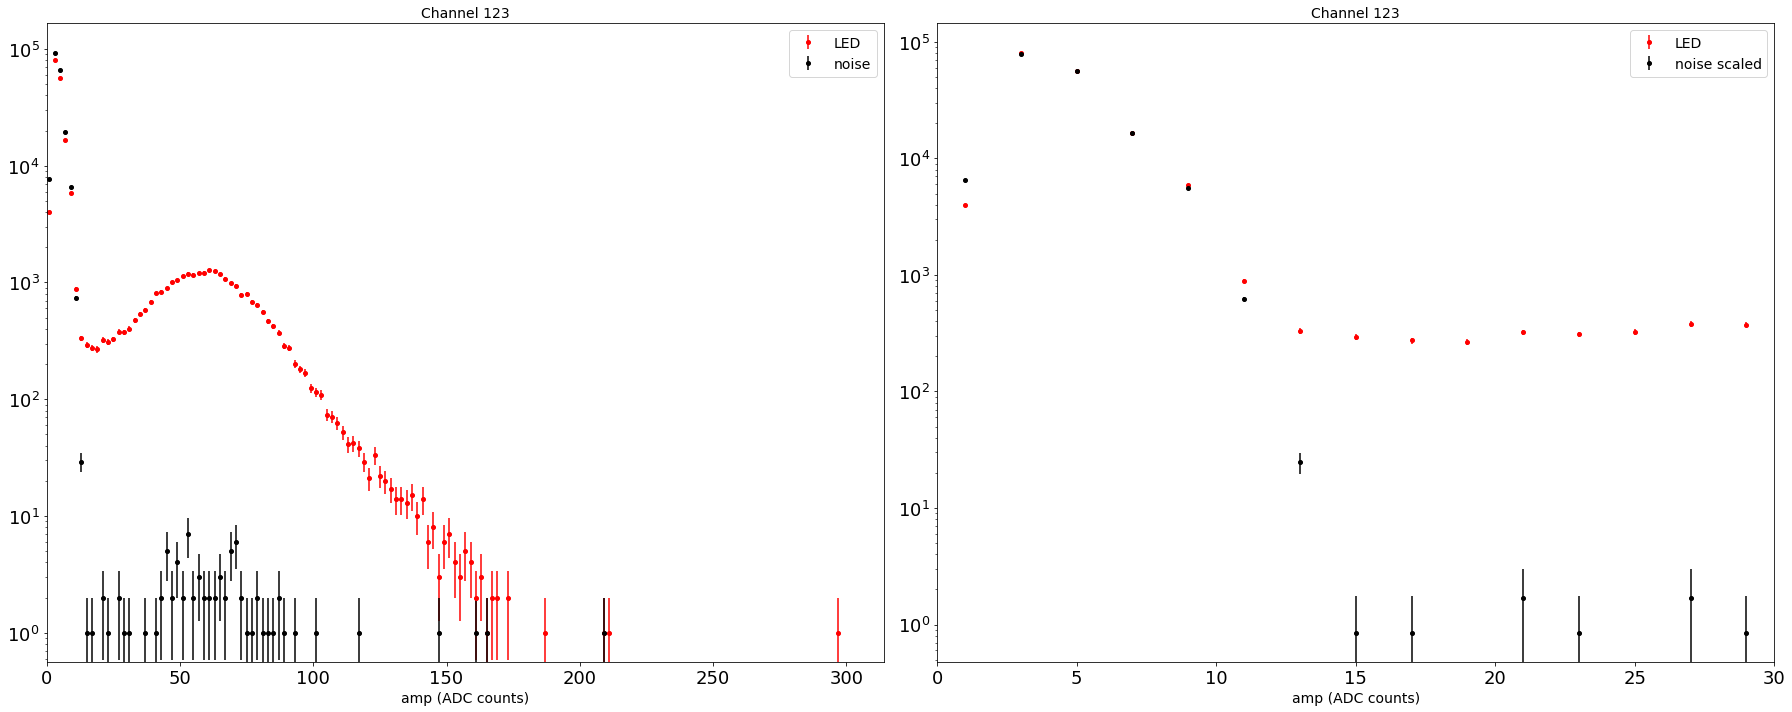

 50%|████▉     | 124/249 [02:03<02:02,  1.02it/s]

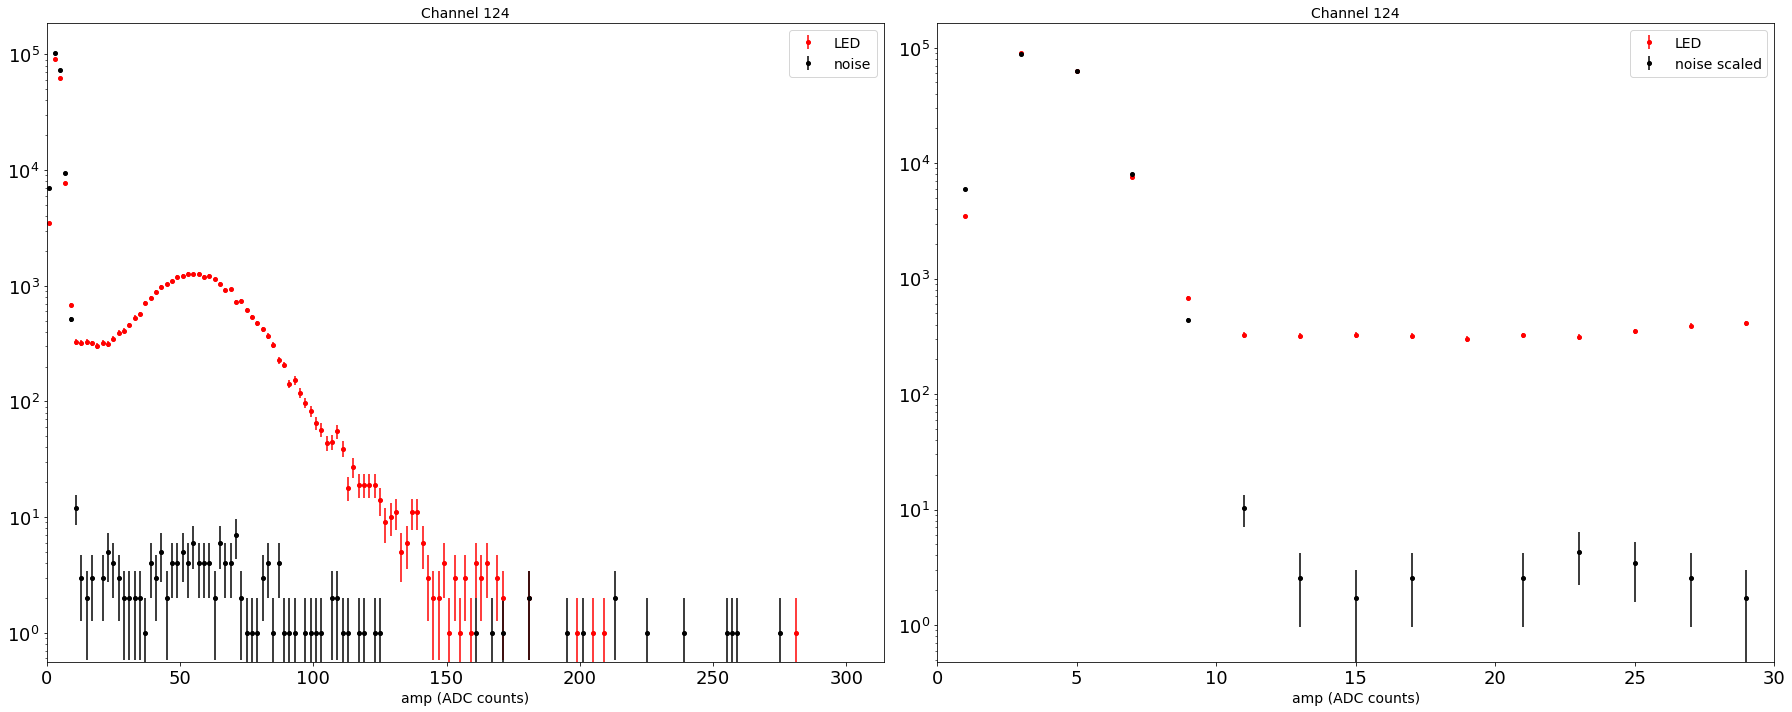

 50%|█████     | 125/249 [02:04<02:03,  1.00it/s]

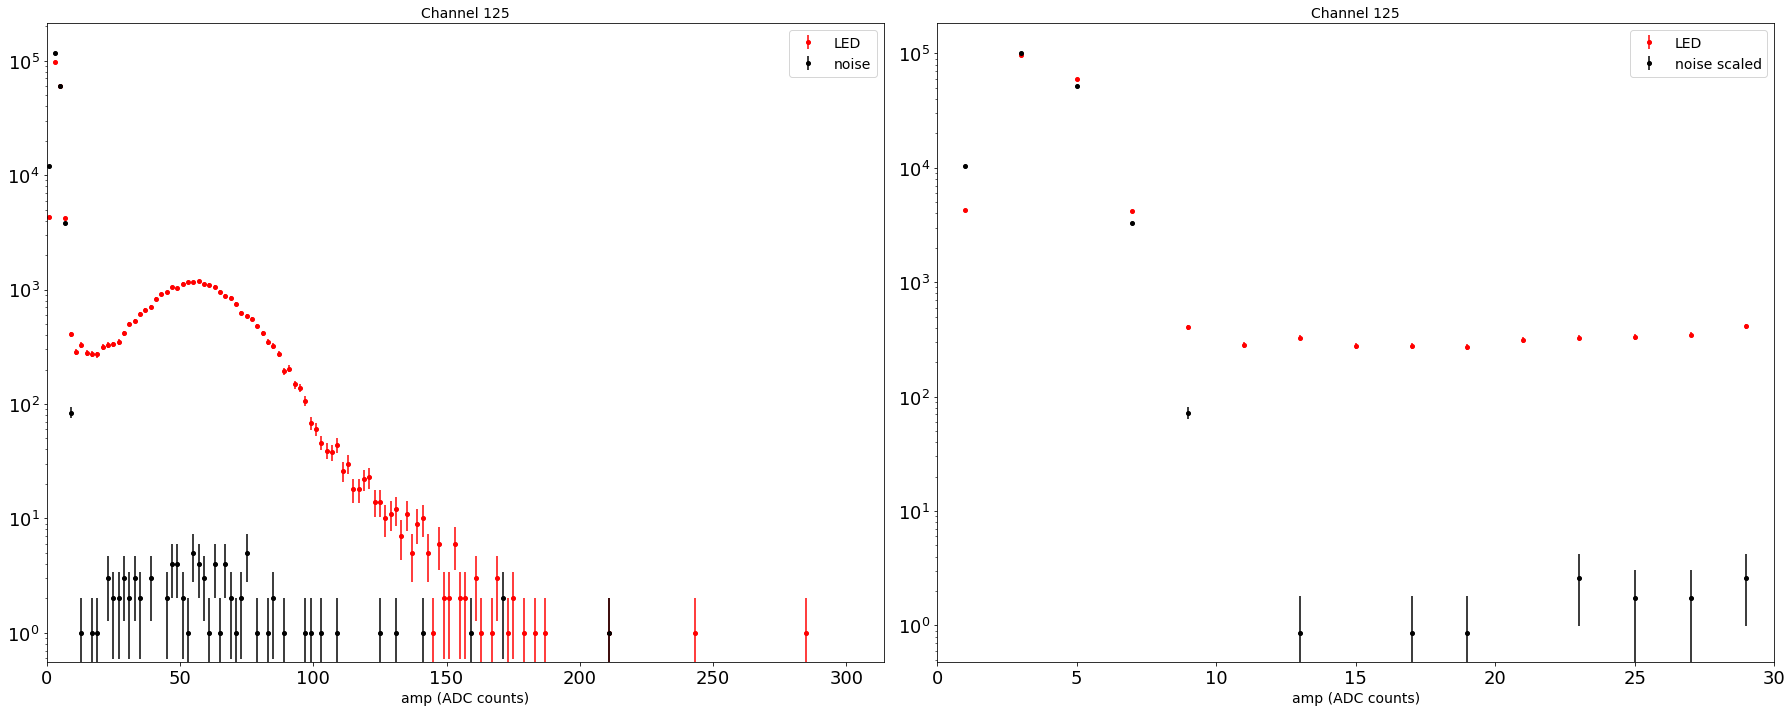

 51%|█████     | 126/249 [02:05<02:02,  1.01it/s]

 51%|█████     | 127/249 [02:06<02:00,  1.01it/s]

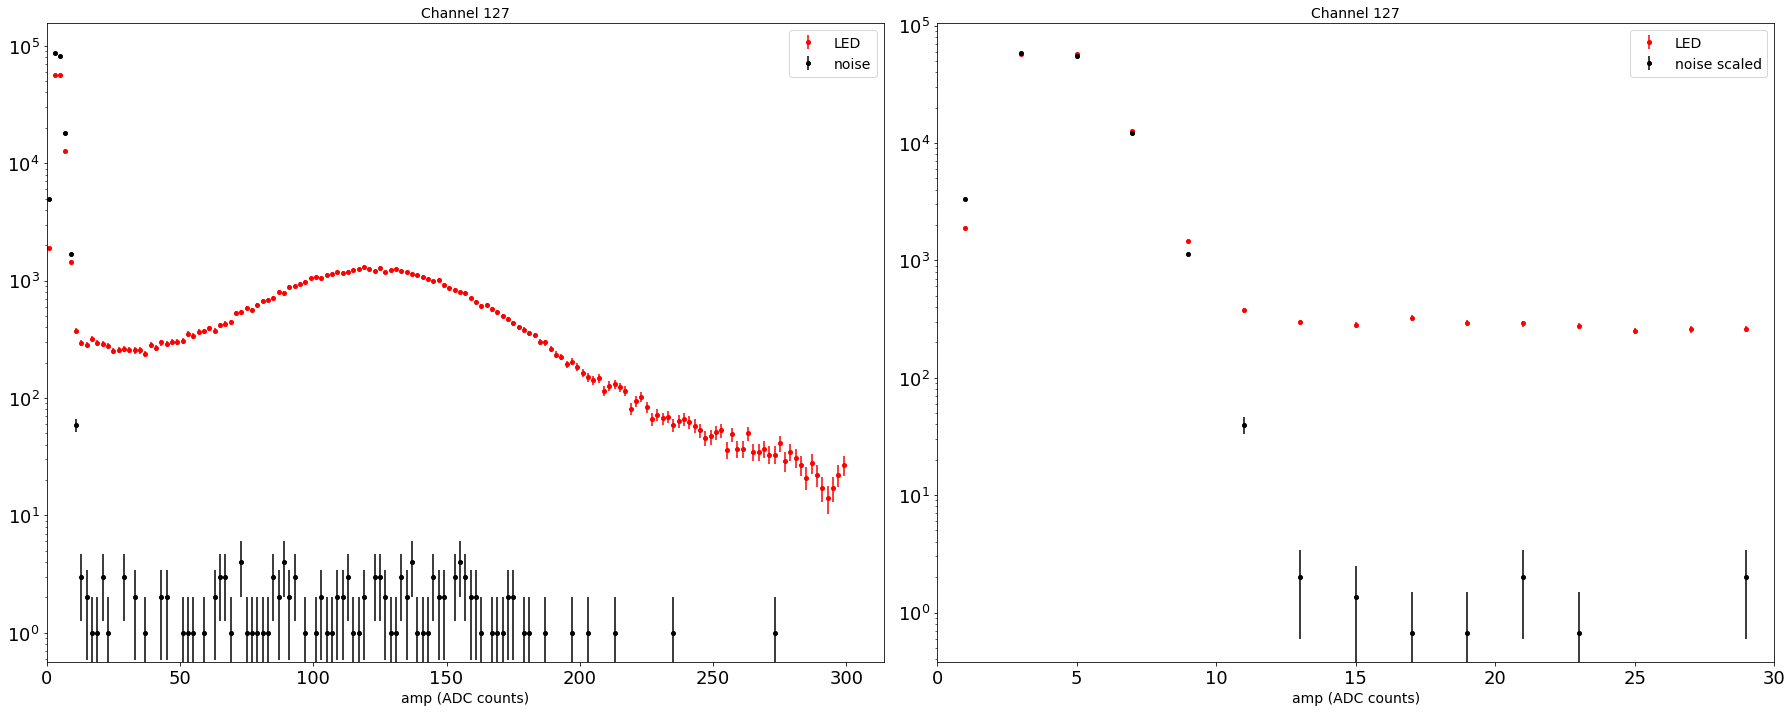

 51%|█████▏    | 128/249 [02:07<01:59,  1.01it/s]

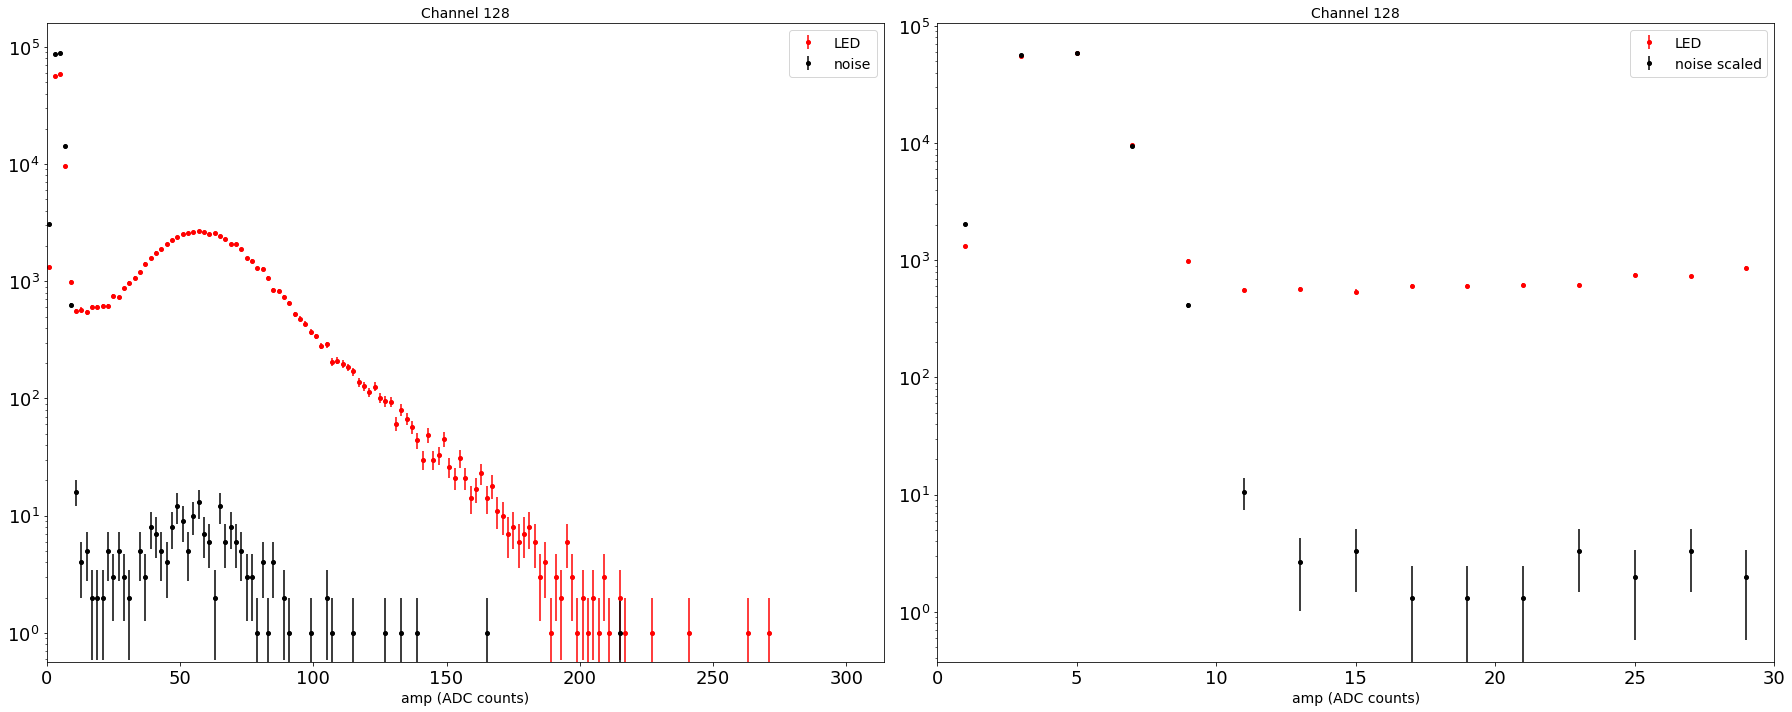

 52%|█████▏    | 129/249 [02:08<01:59,  1.00it/s]

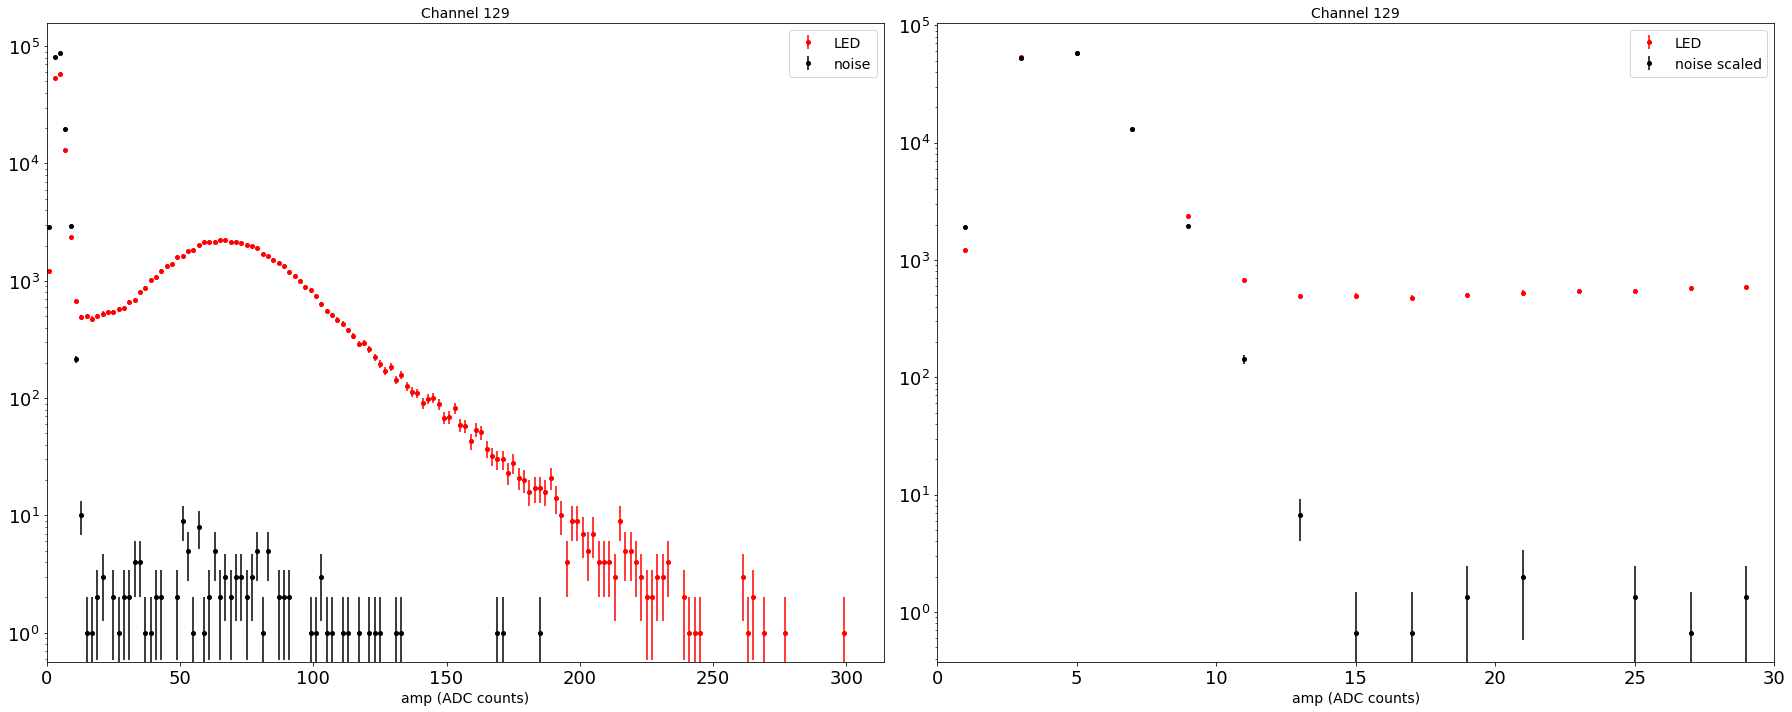

 52%|█████▏    | 130/249 [02:09<01:58,  1.01it/s]

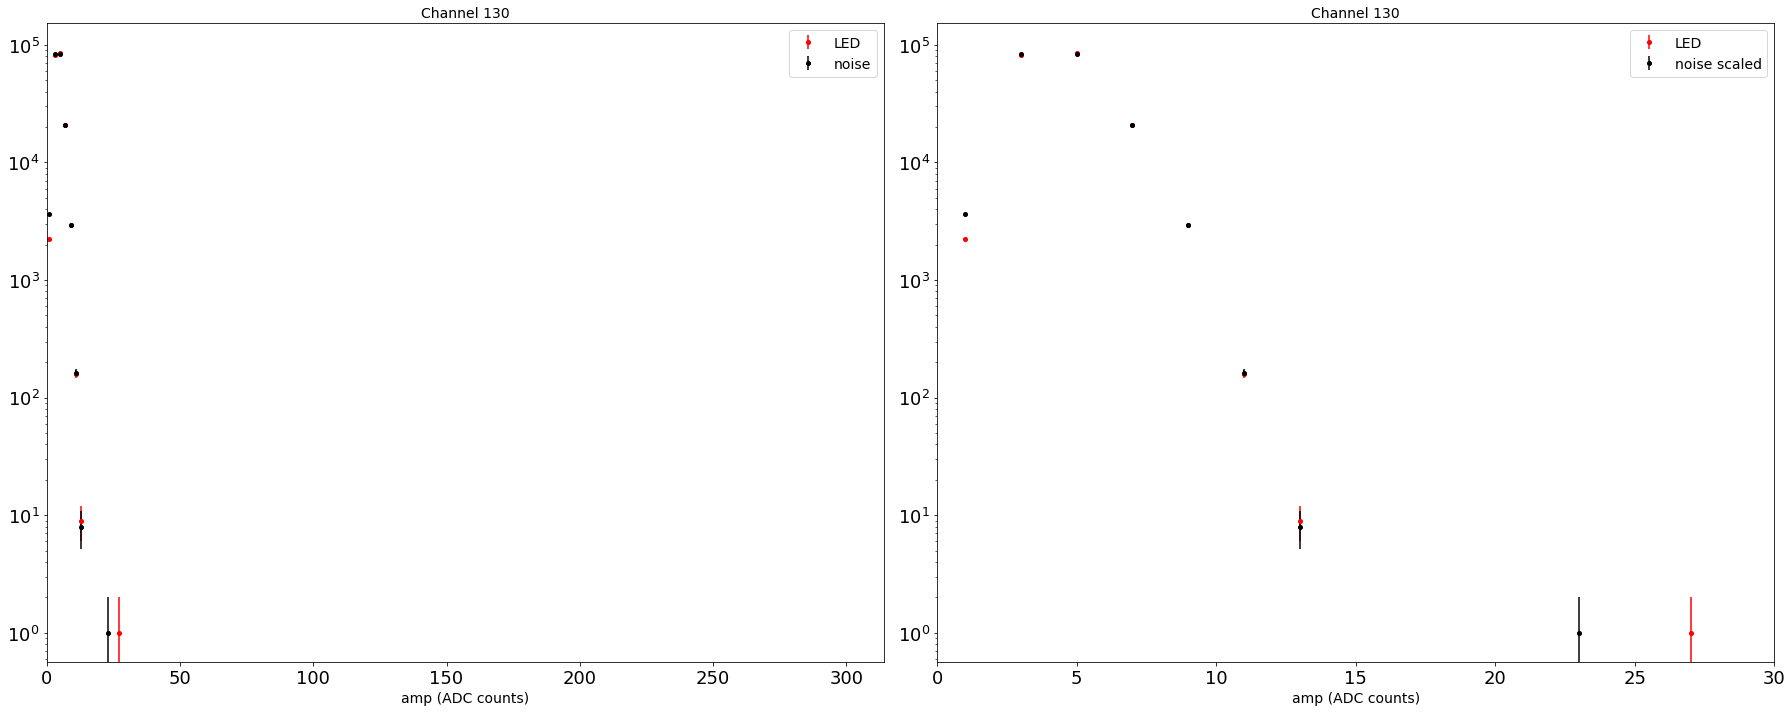

 53%|█████▎    | 131/249 [02:10<01:56,  1.01it/s]

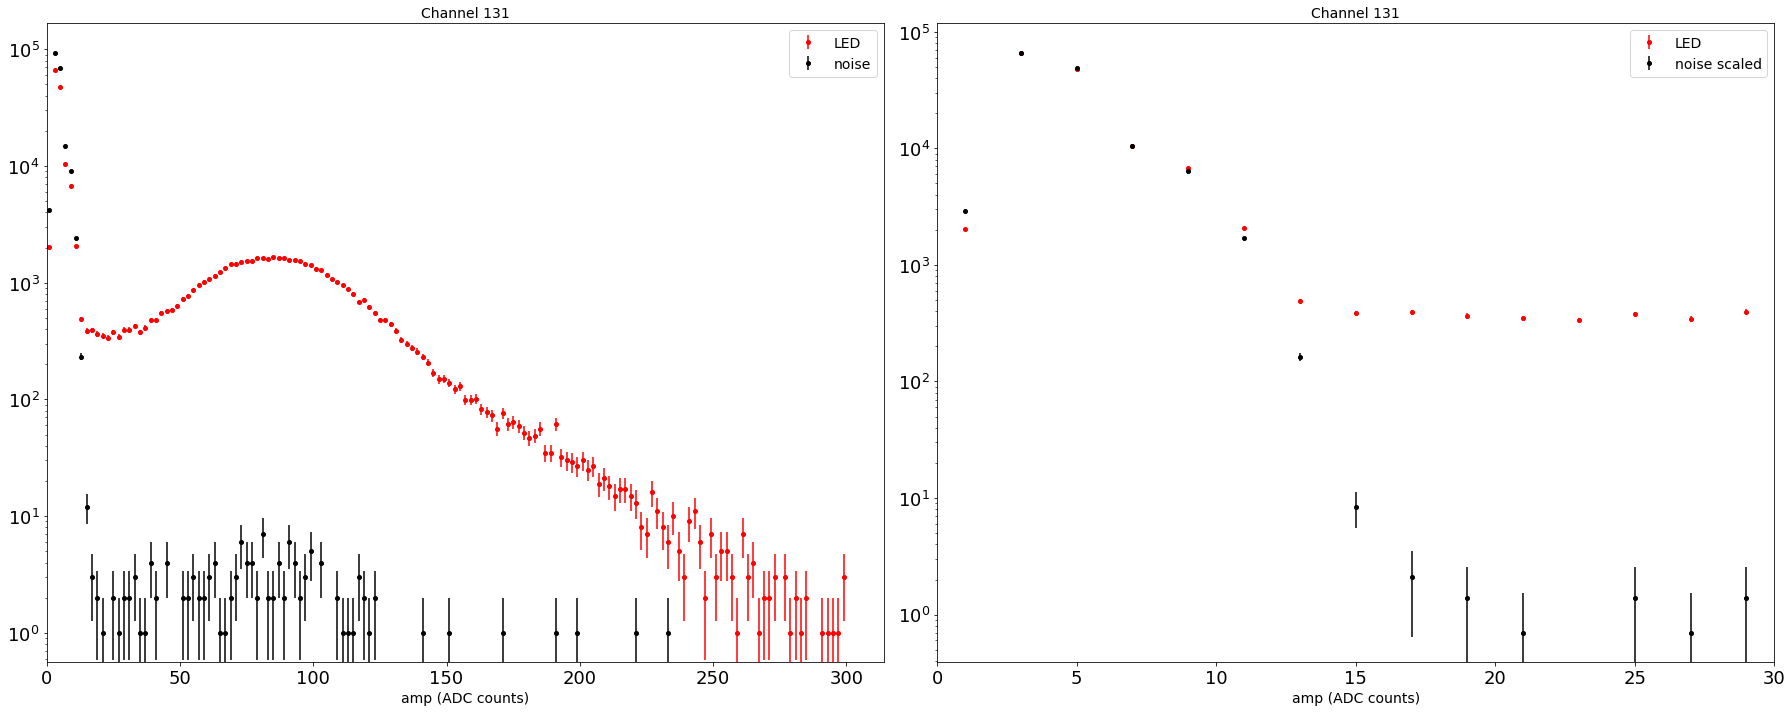

 53%|█████▎    | 132/249 [02:11<01:54,  1.02it/s]

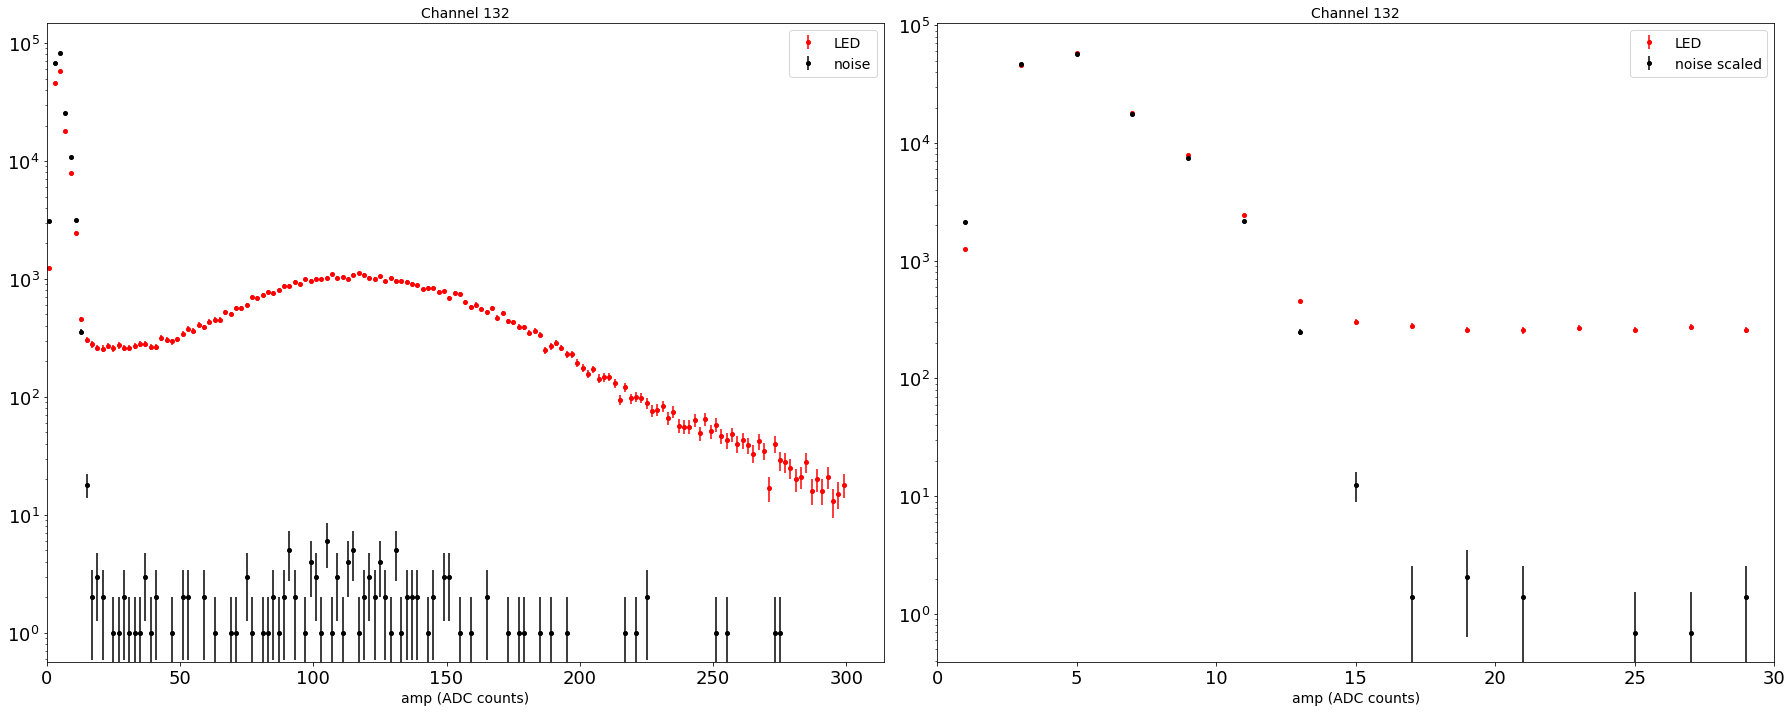

 53%|█████▎    | 133/249 [02:12<01:53,  1.02it/s]

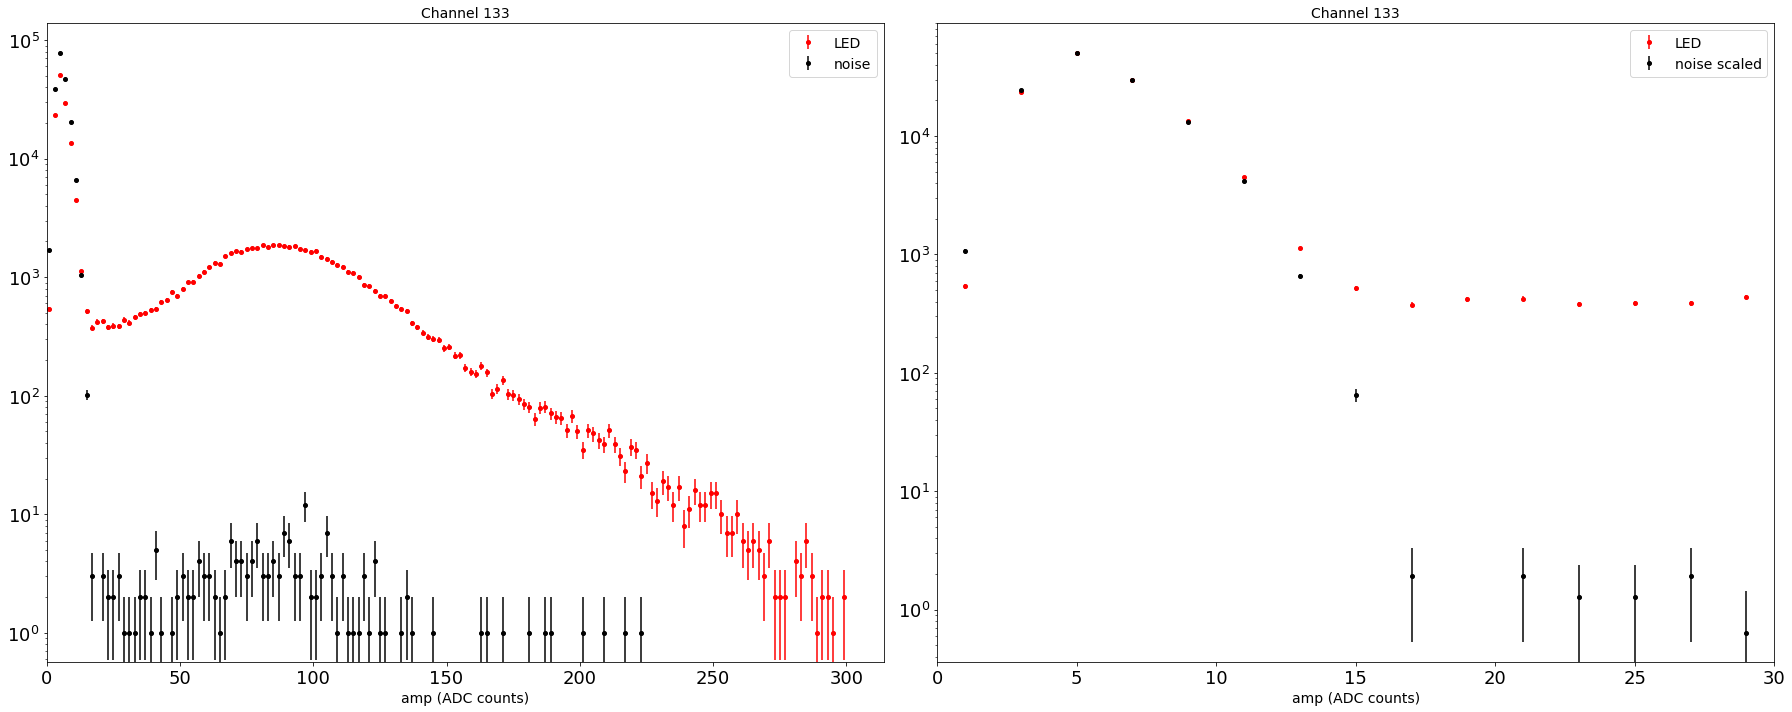

 54%|█████▍    | 134/249 [02:13<01:52,  1.02it/s]

 54%|█████▍    | 135/249 [02:14<01:51,  1.02it/s]

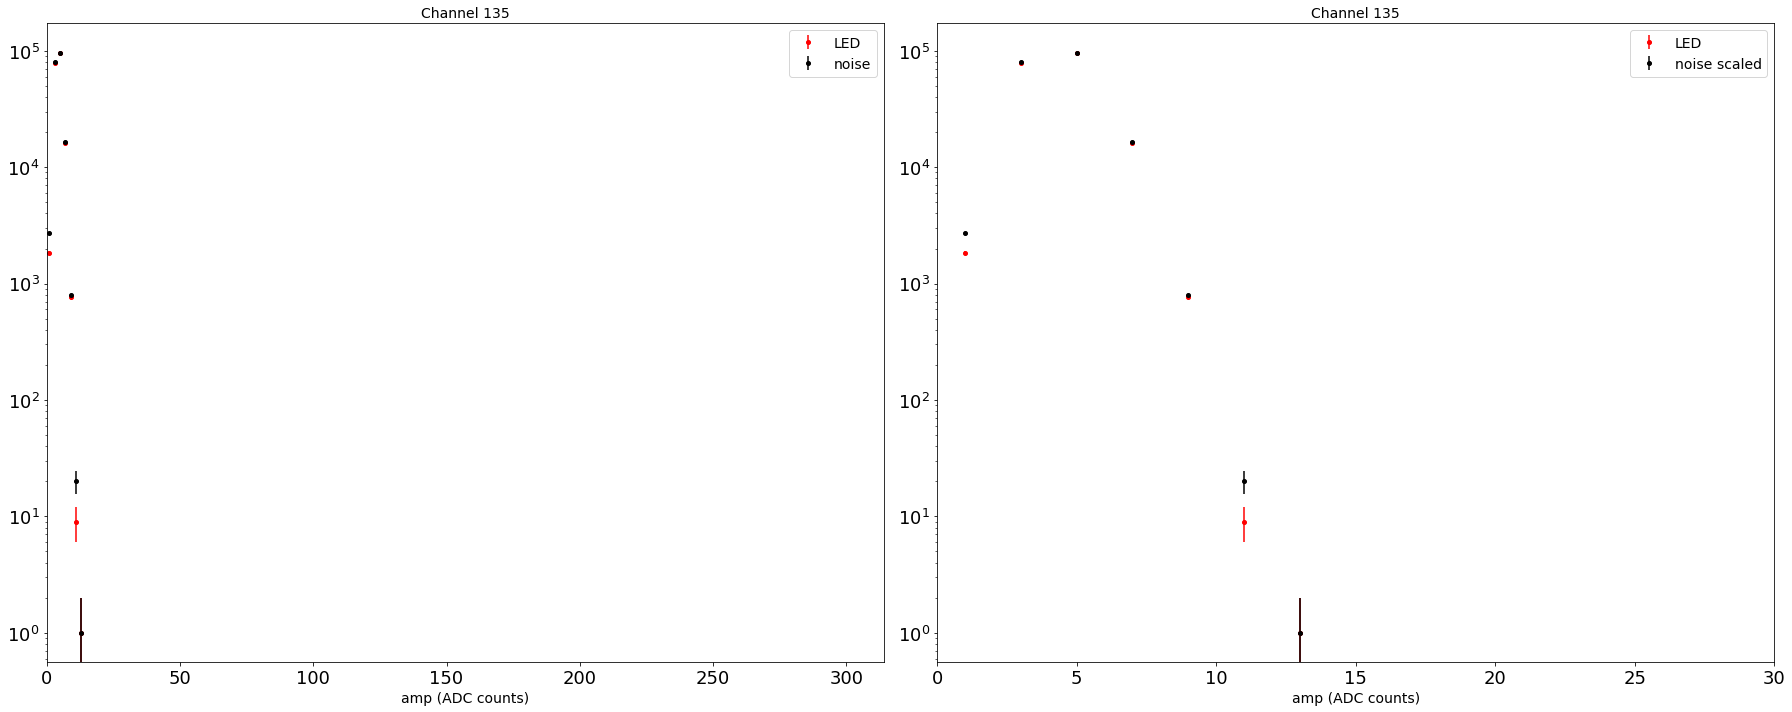

 55%|█████▍    | 136/249 [02:15<01:50,  1.02it/s]

 55%|█████▌    | 137/249 [02:16<01:50,  1.02it/s]

 55%|█████▌    | 138/249 [02:17<01:49,  1.02it/s]

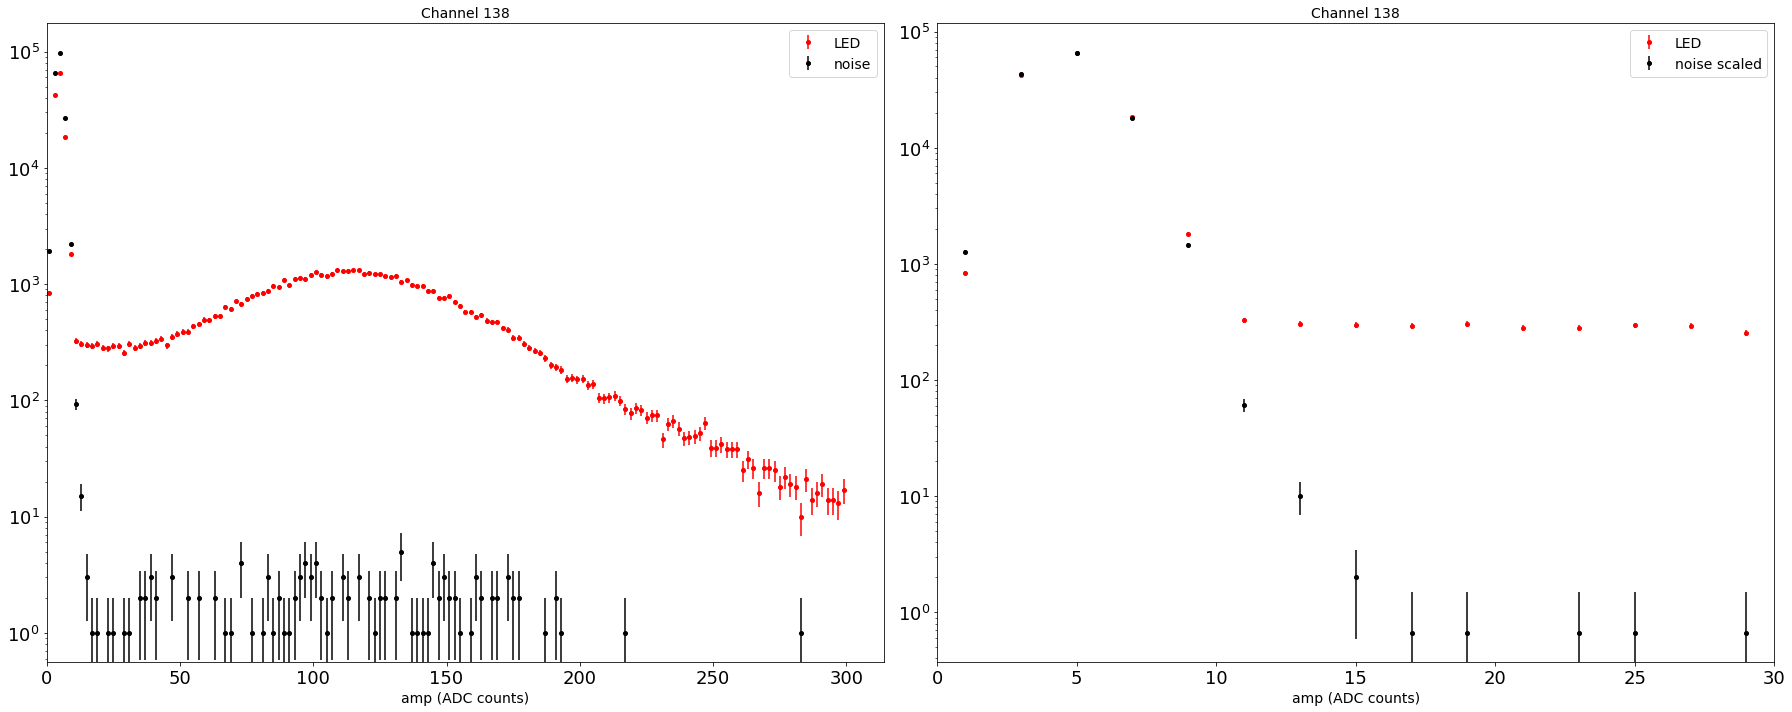

 56%|█████▌    | 139/249 [02:18<01:49,  1.01it/s]

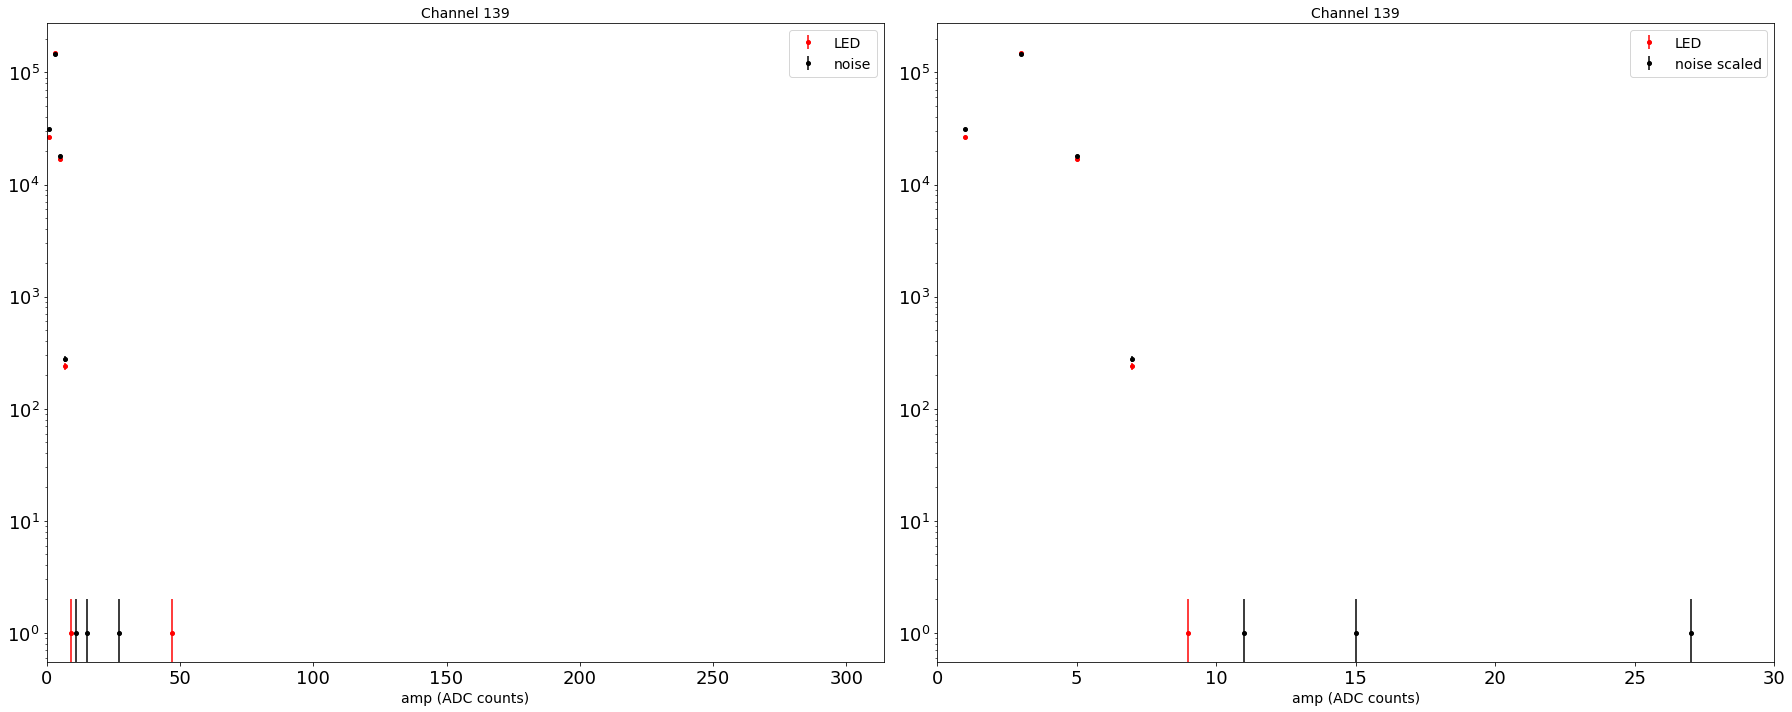

 56%|█████▌    | 140/249 [02:19<01:47,  1.01it/s]

 57%|█████▋    | 141/249 [02:20<01:47,  1.01it/s]

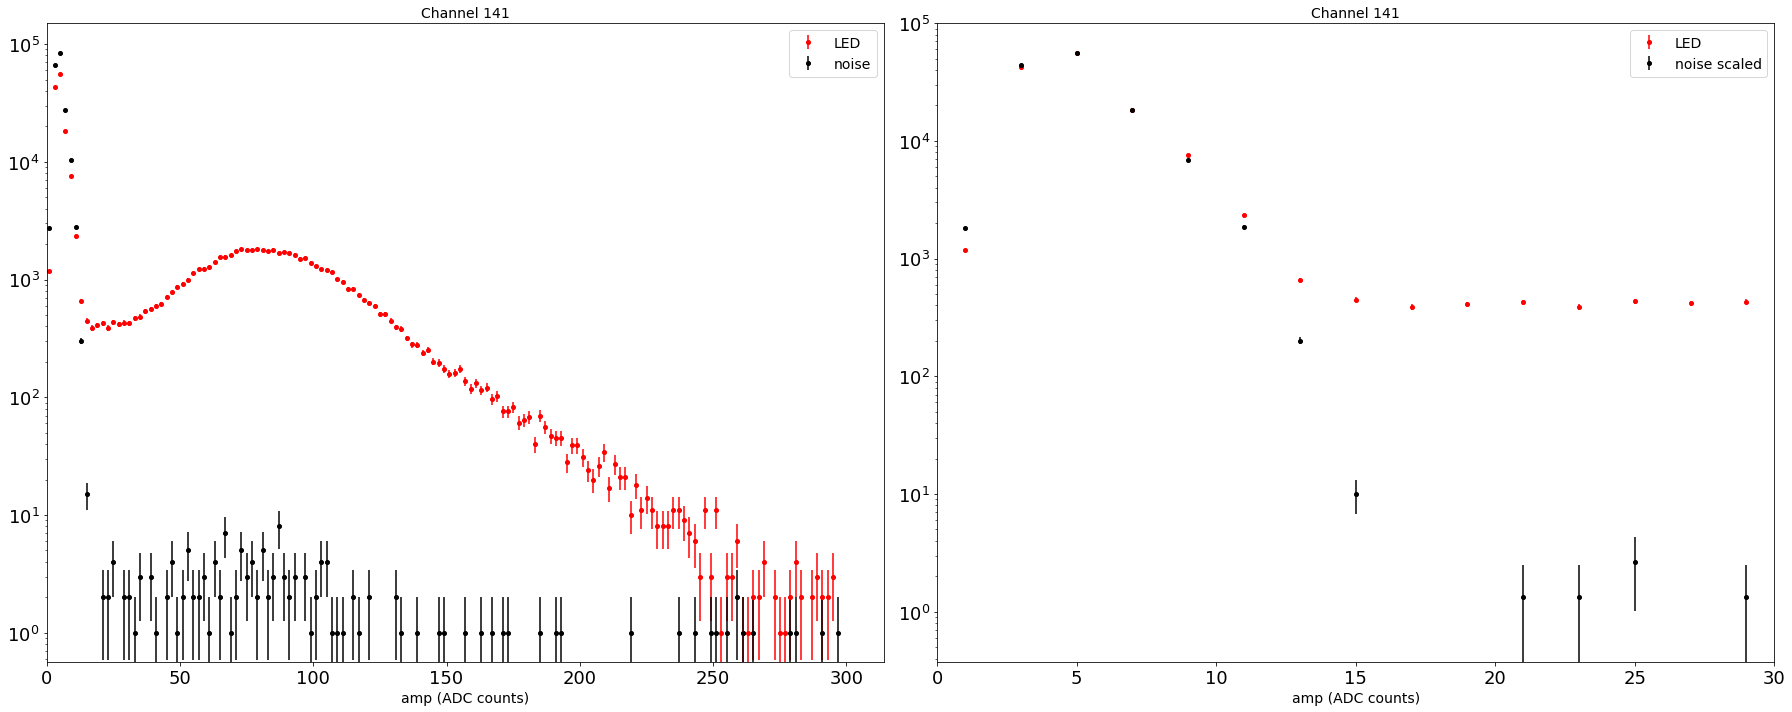

 57%|█████▋    | 142/249 [02:21<01:45,  1.01it/s]

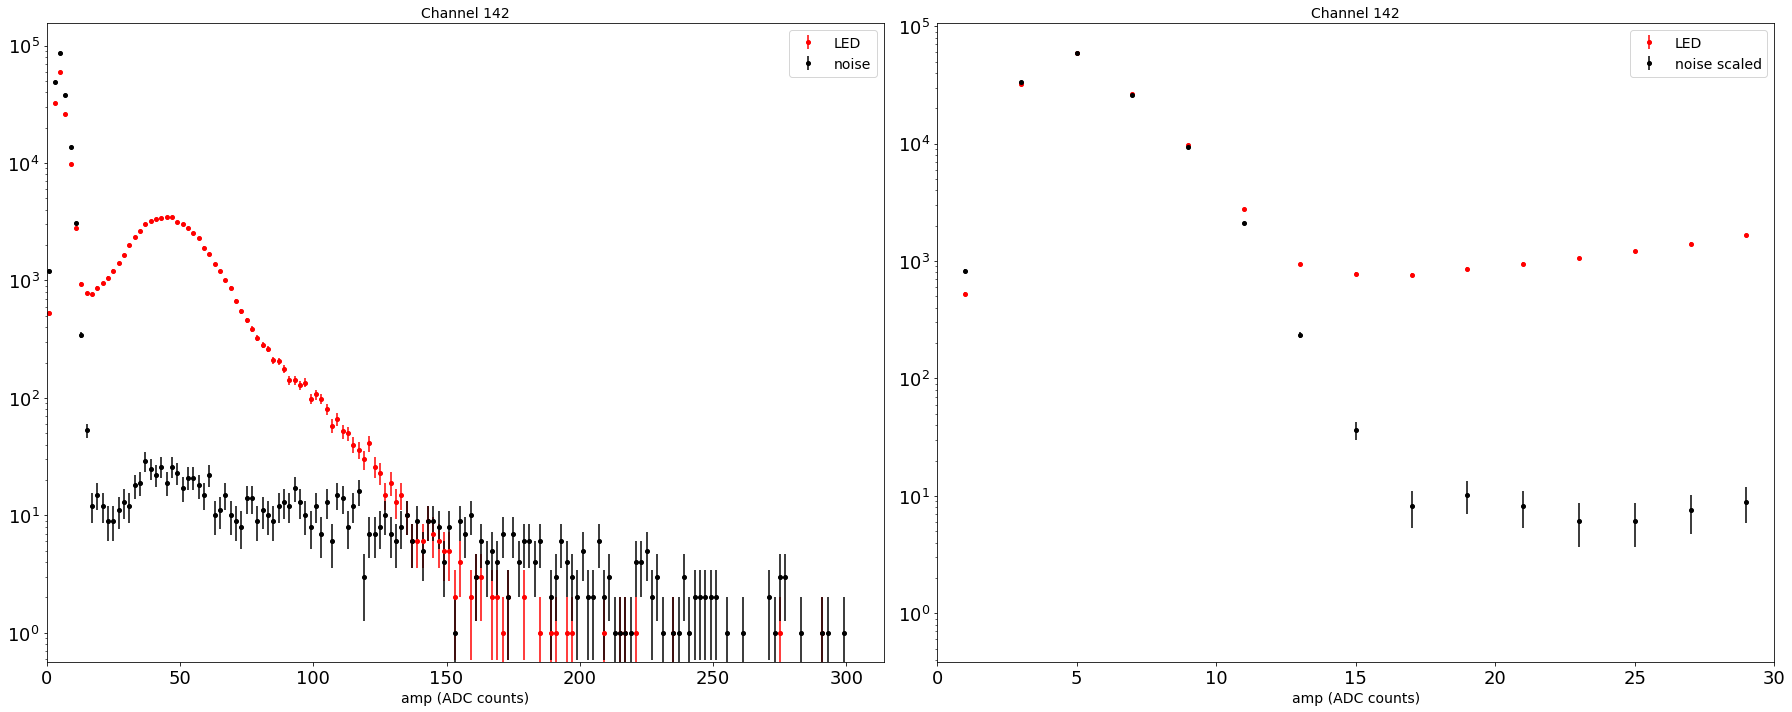

 57%|█████▋    | 143/249 [02:22<01:44,  1.02it/s]

 58%|█████▊    | 144/249 [02:23<01:43,  1.02it/s]

 58%|█████▊    | 145/249 [02:24<01:41,  1.02it/s]

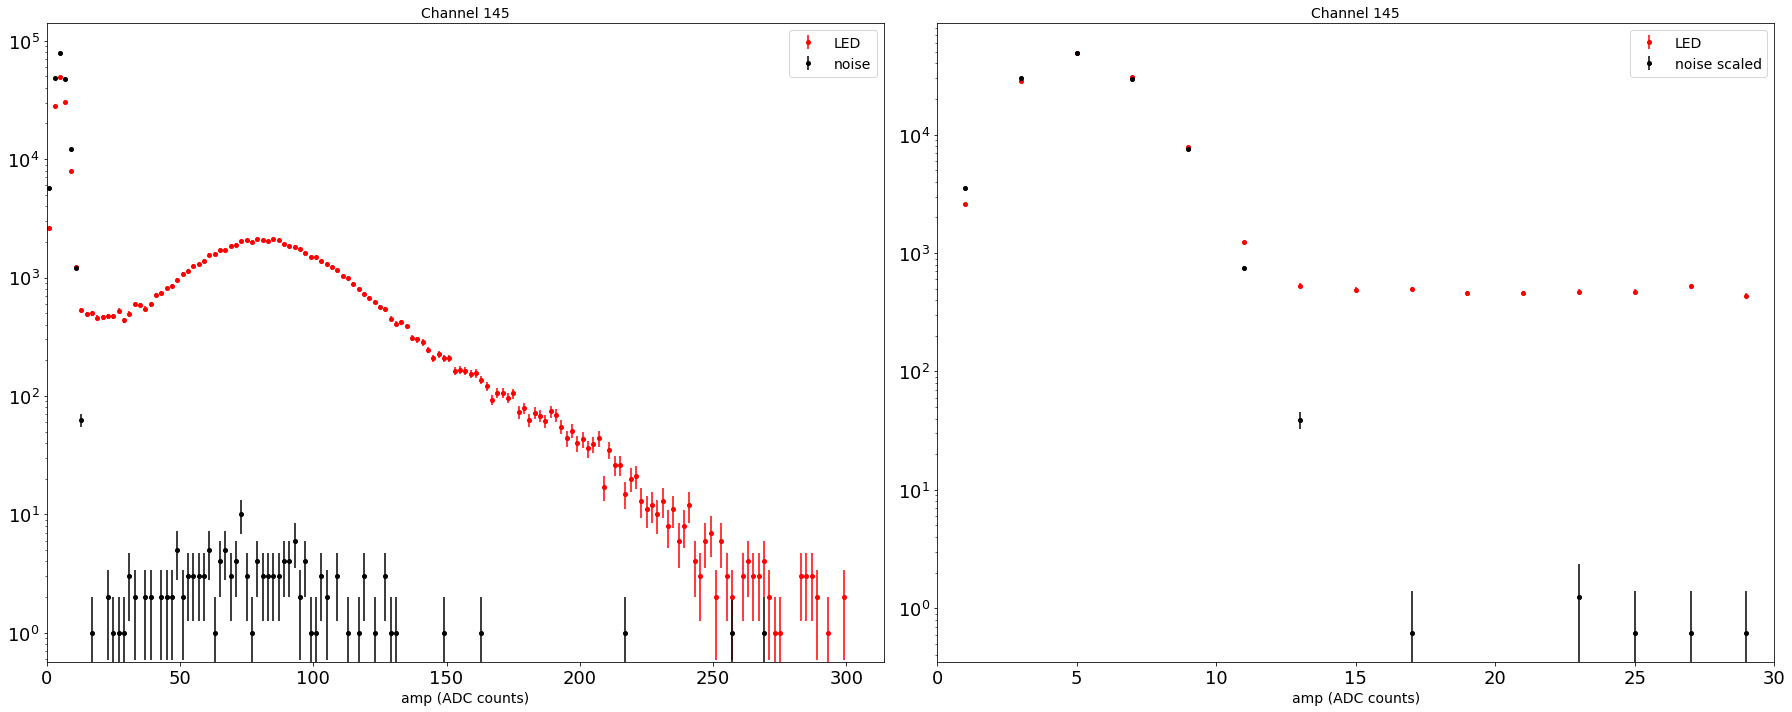

 59%|█████▊    | 146/249 [02:24<01:40,  1.03it/s]

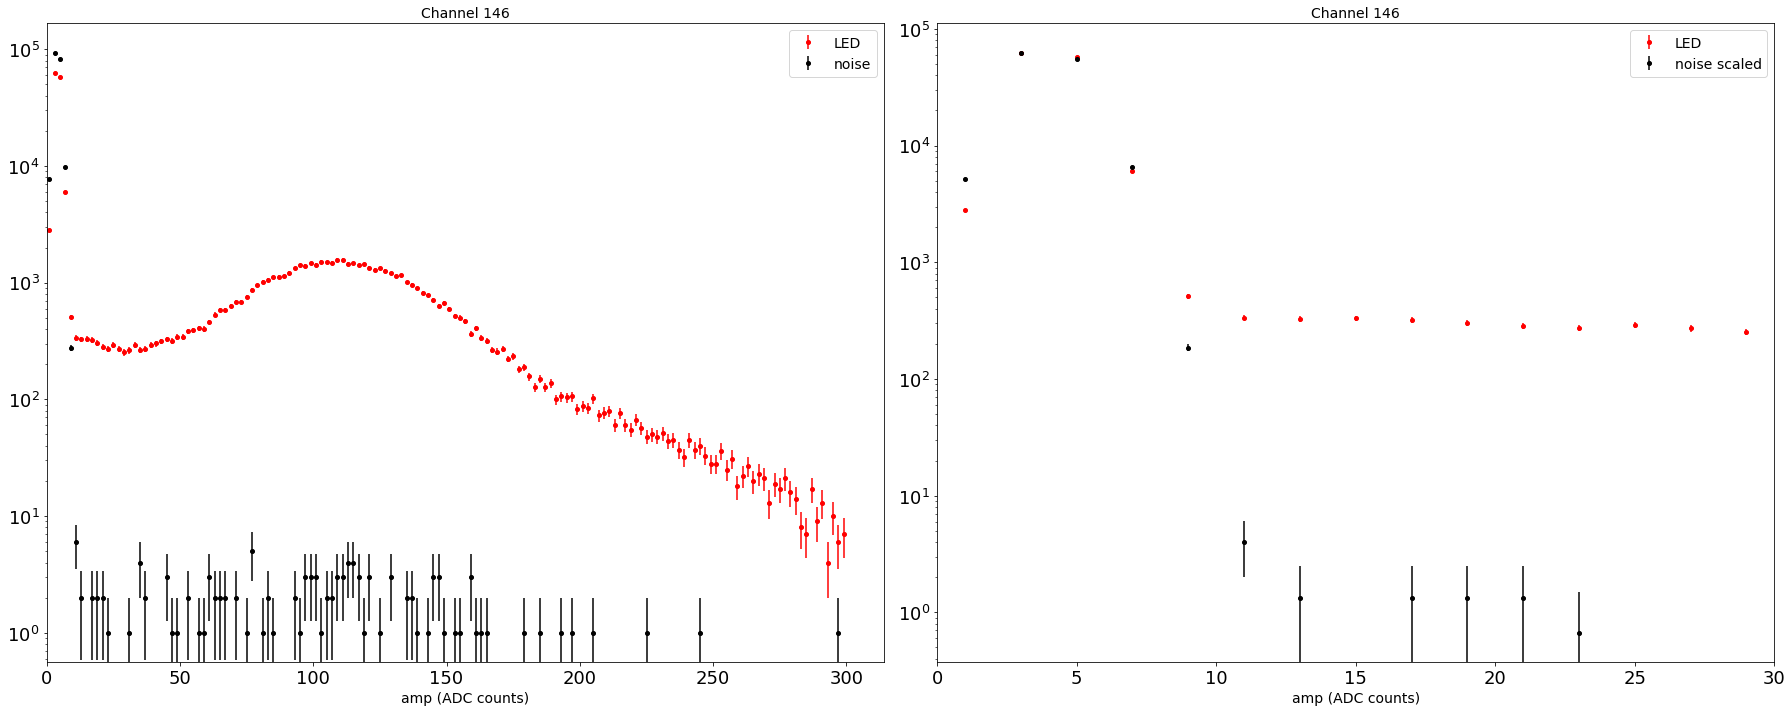

 59%|█████▉    | 147/249 [02:25<01:39,  1.02it/s]

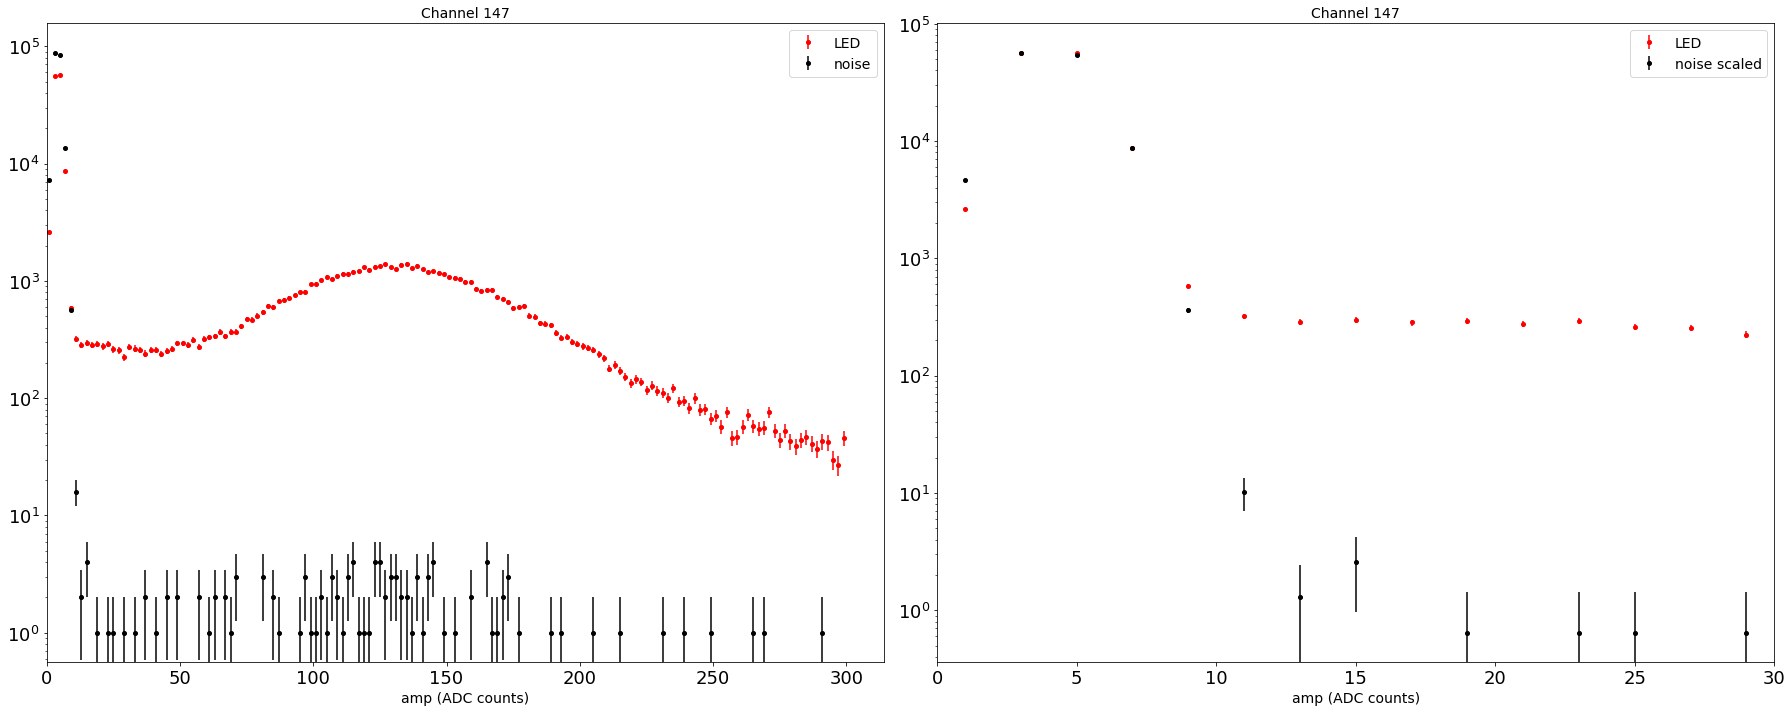

 59%|█████▉    | 148/249 [02:26<01:38,  1.02it/s]

 60%|█████▉    | 149/249 [02:27<01:36,  1.03it/s]

 60%|██████    | 150/249 [02:28<01:35,  1.03it/s]

 61%|██████    | 151/249 [02:29<01:35,  1.03it/s]

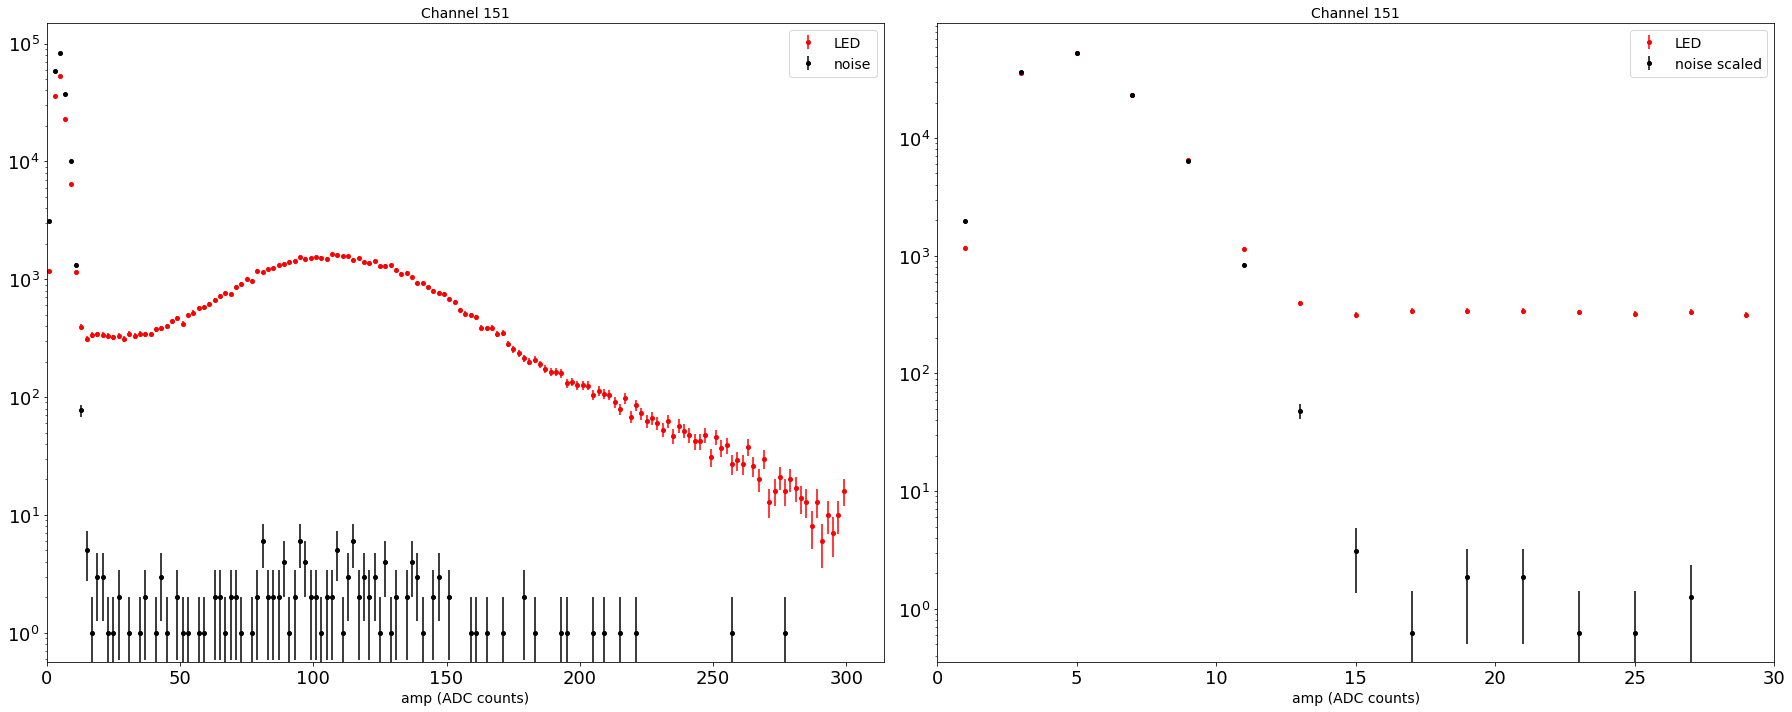

 61%|██████    | 152/249 [02:30<01:35,  1.02it/s]

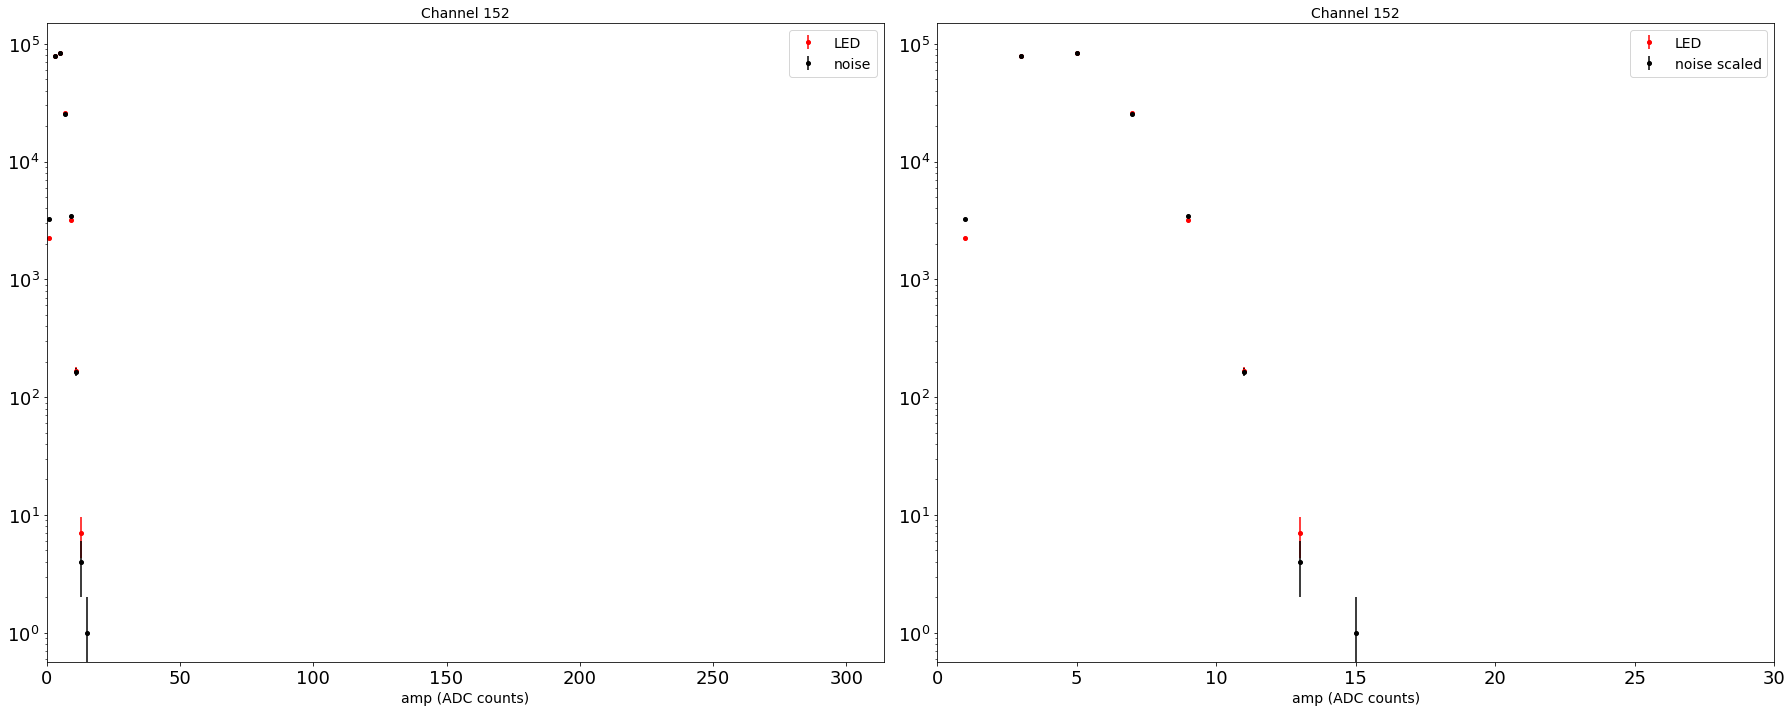

 61%|██████▏   | 153/249 [02:31<01:34,  1.02it/s]

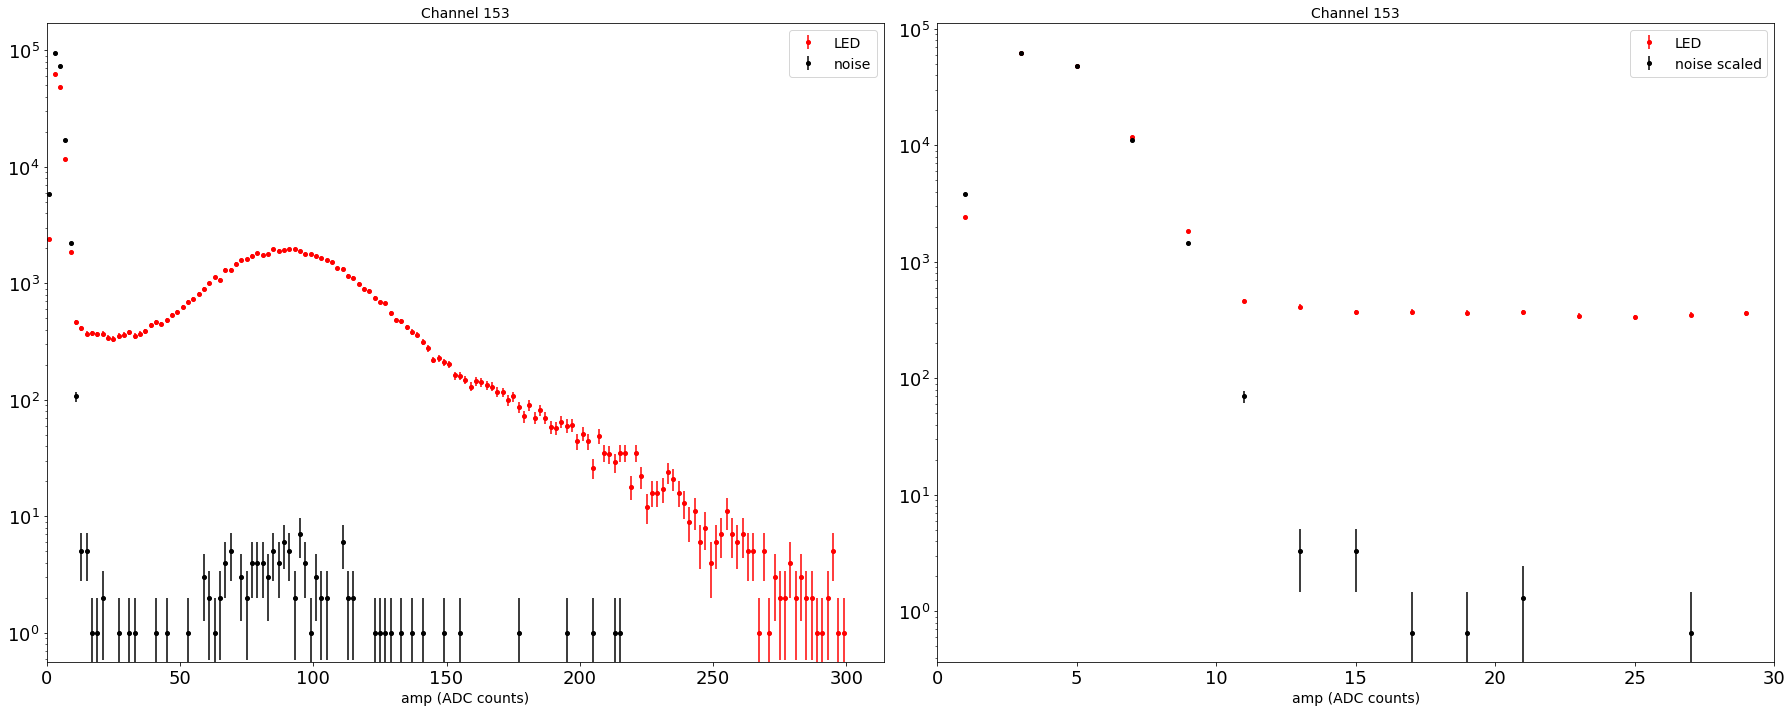

 62%|██████▏   | 154/249 [02:32<01:33,  1.02it/s]

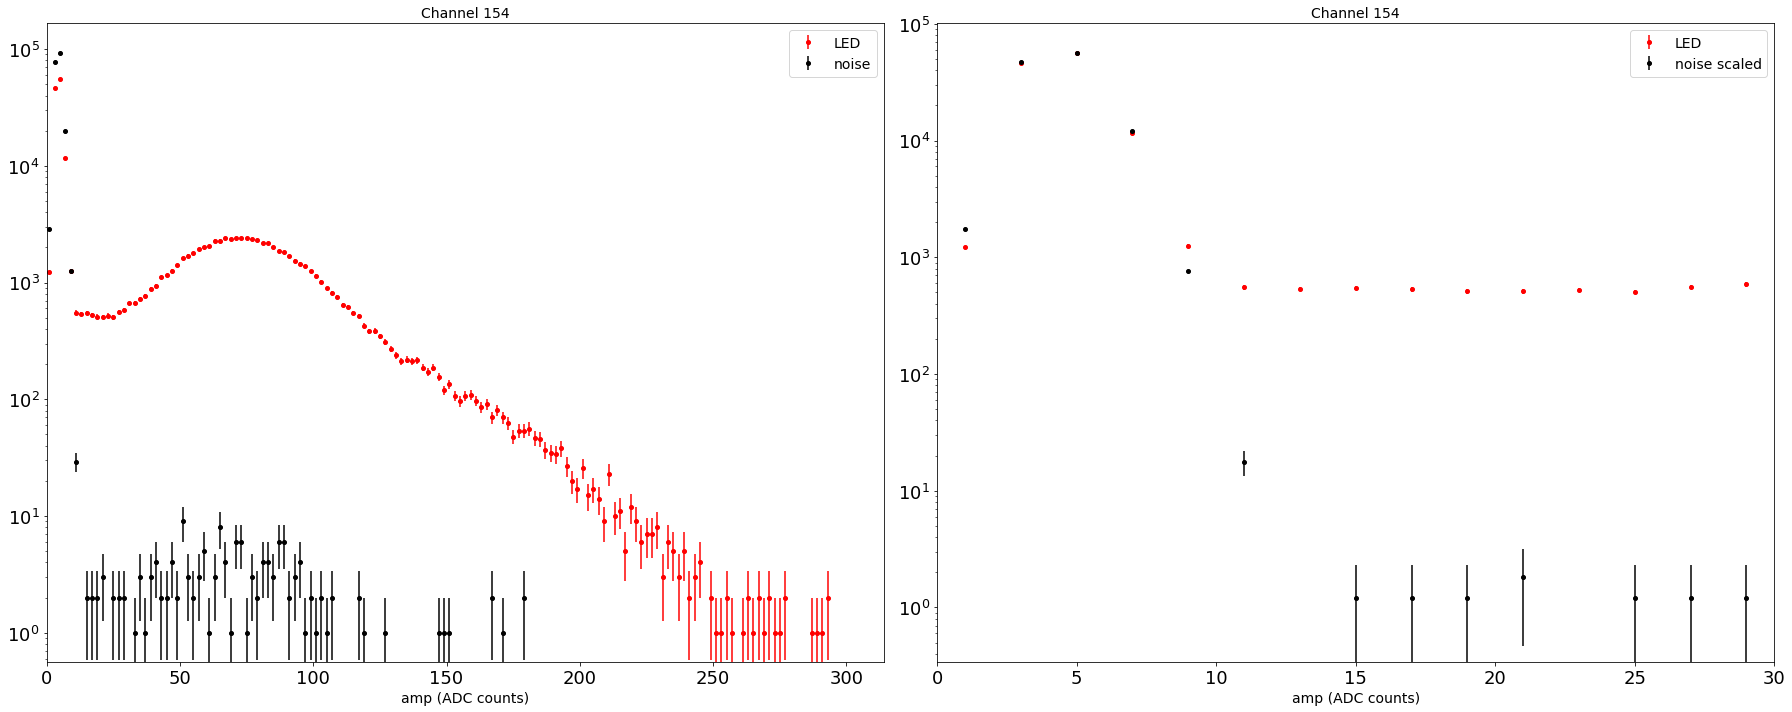

 62%|██████▏   | 155/249 [02:33<01:32,  1.02it/s]

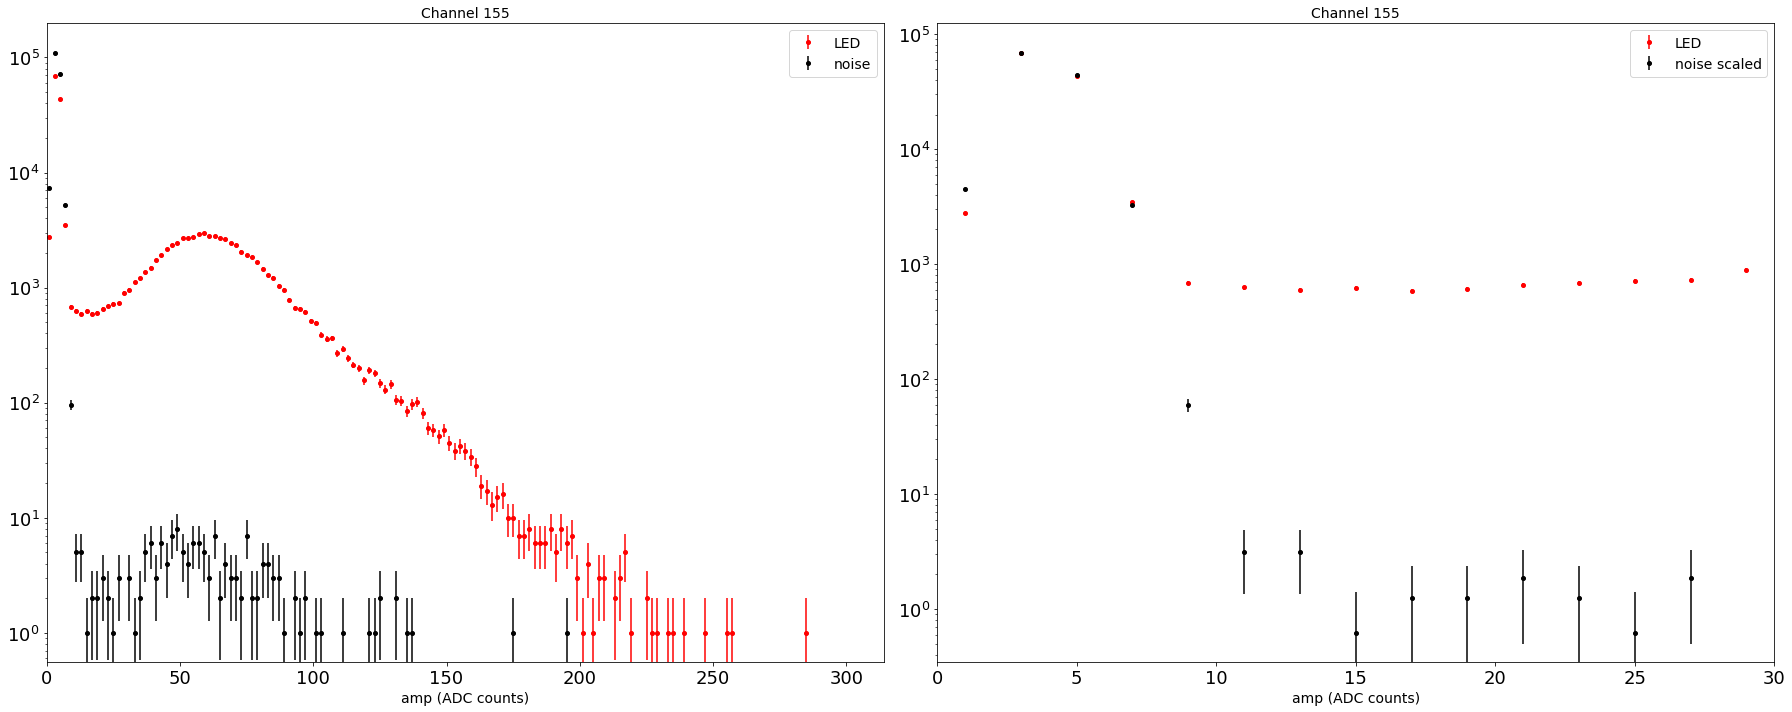

 63%|██████▎   | 156/249 [02:34<01:31,  1.01it/s]

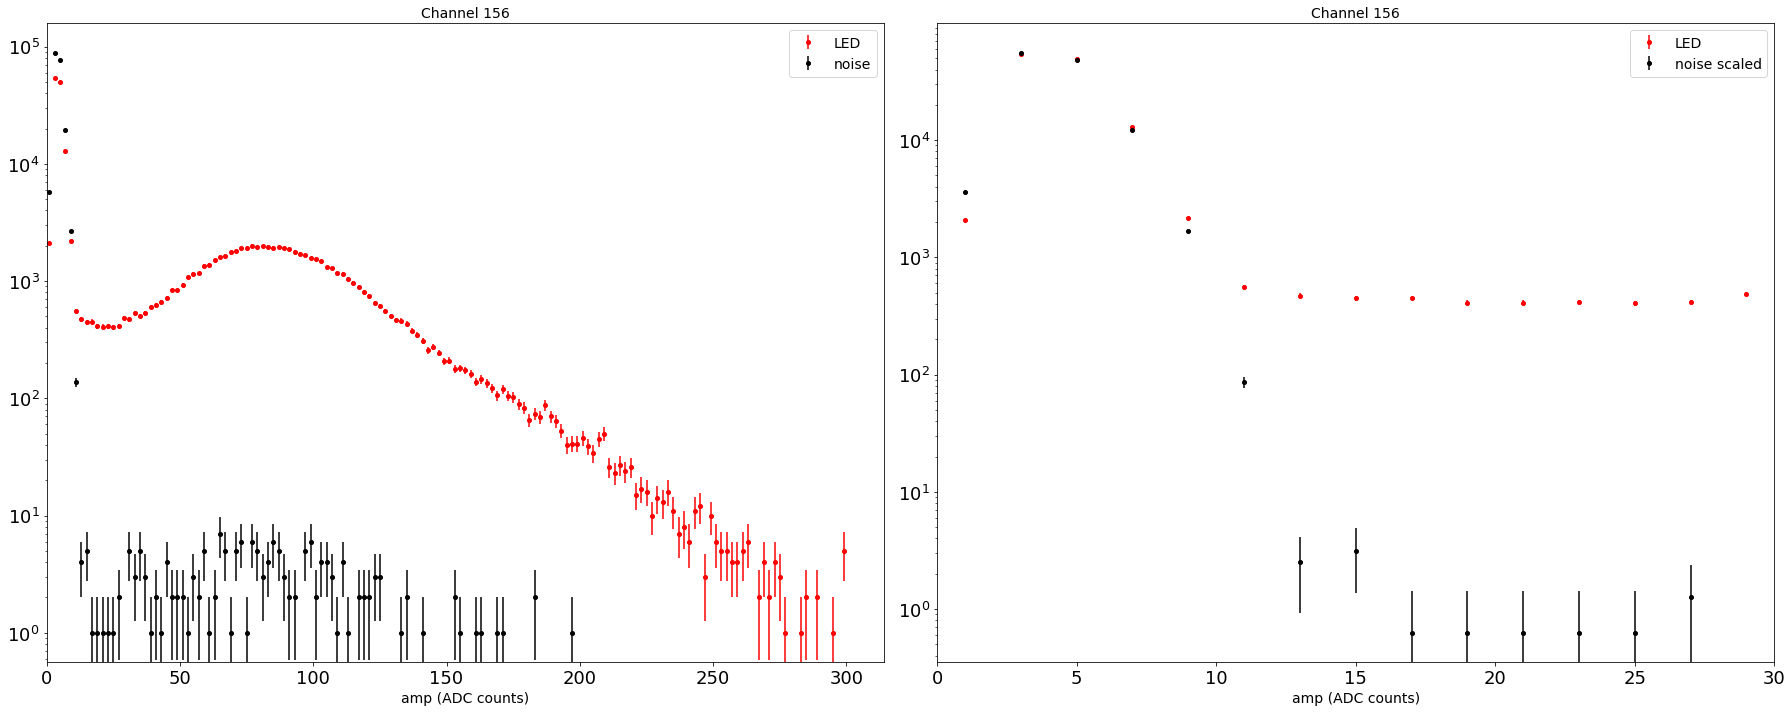

 63%|██████▎   | 157/249 [02:35<01:29,  1.02it/s]

 63%|██████▎   | 158/249 [02:36<01:28,  1.03it/s]

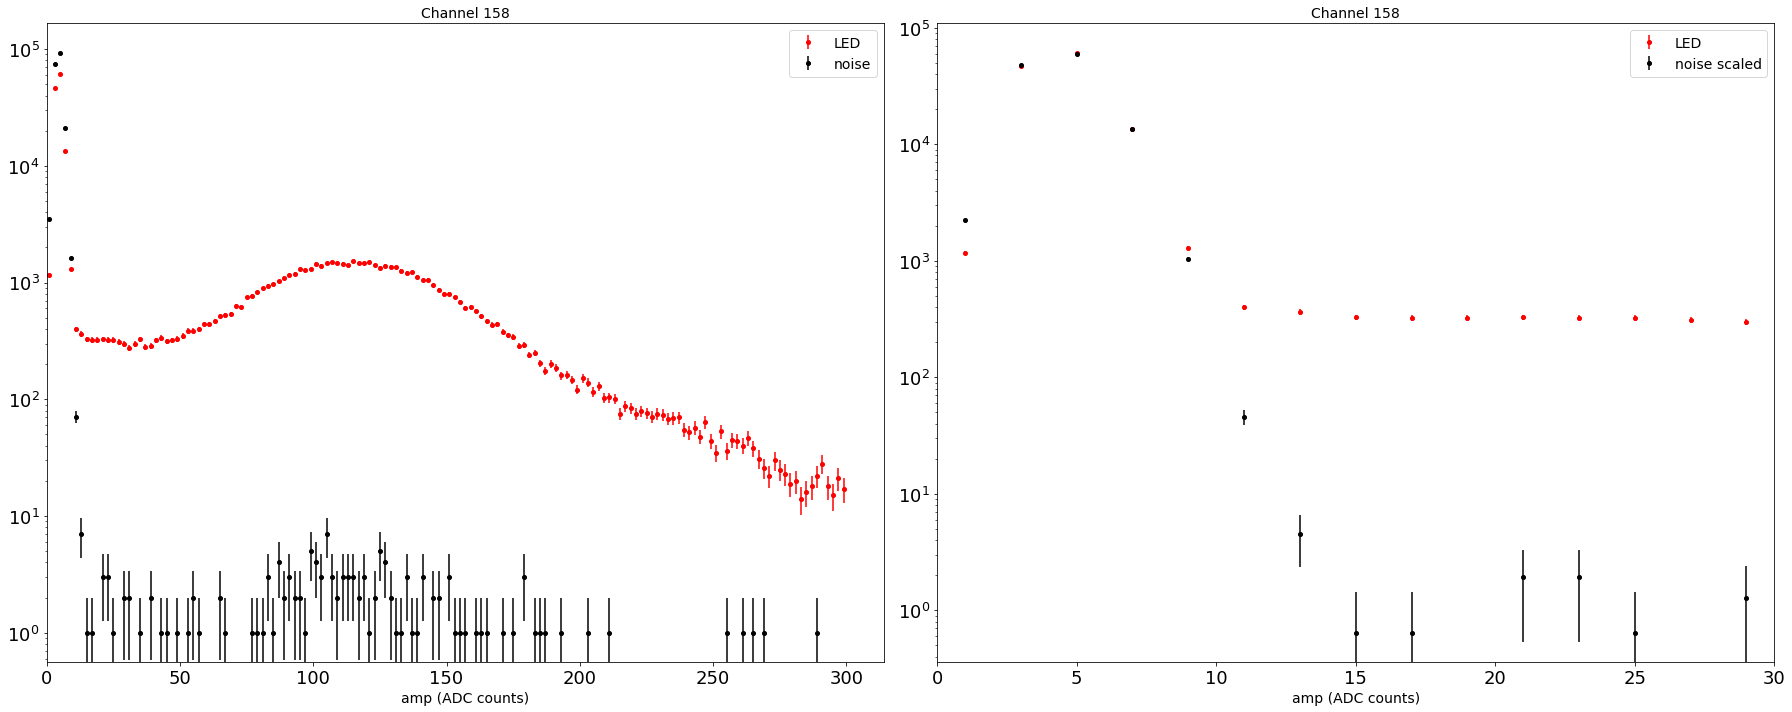

 64%|██████▍   | 159/249 [02:37<01:27,  1.03it/s]

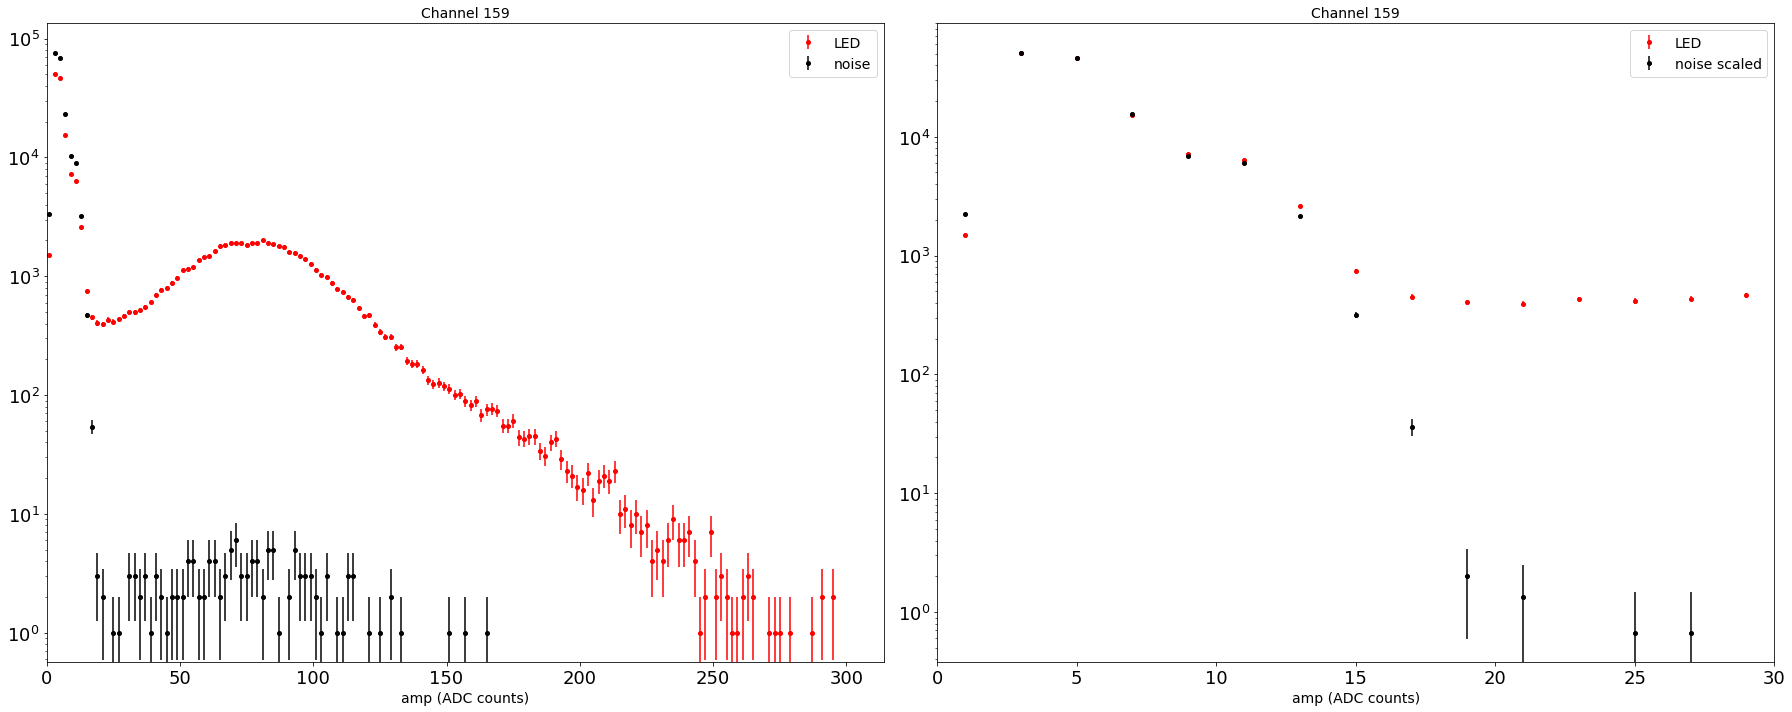

 64%|██████▍   | 160/249 [02:38<01:26,  1.03it/s]

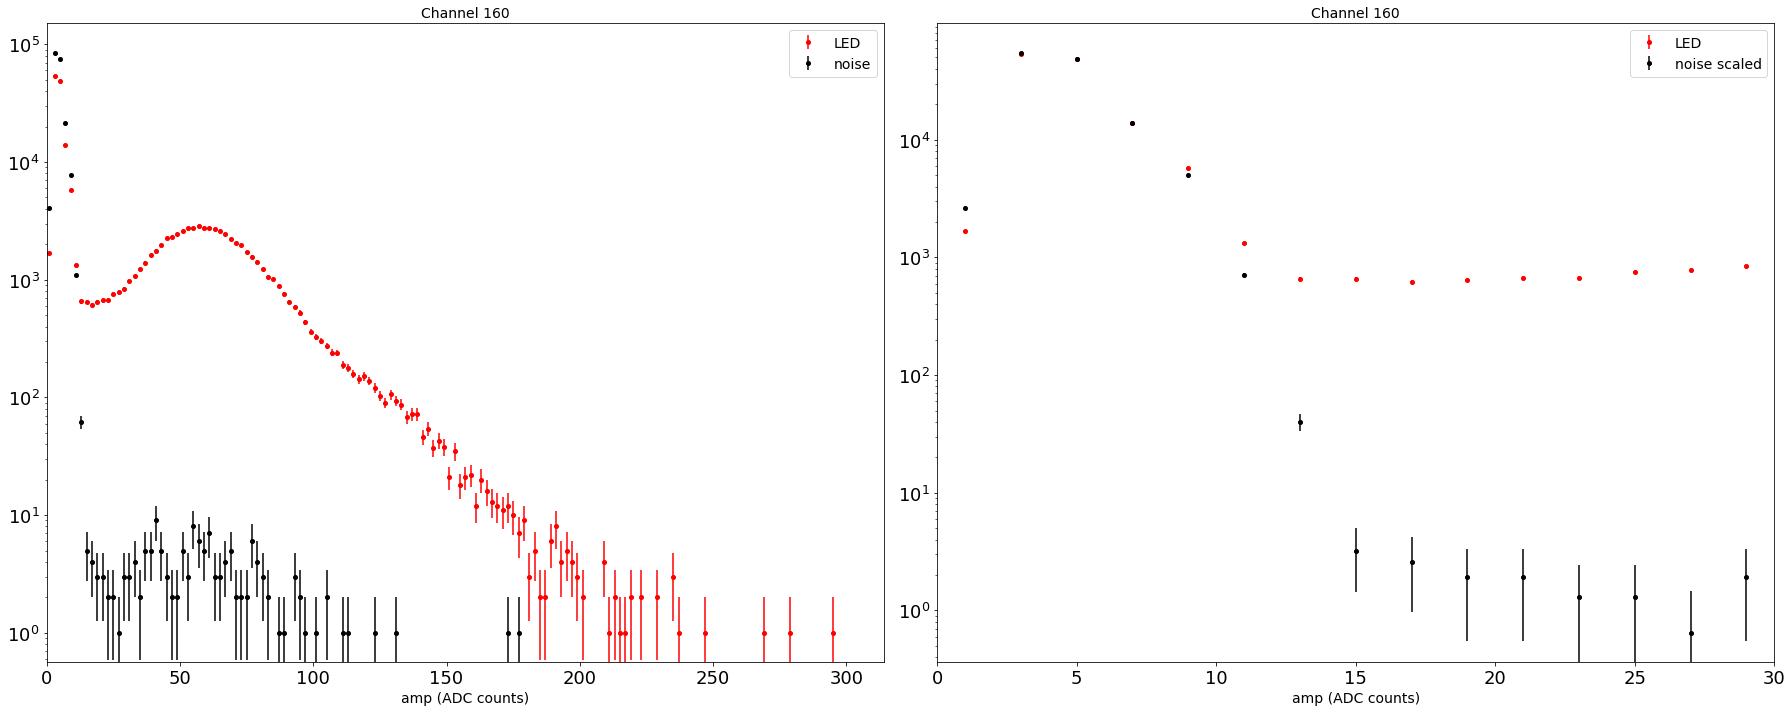

 65%|██████▍   | 161/249 [02:39<01:24,  1.04it/s]

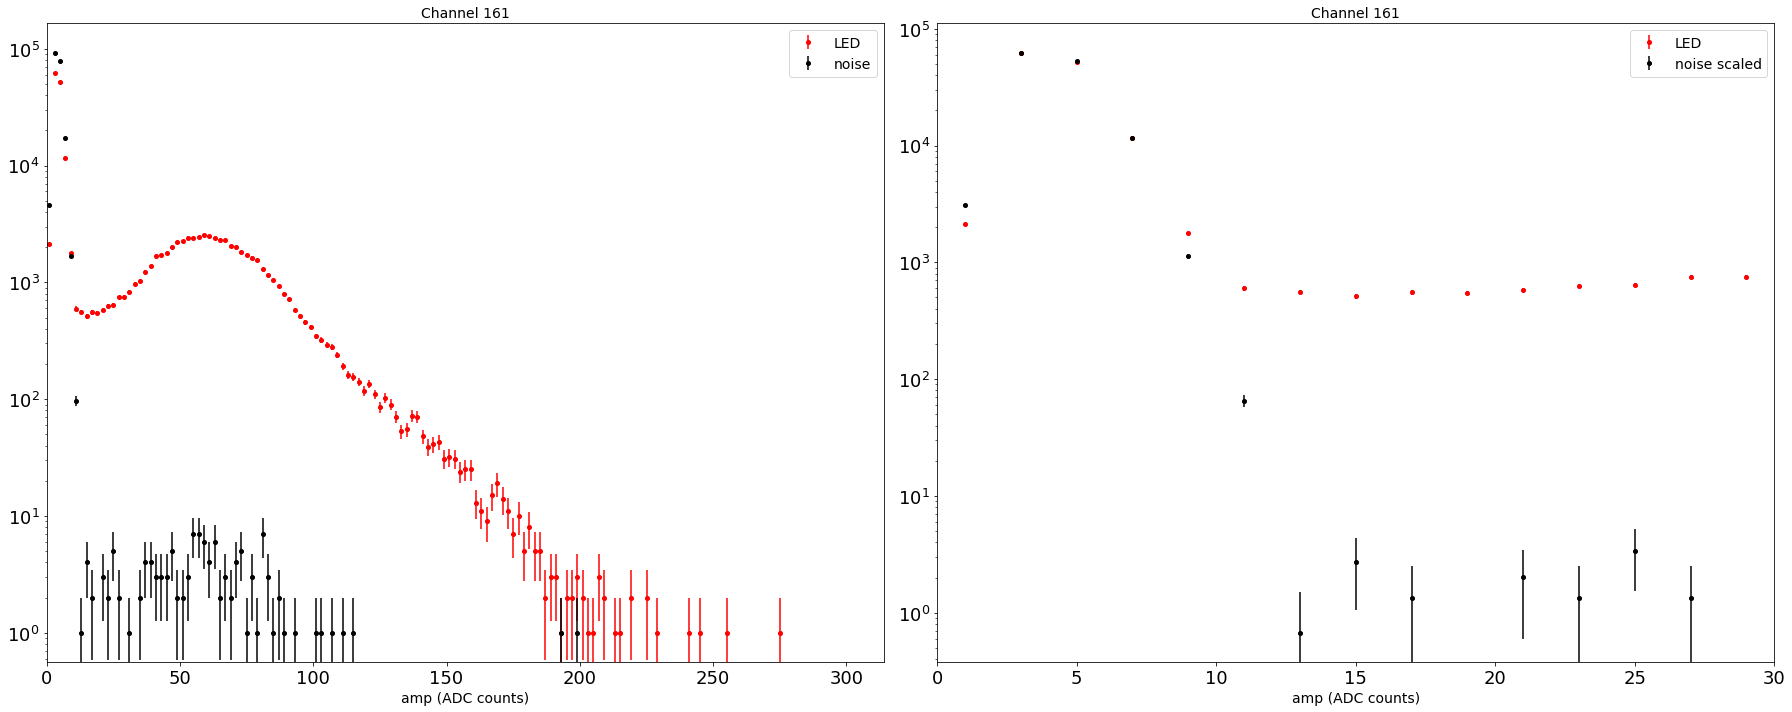

 65%|██████▌   | 162/249 [02:40<01:24,  1.03it/s]

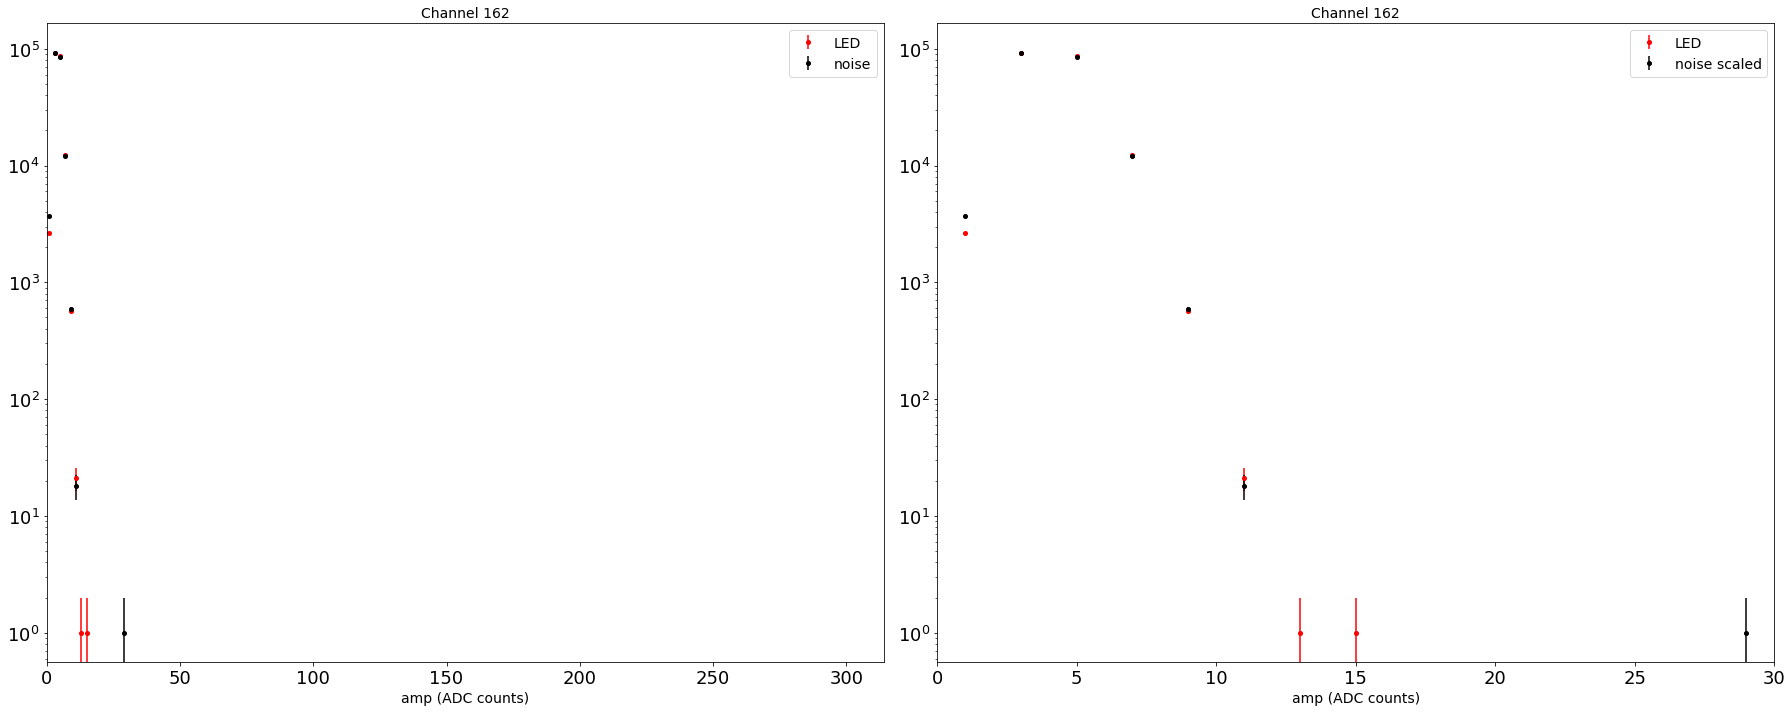

 65%|██████▌   | 163/249 [02:41<01:23,  1.04it/s]

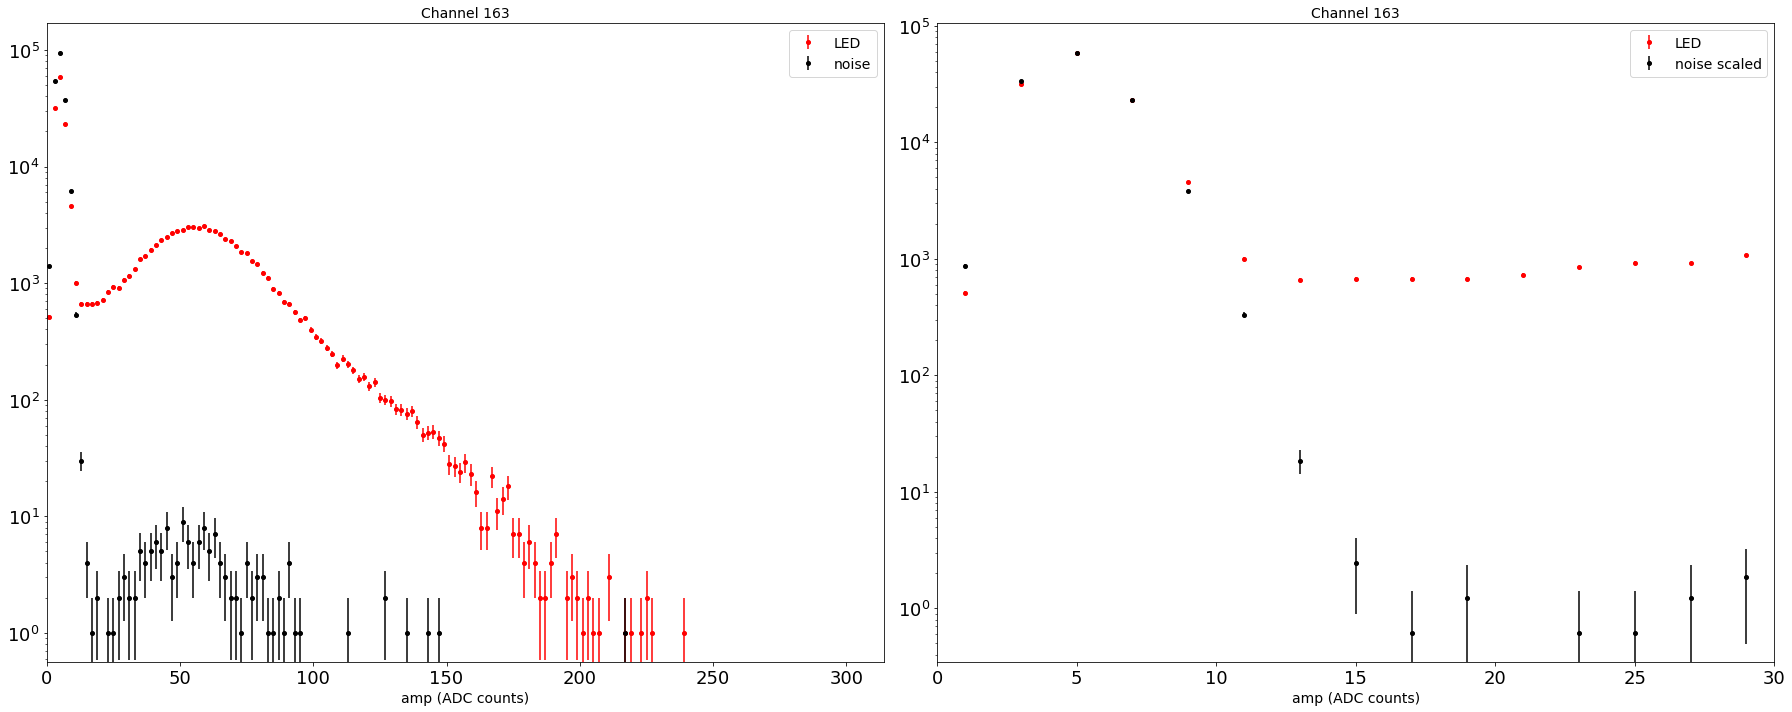

 66%|██████▌   | 164/249 [02:42<01:22,  1.03it/s]

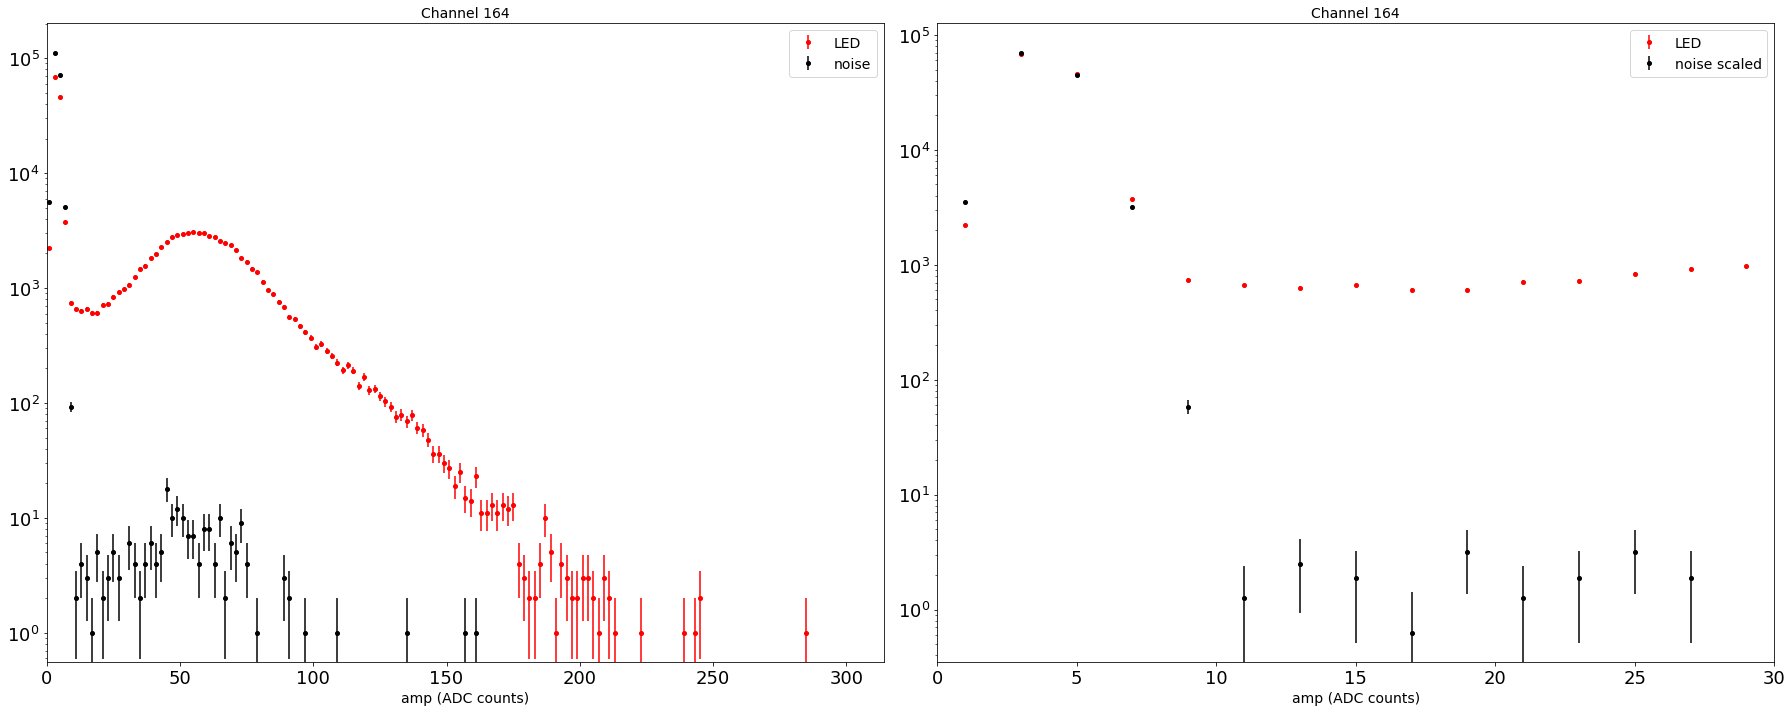

 66%|██████▋   | 165/249 [02:43<01:21,  1.03it/s]

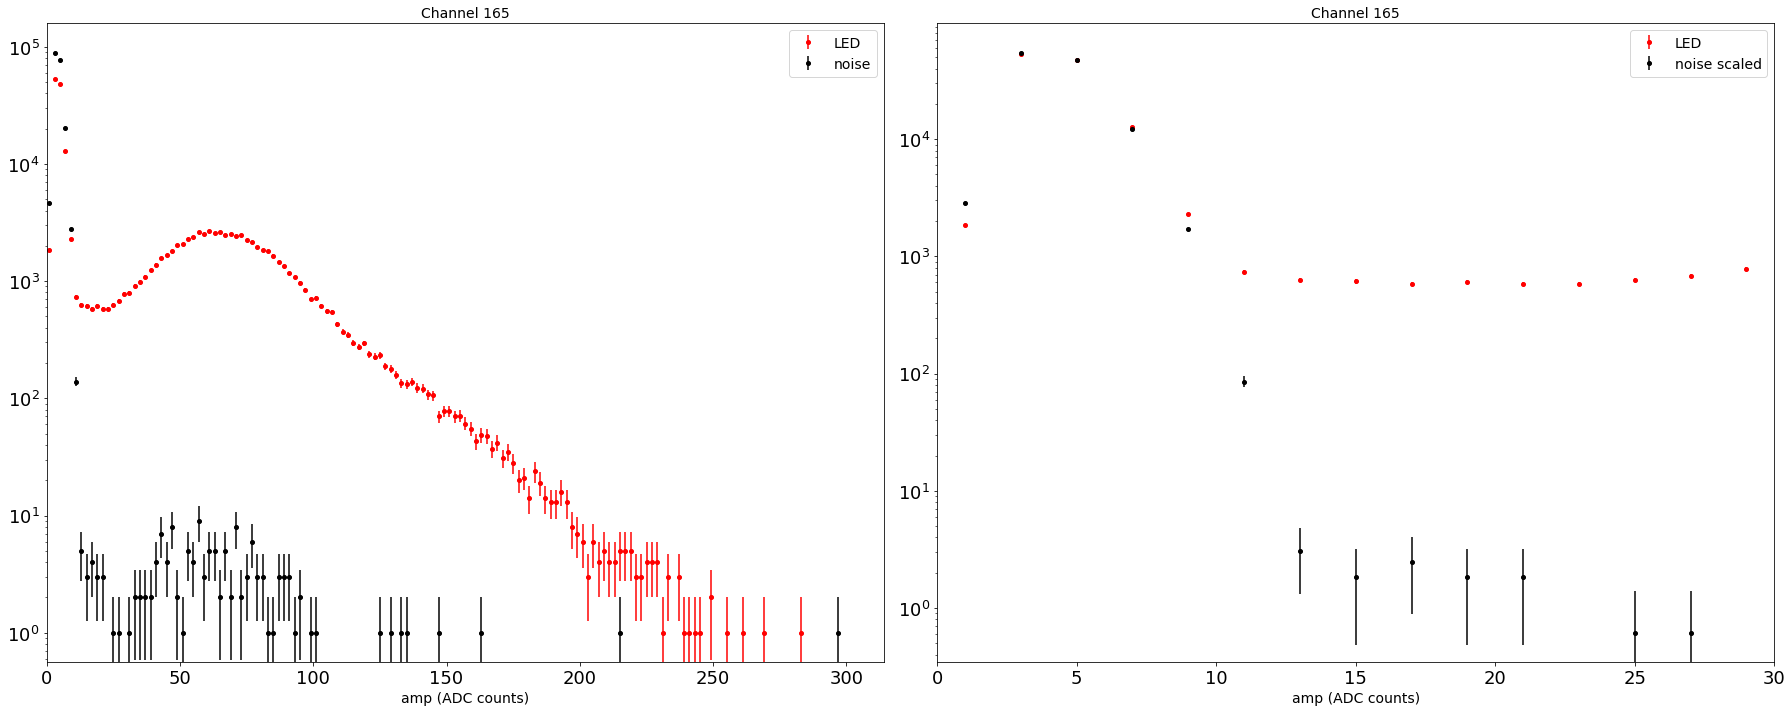

 67%|██████▋   | 166/249 [02:44<01:20,  1.03it/s]

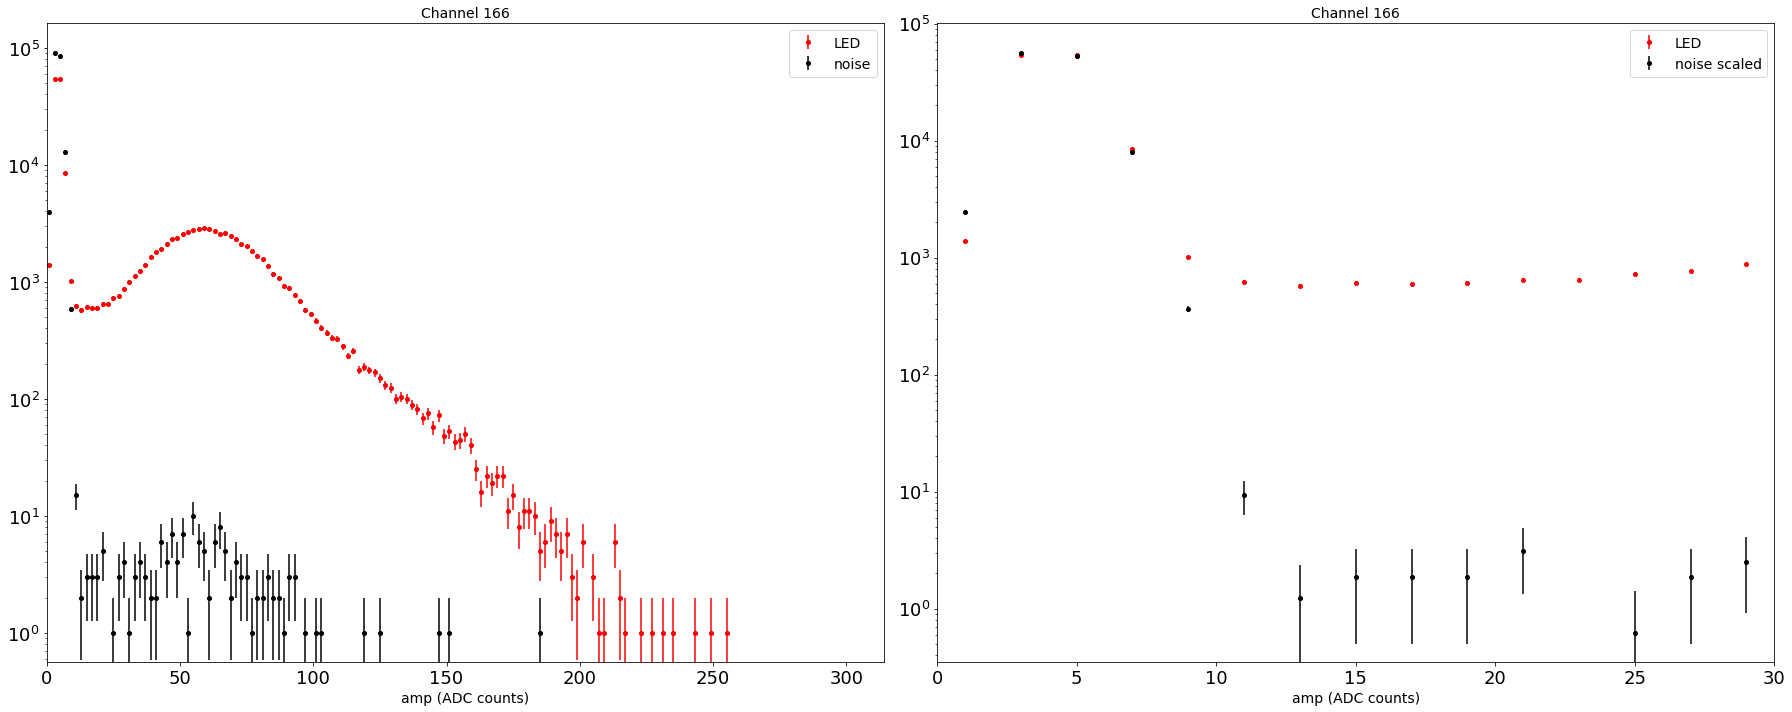

 67%|██████▋   | 167/249 [02:45<01:19,  1.03it/s]

 67%|██████▋   | 168/249 [02:46<01:18,  1.03it/s]

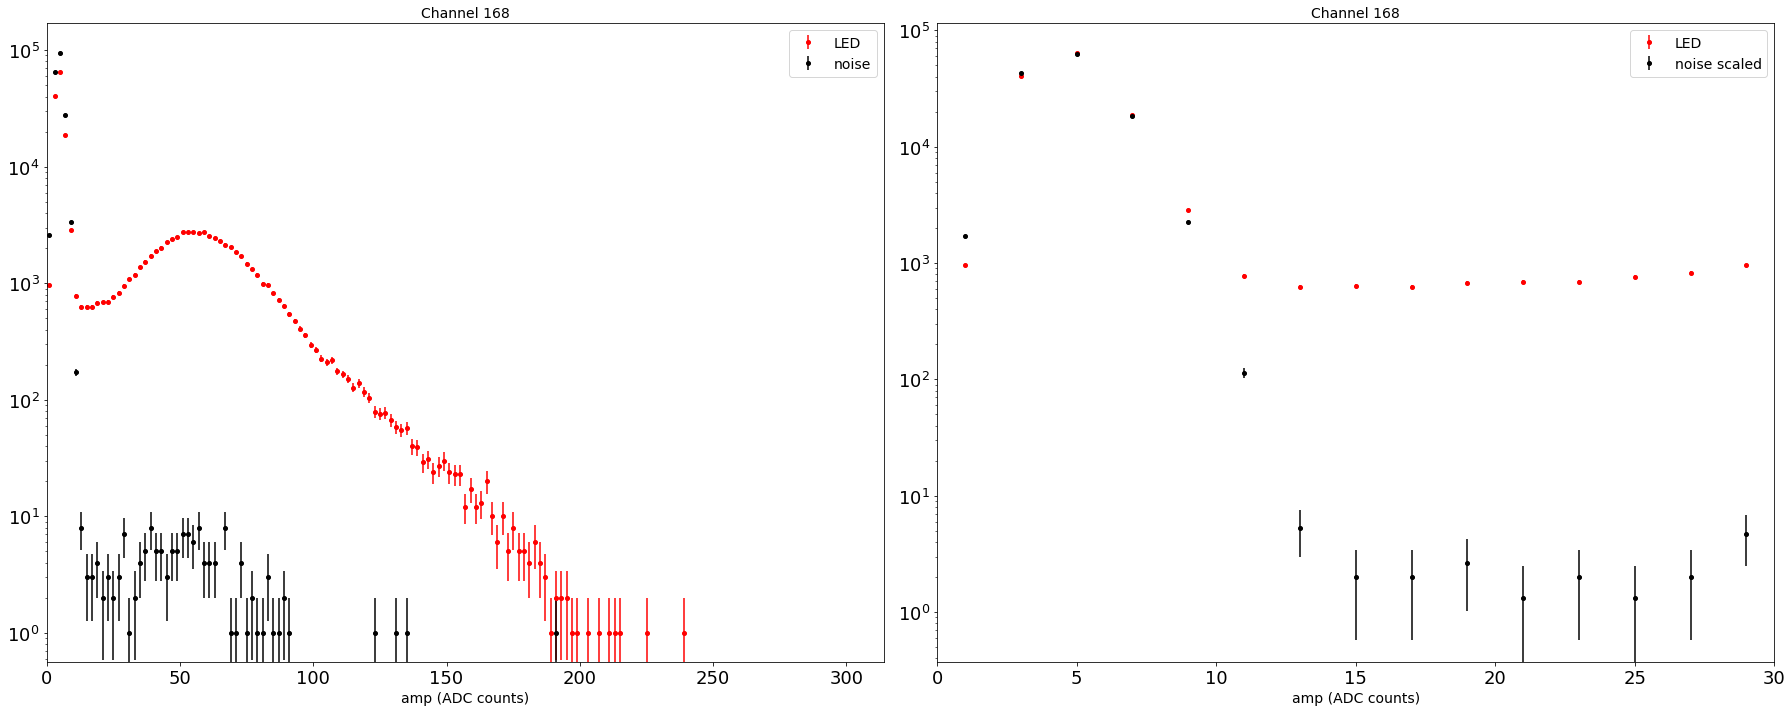

 68%|██████▊   | 169/249 [02:47<01:18,  1.01it/s]

 68%|██████▊   | 170/249 [02:48<01:17,  1.02it/s]

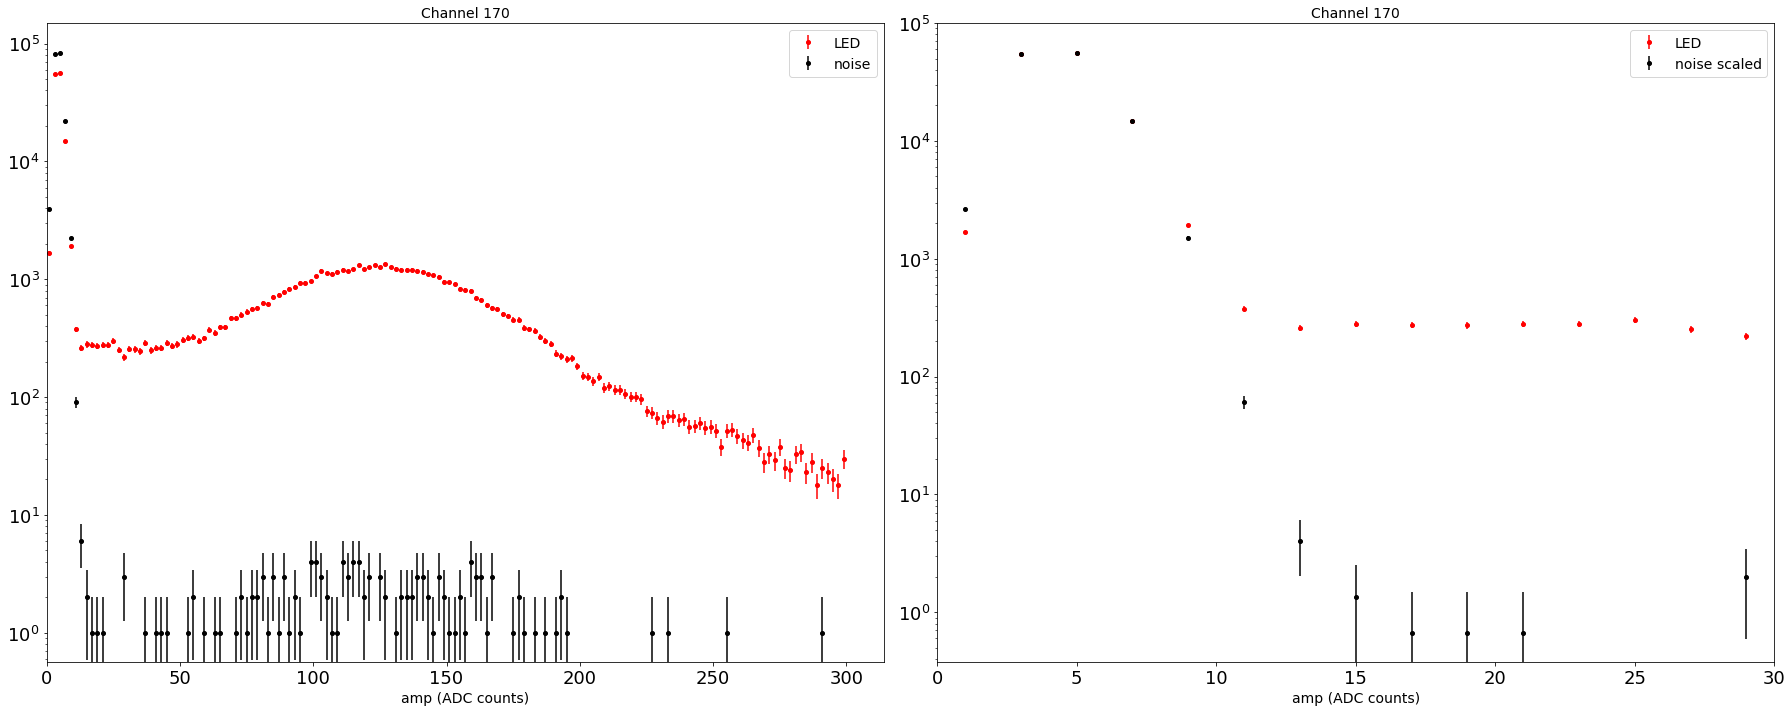

 69%|██████▊   | 171/249 [02:49<01:16,  1.02it/s]

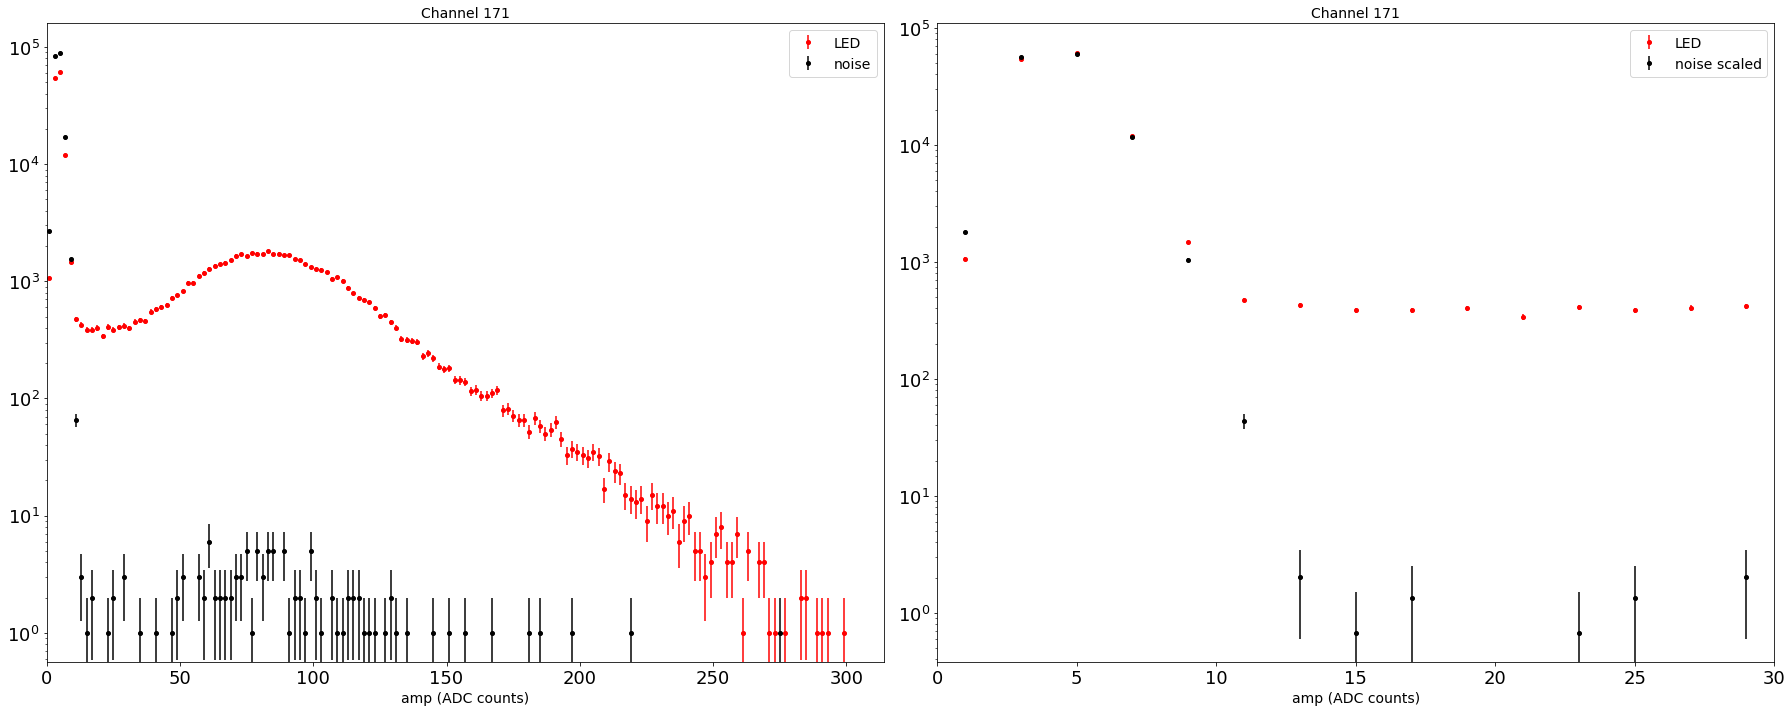

 69%|██████▉   | 172/249 [02:50<01:16,  1.01it/s]

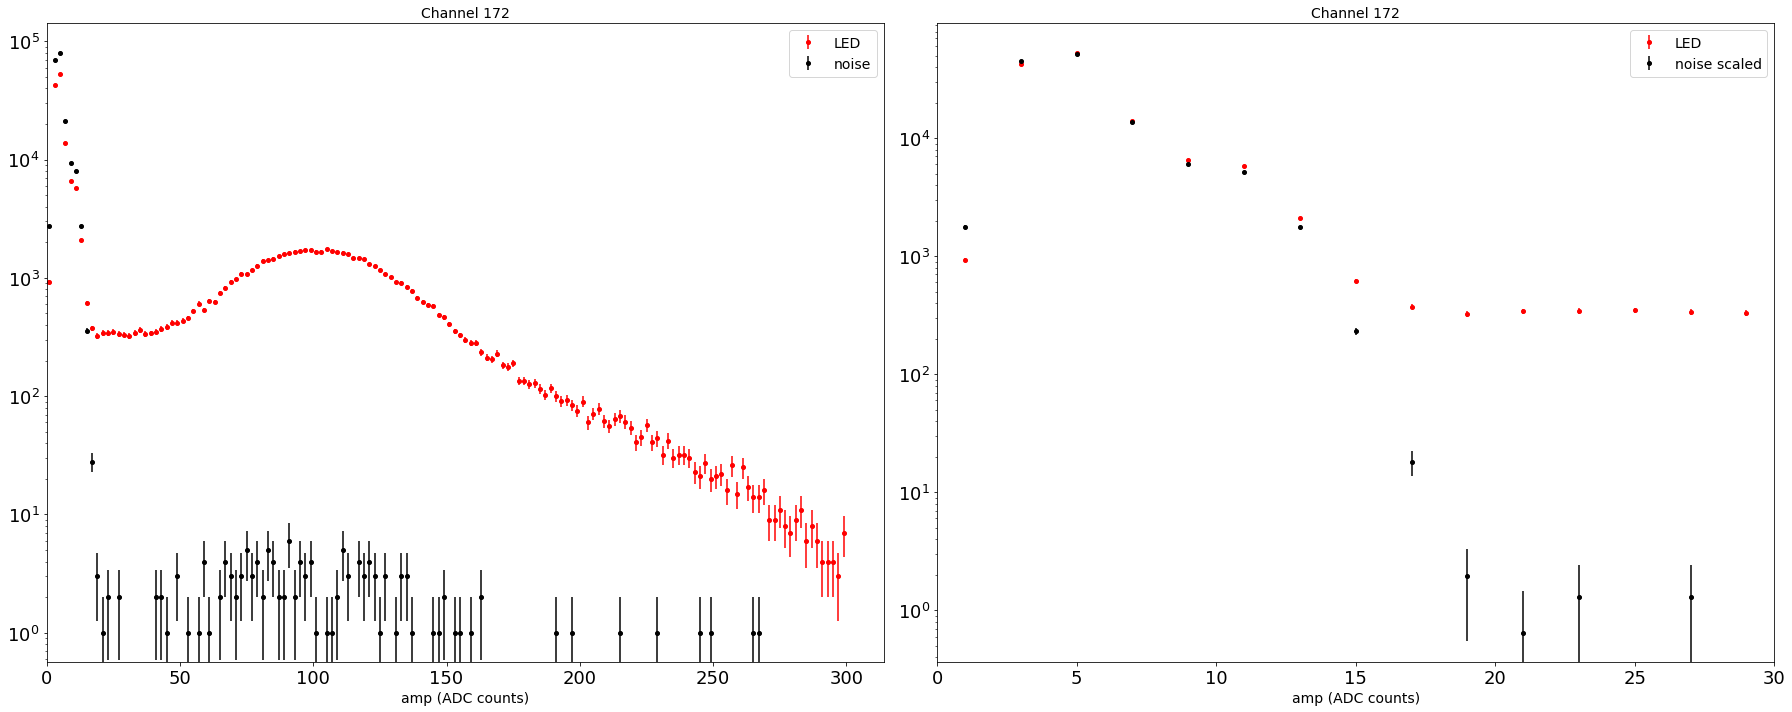

 69%|██████▉   | 173/249 [02:51<01:14,  1.01it/s]

 70%|██████▉   | 174/249 [02:52<01:13,  1.02it/s]

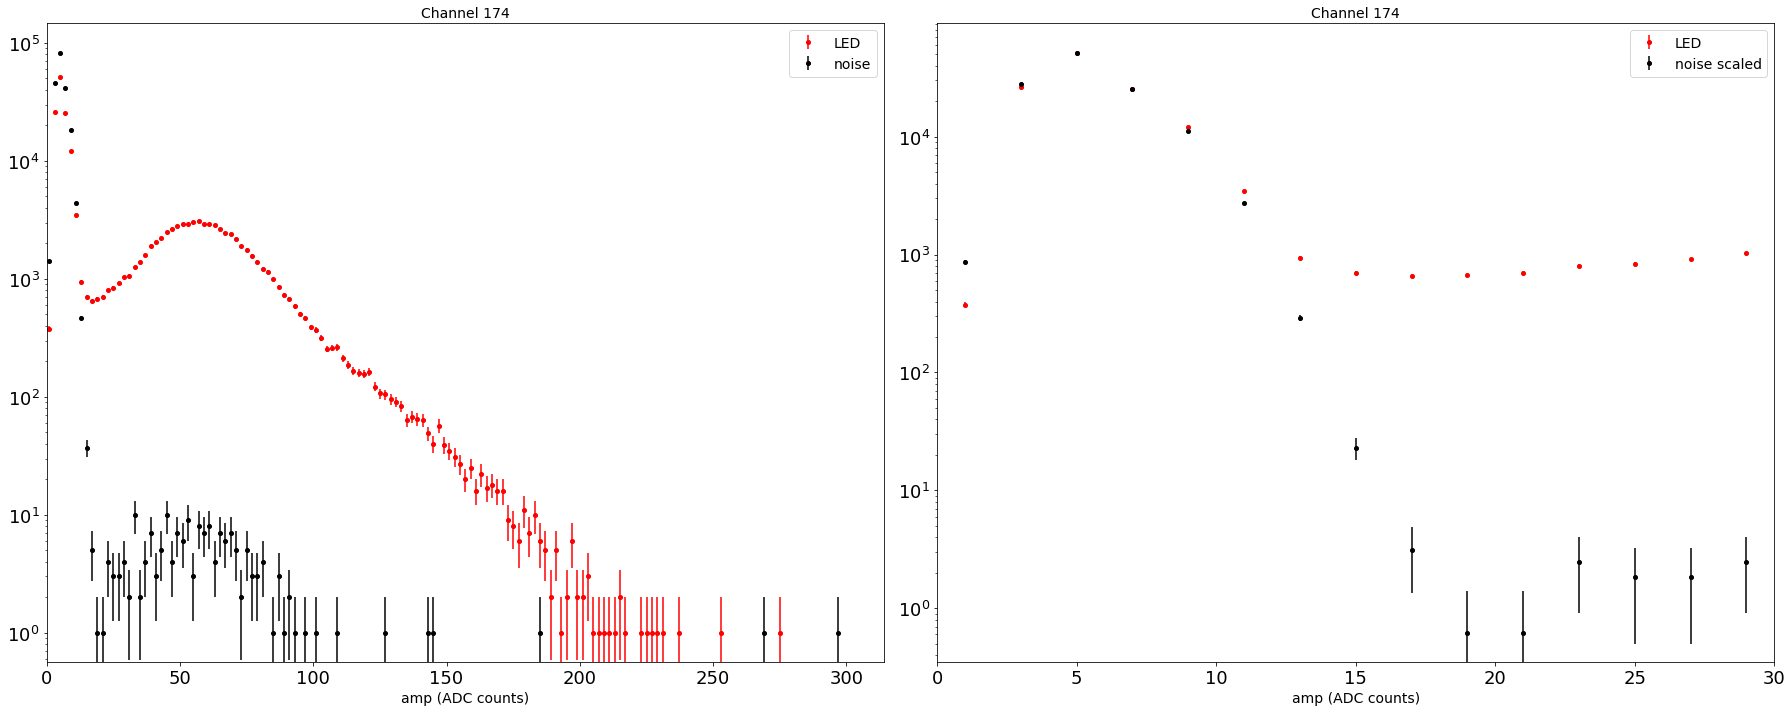

 70%|███████   | 175/249 [02:53<01:13,  1.01it/s]

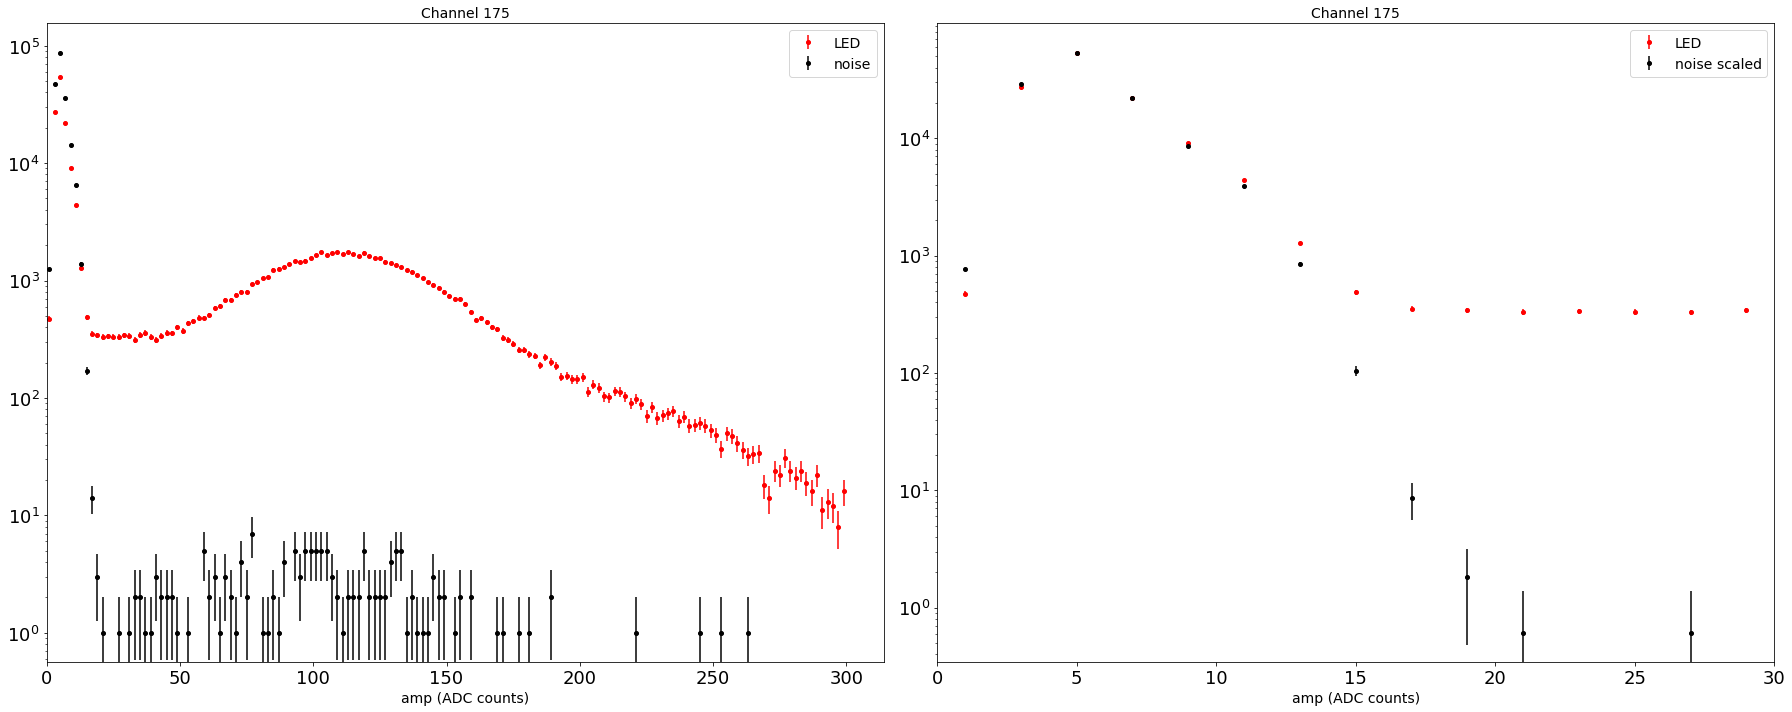

 71%|███████   | 176/249 [02:54<01:11,  1.02it/s]

 71%|███████   | 177/249 [02:55<01:10,  1.03it/s]

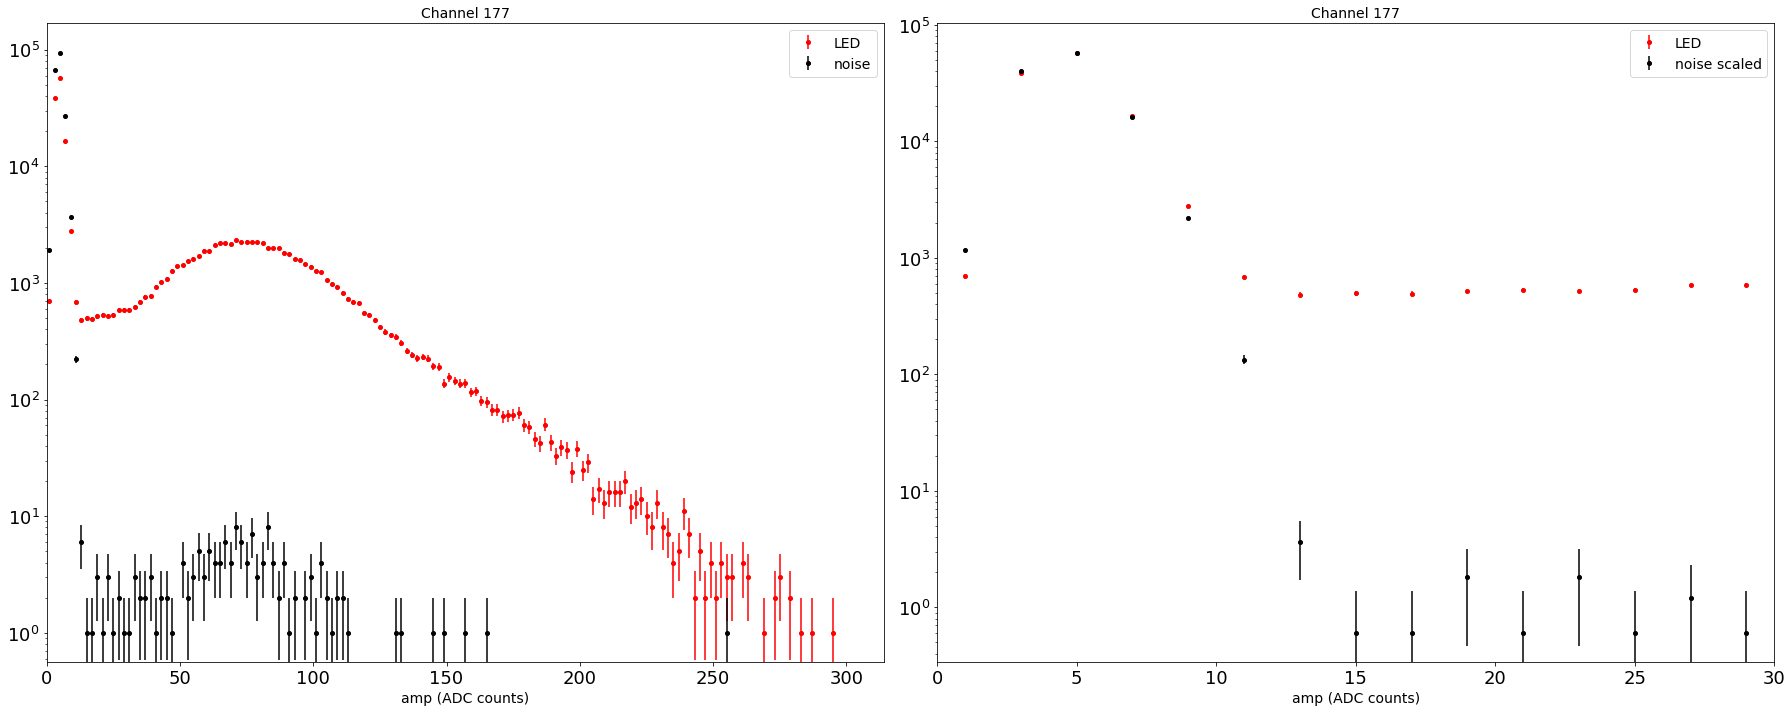

 71%|███████▏  | 178/249 [02:56<01:09,  1.02it/s]

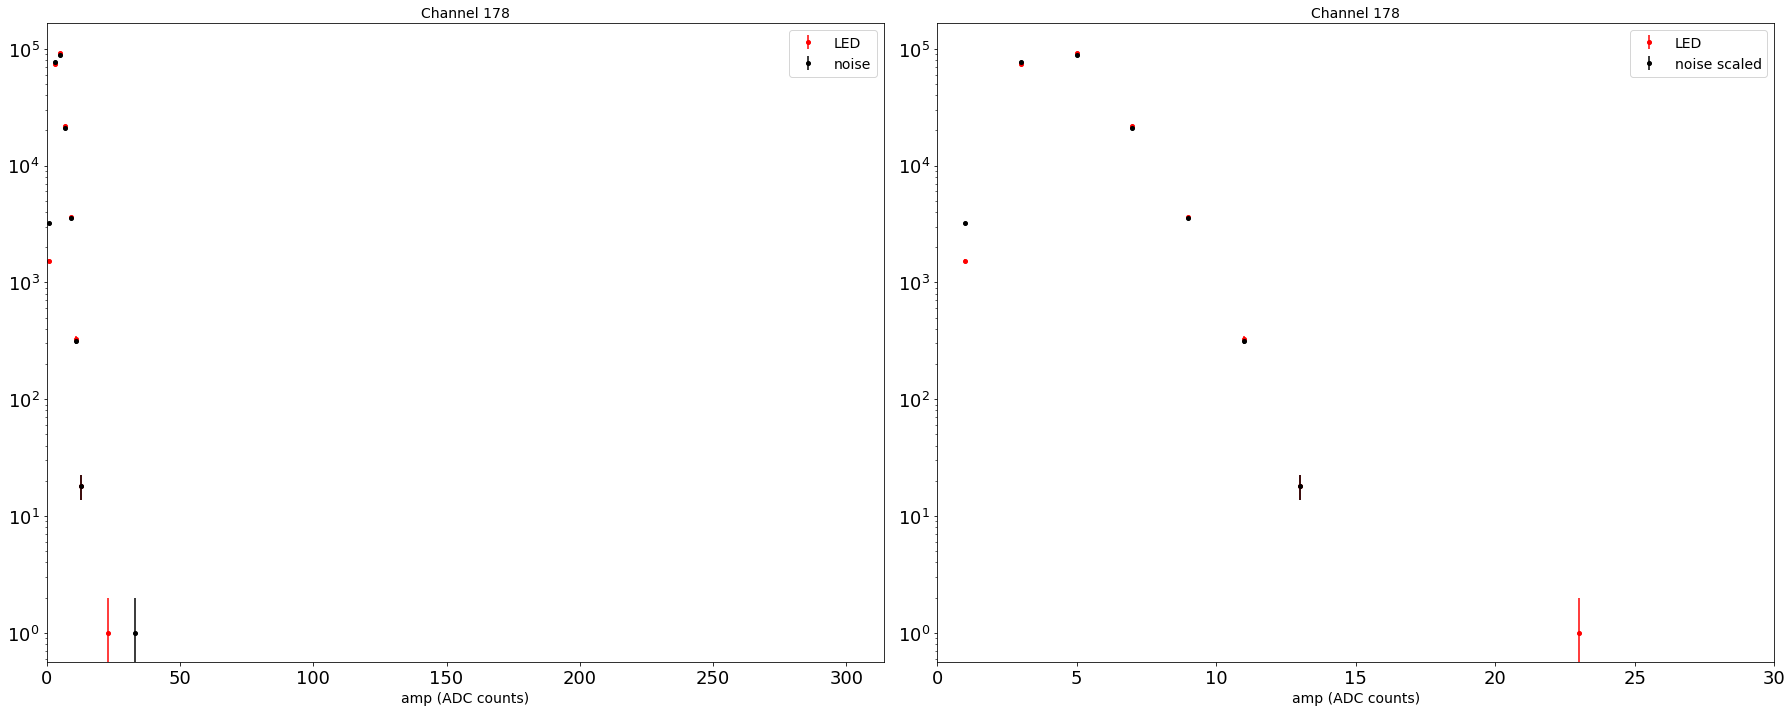

 72%|███████▏  | 179/249 [02:57<01:08,  1.02it/s]

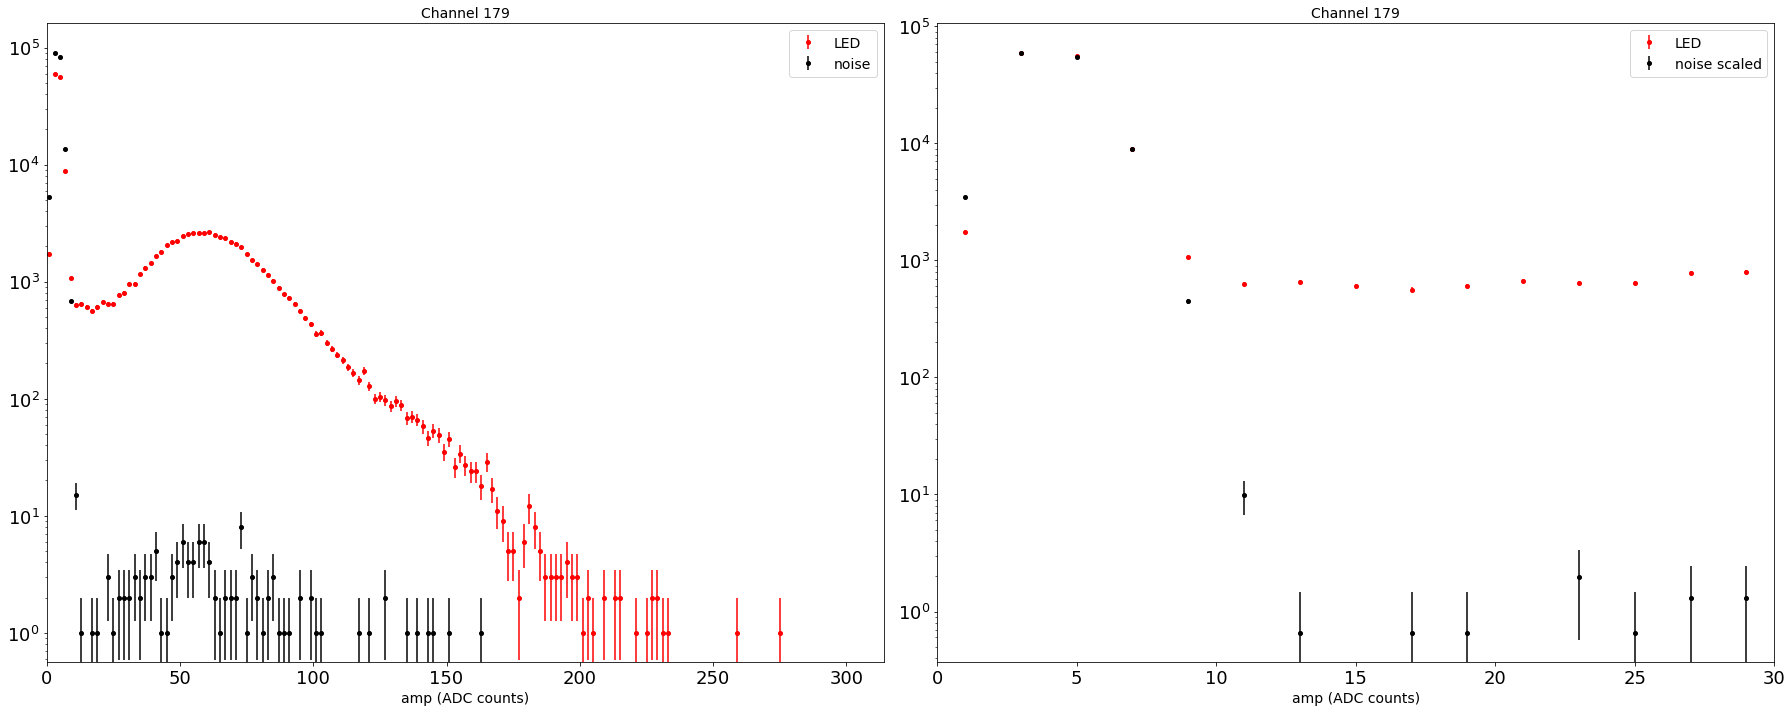

 72%|███████▏  | 180/249 [02:58<01:07,  1.03it/s]

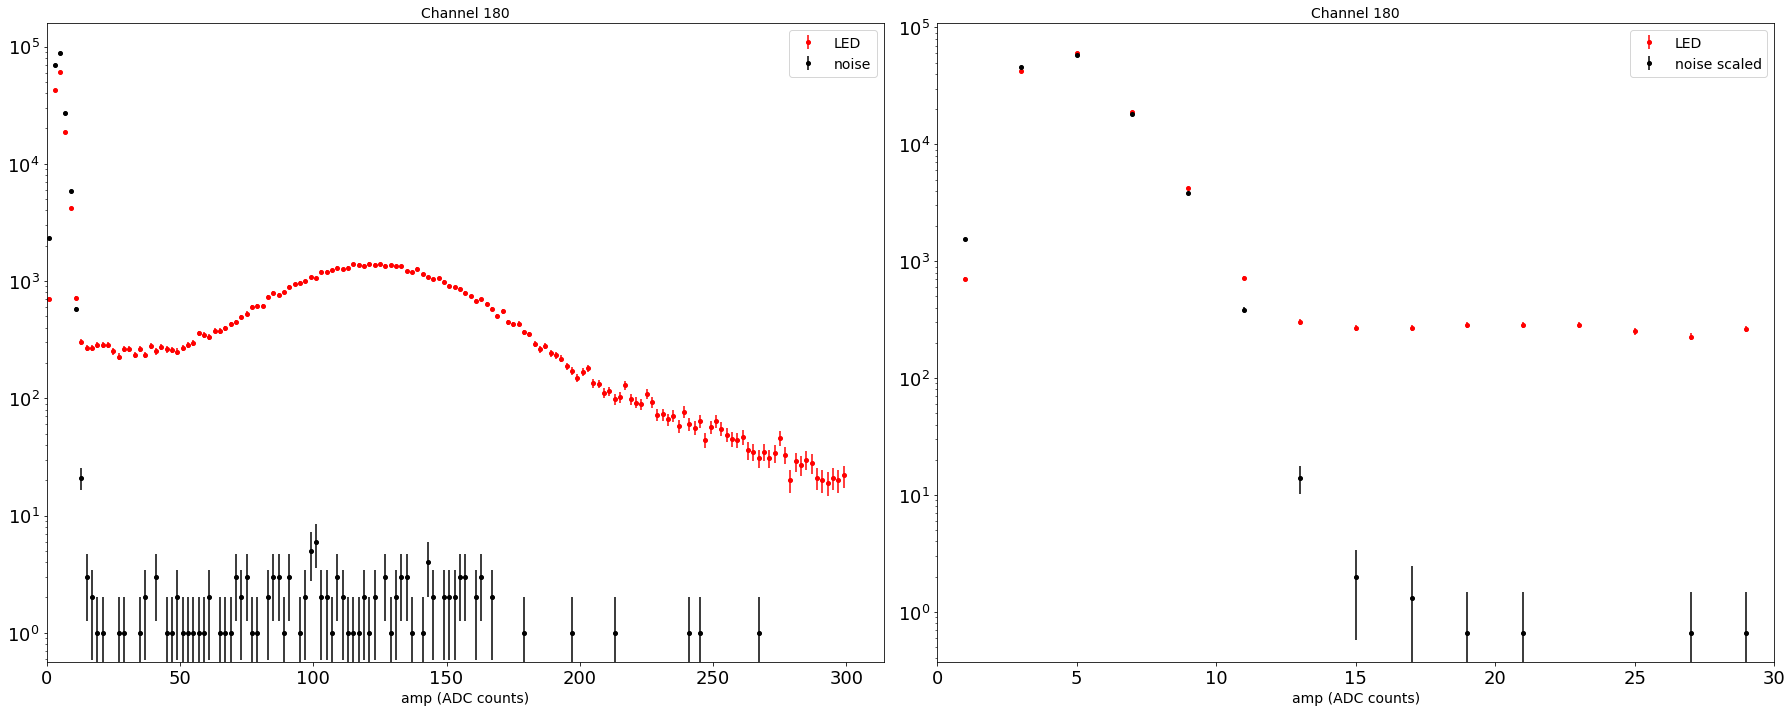

 73%|███████▎  | 181/249 [03:01<01:56,  1.72s/it]

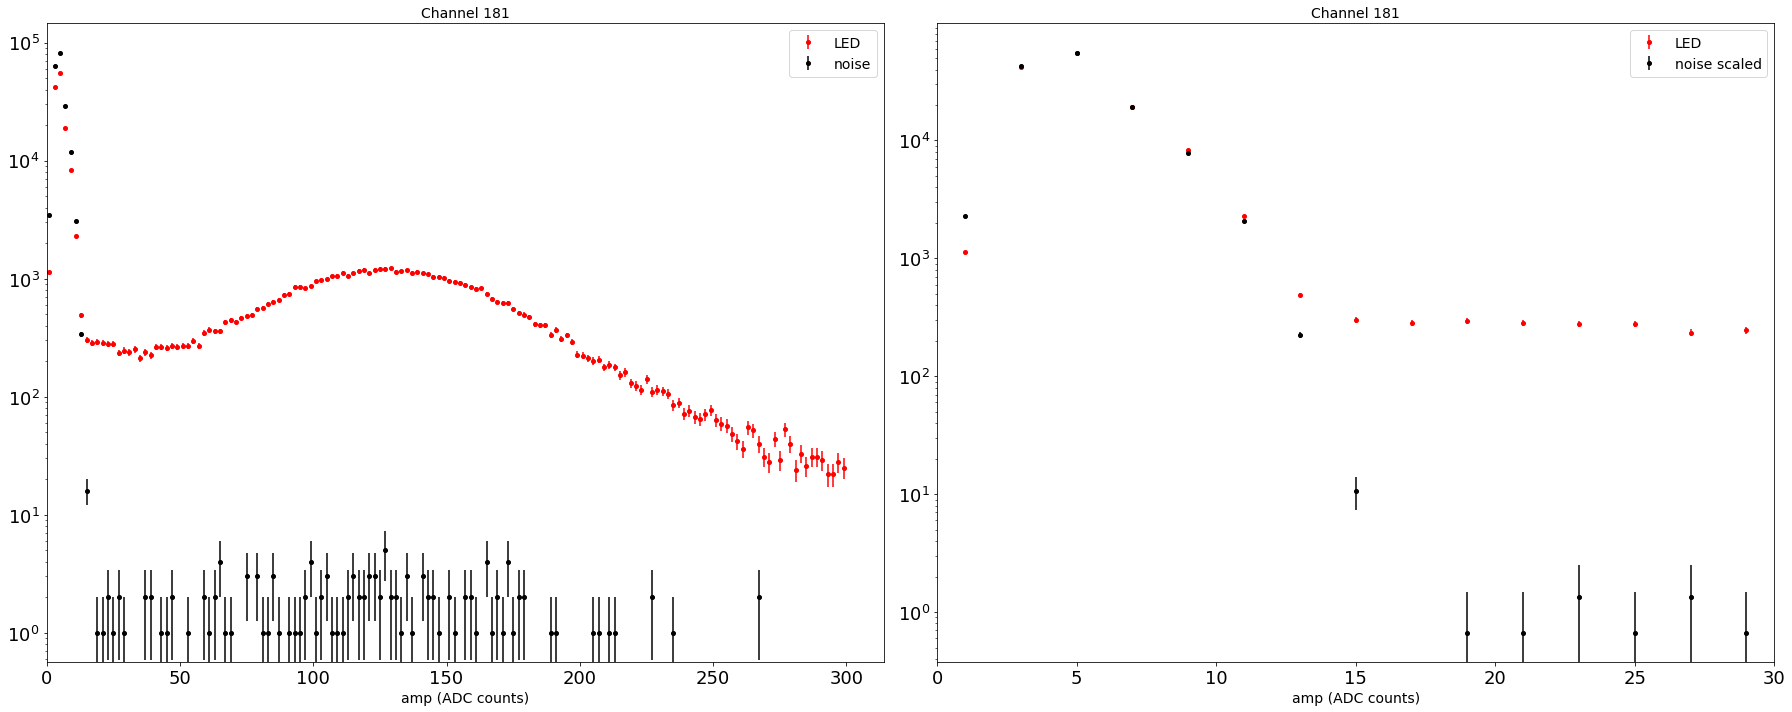

 73%|███████▎  | 182/249 [03:02<01:39,  1.48s/it]

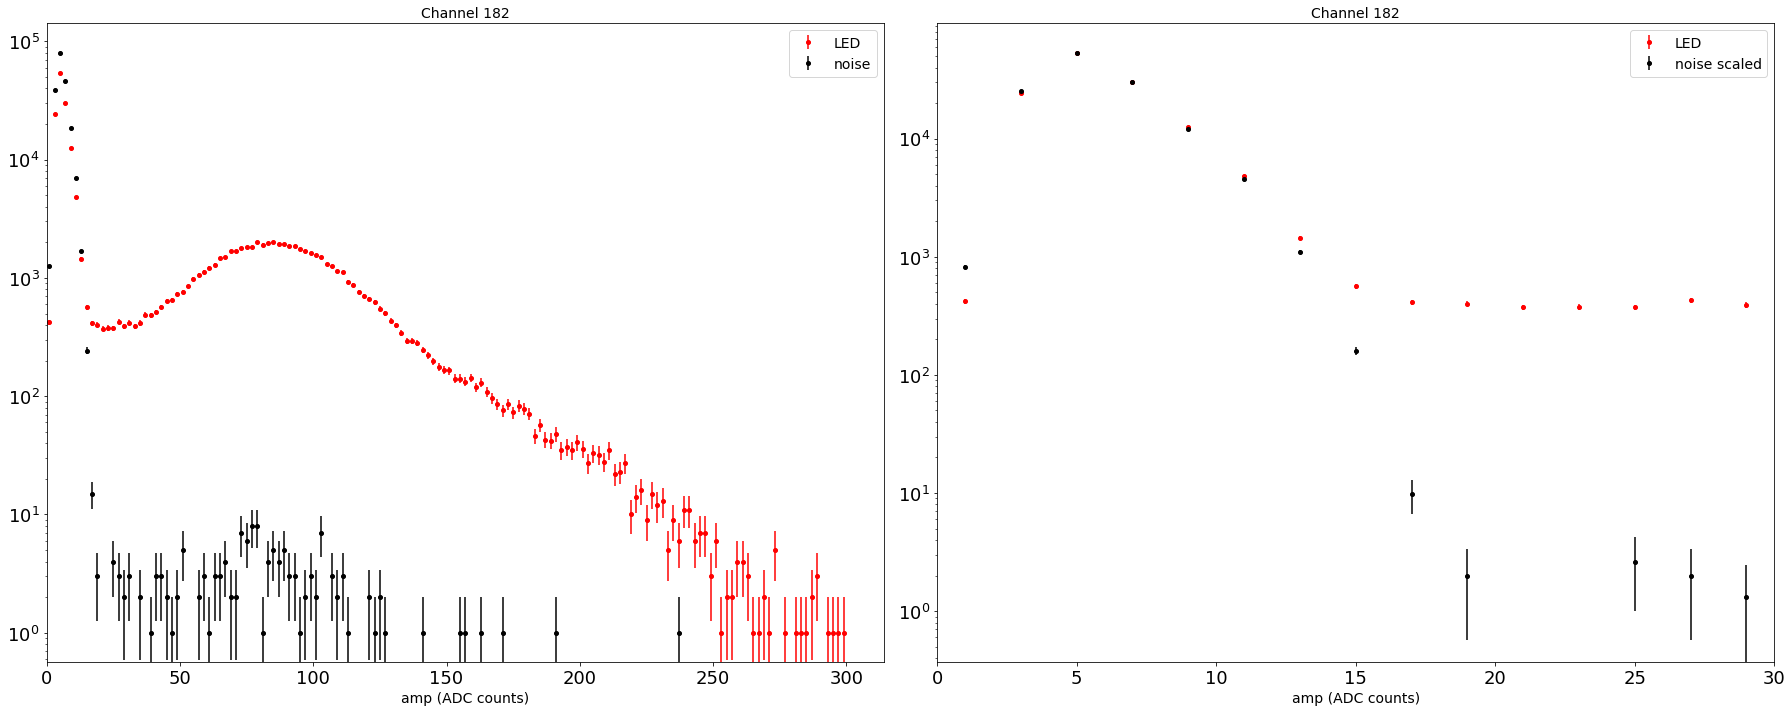

 73%|███████▎  | 183/249 [03:03<01:26,  1.32s/it]

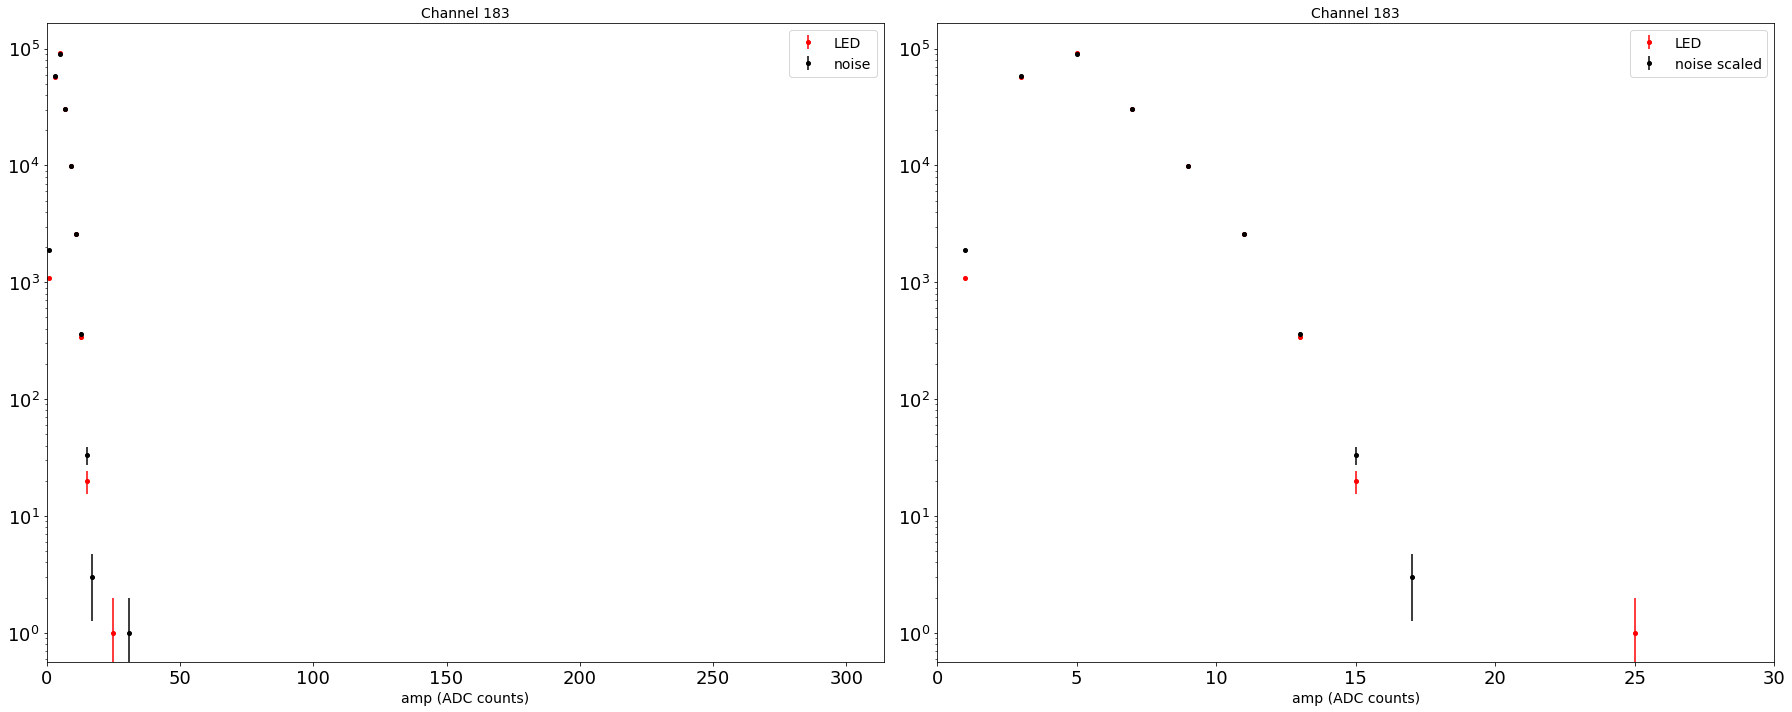

 74%|███████▍  | 184/249 [03:04<01:18,  1.21s/it]

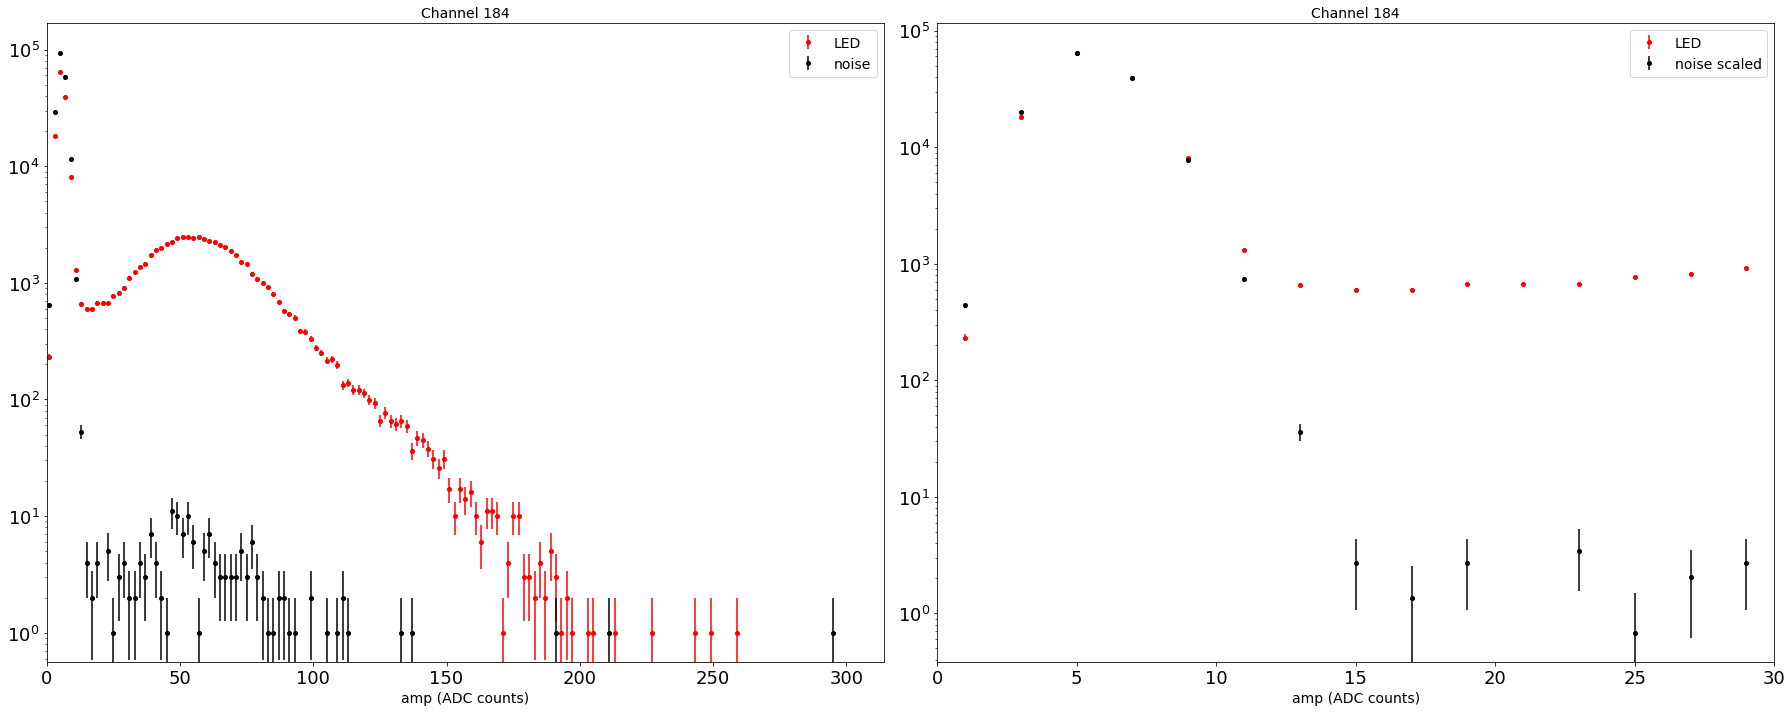

 74%|███████▍  | 185/249 [03:05<01:15,  1.17s/it]

 75%|███████▍  | 186/249 [03:06<01:09,  1.11s/it]

 75%|███████▌  | 187/249 [03:07<01:05,  1.06s/it]

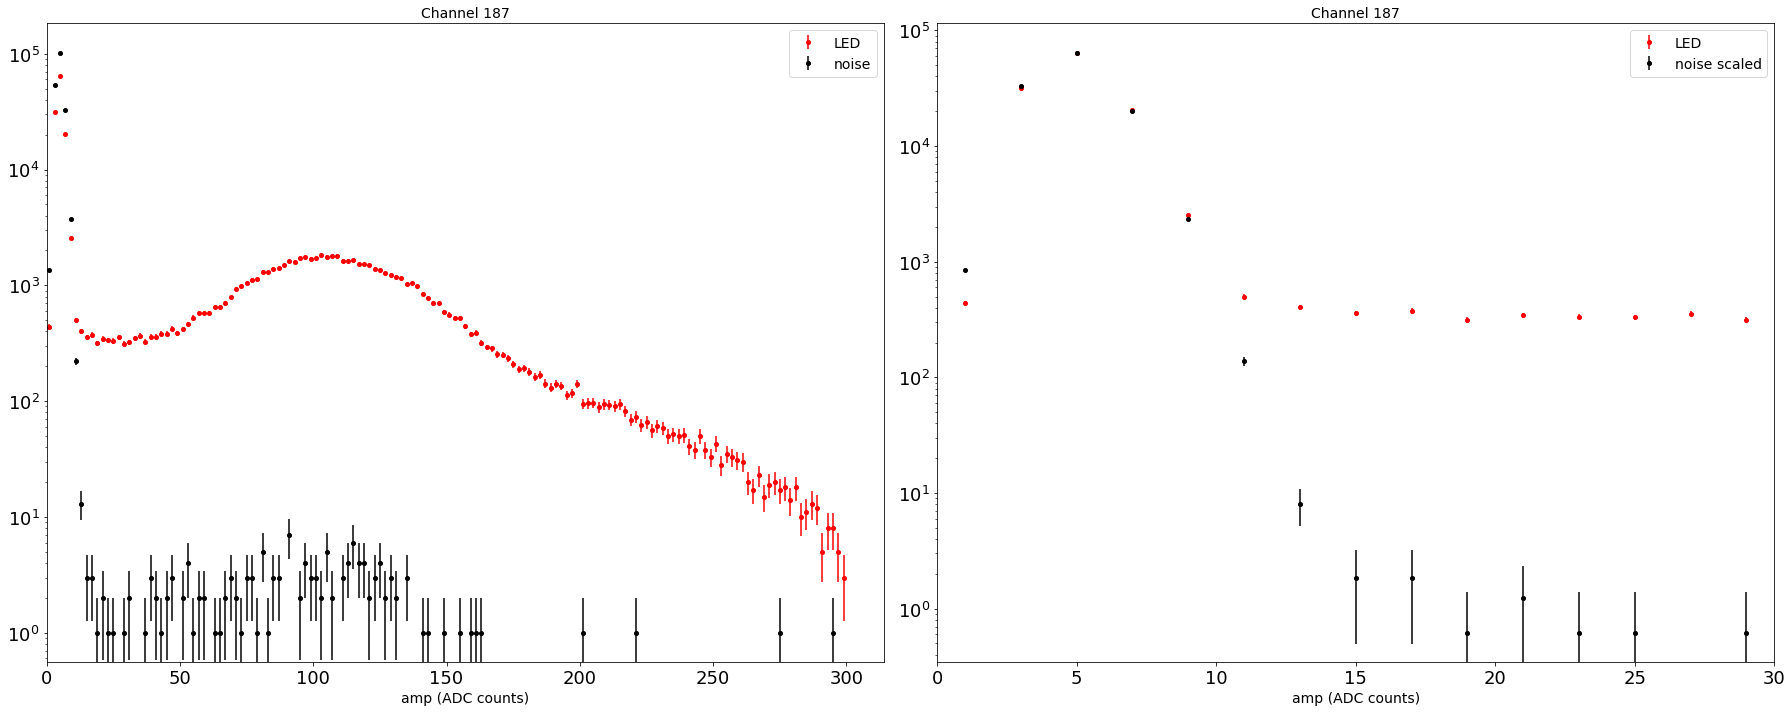

 76%|███████▌  | 188/249 [03:08<01:03,  1.04s/it]

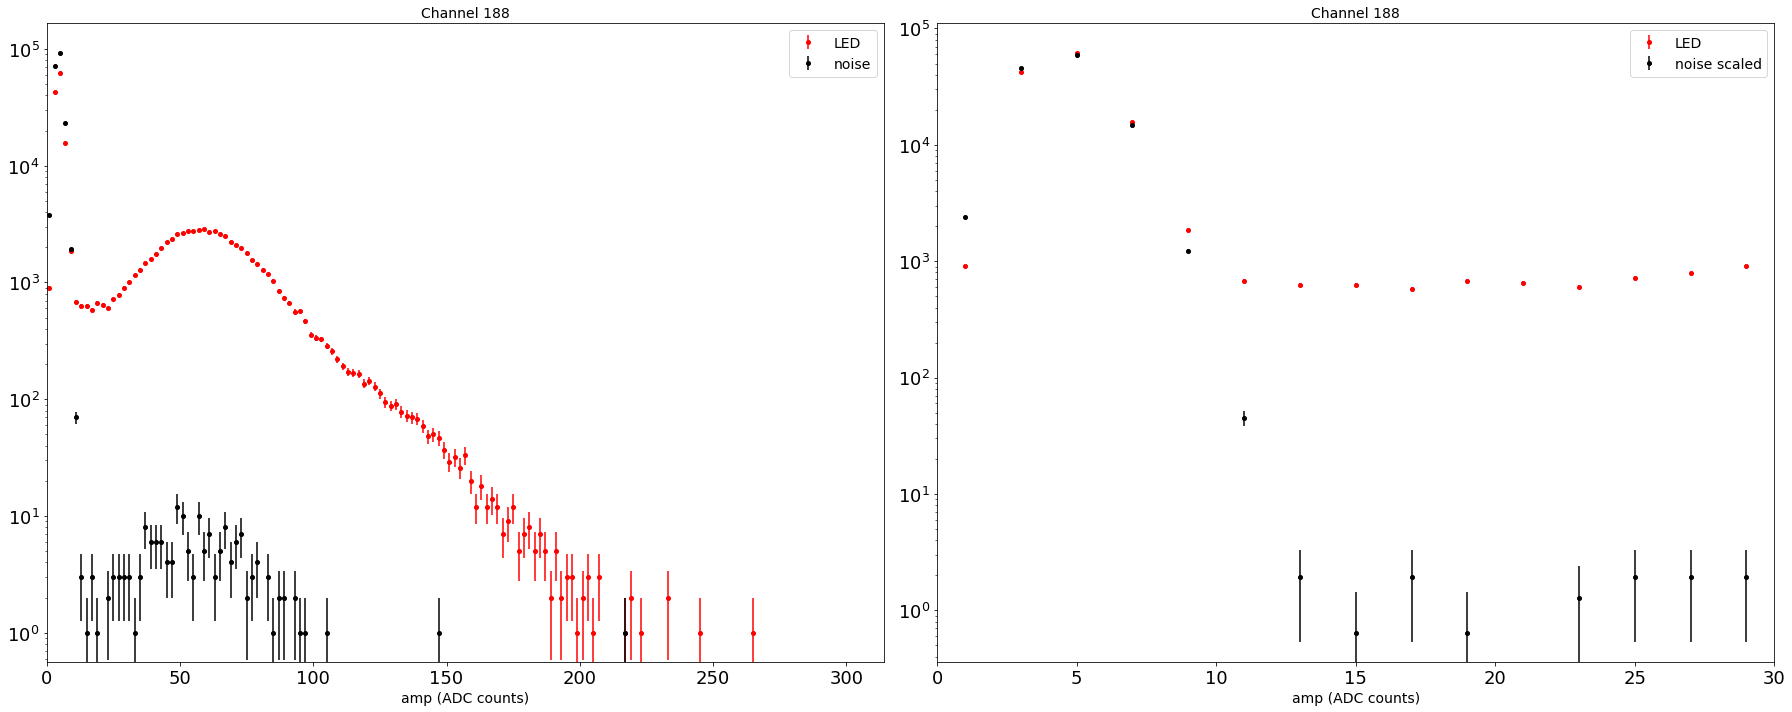

 76%|███████▌  | 189/249 [03:09<01:03,  1.05s/it]

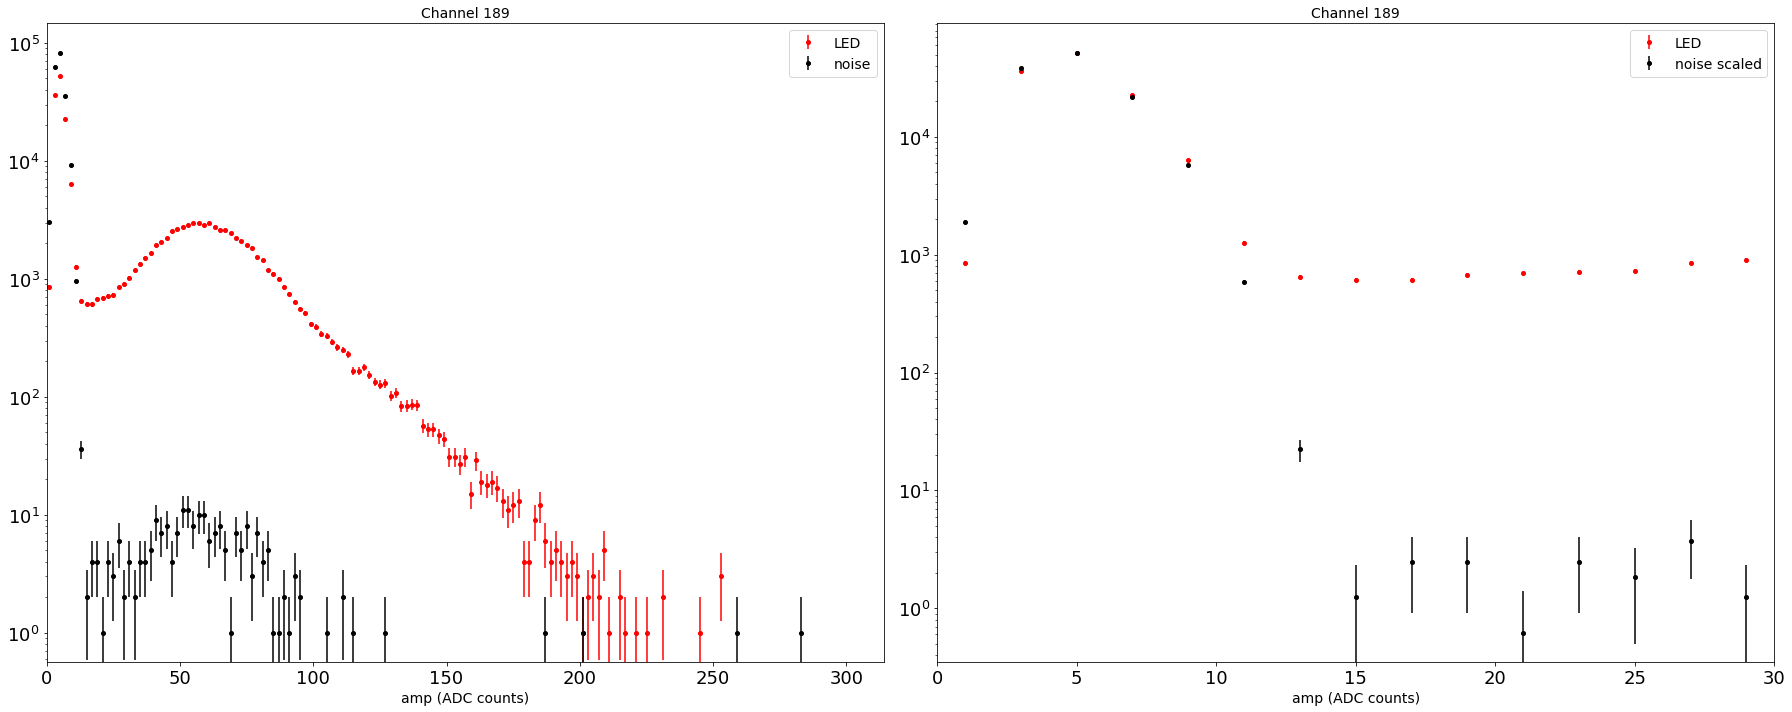

 76%|███████▋  | 190/249 [03:10<01:00,  1.03s/it]

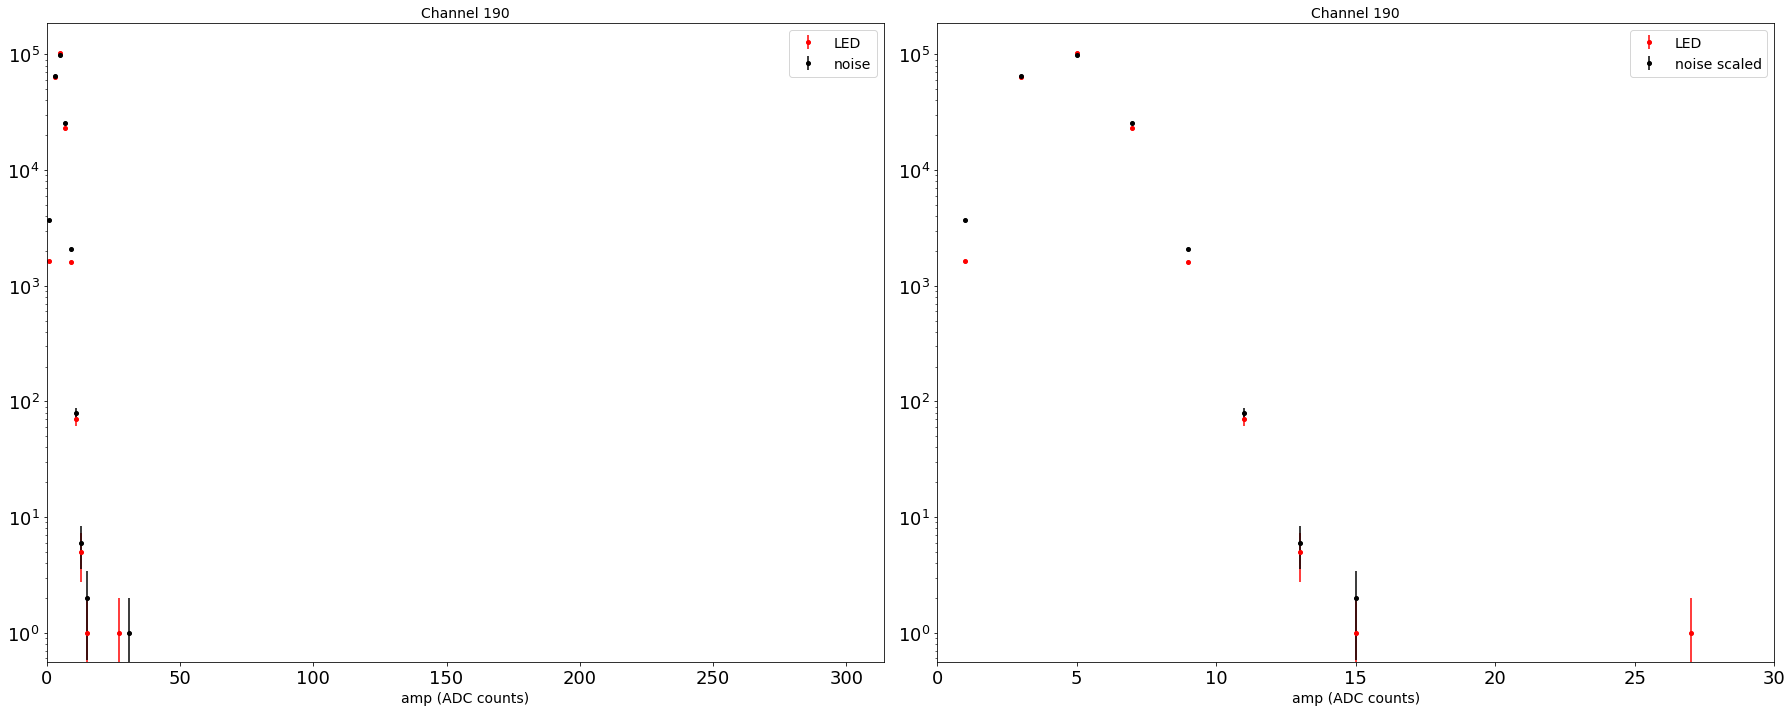

 77%|███████▋  | 191/249 [03:11<00:58,  1.01s/it]

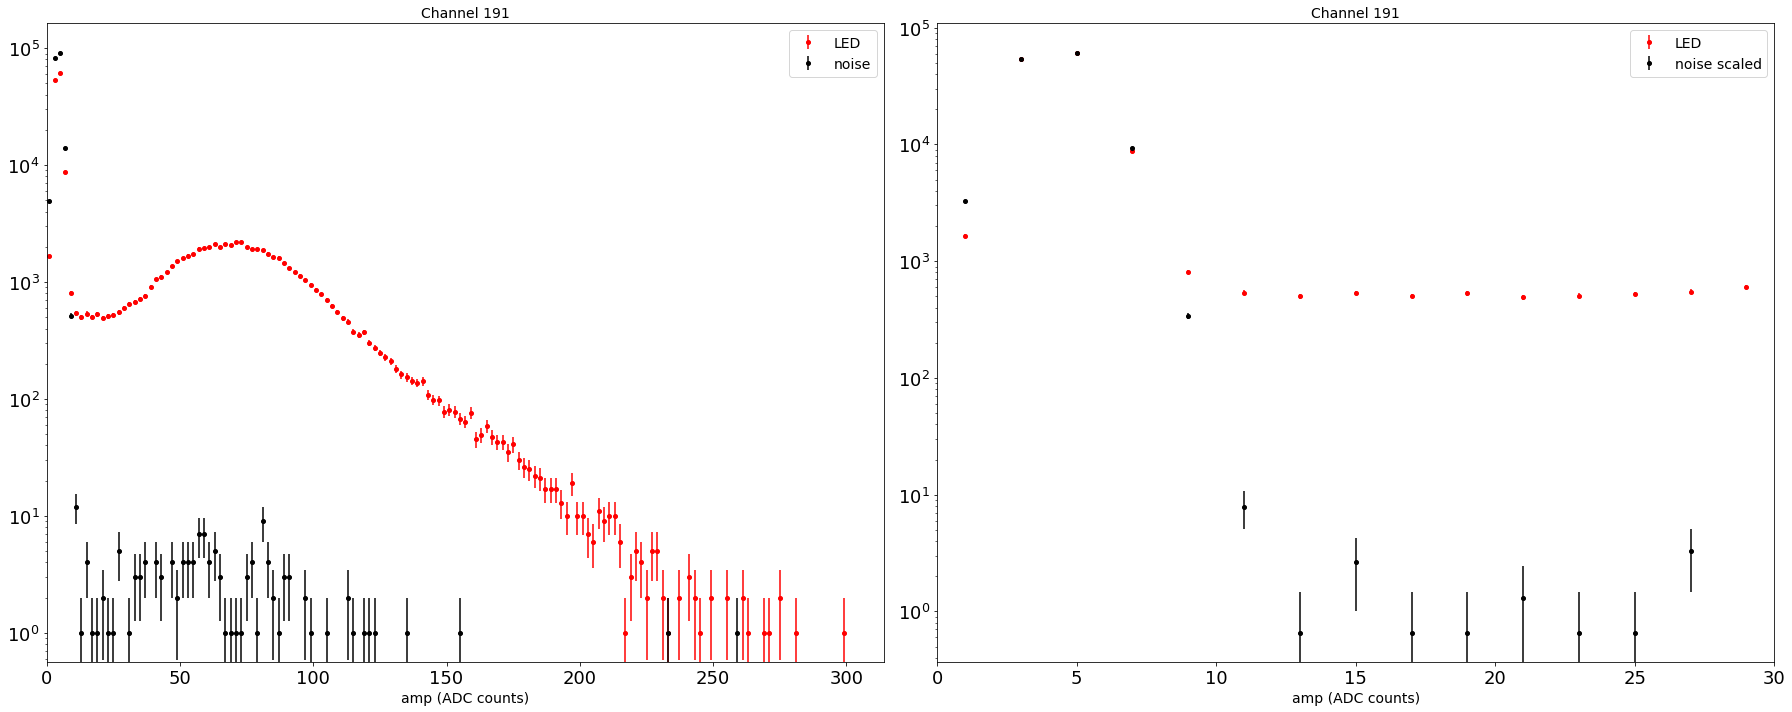

 77%|███████▋  | 192/249 [03:12<00:58,  1.03s/it]

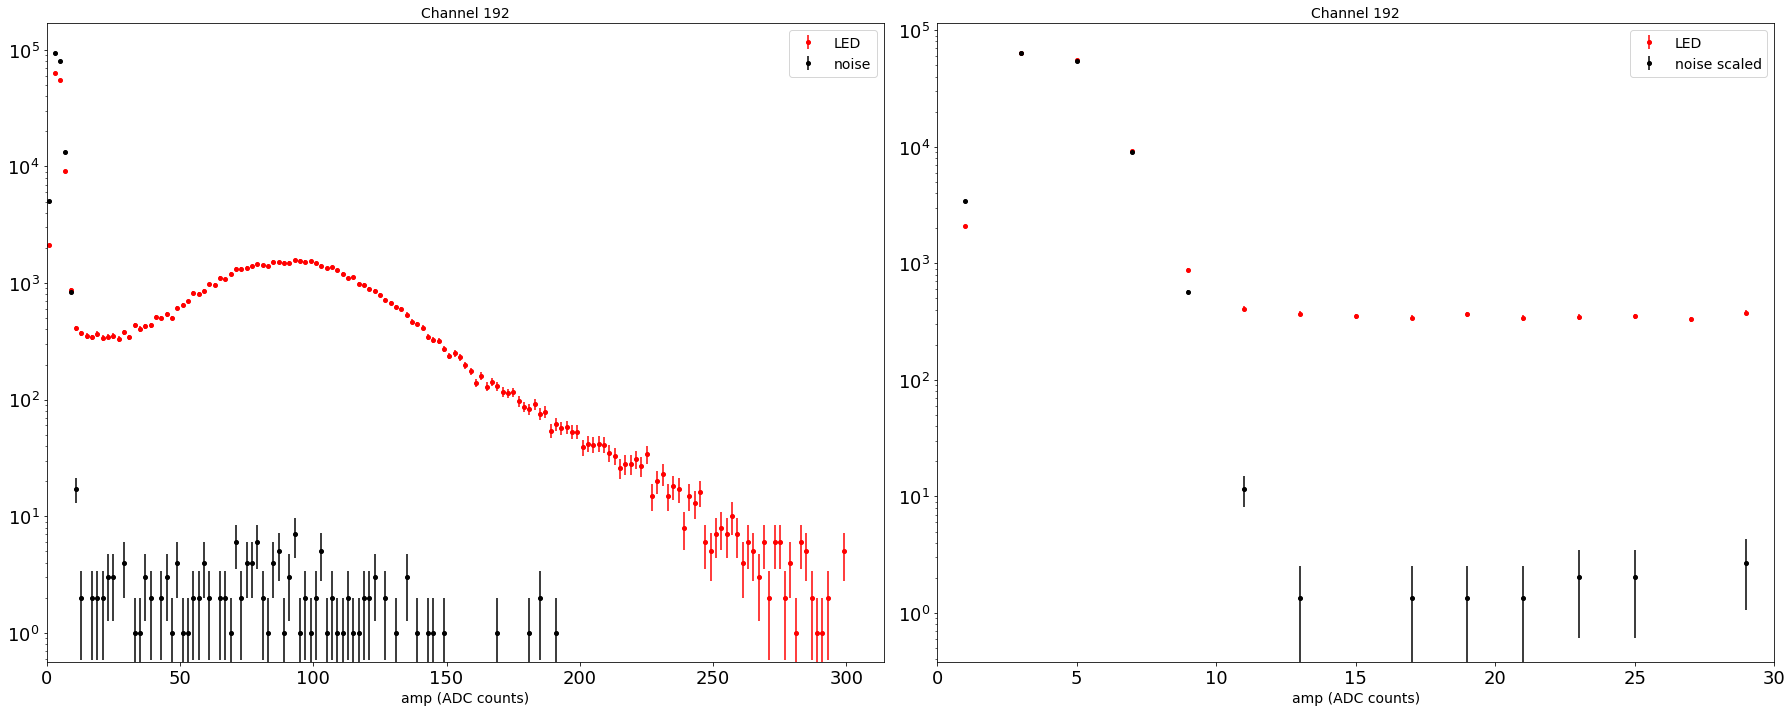

 78%|███████▊  | 193/249 [03:13<00:56,  1.01s/it]

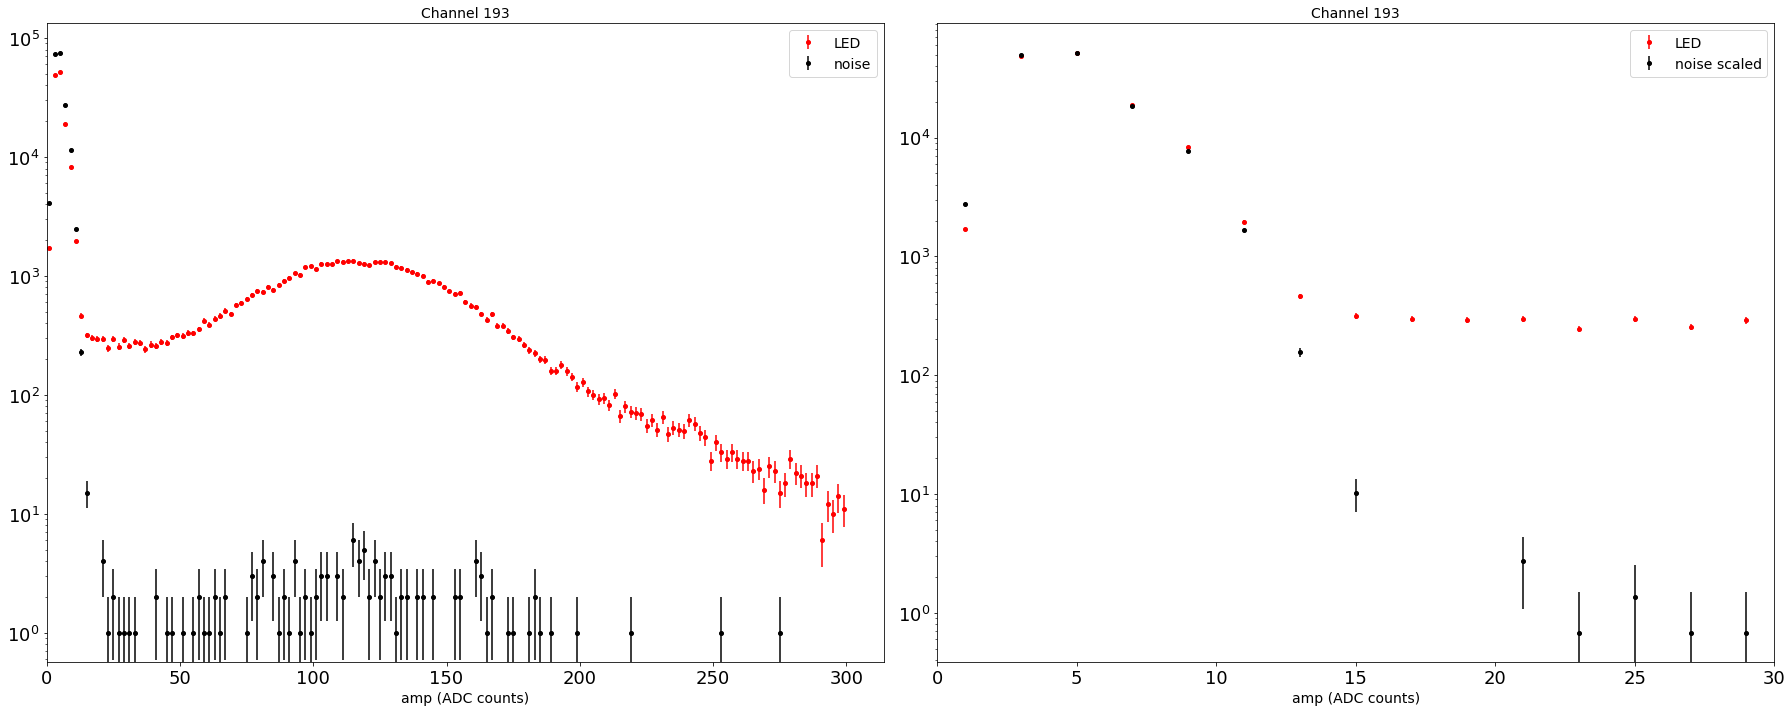

 78%|███████▊  | 194/249 [03:14<00:54,  1.00it/s]

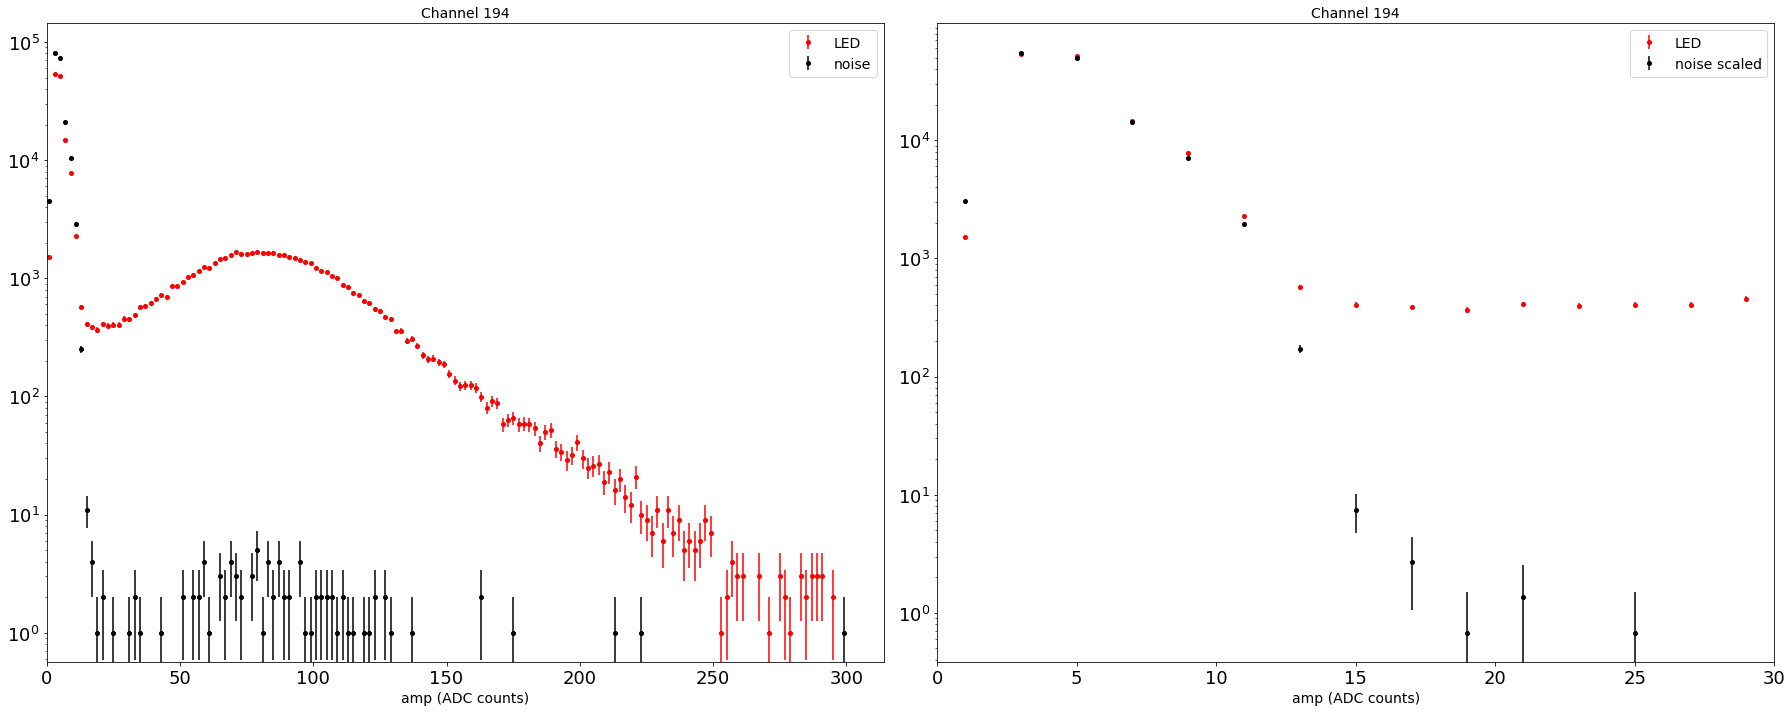

 78%|███████▊  | 195/249 [03:15<00:53,  1.01it/s]

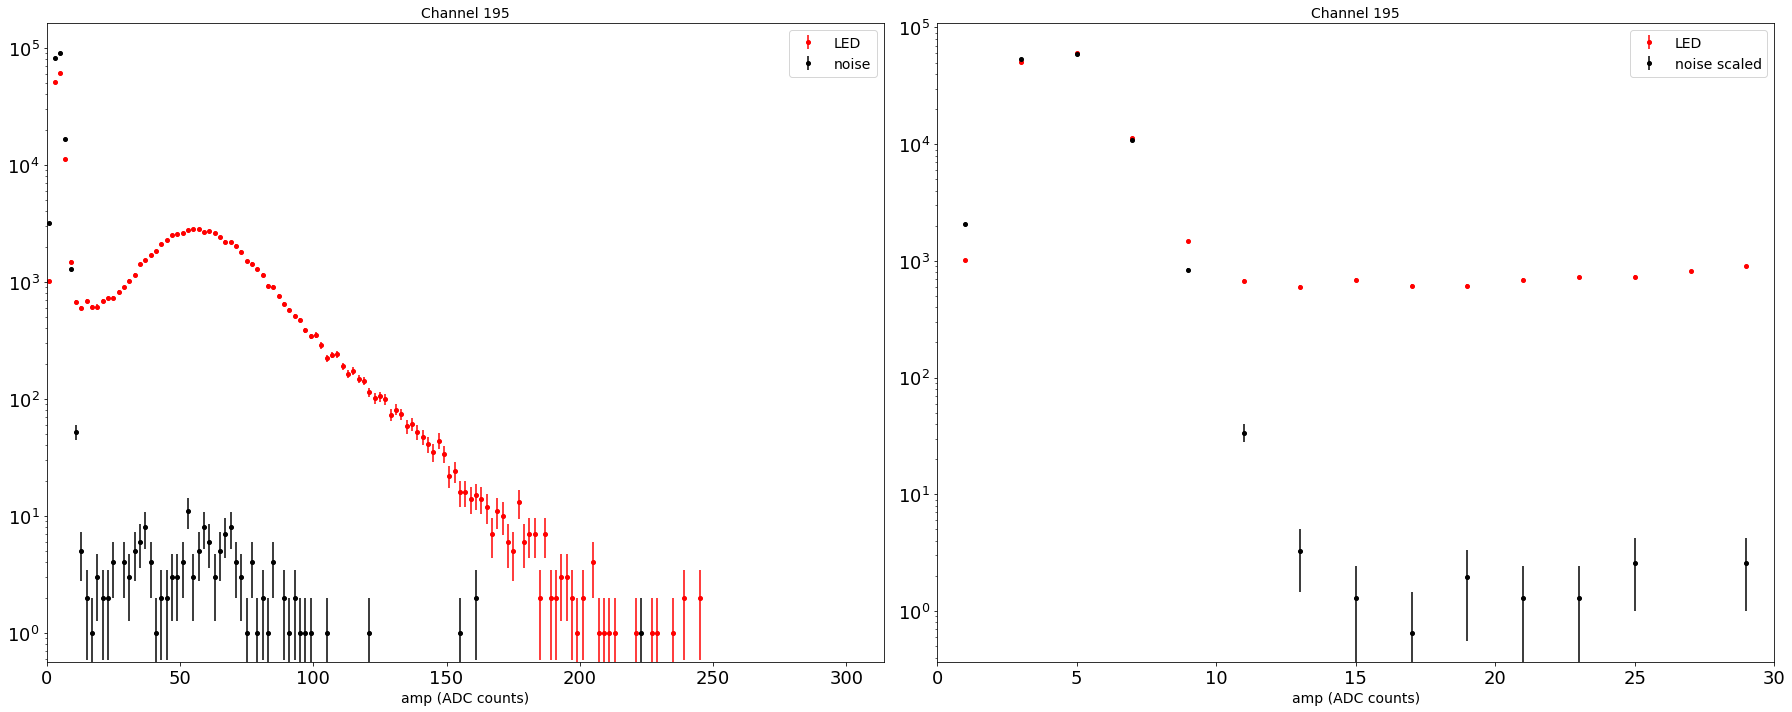

 79%|███████▊  | 196/249 [03:16<00:54,  1.02s/it]

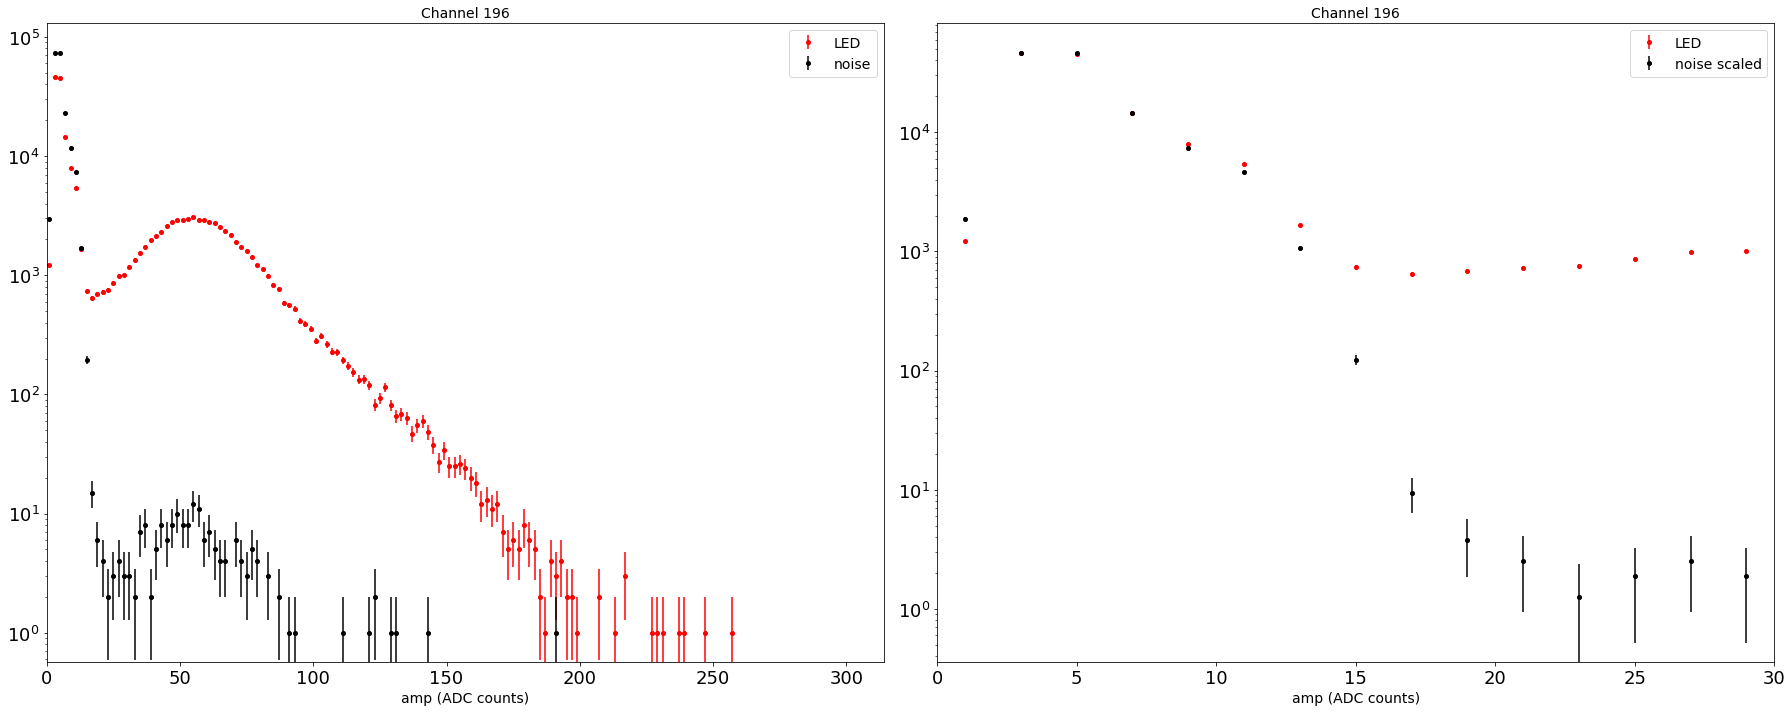

 79%|███████▉  | 197/249 [03:17<00:52,  1.01s/it]

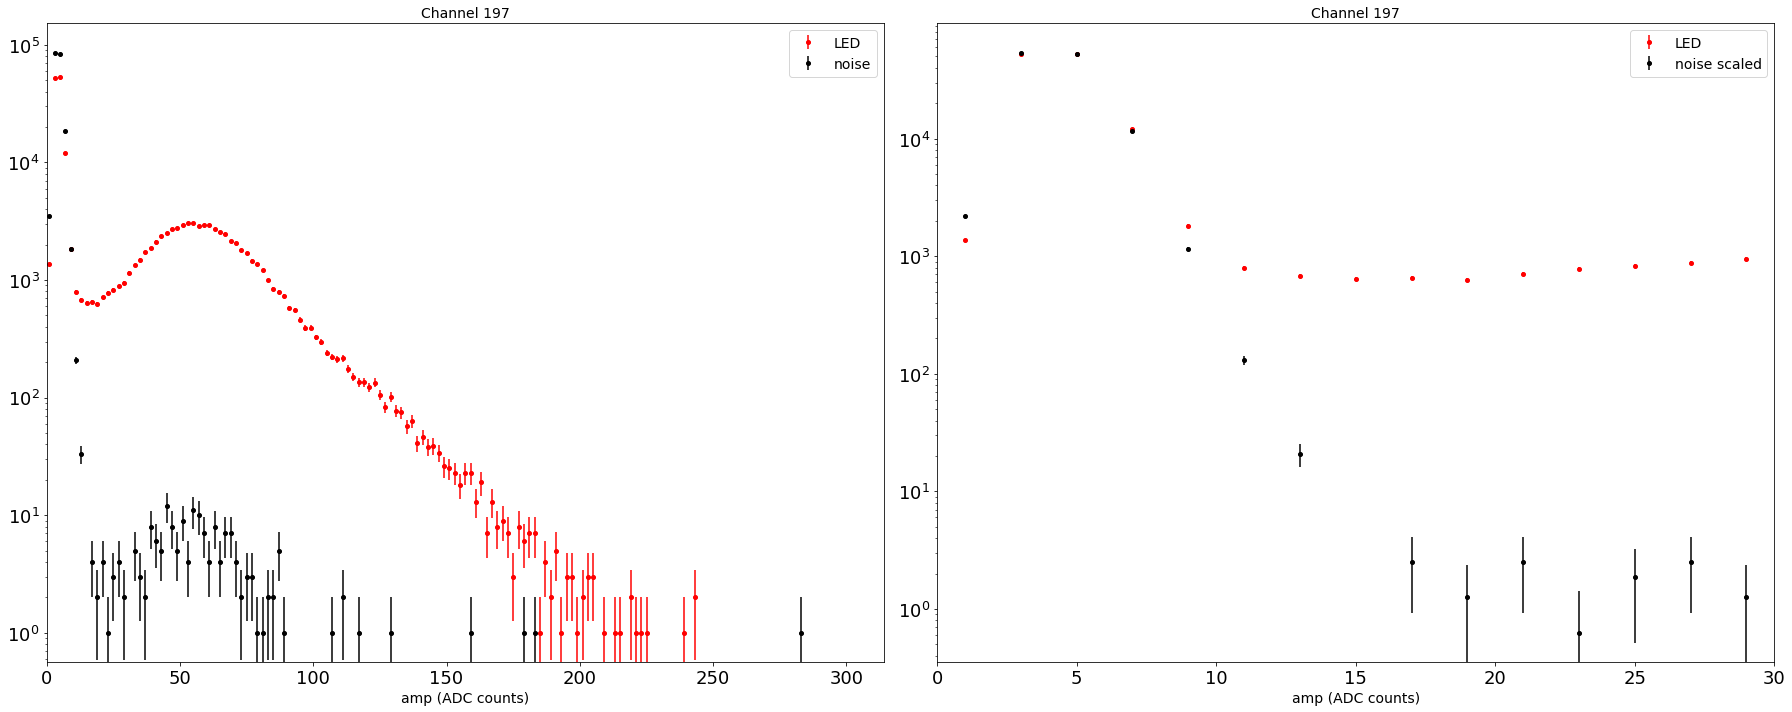

 80%|███████▉  | 198/249 [03:18<00:51,  1.00s/it]

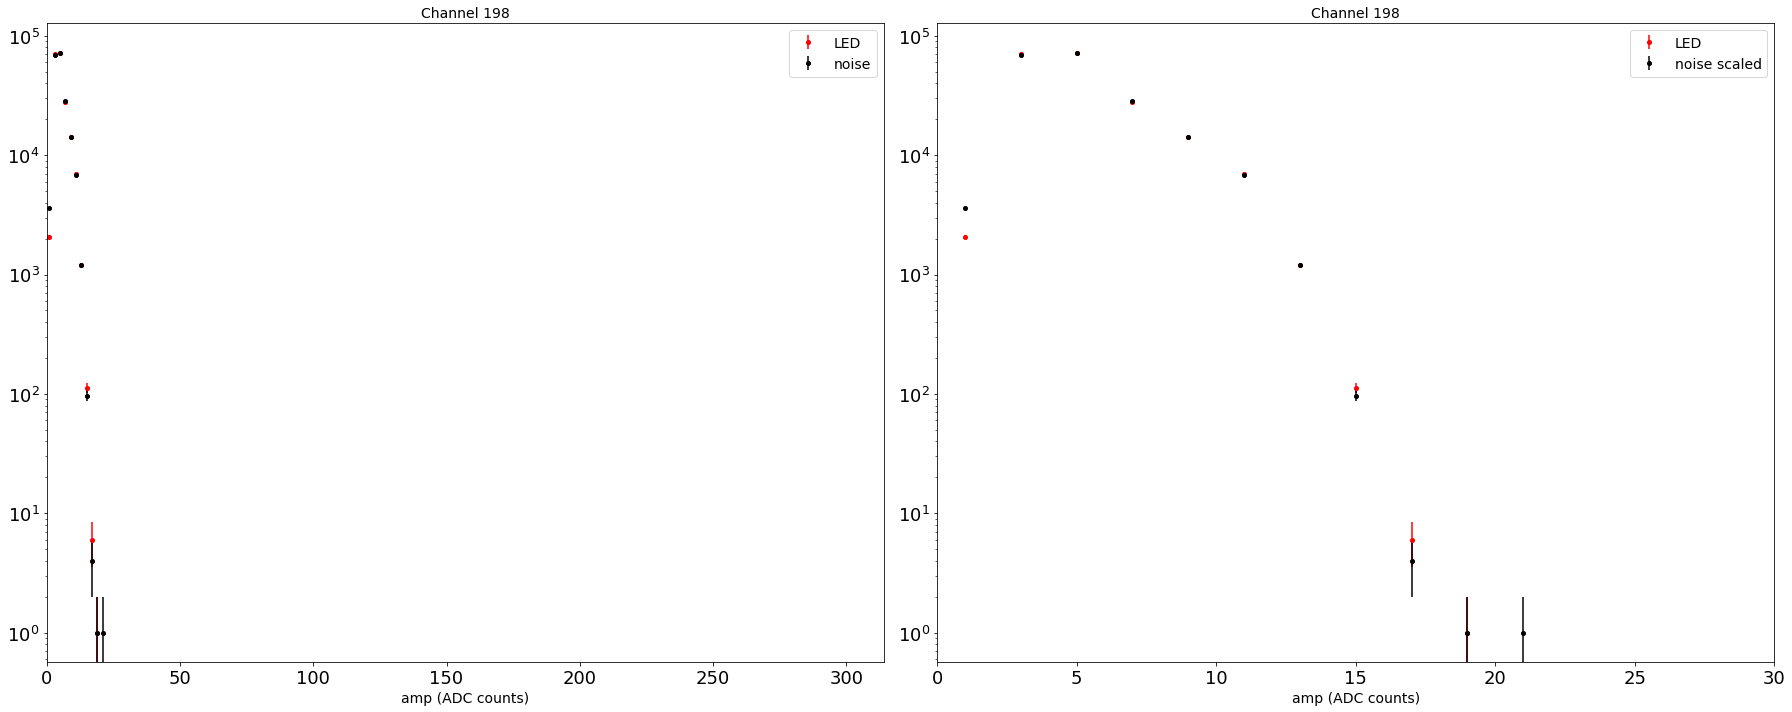

 80%|███████▉  | 199/249 [03:19<00:49,  1.01it/s]

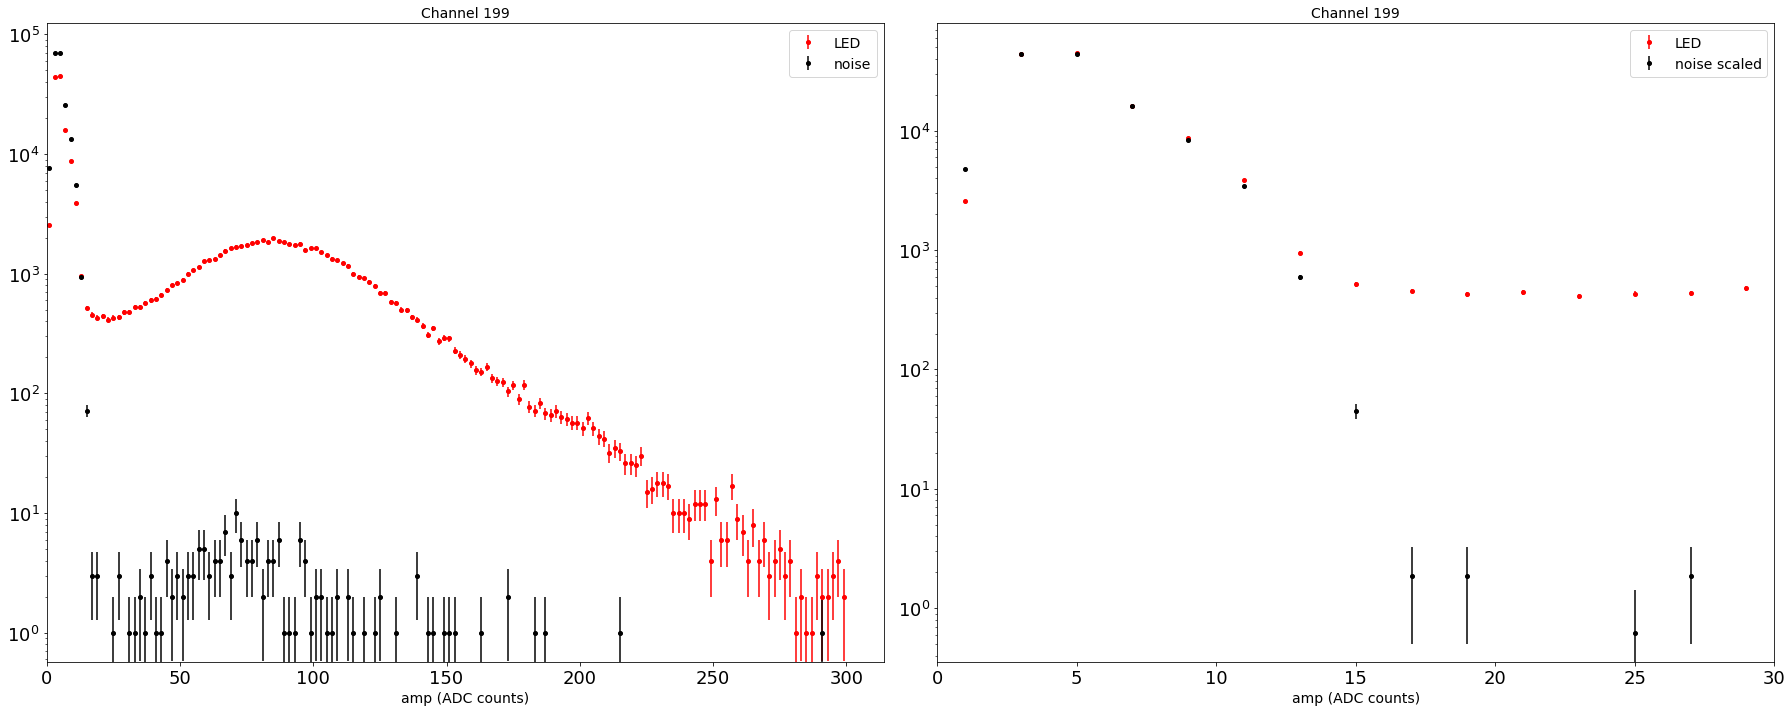

 80%|████████  | 200/249 [03:20<00:50,  1.02s/it]

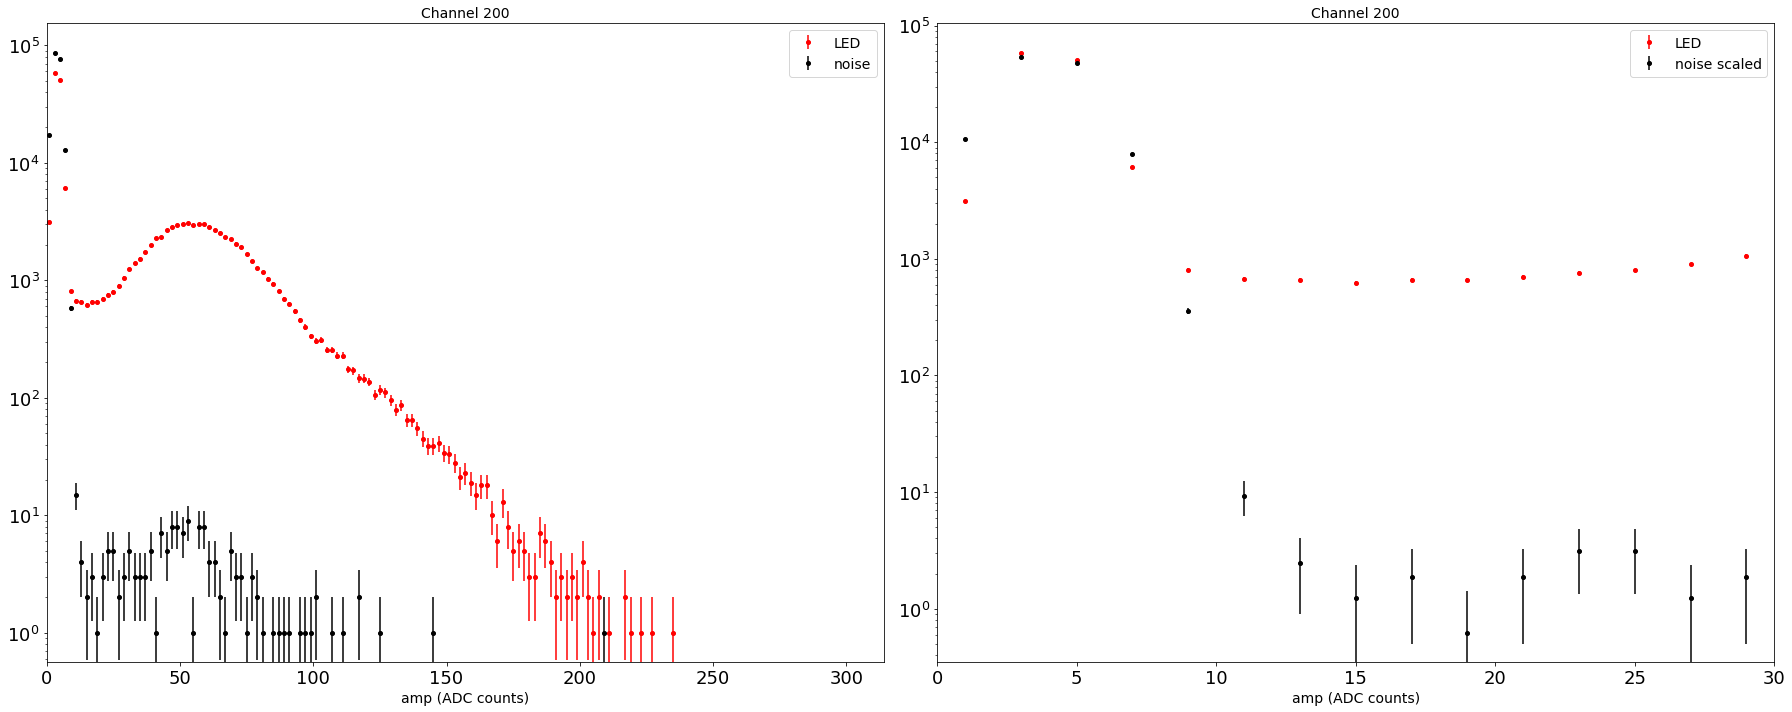

 81%|████████  | 201/249 [03:21<00:48,  1.01s/it]

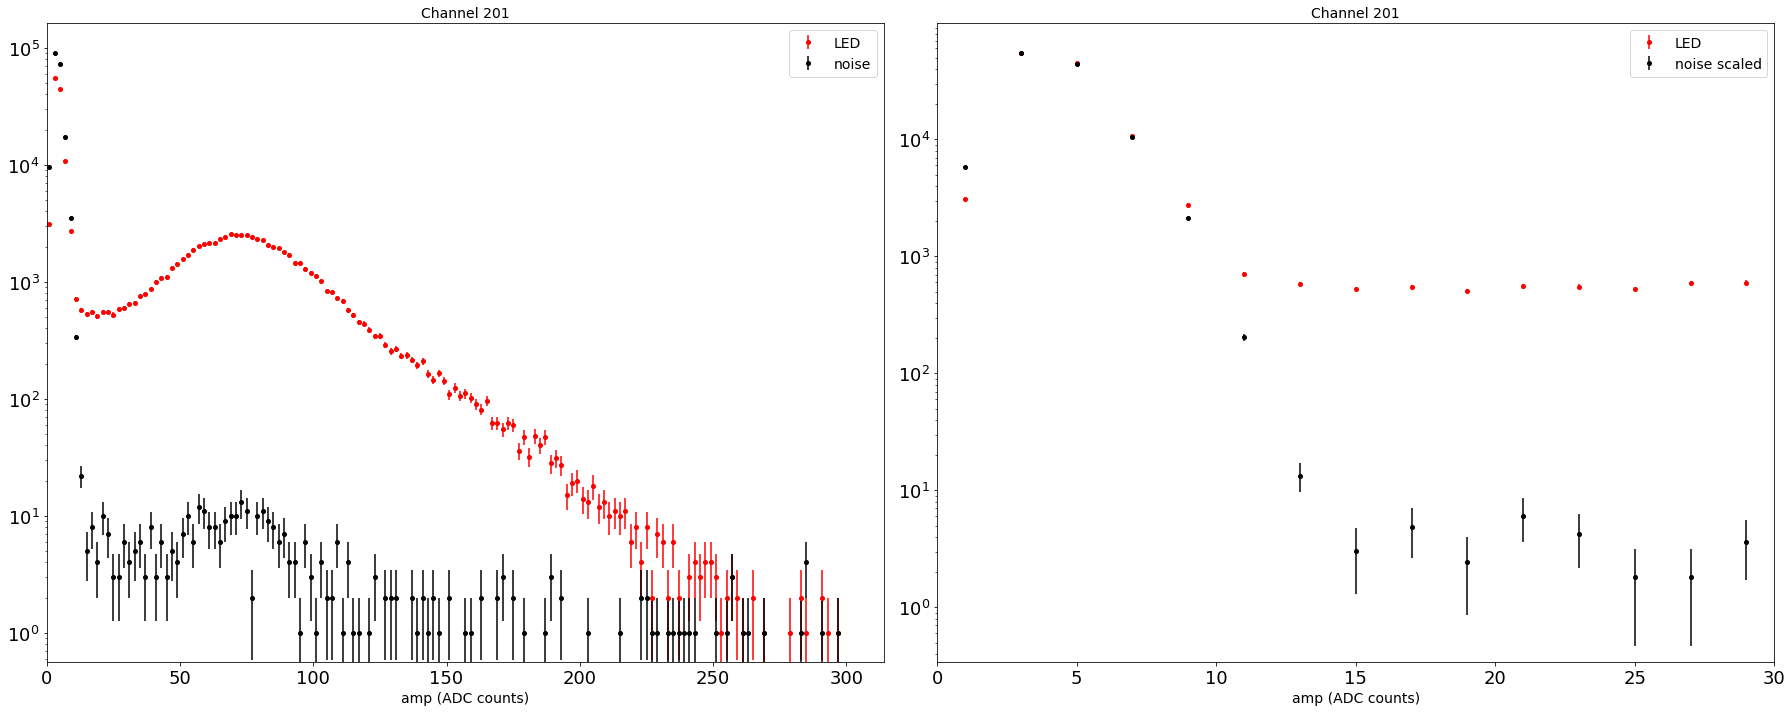

 81%|████████  | 202/249 [03:22<00:46,  1.00it/s]

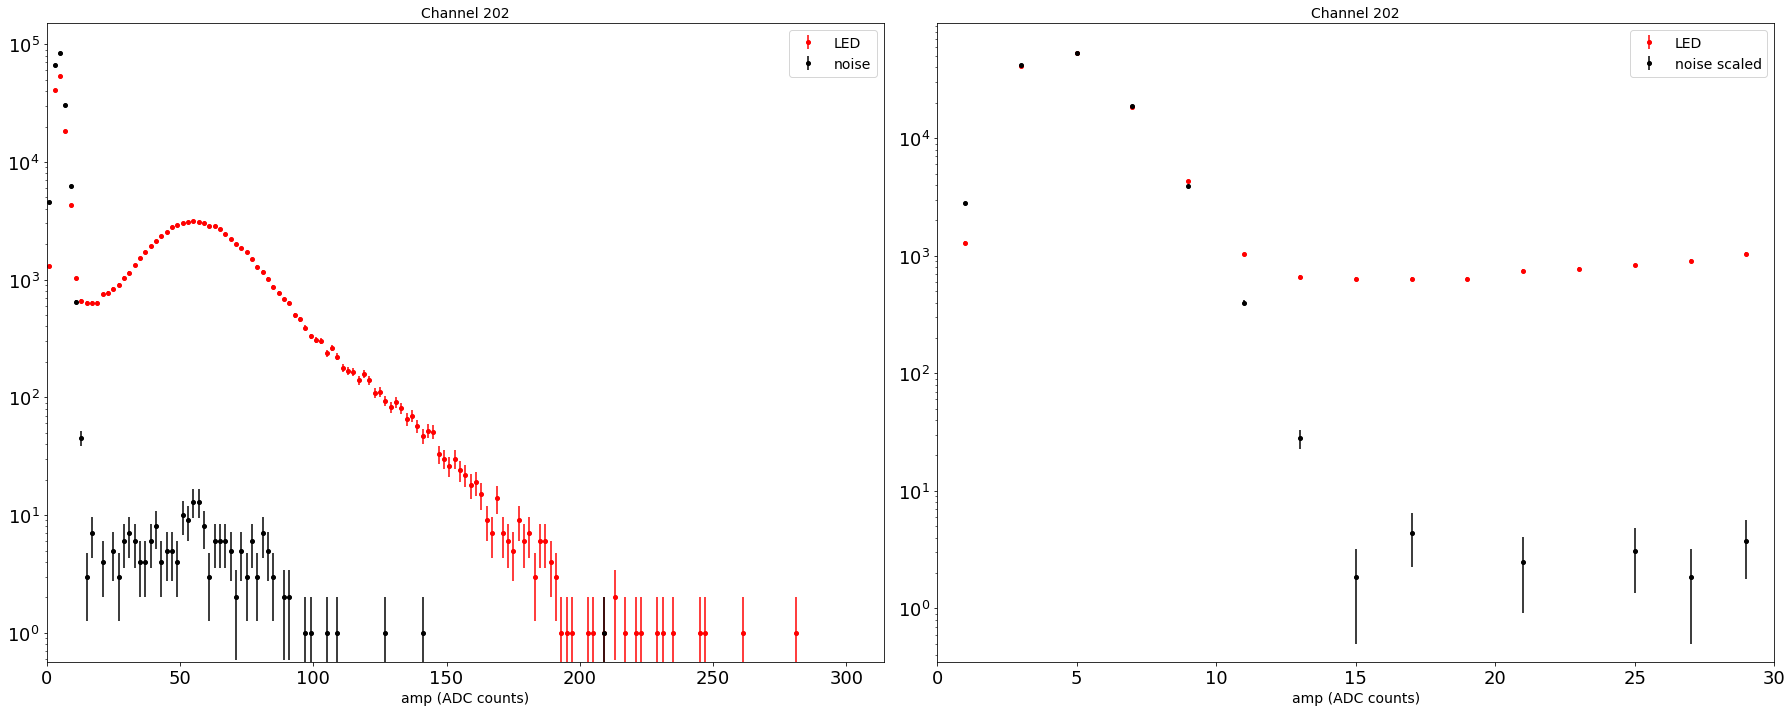

 82%|████████▏ | 203/249 [03:23<00:45,  1.01it/s]

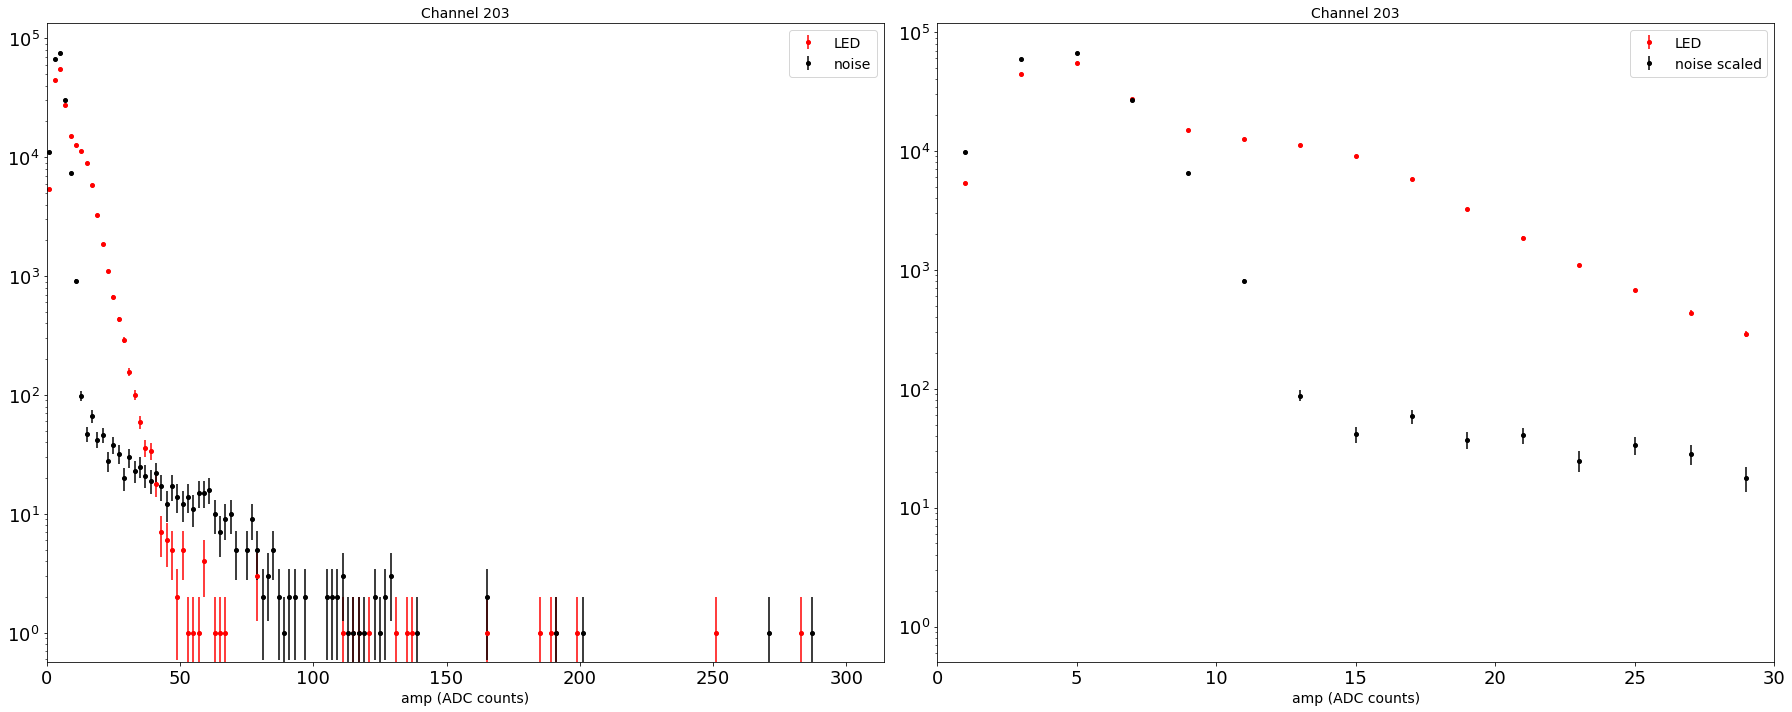

 82%|████████▏ | 204/249 [03:24<00:46,  1.02s/it]

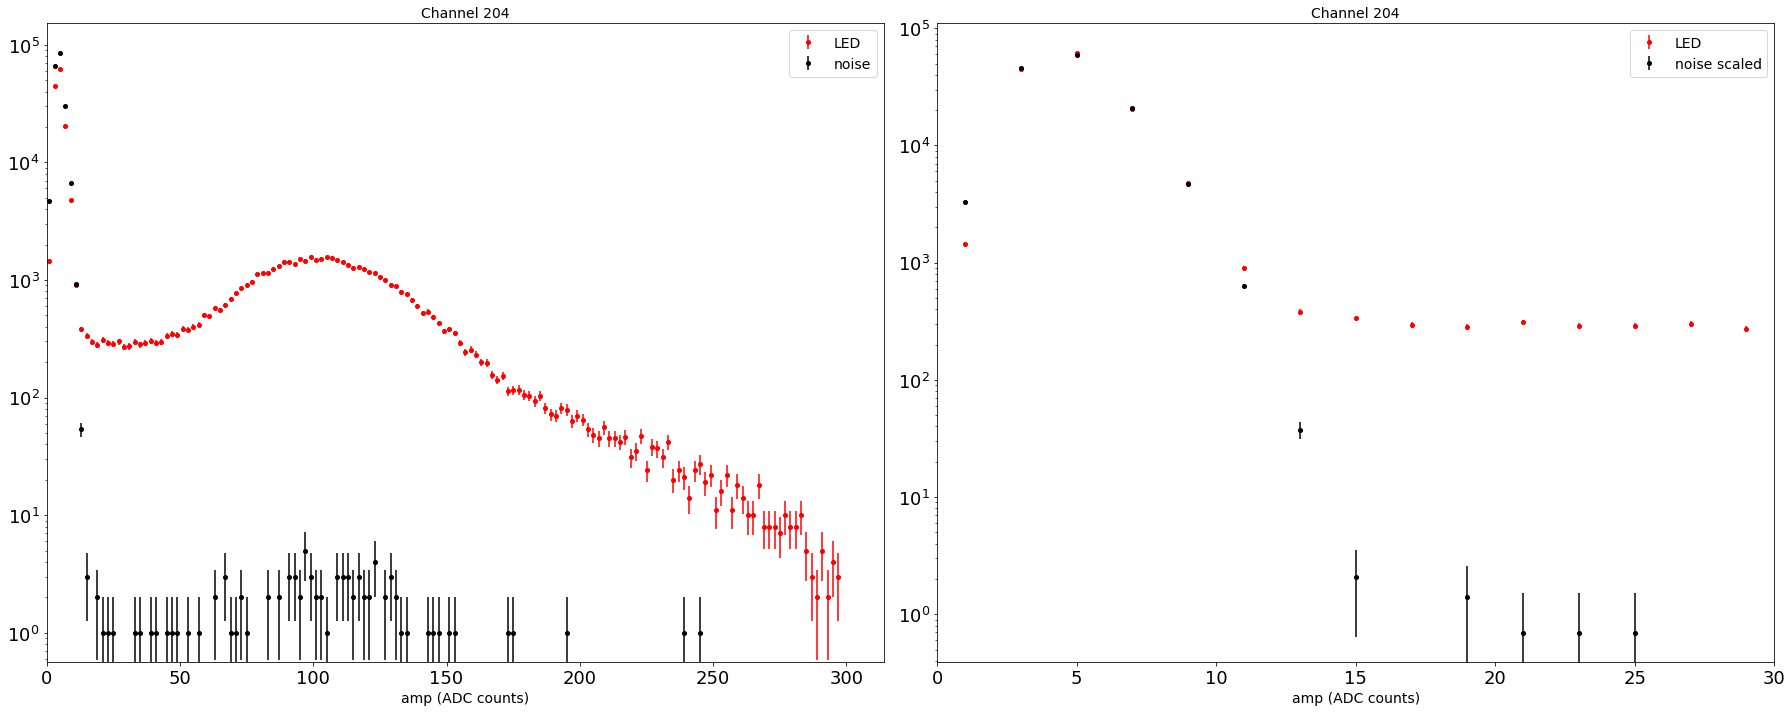

 82%|████████▏ | 205/249 [03:25<00:44,  1.01s/it]

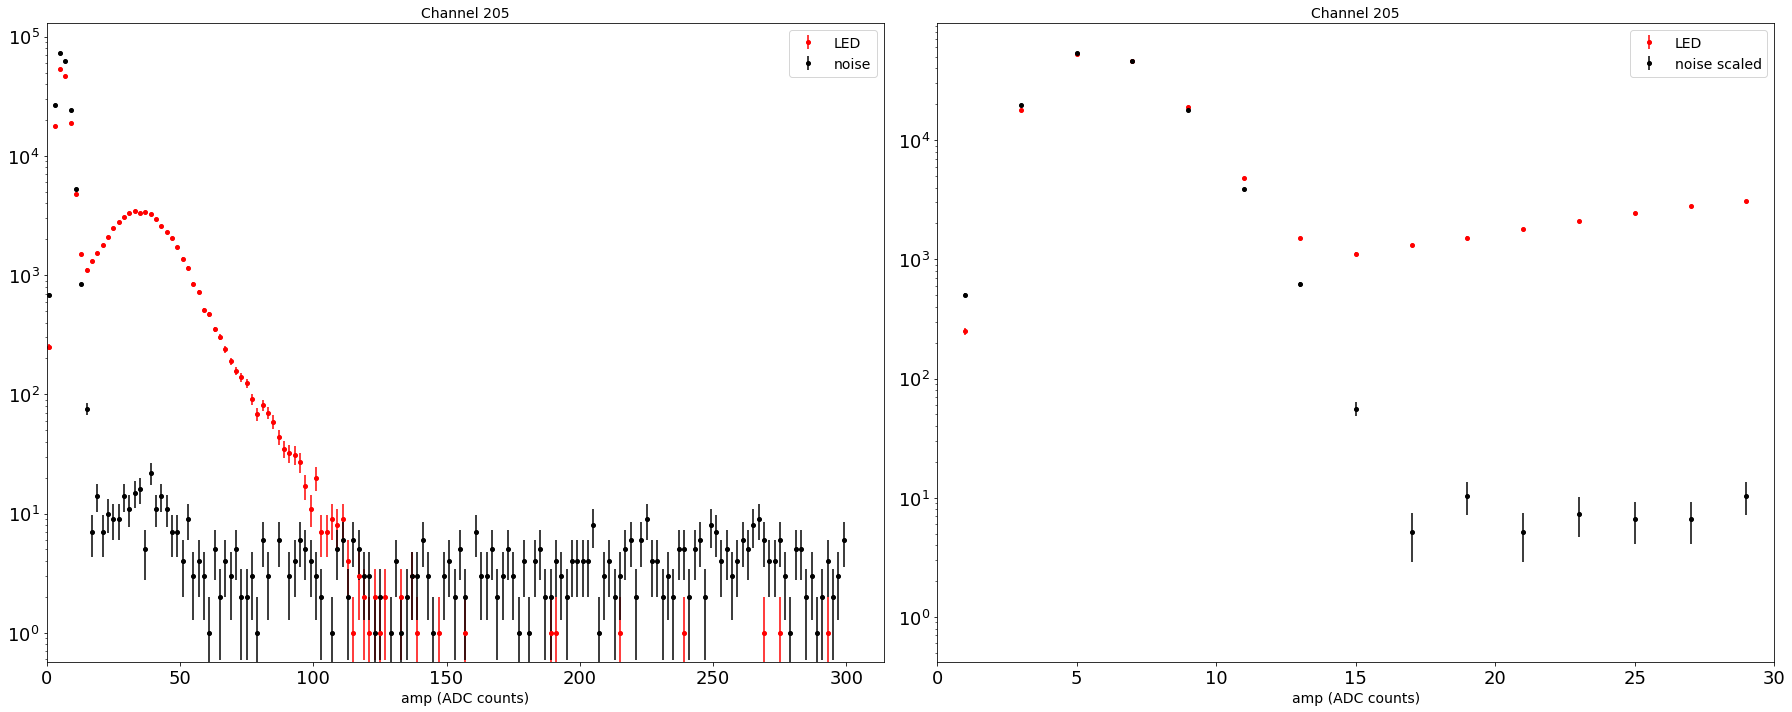

 83%|████████▎ | 206/249 [03:26<00:43,  1.00s/it]

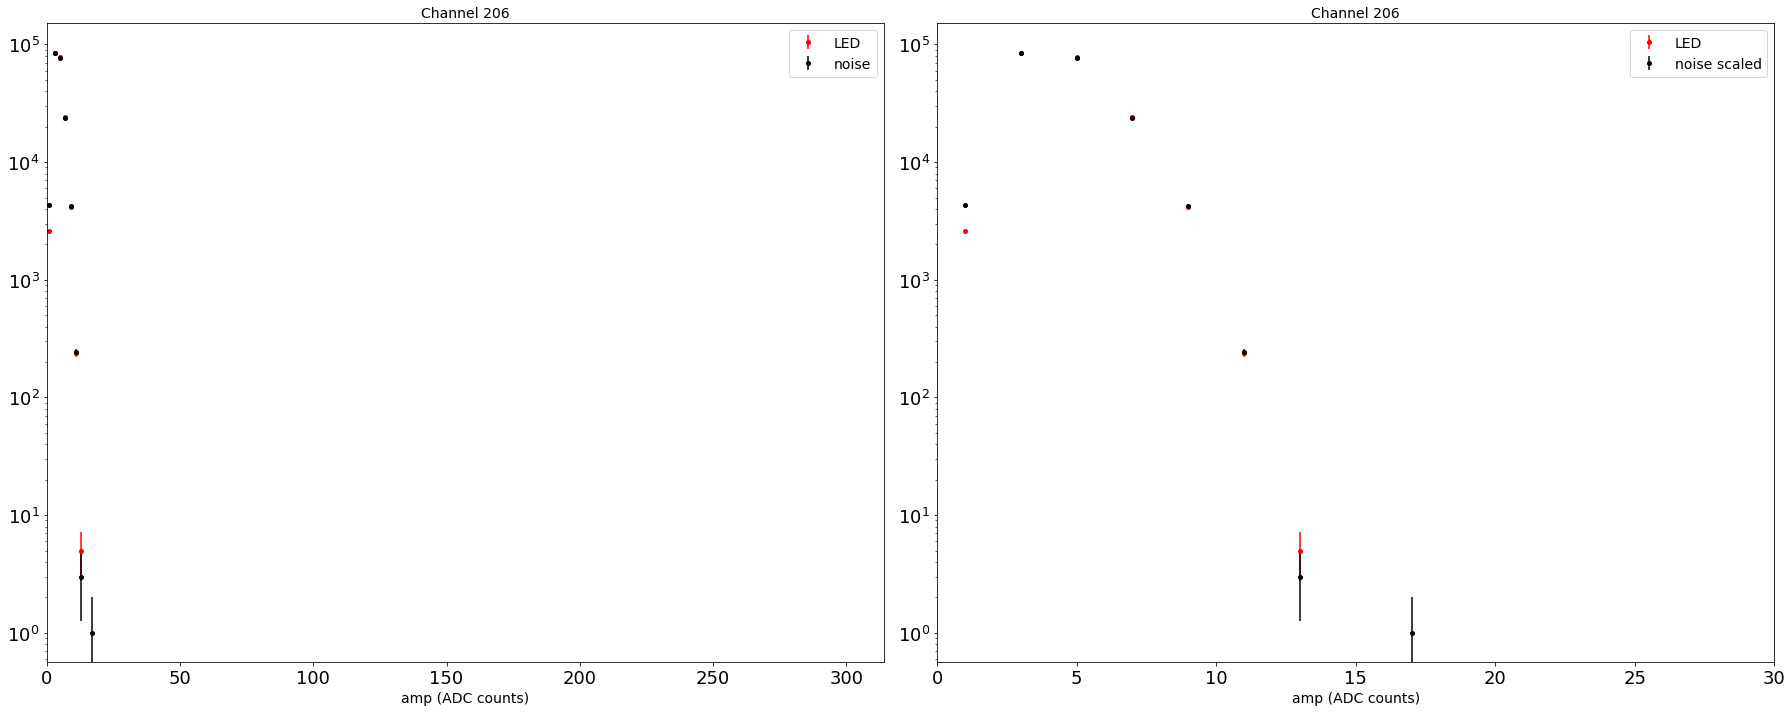

 83%|████████▎ | 207/249 [03:27<00:41,  1.00it/s]

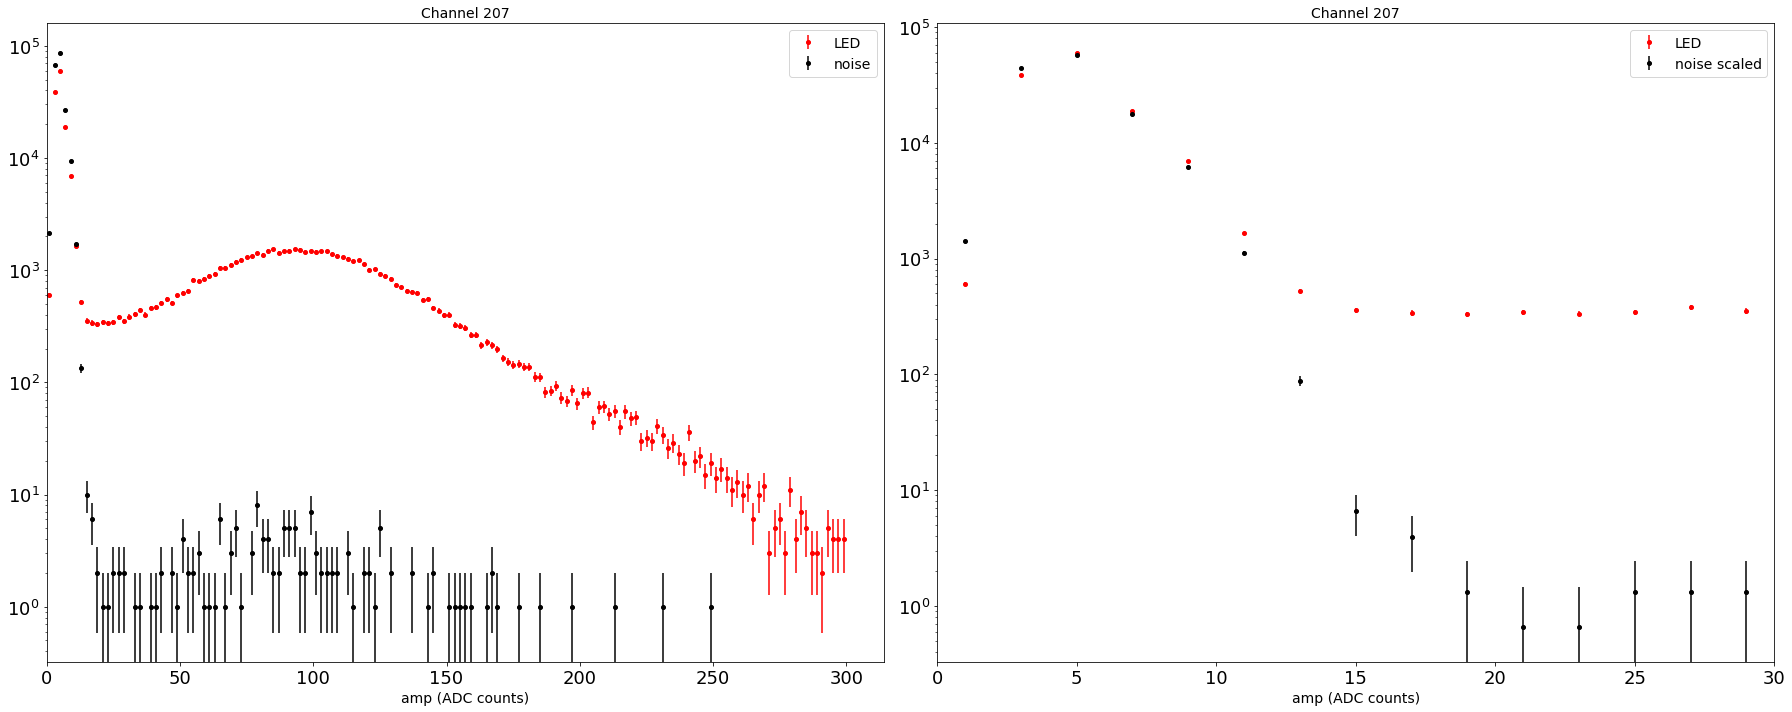

 84%|████████▎ | 208/249 [03:28<00:42,  1.03s/it]

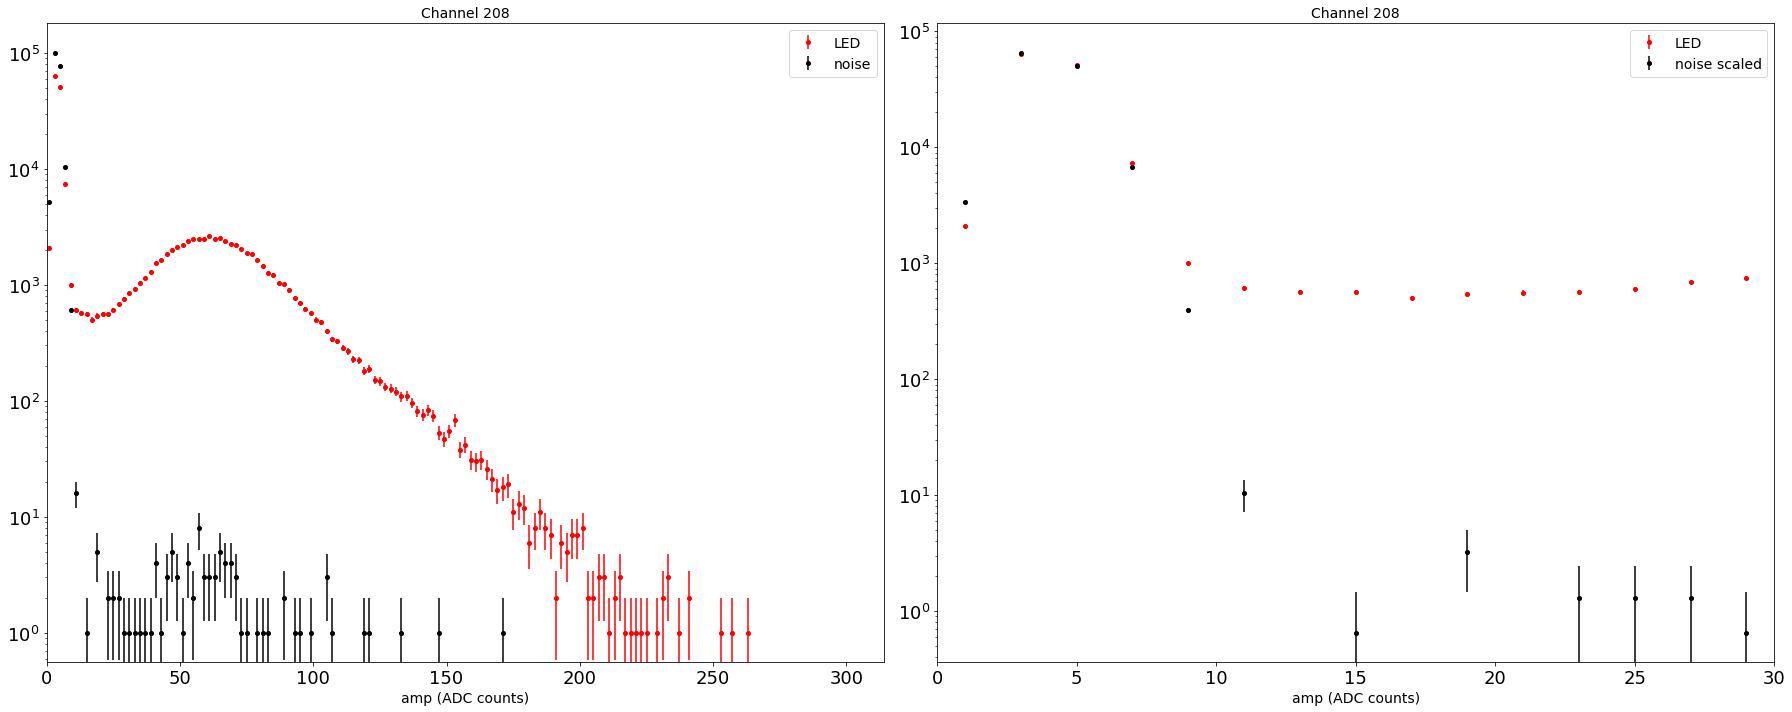

 84%|████████▍ | 209/249 [03:29<00:40,  1.01s/it]

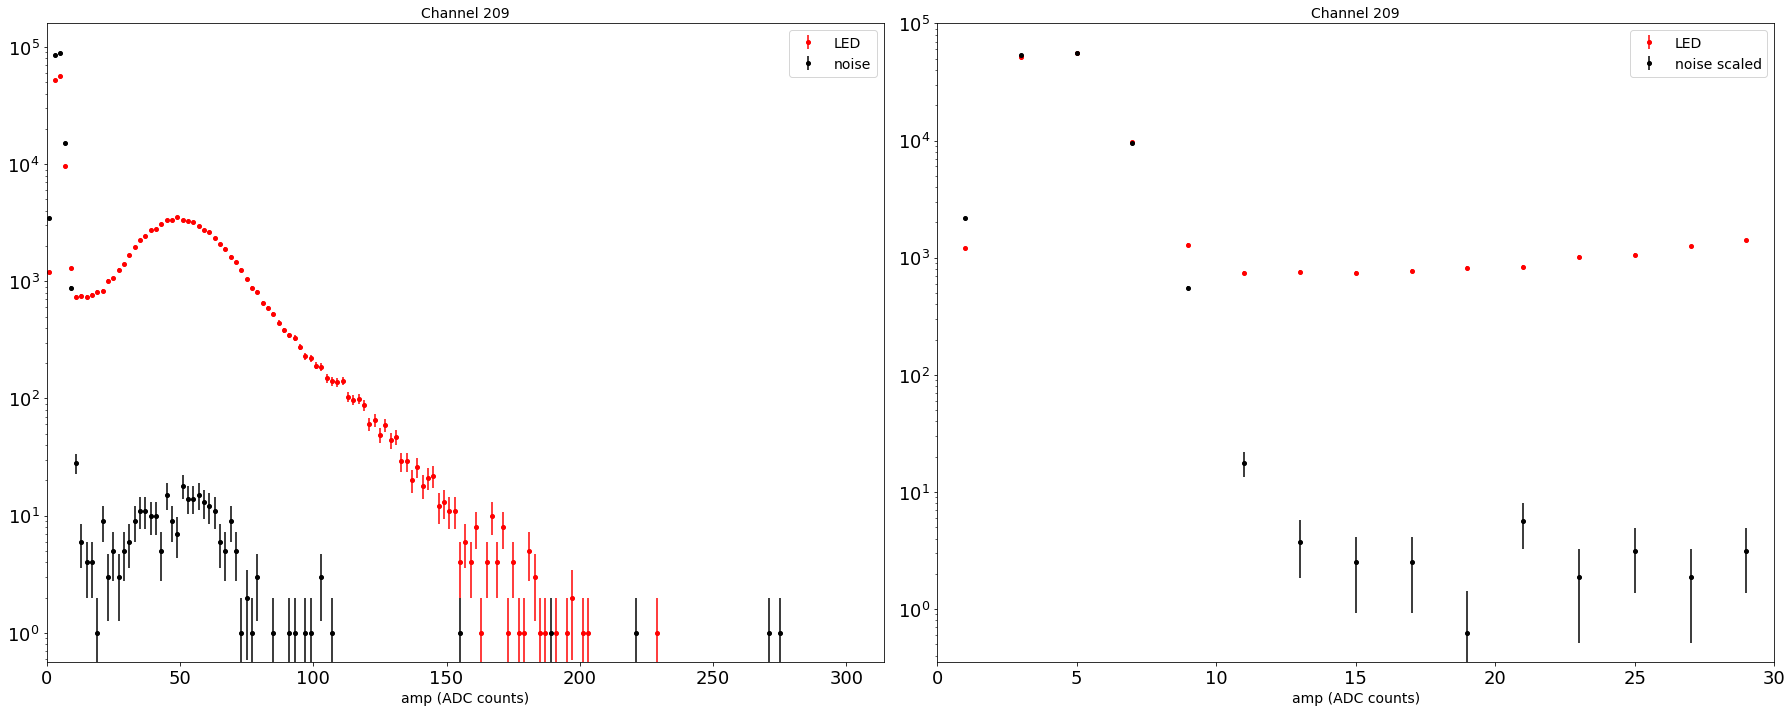

 84%|████████▍ | 210/249 [03:30<00:39,  1.00s/it]

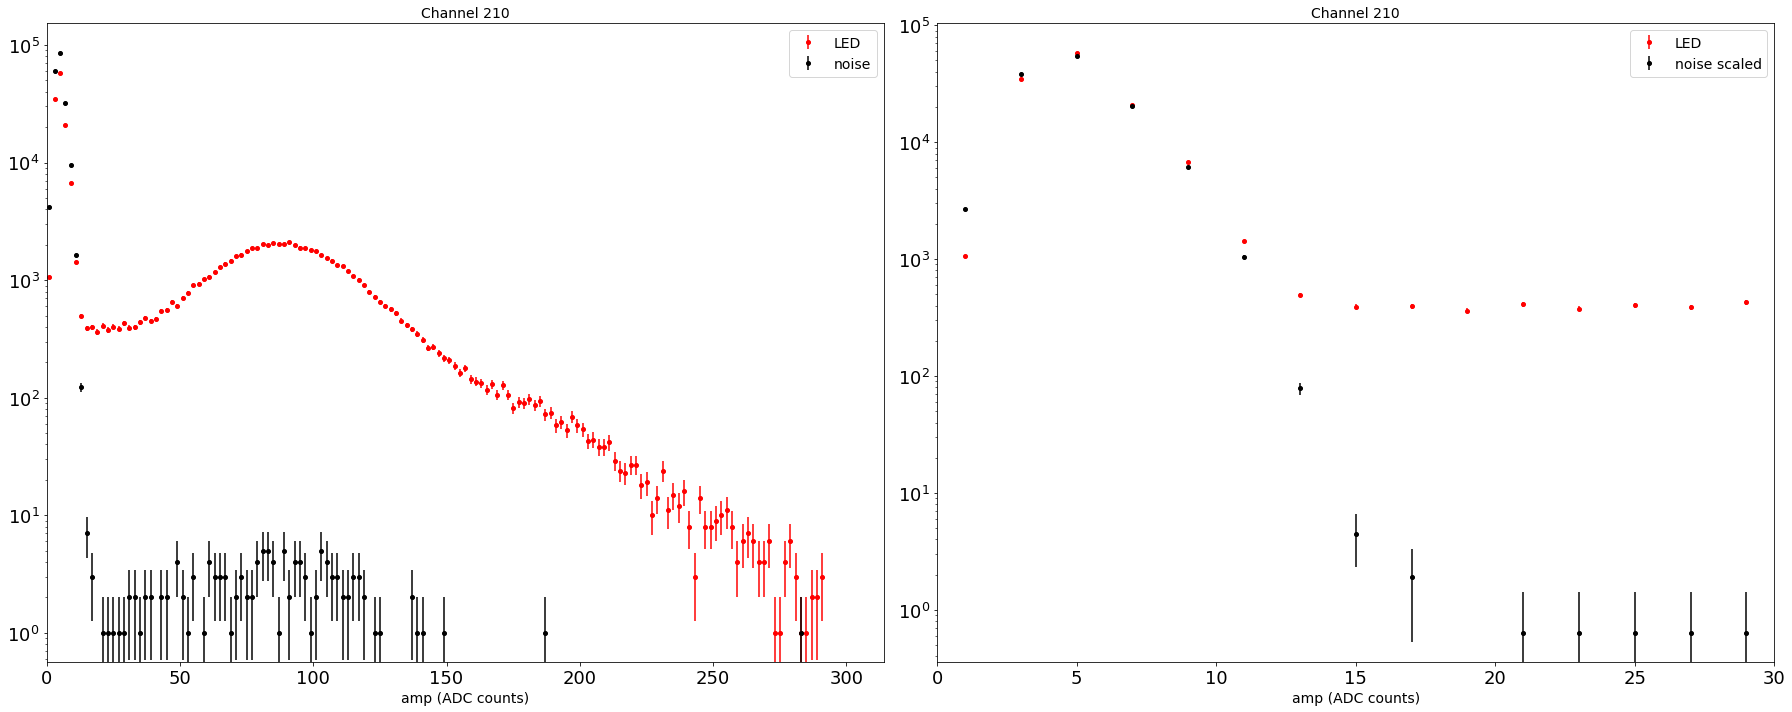

 85%|████████▍ | 211/249 [03:31<00:37,  1.01it/s]

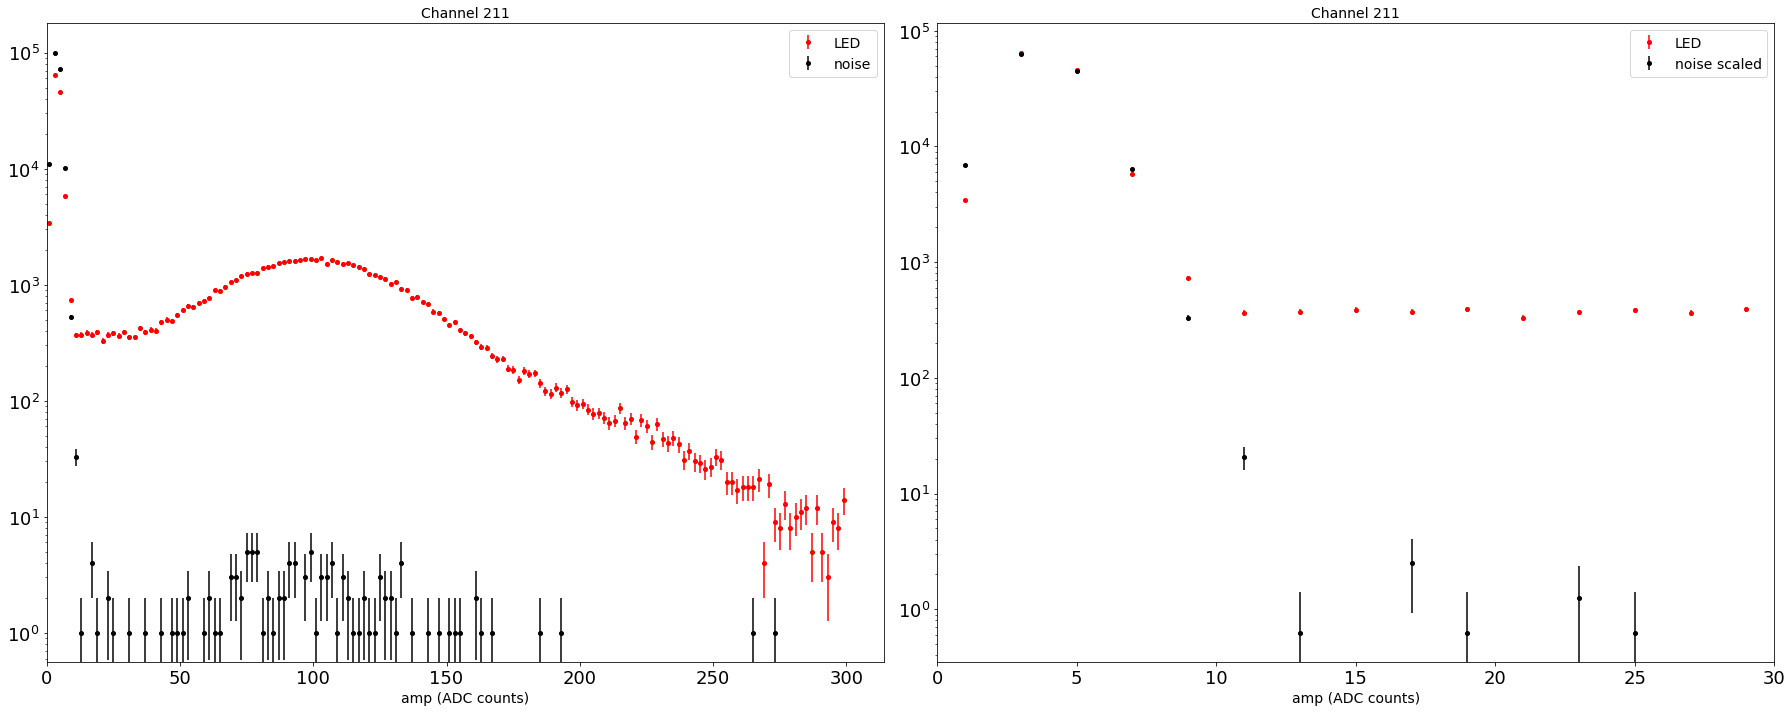

 85%|████████▌ | 212/249 [03:32<00:37,  1.02s/it]

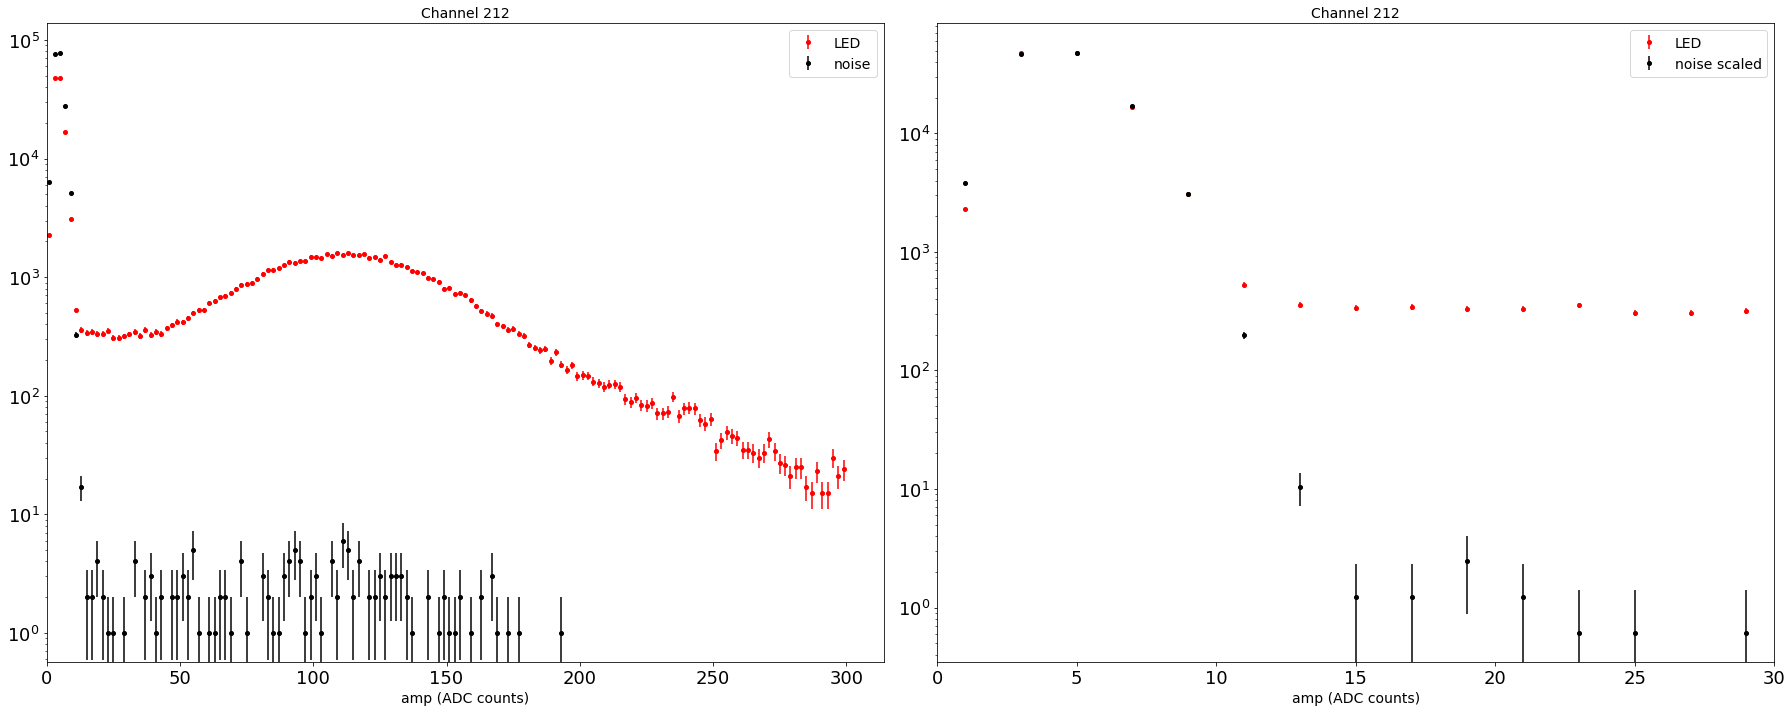

 86%|████████▌ | 213/249 [03:33<00:36,  1.01s/it]

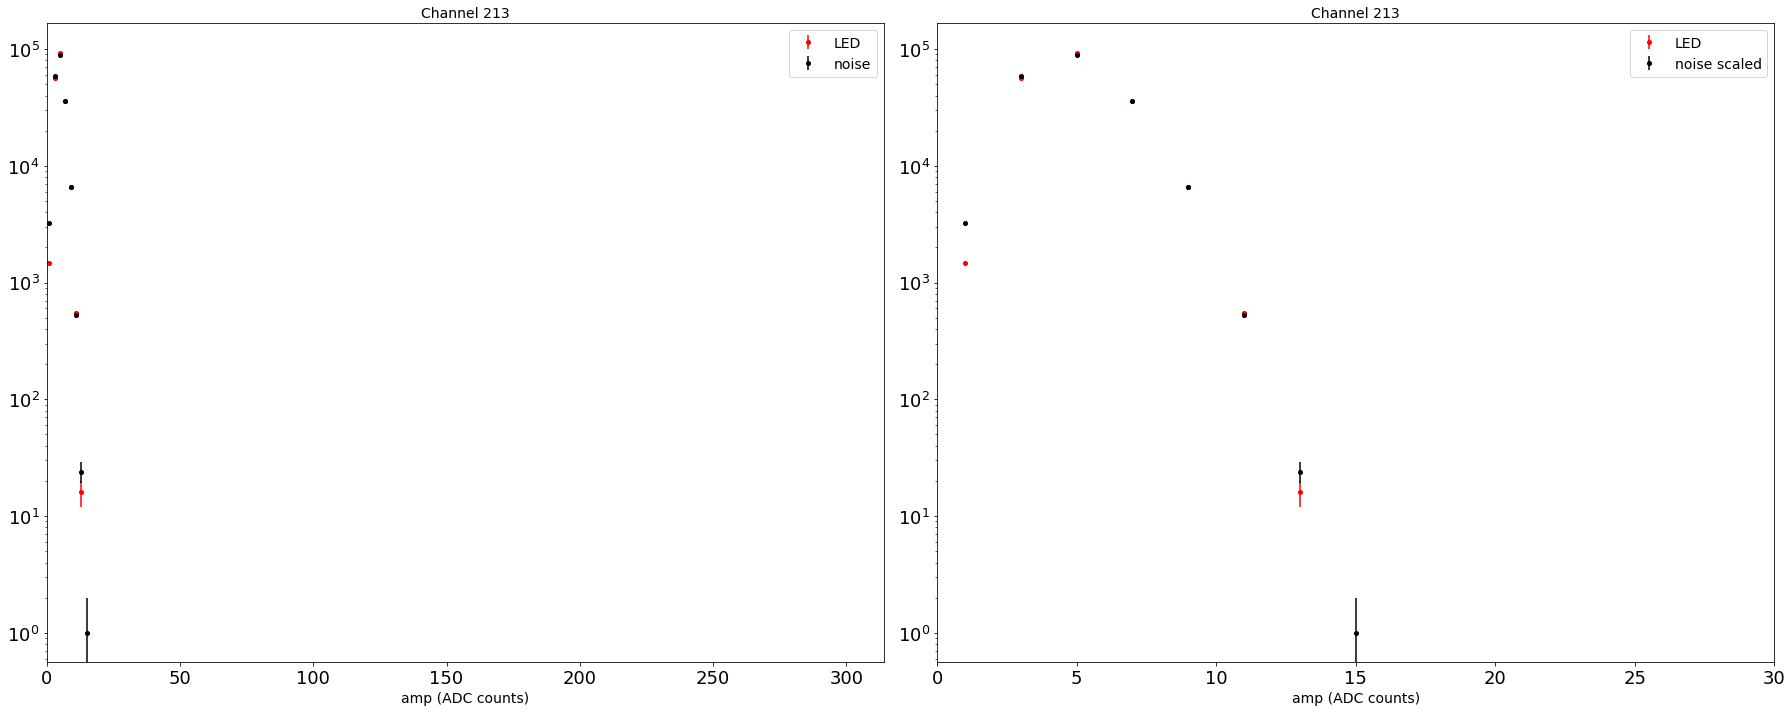

 86%|████████▌ | 214/249 [03:34<00:35,  1.00s/it]

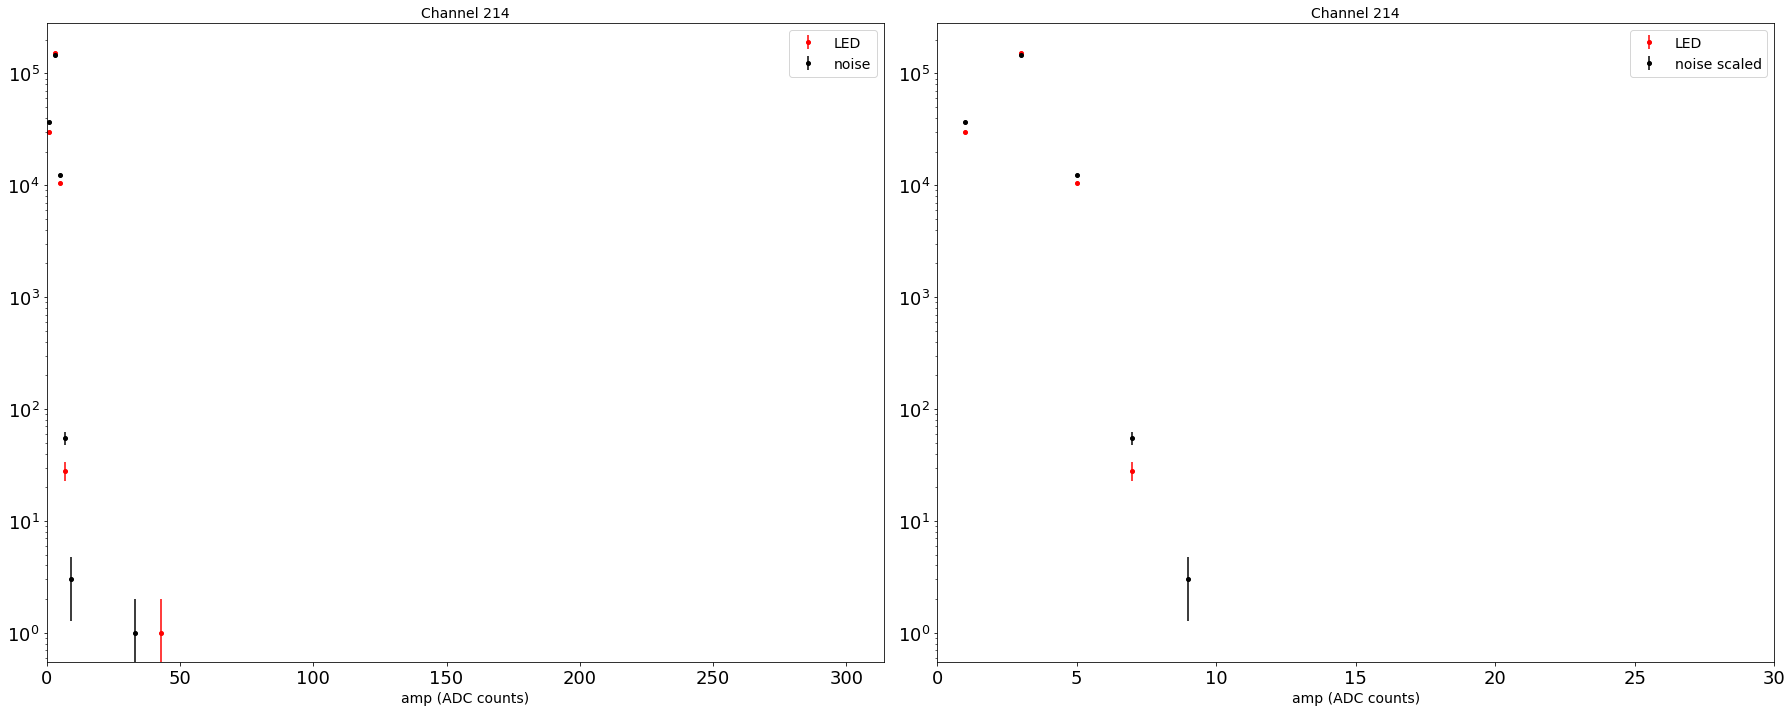

 86%|████████▋ | 215/249 [03:35<00:34,  1.03s/it]

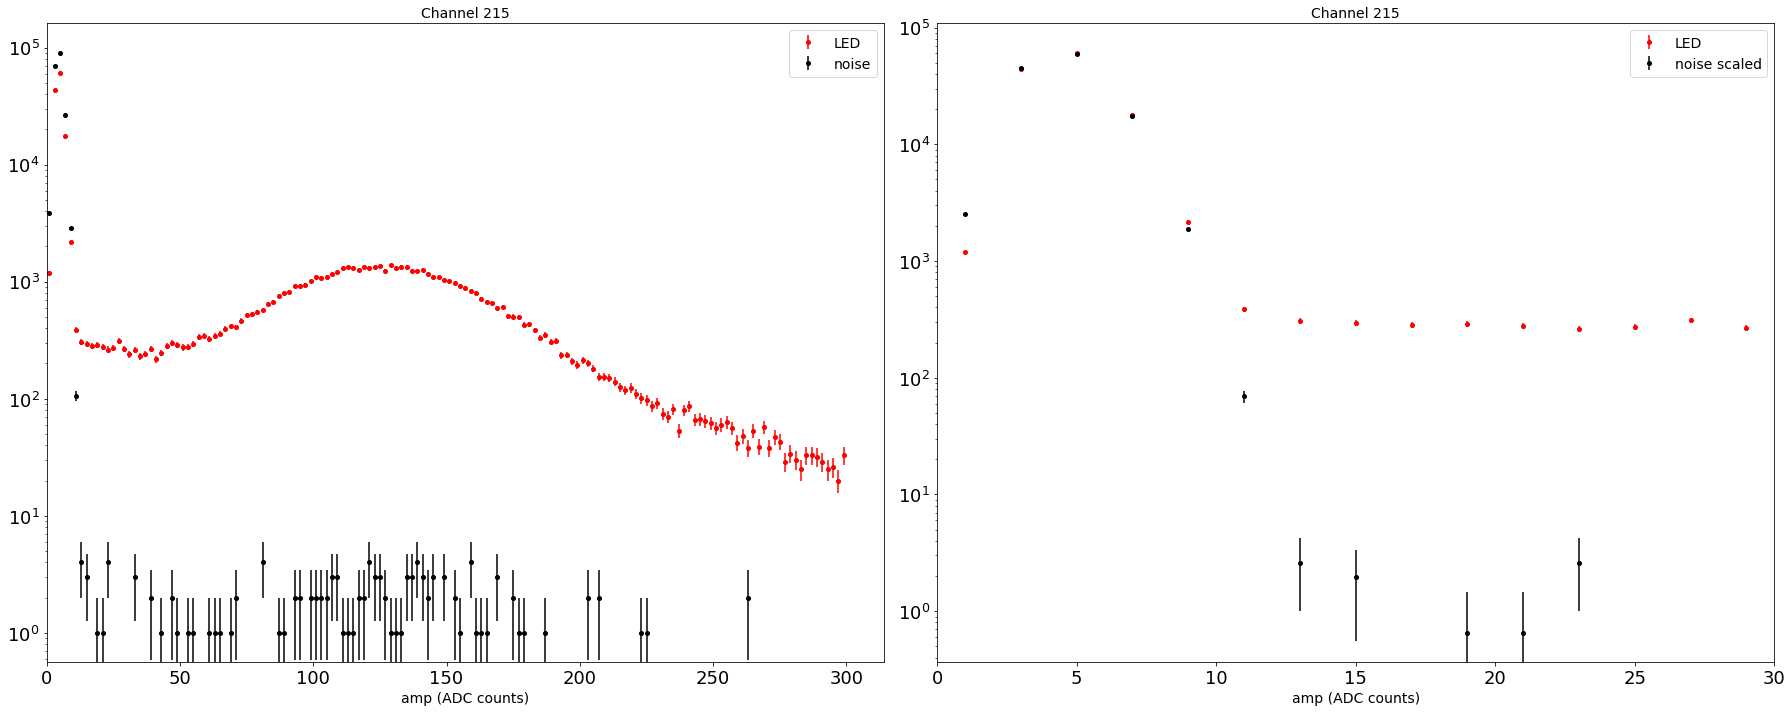

 87%|████████▋ | 216/249 [03:36<00:33,  1.01s/it]

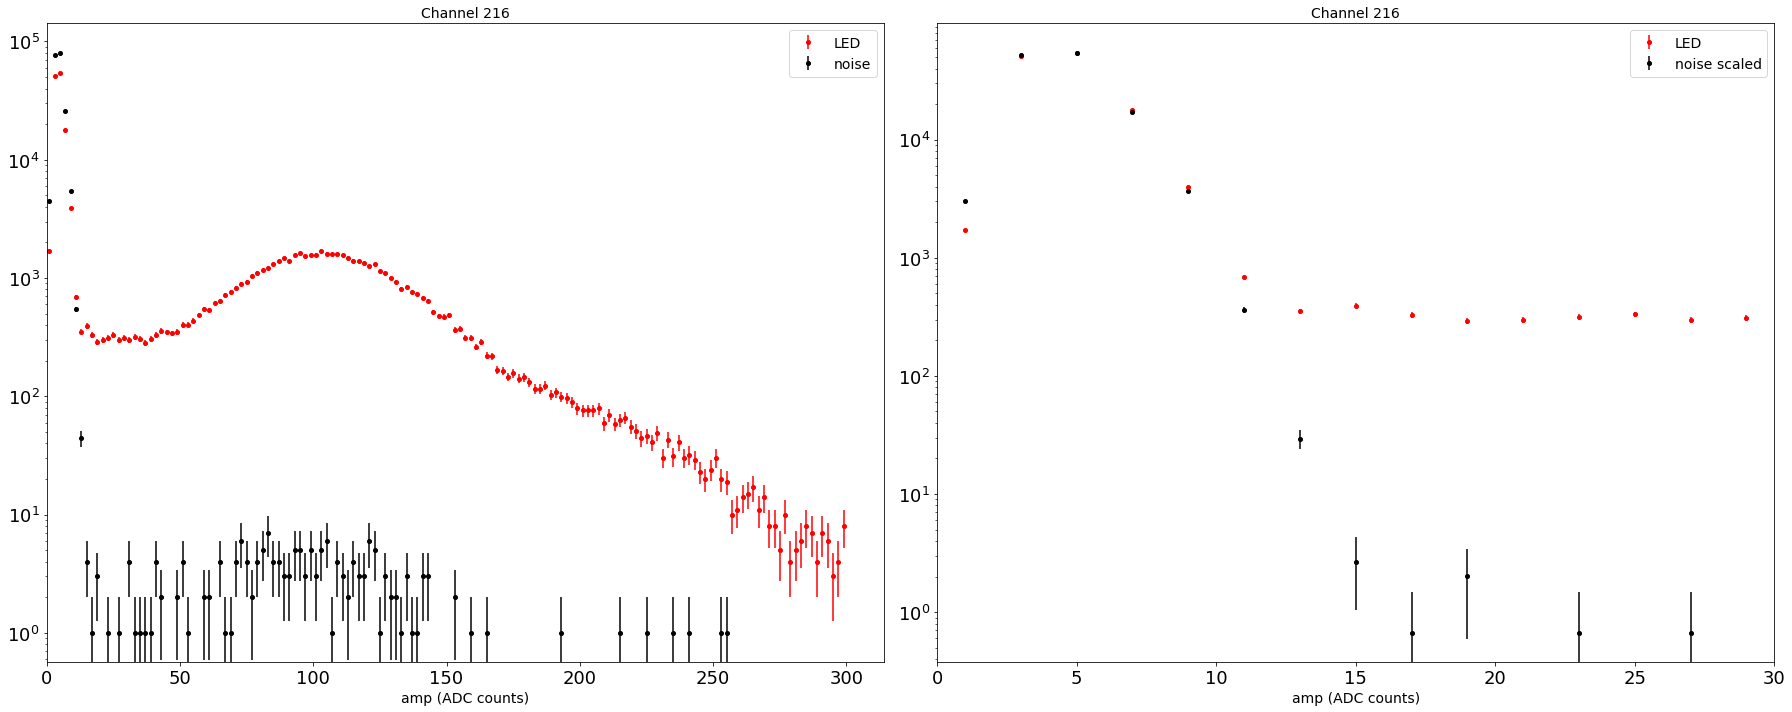

 87%|████████▋ | 217/249 [03:37<00:31,  1.00it/s]

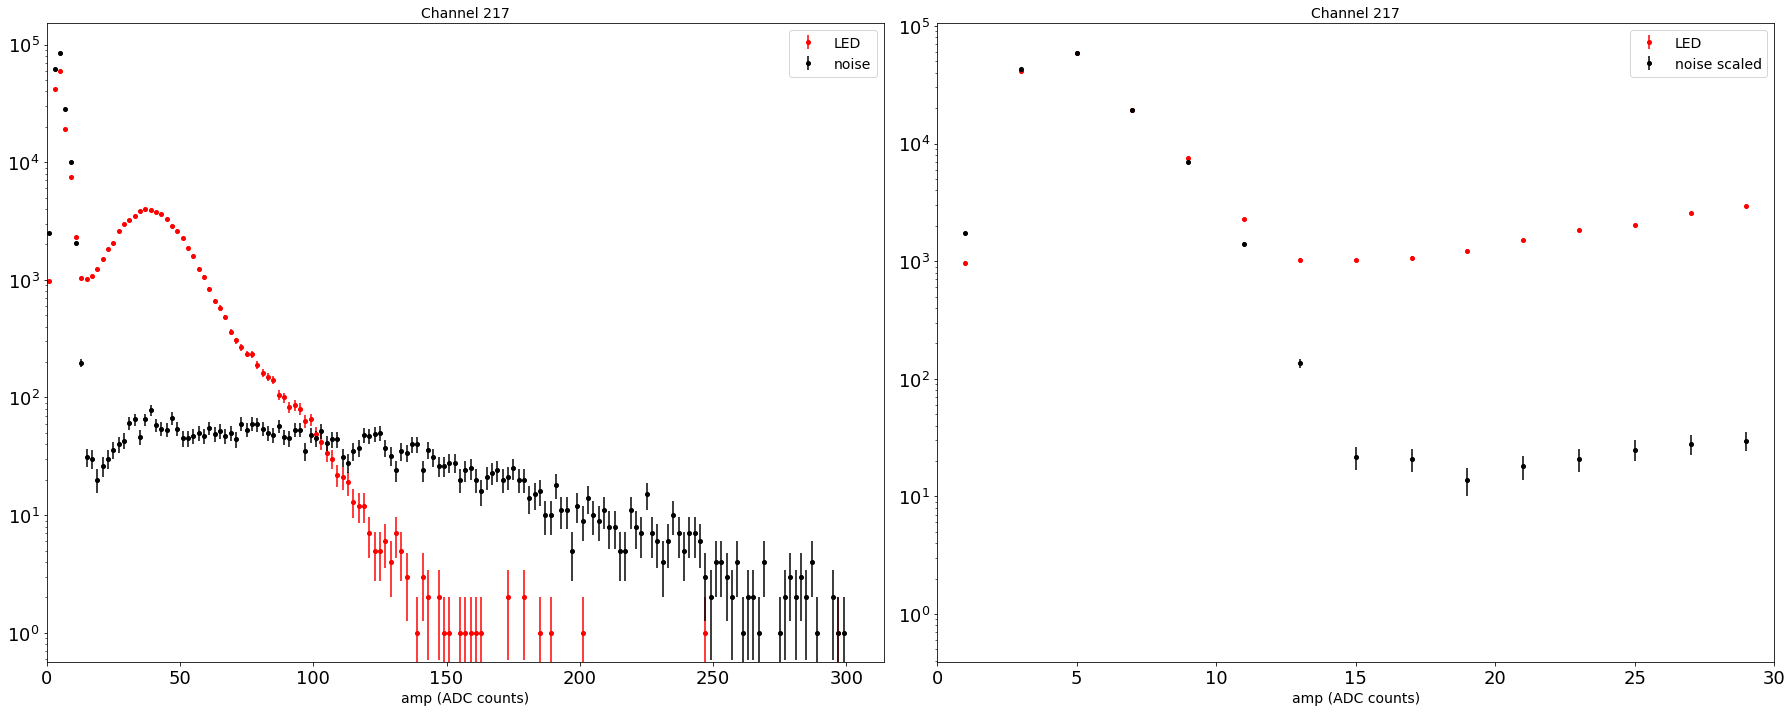

 88%|████████▊ | 218/249 [03:38<00:30,  1.01it/s]

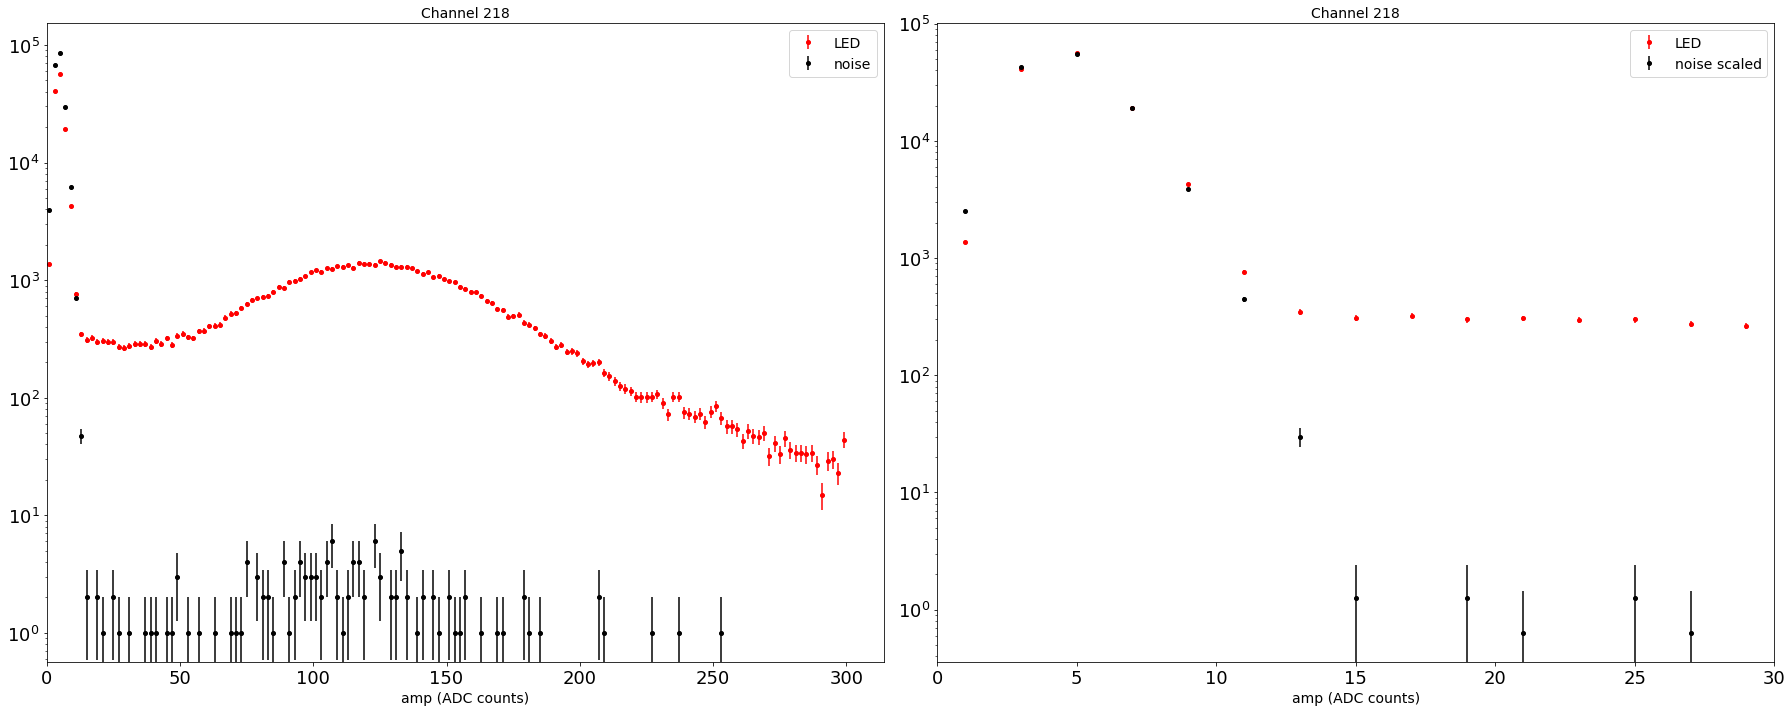

 88%|████████▊ | 219/249 [03:39<00:30,  1.02s/it]

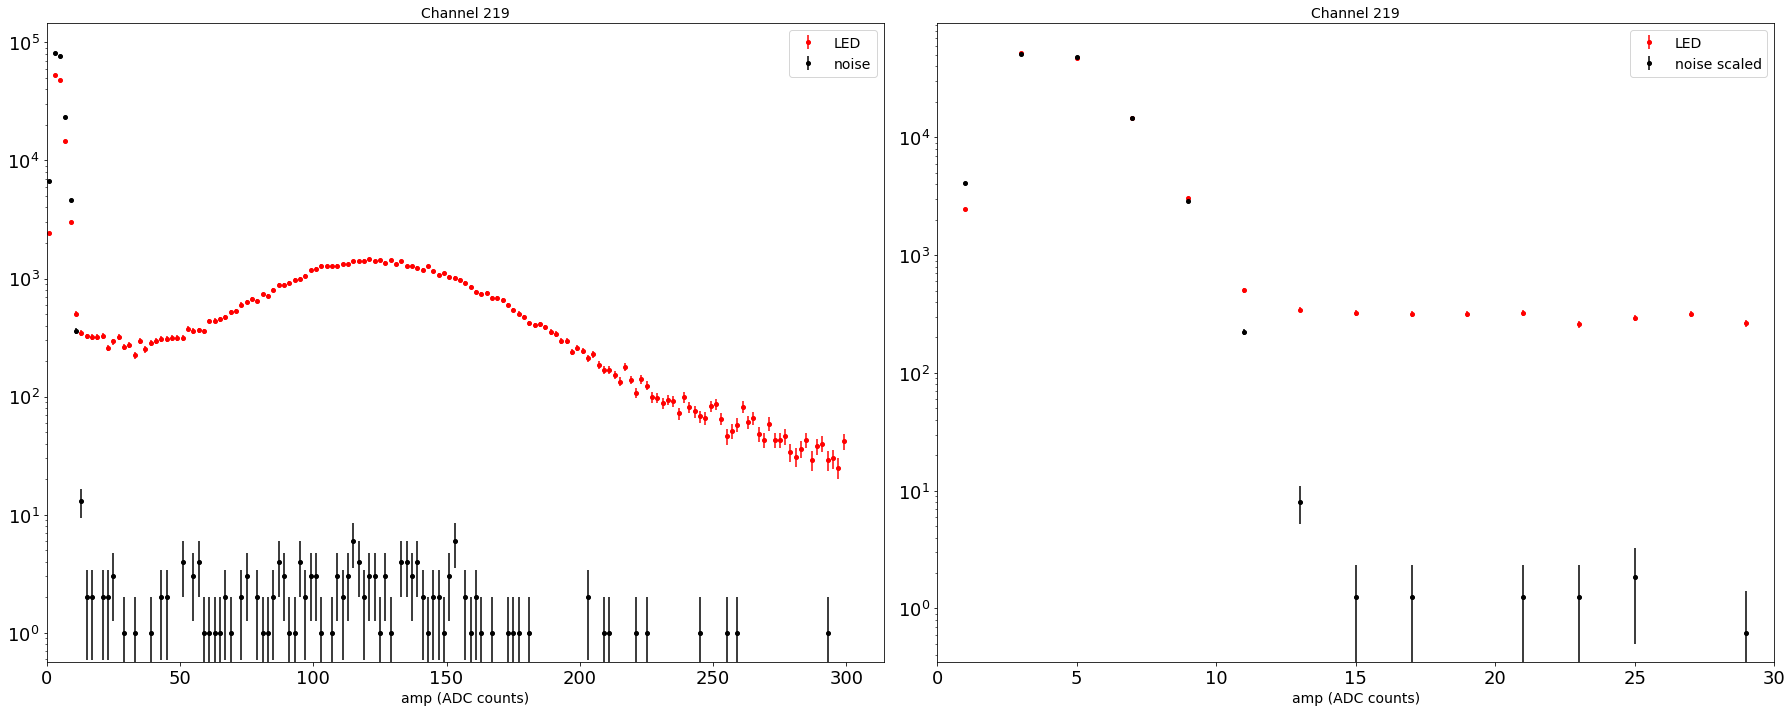

 88%|████████▊ | 220/249 [03:40<00:29,  1.00s/it]

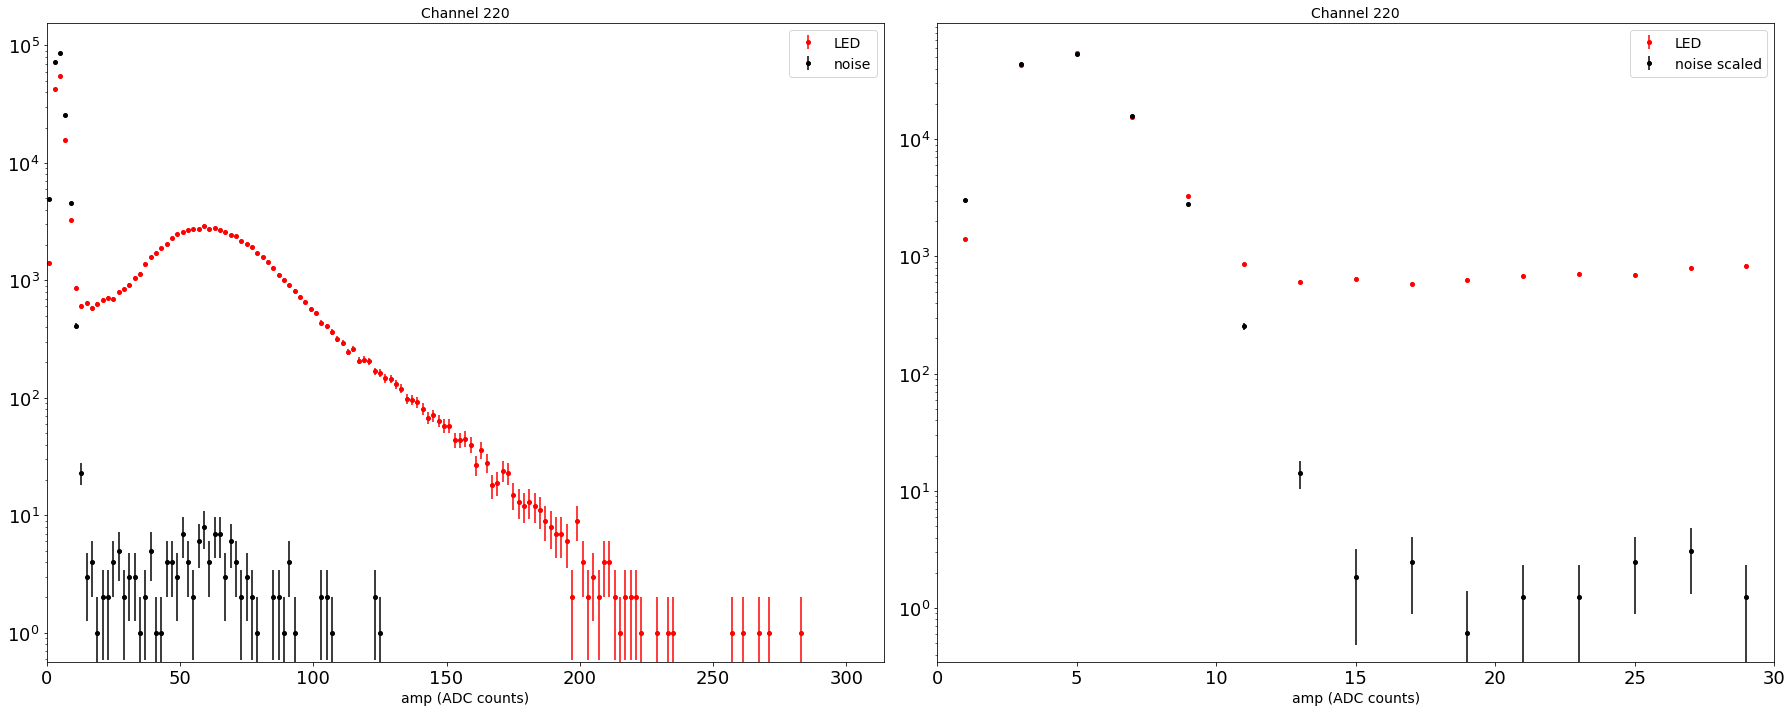

 89%|████████▉ | 221/249 [03:41<00:27,  1.00it/s]

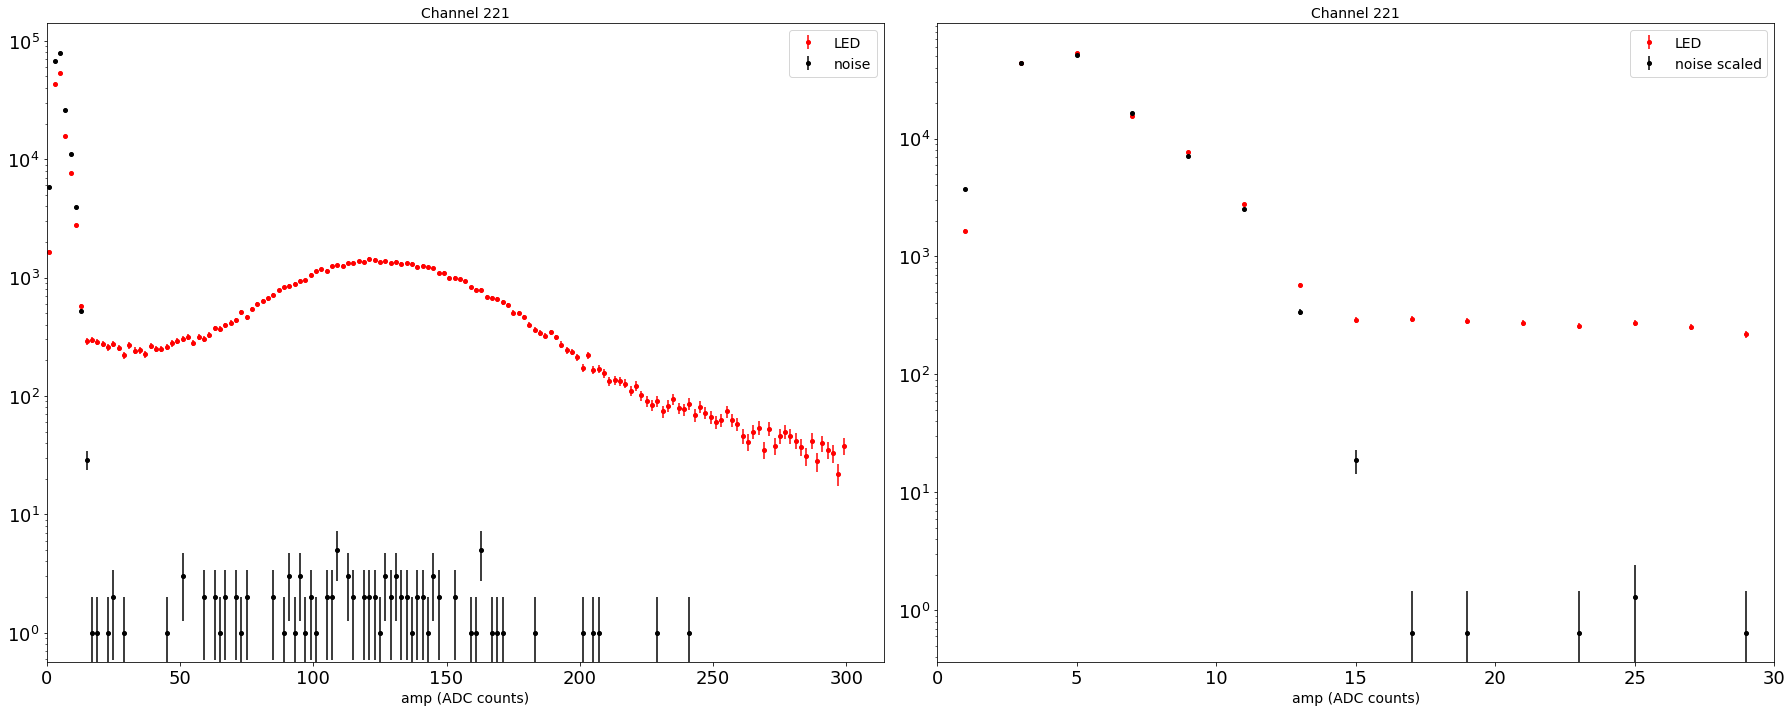

 89%|████████▉ | 222/249 [03:42<00:27,  1.00s/it]

 90%|████████▉ | 223/249 [03:43<00:27,  1.04s/it]

 90%|████████▉ | 224/249 [03:44<00:26,  1.05s/it]

 90%|█████████ | 225/249 [03:45<00:24,  1.04s/it]

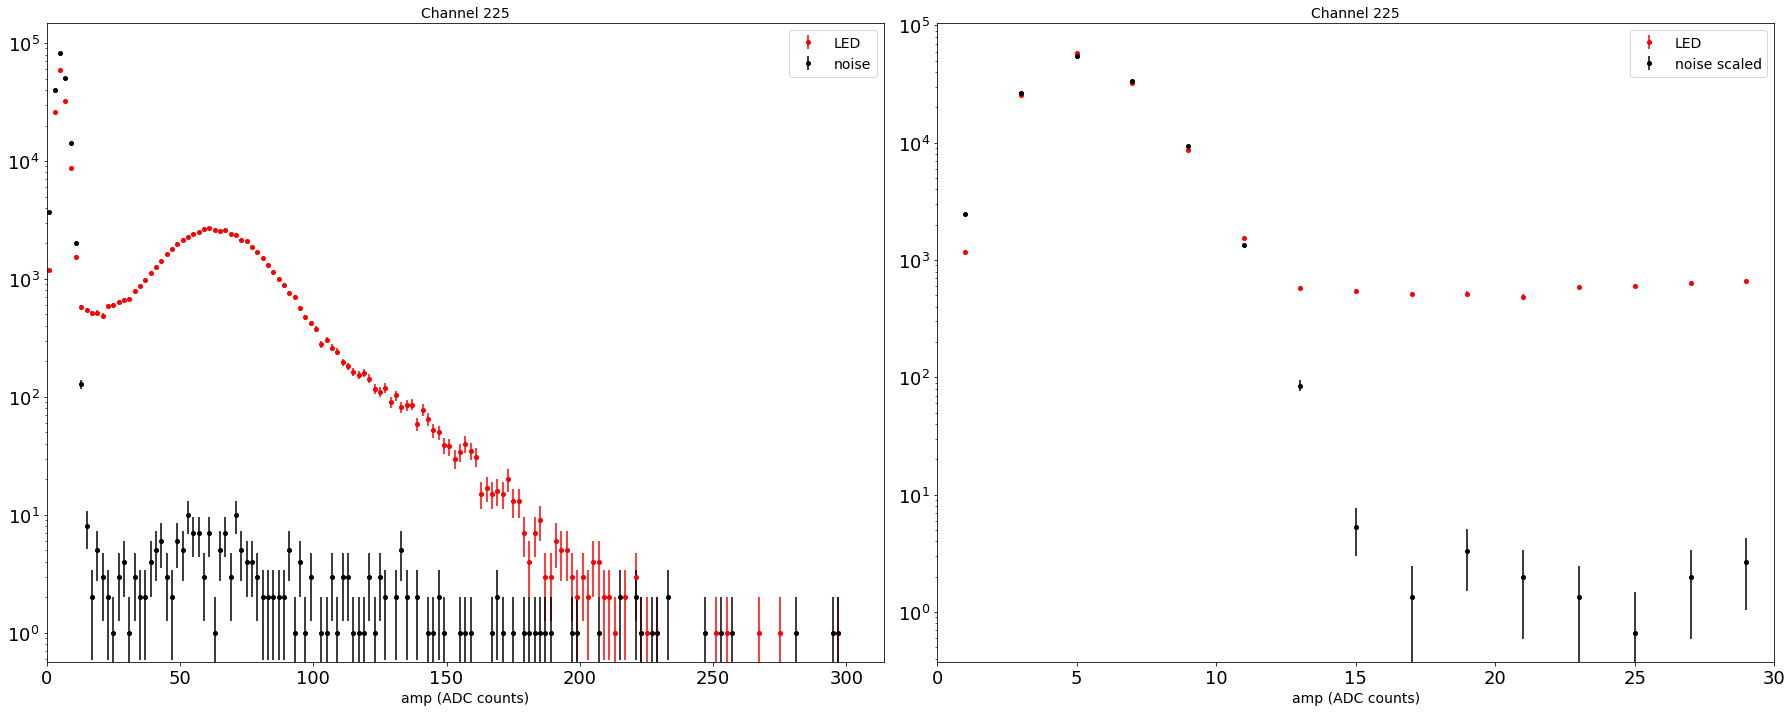

 91%|█████████ | 226/249 [03:46<00:24,  1.05s/it]

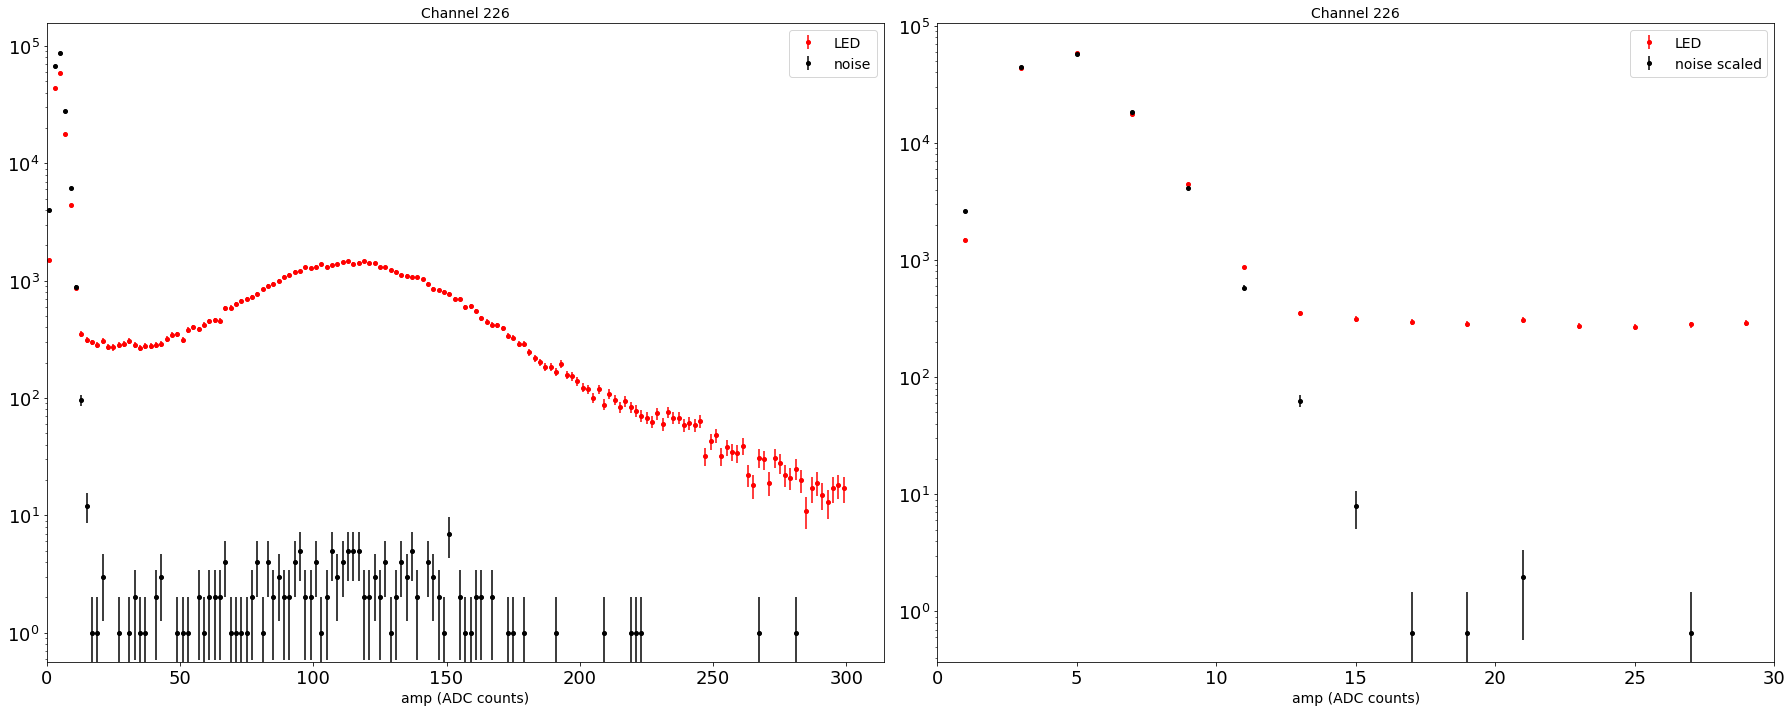

 91%|█████████ | 227/249 [03:48<00:23,  1.07s/it]

 92%|█████████▏| 228/249 [03:49<00:21,  1.04s/it]

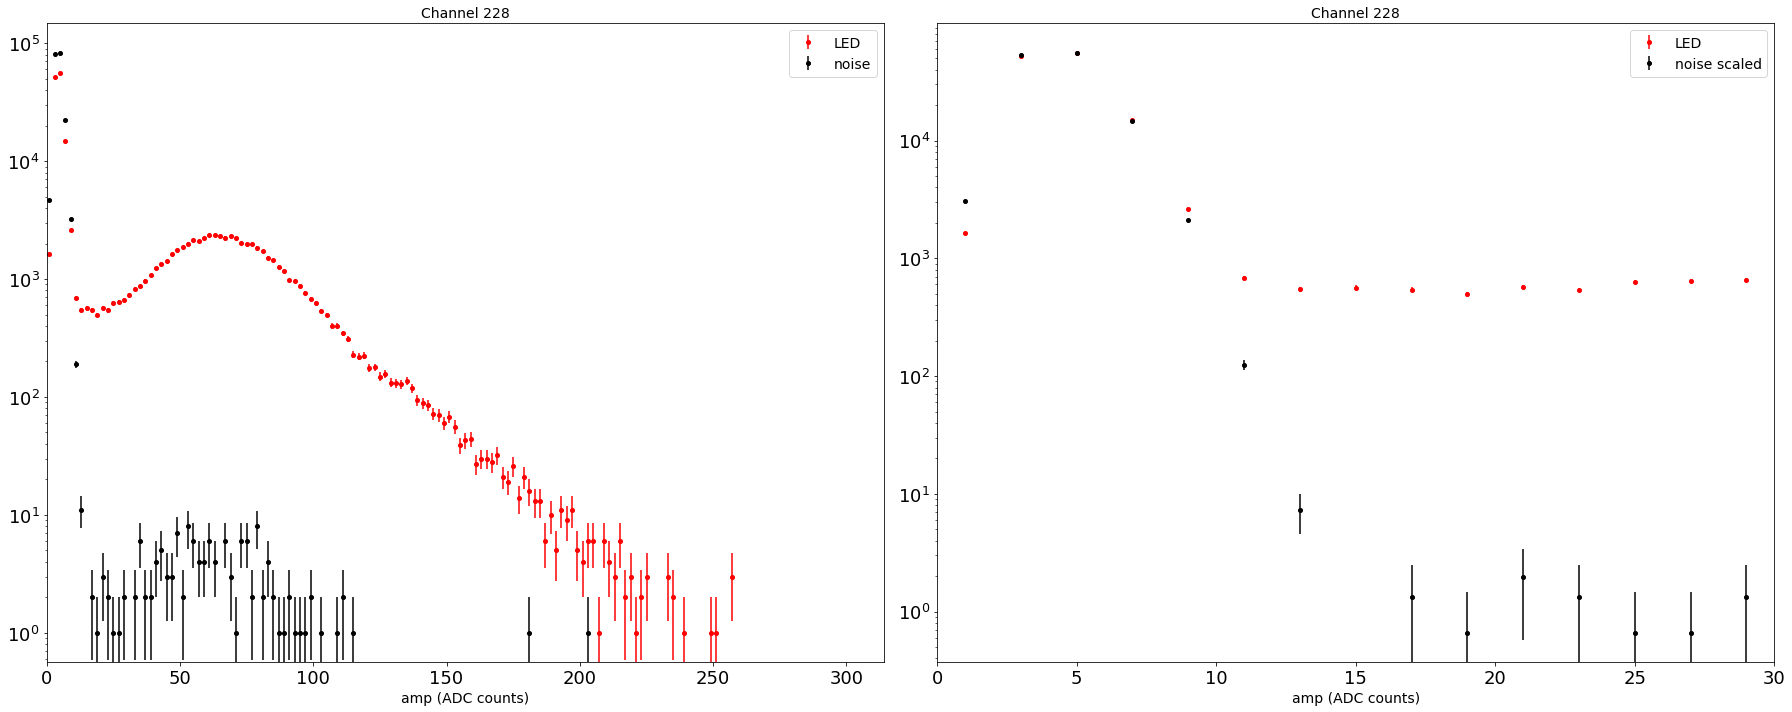

 92%|█████████▏| 229/249 [03:50<00:20,  1.03s/it]

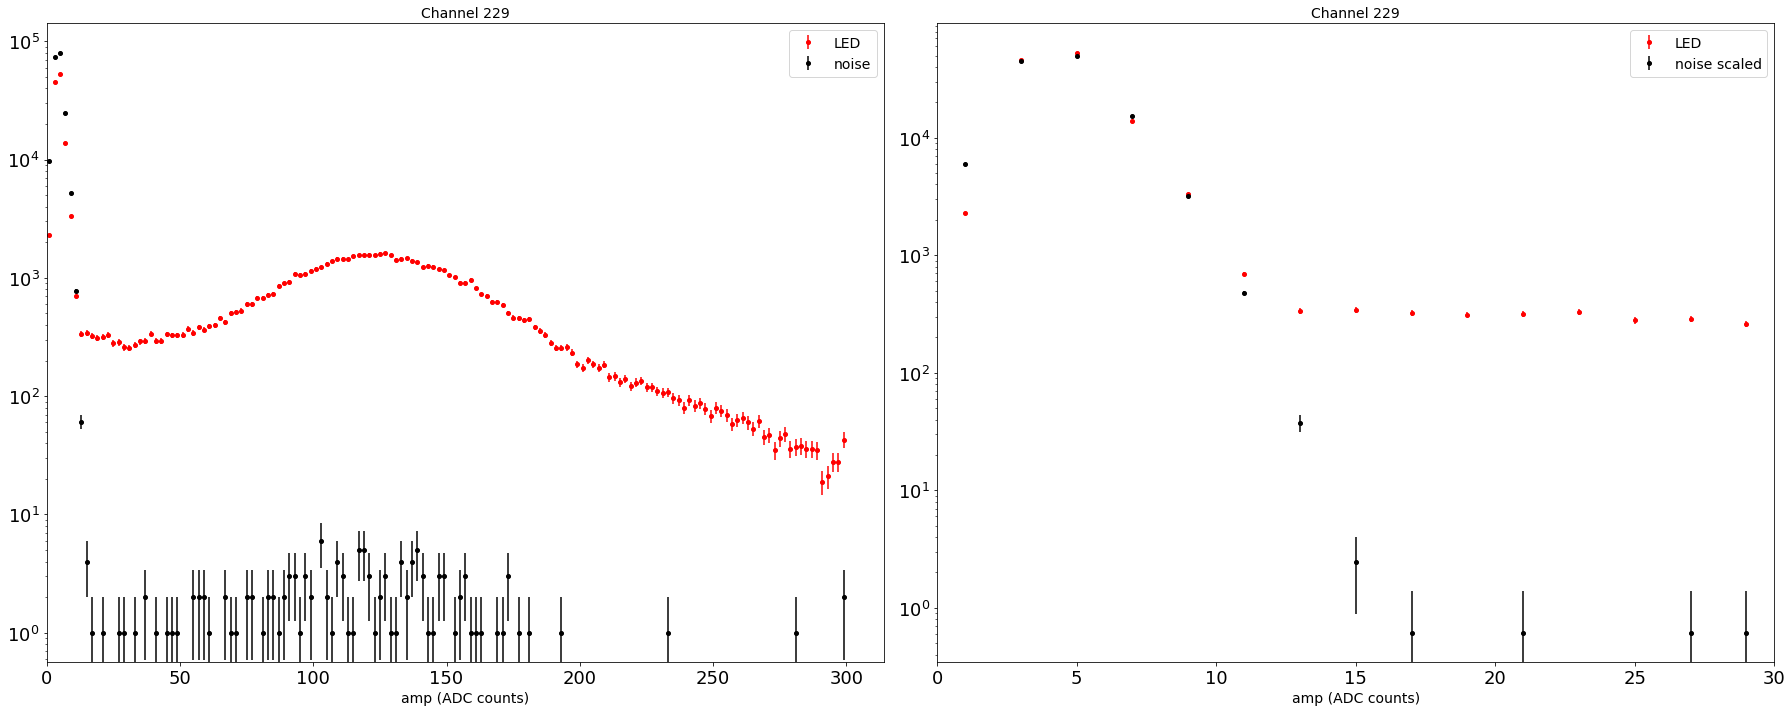

 92%|█████████▏| 230/249 [03:51<00:19,  1.01s/it]

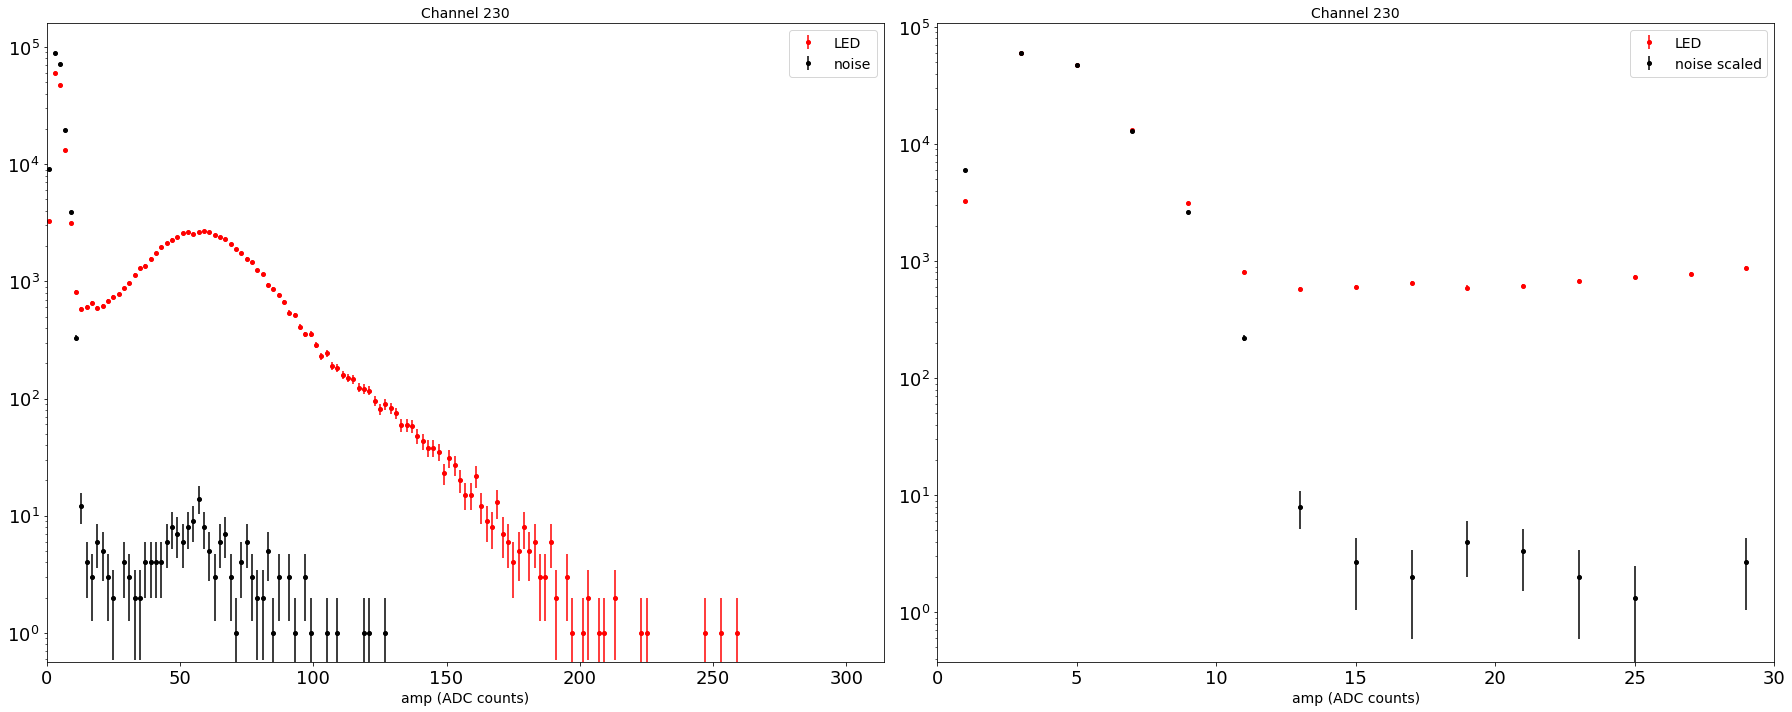

 93%|█████████▎| 231/249 [03:52<00:18,  1.03s/it]

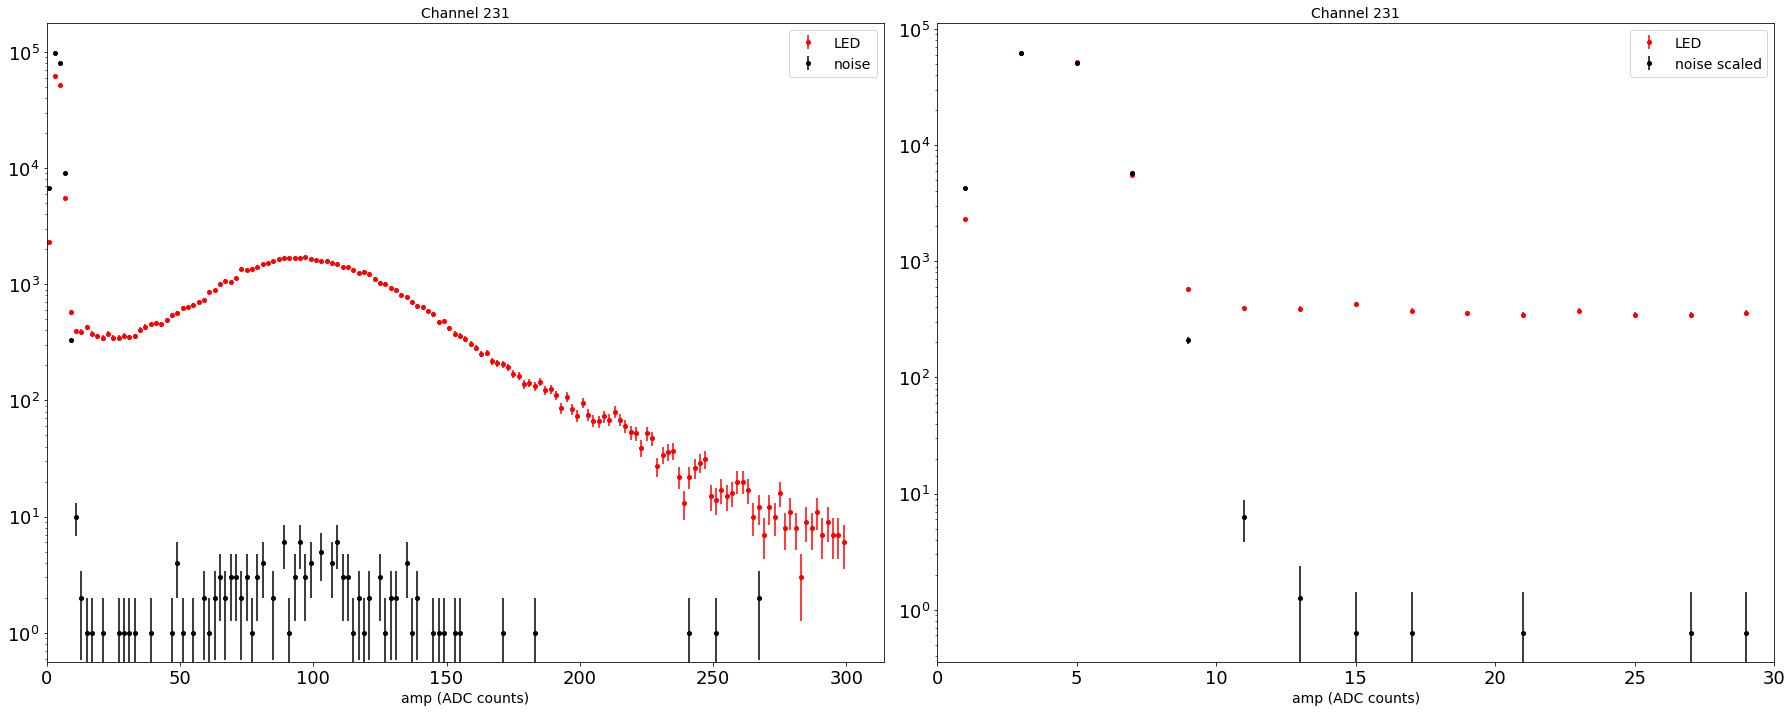

 93%|█████████▎| 232/249 [03:53<00:17,  1.03s/it]

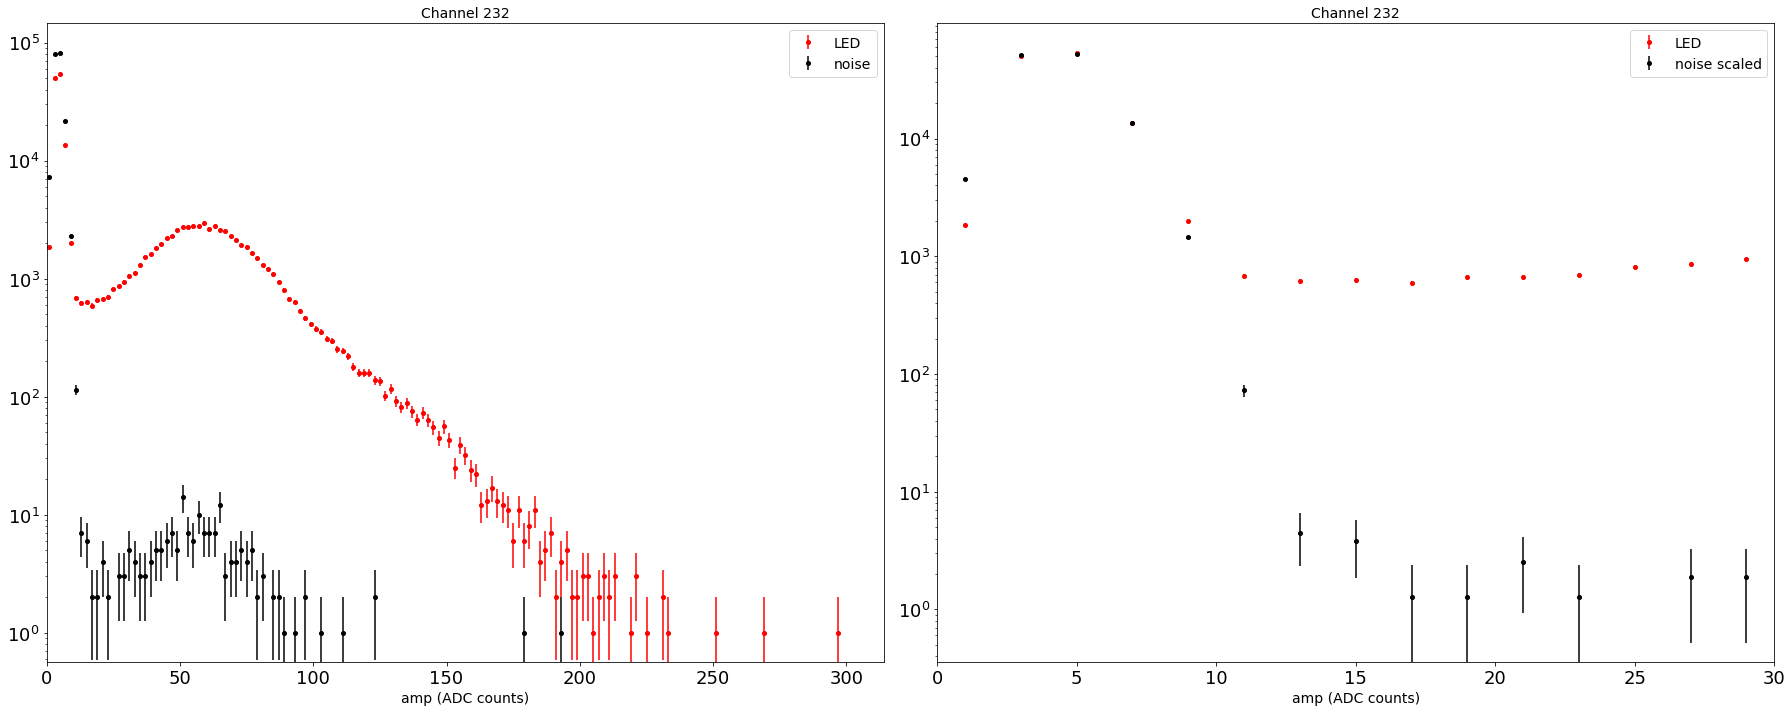

 94%|█████████▎| 233/249 [03:54<00:16,  1.00s/it]

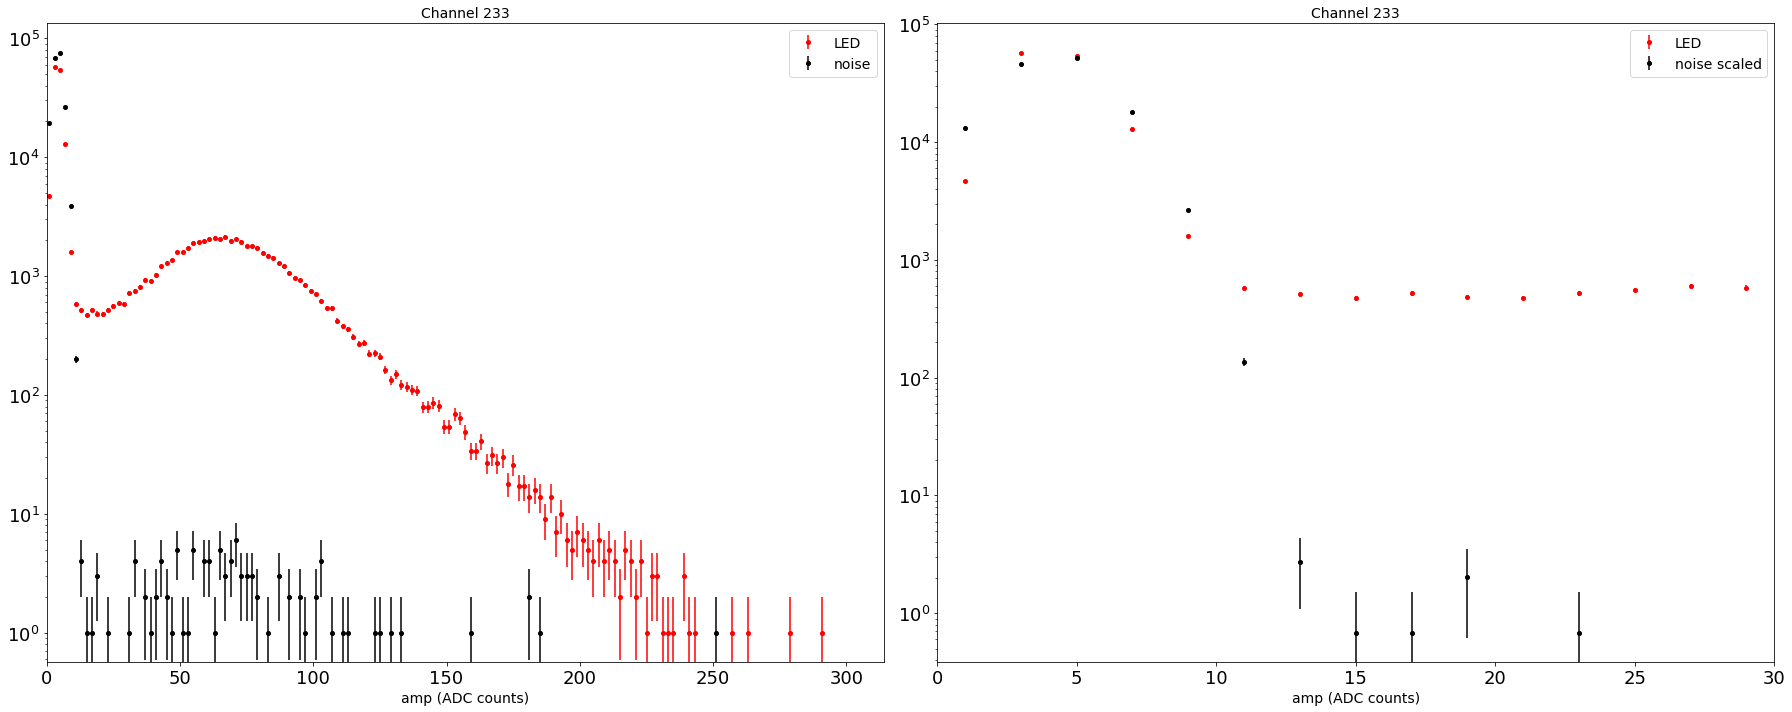

 94%|█████████▍| 234/249 [03:55<00:15,  1.03s/it]

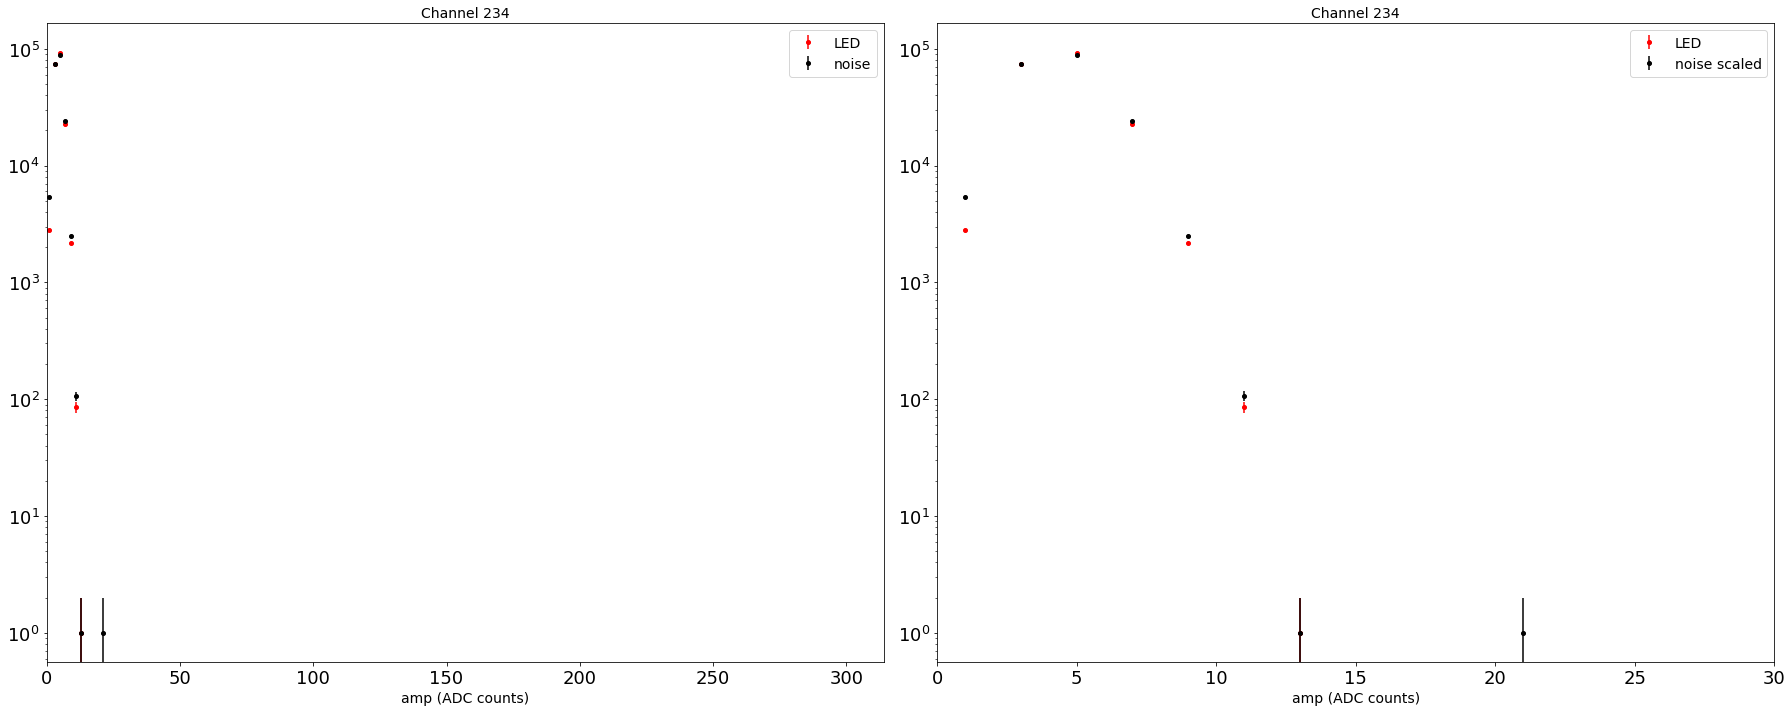

 94%|█████████▍| 235/249 [03:56<00:14,  1.01s/it]

In [ ]:
datatype = [('pmt', np.int8),
            ('spectrumLED', object), ('bins_LED_center', object),
            ('spectrumNOISE', object), ('bins_NOISE_center', object),
            ('spectrumNOISE_scaled', object)]
 
n_channel_s = np.arange(0, 249, 1)
SPE = np.zeros((len(n_channel_s)), dtype = datatype)

for n_channel in tqdm(n_channel_s):
    arr = df_SPE[df_SPE['PMT'] == n_channel]

    fig = plt.figure(figsize=(25,10))

    LED, bins_LED = np.histogram(arr['amplitudeLED'], bins=150, range=(0,300))
    bins_LED_center = 0.5 * (bins_LED[1:] + bins_LED[:-1])
    noise, bins_noise = np.histogram(arr['amplitudeNOISE'], bins=150, range=(0,300))
    bins_noise_center = 0.5 * (bins_noise[1:] + bins_noise[:-1])
    
    plt.subplot(121)
    #plt.plot(bins_LED_center, LED, color='k', label='Amp LED')
    #plt.plot(bins_noise_center, noise, color='r', label='Amp noise')
    plt.errorbar(x = bins_LED_center, y = LED, yerr = np.sqrt(LED), fmt='ro', ms = 4, label='LED')
    plt.errorbar(x = bins_noise_center,  y = noise, yerr = np.sqrt(noise), fmt='ko', ms = 4, label='noise')
    plt.xlabel('amp (ADC counts)')
    plt.title('Channel %d' %n_channel)
    plt.yscale('log')
    plt.legend(loc='best')
    plt.xlim(0)
    
    plt.subplot(122)
    ADC_correction = 7
    scaling_coeff = LED[:7].sum()/noise[:7].sum()
    noise_scaled = noise*scaling_coeff
    
    plt.errorbar(x = bins_LED_center, y = LED, yerr = np.sqrt(LED), fmt='ro', ms = 4, label='LED')
    plt.errorbar(x = bins_noise_center,  y = noise_scaled, yerr = np.sqrt(noise_scaled), 
                 fmt='ko', ms = 4, label='noise scaled')
    plt.xlim(left = 0, right=30)
    plt.yscale('log')
    plt.xlabel('amp (ADC counts)')
    plt.title('Channel %d' %n_channel)
    plt.legend(loc='best')
    
    
    SPE[n_channel]['pmt'] = n_channel
    SPE[n_channel]['spectrumLED'] = LED
    SPE[n_channel]['bins_LED_center'] = bins_LED_center
    SPE[n_channel]['spectrumNOISE'] = noise
    SPE[n_channel]['bins_NOISE_center'] = bins_noise_center
    SPE[n_channel]['spectrumNOISE_scaled'] = noise_scaled
    
    plt.tight_layout()
    plt.show()

In [ ]:
datatype = [('pmt', np.int8),
            ('spectrumLED', object), ('bins_LED_center', object),
            ('spectrumNOISE', object), ('bins_NOISE_center', object),
            ('spectrumNOISE_scaled', object)]
 
n_channel_s = np.arange(0, 249, 1)
SPE = np.zeros((len(n_channel_s)), dtype = datatype)

for n_channel in tqdm(n_channel_s):
    arr = data_SPE[data_SPE['PMT'] == n_channel]

    fig = plt.figure(figsize=(25,10))

    LED, bins_LED = np.histogram(arr['amplitudeLED'], bins=150, range=(0,300))
    bins_LED_center = 0.5 * (bins_LED[1:] + bins_LED[:-1])
    noise, bins_noise = np.histogram(arr['amplitudeNOISE'], bins=150, range=(0,300))
    bins_noise_center = 0.5 * (bins_noise[1:] + bins_noise[:-1])
    
    plt.subplot(121)
    #plt.plot(bins_LED_center, LED, color='k', label='Amp LED')
    #plt.plot(bins_noise_center, noise, color='r', label='Amp noise')
    plt.errorbar(x = bins_LED_center, y = LED, yerr = np.sqrt(LED), fmt='ro', ms = 4, label='LED')
    plt.errorbar(x = bins_noise_center,  y = noise, yerr = np.sqrt(noise), fmt='ko', ms = 4, label='noise')
    plt.xlabel('amp (ADC counts)')
    plt.title('Channel %d' %n_channel)
    plt.yscale('log')
    plt.legend(loc='best')
    plt.xlim(0)
    
    plt.subplot(122)
    ADC_correction = 7
    scaling_coeff = LED[:7].sum()/noise[:7].sum()
    noise_scaled = noise*scaling_coeff
    
    plt.errorbar(x = bins_LED_center, y = LED, yerr = np.sqrt(LED), fmt='ro', ms = 4, label='LED')
    plt.errorbar(x = bins_noise_center,  y = noise_scaled, yerr = np.sqrt(noise_scaled), 
                 fmt='ko', ms = 4, label='noise scaled')
    plt.xlim(left = 0, right=30)
    plt.yscale('log')
    plt.xlabel('amp (ADC counts)')
    plt.title('Channel %d' %n_channel)
    plt.legend(loc='best')
    
    
    SPE[n_channel]['pmt'] = n_channel
    SPE[n_channel]['spectrumLED'] = LED
    SPE[n_channel]['bins_LED_center'] = bins_LED_center
    SPE[n_channel]['spectrumNOISE'] = noise
    SPE[n_channel]['bins_NOISE_center'] = bins_noise_center
    SPE[n_channel]['spectrumNOISE_scaled'] = noise_scaled
    
    plt.tight_layout()
    plt.show()

In [ ]:
n_channel_s = np.arange(0, 249, 1)

for n_channel in tqdm(n_channel_s):
    arr = SPE[SPE['pmt'] == n_channel]
    #print(arr['pmt'])
    #print(arr['spectrumLED'])
    #print(arr['bins_LED_center'])
    #print(arr['bins_LED_center'][0][0])
    #print(arr['bins_LED_center'][0][-1]) 
    #print(arr['bins_LED_center'][0][1]-arr['bins_LED_center'][0][0])
    diff = np.absolute(arr['spectrumLED'][0] - arr['spectrumNOISE_scaled'][0])
    sigma_diff = np.sqrt(arr['spectrumLED'][0] + arr['spectrumNOISE_scaled'][0])

    fig = plt.figure(figsize=(25,10))

    plt.subplot(121)
    plt.errorbar(x = arr['bins_LED_center'][0], y=diff, yerr = sigma_diff, fmt='b+', 
                 label='noise-subtracted single photoelectron spectrum')
    #plt.xlim(left = 0, right=30)
    #plt.yscale('log')
    plt.xlabel('amp (ADC counts)')
    plt.title('Channel %d' %n_channel)
    plt.legend(loc='best')
    
    plt.subplot(122)
    res =  1. - np.cumsum(diff)/np.sum(diff)
    x_center = arr['bins_LED_center'][0]
    pos_15ADC = np.where(x_center==15)
    acc_15ADC = res[pos_15ADC]
    plt.plot(x_center, res, label='Acceptance @ 15 ADC = %.2f'%(acc_15ADC))
    plt.title('Acceptance')
    plt.ylim(0,1.1)
    plt.xlim(0, 100)
    plt.xlabel('amp (ADC counts)')
    plt.title('Channel %d' %n_channel)
    plt.legend(loc='best')
    
    plt.show()